# **IMPORTS**

In [1]:
!pip install pycountry
!pip install geopy
!pip install rapidfuzz
!pip install python-Levenshtein
!pip install SPARQLWrapper
!pip install spacy
!pip install GLINER
!pip install deep-translator
!pip install nlpaug
!pip install transformers
!pip install torch torchvision torchaudio  # si tu veux utiliser des modèles type BERT
!pip install transformers sentencepiece
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.4
    Uninstalling transformers-4.55.4:
      Successfully uninstalled transformers-4.55.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
import os
import re
import ast
import csv
import time
import json
import math
import random
import inflect
import requests
import itertools
import subprocess
import seaborn as sns
import networkx as nx
from itertools import chain
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
from collections import defaultdict
from collections import OrderedDict
from scipy.stats import gaussian_kde
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
import torch
import spacy
import pycountry
import Levenshtein
from gliner import GLiNER
from rapidfuzz import fuzz
from transformers import pipeline
import nlpaug.augmenter.word as naw
from geopy.geocoders import Nominatim
from transformers import AutoTokenizer
from deep_translator import GoogleTranslator
from SPARQLWrapper import SPARQLWrapper, JSON
from geopy.extra.rate_limiter import RateLimiter
import nlpaug.model.word_dict.wordnet as wordnet_module
from transformers import AutoModelForTokenClassification
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_excel = "/content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/"

In [ ]:
df1 = pd.read_excel(ruta_excel+"Data/1_2_colletotrichum-2003-24-notices.xlsx", sheet_name=0)
df2 = pd.read_excel(ruta_excel+"Data/1_2_colletotrichum-2003-24-notices.xlsx", sheet_name=1)
df3 = pd.read_excel(ruta_excel+"Data/2_1_Corynespora_WOS_NOTICES_avec_Signatures_harmonisees_v20241215.xlsx", sheet_name=0)
df4 = pd.read_excel(ruta_excel+"Data/5_Pseudocercospora_NOTICES_WOS_20250513.xlsx", sheet_name=0)
df5 = pd.read_excel(ruta_excel+"Data/6_phyllachora-notices.xlsx", sheet_name=0)
df6 = pd.read_excel(ruta_excel+"Data/7_Oidium_Erysiphe_NOTICES_WOS_20250519.xlsx", sheet_name=0)
df7 = pd.read_excel(ruta_excel+"Data/3_4_pestalotiopsis-novembre2024-thematiques-CT.xlsx", sheet_name=3)
df8 = pd.read_excel(ruta_excel+"Data/4_1_Phytophthora_NOTICES_WOS_20241112_v20250123.xlsx", sheet_name=0)

# **Nettoyage des données et Extraction des pays a partir des metadonnées**

In [ ]:
def extraer_paises_unicos(texto):
    partes = re.findall(r'(?:\[[^\]]*\]\s*)?([^;\[\]]+)', texto)
    paises = []

    for parte in partes:
        palabras = parte.strip().split(",")
        if palabras:
            pais = palabras[-1].strip()
            pais_normalizado = normalizacion_primaria.get(pais, pais)
            if pais_normalizado and pais_normalizado not in paises:
                paises.append(pais_normalizado)

    return sorted(paises)  # ← devolvemos una lista directamente


def extraer_porcentaje_paises(texto):
    partes = re.findall(r'(?:\[[^\]]*\]\s*)?([^;\[\]]+)', texto)
    paises = []

    for parte in partes:
        palabras = parte.strip().split(",")
        if palabras:
            pais = palabras[-1].strip()

            # Limpieza especial para "USA"
            if 'USA' in pais:
                pais = 'USA'

            # Normalización
            pais_normalizado = normalizacion_primaria.get(pais, pais)

            # Validación
            if pais_normalizado and pais_normalizado.strip():
                paises.append(pais_normalizado.strip())

    total = len(paises)
    if total == 0:
        return {}

    conteo = Counter(paises)
    porcentajes = {pais: round(count / total, 3) for pais, count in conteo.items()}
    return porcentajes



def limpiar_y_normalizar_paises(lista_paises):
    # limpiamos espacios y normalizamos 'USA'
    normalizados = []
    for p in lista_paises:
        p = p.strip()
        if 'USA' in p:
            p = 'USA'
        if p:  # evitamos strings vacíos
            normalizados.append(p)
    return list(dict.fromkeys(normalizados))  # elimina duplicados y mantiene orden

In [ ]:
normalizacion_primaria = {
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'North Ireland': 'United Kingdom',
    'Wales': 'United Kingdom',
    'Macedonia': 'North Macedonia',
    'Turkiye': 'Turkey',
    'Peoples R China': 'China',
    'Cote Ivoire': 'Ivoire',
    'Papua N Guinea': 'Papua',
    'U Arab Emirates': 'Emirates',
    'Bosnia & Herceg': 'Bosnia',
    'Dominican Rep': 'Dominican',
    'Trinidad Tobago': 'Tobago',
    'North Macedonia': 'Macedonia',
    'nan': None
}

## **Phyllachora**

In [ ]:
df5.columns

Index(['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA',
       'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2',
       'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS',
       'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG',
       'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT',
       'institutions', 'CT macro : 3 Agriculture, Environment & Ecology',
       'Hevea'],
      dtype='object')

In [ ]:
new_df5 = df5[df5["AB"].notna()]

In [ ]:
print(new_df5["AB"].is_unique)

True


In [ ]:
nulos = new_df5['C3'].isnull().sum()
no_nulos = new_df5['C3'].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 2
Valores no nulos en 'C1': 84


In [ ]:
#70% des données nulles
new_df5 = new_df5.drop(columns=['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'SO', 'SE', 'BS', 'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'C3', 'RP', 'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'Hevea', 'PU', 'PI', 'PA', 'SN',
      'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG', 'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'institutions', 'CT macro : 3 Agriculture, Environment & Ecology'])

In [ ]:
new_df5.columns

Index(['TI', 'DE', 'ID', 'AB', 'C1', 'UT'], dtype='object')

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df5['pays_affiliations'] = new_df5['C1'].astype(str).apply(extraer_paises_unicos)
new_df5['pays_affiliations'] = new_df5['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df5['pays_affiliations_pondéré'] = new_df5['C1'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df5.head()

TI  \
0     Two new Phyllachora species in Southwest China   
1  New Phyllachora species from Myrsine and Rostk...   
2  A new species of Phyllachora (Phyllachoraceae,...   
3  Six Species of Phyllachora with Three New Taxa...   
4  Phyllachora xanthii:: redescription and design...   

                                                  DE  \
0  2 new taxa; morphology; Phyllachora; phylogeny...   
1  fungi; pathogens; New Zealand; Phyllachora; Di...   
2  1 new species; Phyllachora; stem tar spot fung...   
3  three new taxa; Poaceae; Phyllachora; multigen...   
4  biocontrol; invasive weeds; morphology; Phylla...   

                                                  ID  \
0       FUNGI; ASCOMYCOTA; PHYLOGENY; FCKL; NKE; NOV   
1                                         FUNGI; KEY   
2  RIBOSOMAL DNA; SP-NOV; ASCOMYCOTA; FUNGI; PROB...   
3  TAR SPOT; 1ST REPORT; ZEA-MAYS; PHYLOGENY; MAY...   
4                                                NaN   

                                                  AB  \
0  Phyllachora species are biotrophic, obligate p...   
1  The genus Phyllachora in New Zealand is briefl...   
2  Phyllachora species usually cause leaf tar spo...   
3  Phyllachora (Phyllachoraceae, Phyllachorales) ...   
4  A tar-spot fungus found in the state of Parana...   

                                                  C1                   UT  \
0  [LI, Jin-chen; Wu, Hai-xia; Song, Jia-yu] Chin...  WOS:000992524200001   
1  Landcare Res, Herbarium PDD, Auckland, New Zea...  WOS:000226773300013   
2  [Yang, Chun-Lin; Liu, Ying-Gao] Sichuan Agr Un...  WOS:000458887000002   
3  [Sun, Qi-Rong; Deng, Yu; Liu, Feng; Wang, Fei-...  WOS:001307333500001   
4  CABI Biosci, Surrey TW20 9TY, England; Univ Fe...  WOS:000181503800001   

                pays_affiliations  \
0                         [China]   
1   [New Zealand, United Kingdom]   
2  [China, New Zealand, Thailand]   
3                         [China]   
4        [Brazil, United Kingdom]   

                           pays_affiliations_pondéré  
0                                     {'China': 1.0}  
1        {'New Zealand': 0.5, 'United Kingdom': 0.5}  
2  {'China': 0.5, 'Thailand': 0.25, 'New Zealand'...  
3                                     {'China': 1.0}  
4             {'United Kingdom': 0.5, 'Brazil': 0.5}

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df5['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo5 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo5['Pays'] = df_conteo5['Pays'].map(normalizacion_primaria).fillna(df_conteo5['Pays'])
df_conteo5['Pourcentage'] = df_conteo5['Frequence'] / len(new_df5) * 100
df_conteo5.head(10)

Pays  Frequence  Pourcentage
0             USA         39    45.348837
1           China         21    24.418605
2          Brazil         15    17.441860
3          Mexico         13    15.116279
4        Thailand          8     9.302326
5      Costa Rica          5     5.813953
6     New Zealand          5     5.813953
7  United Kingdom          5     5.813953
8         Germany          4     4.651163
9       Australia          2     2.325581

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df5['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

# Si quieres ver el top 10 por ejemplo
print("Classememnt des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)


Classememnt des pays des affiliations après la pondération


Pays
0             USA
1           China
2          Brazil
3          Mexico
4        Thailand
5      Costa Rica
6         Germany
7  United Kingdom
8       Australia
9     New Zealand

In [ ]:
list_pays5 = df_conteo5['Pays'].tolist()
print(list_pays5)

['USA', 'China', 'Brazil', 'Mexico', 'Thailand', 'Costa Rica', 'New Zealand', 'United Kingdom', 'Germany', 'Australia', 'Canada', 'Honduras', 'Kenya', 'Oman', 'Panama', 'Argentina', 'Austria', 'Colombia', 'Ecuador', 'France', 'Hungary', 'Indonesia', 'Iran', 'Japan', 'Madagascar', 'Mauritius', 'Morocco', 'Poland', 'Russia', 'Saudi Arabia', 'South Korea', 'Spain', 'Sri Lanka', 'Switzerland', 'Ukraine']


## **Oidium Erysiphe**

In [ ]:
df6.columns

Index(['Id_WOS', 'Erysiphe et espèces spécifiques',
       'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO',
       'Sous-thème : Citation Topics MESO', 'Accès au document chez l'éditeur',
       'Nbr d'auteurs par documents', 'Nbr AU BIS', 'Publication Type',
       'Authors', 'Book Authors', 'Book Editors', 'Book Group Authors',
       'Author Full Names', 'Book Author Full Names', 'Group Authors',
       'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced) ; Attention : seules certaines instituti

In [ ]:
new_df6 = df6[df6["Abstract"].notna()]

In [ ]:
print(new_df6["Abstract"].is_unique)

True


In [ ]:
nulos = new_df6['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].isnull().sum()
no_nulos = new_df6['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 0
Valores no nulos en 'C1': 1596


In [ ]:
#Données inutiles (À réviser)
new_df6 = new_df6.drop(columns=['Id_WOS', 'Erysiphe et espèces spécifiques', 'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO', 'Sous-thème : Citation Topics MESO', 'Accès au document chez l\'éditeur', 'Nbr d\'auteurs par documents', 'Nbr AU BIS', 'Publication Type',
       'Authors', 'Book Authors', 'Book Editors', 'Book Group Authors', 'Author Full Names', 'Book Author Full Names', 'Group Authors', 'Source Title', 'Book Series Title', 'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title','Conference Date', 'Conference Location',
       'Conference Sponsor', 'Conference Host','Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"', 'Open Access Designations', 'Highly Cited Status', 'Hot Paper Status', 'Date of Export', 'Unnamed: 80',
       'Affiliations du WOS (=ex Organizations Enhanced) ; Attention : seules certaines institutions sont retenues', 'Reprint Addresses', 'Email Addresses', 'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred', 'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases', '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher', 'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation','Journal ISO Abbreviation', 'Publication Date', 'Publication Year','Volume',
       'Issue', 'Part Number', 'Supplement', 'Special Issue', 'Meeting Abstract', 'Start Page', 'End Page', 'Article Number', 'DOI', 'DOI Link', 'Book DOI', 'Early Access Date', 'Number of Pages', 'WoS Categories', 'Web of Science Index', 'Research Areas', 'IDS Number', 'Pubmed Id'])

In [ ]:
new_df6.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS', 'UT (Unique WOS ID)'],
      dtype='object')

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df6['pays_affiliations'] = new_df6['Addresses : Relevés des signatures par le WOS'].astype(str).apply(extraer_paises_unicos)
new_df6['pays_affiliations'] = new_df6['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df6['pays_affiliations_pondéré'] = new_df6['Addresses : Relevés des signatures par le WOS'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df6.head()

Article Title  \
0  IPM for control of cashew powdery mildew in Ta...   
1  IPM for control of cashew powdery mildew in Ta...   
2  Resampling methods for estimating dispersion i...   
3  QTLs for tomato powdery mildew resistance (Oid...   
4  Effects of benzothiadiazole and acetylsalicyli...   

                                     Author Keywords  \
0  cashew; diseases; farmers' knowledge; knowledg...   
1  agricultural knowledge and information system;...   
2  bias; bootstrap and jackknife procedures; hete...   
3                                                NaN   
4  Alternaria solani; ASA; BTH; Erysiphe cichorac...   

                                       Keywords Plus  \
0                         PEST-MANAGEMENT; KNOWLEDGE   
1                   FARMERS; PERCEPTIONS; MANAGEMENT   
2                                          BOOTSTRAP   
3  QUANTITATIVE DISEASE RESISTANCE; POLYGENIC RES...   
4  PATHOGENESIS-RELATED PROTEINS; SYSTEMIC ACQUIR...   

                                            Abstract  \
0  A survey of 218, mainly male, cashew farmers c...   
1  A study conducted in three Tanzanian Districts...   
2  In many surveys in environmental and natural p...   
3  Tomato (Lycopersicon esculentum) is susceptibl...   
4  Benzothiadiazole (BTH), as Bion WG50, and acet...   

       Addresses : Relevés des signatures par le WOS   UT (Unique WOS ID)  \
0  Ctr Dev Res, DK-1610 Copenhagen V, Denmark; Ag...  WOS:000180297100004   
1  Ctr Dev Res, DK-1610 Copenhagen V, Denmark; Ag...  WOS:000180297100005   
2  Univ G Annunzio, Dipartimento Metodi Quantitat...  WOS:000180399300006   
3  Univ Wageningen & Res Ctr, Lab Plant Breeding,...  WOS:000180496900009   
4  CSIRO, Sydney Postharvest Lab, N Ryde, NSW 211...  WOS:000180528300004   

     pays_affiliations              pays_affiliations_pondéré  
0  [Denmark, Tanzania]  {'Denmark': 0.333, 'Tanzania': 0.667}  
1  [Denmark, Tanzania]    {'Denmark': 0.25, 'Tanzania': 0.75}  
2              [Italy]                         {'Italy': 1.0}  
3        [Netherlands]                   {'Netherlands': 1.0}  
4          [Australia]                     {'Australia': 1.0}

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df6['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo6 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo6['Pays'] = df_conteo6['Pays'].map(normalizacion_primaria).fillna(df_conteo6['Pays'])
df_conteo6['Pourcentage'] = df_conteo6['Frequence'] / len(new_df6) * 100
df_conteo6.head(10)

Pays  Frequence  Pourcentage
0        USA        280    17.543860
1      China        270    16.917293
2    Germany        146     9.147870
3      Japan        117     7.330827
4      Italy        115     7.205514
5     France        103     6.453634
6      India         91     5.701754
7      Spain         90     5.639098
8  Australia         88     5.513784
9     Canada         79     4.949875

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df6['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

# Si quieres ver el top 10 por ejemplo
print("Classememnt des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)


Classememnt des pays des affiliations après la pondération


Pays
0      China
1        USA
2      India
3    Germany
4      Italy
5     France
6      Japan
7     Canada
8  Australia
9      Spain

In [ ]:
list_pays6 = df_conteo6['Pays'].tolist()
print(list_pays6)

['USA', 'China', 'Germany', 'Japan', 'Italy', 'France', 'India', 'Spain', 'Australia', 'Canada', 'United Kingdom', 'Brazil', 'Hungary', 'Czech Republic', 'Netherlands', 'South Korea', 'Poland', 'Portugal', 'Turkey', 'Pakistan', 'Russia', 'Thailand', 'Switzerland', 'Israel', 'Egypt', 'Belgium', 'Austria', 'Iran', 'Sweden', 'Ukraine', 'Argentina', 'Chile', 'Mexico', 'Saudi Arabia', 'Denmark', 'Romania', 'Slovakia', 'Serbia', 'Taiwan', 'Greece', 'Lithuania', 'Croatia', 'South Africa', 'Indonesia', 'Norway', 'Tunisia', 'BELARUS', 'Bulgaria', 'Colombia', 'Estonia', 'Morocco', 'Finland', 'Sri Lanka', 'Tanzania', 'Algeria', 'Azerbaijan', 'Latvia', 'Malaysia', 'New Zealand', 'Peru', 'Slovenia', 'Vietnam', 'Bosnia', 'Ecuador', 'Georgia', 'Iraq', 'Ireland', 'Kazakhstan', 'Luxembourg', 'Mauritius', 'Moldova', 'Nigeria', 'Philippines', 'Uzbekistan', 'Albania', 'Armenia', 'Bhutan', 'Costa Rica', 'Cyprus', 'Eritrea', 'Fiji', 'Jordan', 'Kenya', 'Kuwait', 'Laos', 'Montenegro', 'Nepal', 'Qatar', 'Singa

## **Pseudocercospora**

In [ ]:
df4.columns

Index(['ID-WOS\nau 13 mai 2025',
       'Espèces 'Ulei' dans titres, résumés et DE auteurs',
       'Hévéa cité dans titre, résumés et DE auteurs',
       'Thème : Citation Topics MACRO\nau 31 mars 2025',
       'Sous-thème : Citation Topics MESO\nau 31 mars 2025',
       'Accès au document chez l'éditeur', 'Nbr d'auteurs par documents',
       'Nbr AU BIS', 'Publication Type', 'Authors', 'Book Authors',
       'Book Editors', 'Book Group Authors', 'Author Full Names',
       'Book Author Full Names', 'Group Authors', 'Article Title',
       'Source Title', 'Book Series Title', 'Book Series Subtitle', 'Language',
       'Document Type', 'Conference Title', 'Conference Date',
       'Conference Location', 'Conference Sponsor', 'Conference Host',
       'Author Keywords', 'Keywords Plus', 'Abstract', 'Addresses',
       'Signatures harmonisées : sans respecter l'ordre des auteurs et des signatures du champ précédent "Col Addresses"',
       'Affiliations', 'Reprint Addresses', 'Email Add

In [ ]:
new_df4 = df4[df4["Abstract"].notna()]

In [ ]:
print(new_df4["Abstract"].is_unique)

True


In [ ]:
nulos = new_df4['Addresses'].isnull().sum()
no_nulos = new_df4['Addresses'].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 3
Valores no nulos en 'C1': 629


In [ ]:
#Reduire le nombre de colonnes selon l'importance
new_df4 = new_df4.drop(columns=['ID-WOS\nau 13 mai 2025', 'Espèces \'Ulei\' dans titres, résumés et DE auteurs', 'Hévéa cité dans titre, résumés et DE auteurs', 'Thème : Citation Topics MACRO\nau 31 mars 2025', 'Sous-thème : Citation Topics MESO\nau 31 mars 2025', 'Issue', 'Part Number',
                                'Accès au document chez l\'éditeur', 'Nbr d\'auteurs par documents', 'Nbr AU BIS', 'Publication Type', 'Authors', 'Book Authors', 'Book Editors', 'Book Group Authors', 'Author Full Names', 'Book Author Full Names', 'Group Authors', 'Publication Year',
                                'Source Title', 'Book Series Title', 'Book Series Subtitle', 'Language', 'Conference Date', 'Conference Location', 'Signatures harmonisées : sans respecter l\'ordre des auteurs et des signatures du champ précédent "Col Addresses"', 'Supplement',
                                'Affiliations', 'Reprint Addresses', 'Email Addresses', 'Conference Sponsor', 'Conference Host', 'Document Type', 'Conference Title',  'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred', 'Funding Text', 'Cited References',  'Volume',
                                'Cited Reference Count', 'Times Cited, WoS Core', 'Times Cited, All Databases', '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher', 'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation', 'Publication Date',
                                'Journal ISO Abbreviation', 'Special Issue', 'Meeting Abstract', 'Start Page', 'End Page', 'Article Number', 'DOI', 'DOI Link', 'Book DOI', 'Early Access Date', 'Number of Pages', 'WoS Categories', 'Web of Science Index', 'Research Areas', 'IDS Number',
                                'Pubmed Id', 'Open Access Designations', 'Highly Cited Status', 'Hot Paper Status', 'Date of Export', 'Web of Science Record'])

In [ ]:
new_df4.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'UT (Unique WOS ID)'],
      dtype='object')

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df4['pays_affiliations'] = new_df4['Addresses'].astype(str).apply(extraer_paises_unicos)
new_df4['pays_affiliations'] = new_df4['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df4['pays_affiliations_pondéré'] = new_df4['Addresses'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df4.head()

Article Title  \
0             Planistromellaceae (Botryosphaeriales)   
1  Fungal Phytopathogenic Spore First Assessment ...   
2  New Species Pseudocercospora and New Records f...   
3  Erasing the Past: A New Identity for the Damoc...   
4  Pseudocercospora dypsidis sp. nov. (Mycosphaer...   

                                     Author Keywords  \
0  Aposphaeria-like; Comminutispora; Eruptio; Fus...   
1  olive; phenology; meteorology; Fusicladium; Co...   
2                   Pseudocercospora; Mycosphaerella   
3                                                NaN   
4  1 new species; multigene analyses; Mycosphaere...   

                                       Keywords Plus  \
0  AMERICAN LEAF-BLIGHT; SP-NOV; PHYLOGENETIC ANA...   
1  COLLETOTRICHUM-ACUTATUM; OLEA-EUROPAEA; ANTHRA...   
2                  EUCALYPTUS LEAVES; MYCOSPHAERELLA   
3  RIBOSOMAL DNA; MYCOSPHAERELLA; PHYLOGENY; MICR...   
4  CERCOSPOROID FUNGI; EUCALYPTUS LEAVES; DIVERSI...   

                                            Abstract  \
0  In this paper, we re-examine, re-describe and ...   
1  The most common fungal diseases of Olea europa...   
2  Pseudocercospora is a large cosmopolitan genus...   
3  Background: South American leaf blight (SALB) ...   
4  A cercosporoid fungus associated with leaf les...   

                                           Addresses   UT (Unique WOS ID)  \
0  [Monkai, Jutamart; Wang, Yong] Guizhou Univ, C...  WOS:000317704100005   
1  [Garrido, Alejandro; Fernandez-Gonzalez, Maria...  WOS:000763275400001   
2  [Nguanhom, Jeerapa; Wongsopa, Khelang; Cheewan...  WOS:000395915300005   
3  [da Hora Junior, Braz Tavares; de Macedo, Davi...  WOS:000340879300048   
4  [Chen, Yi-Jyun; Jayawardena, Ruvishika S.; Bhu...  WOS:000597129700002   

             pays_affiliations  \
0  [China, Malaysia, Thailand]   
1                [Cuba, Spain]   
2                   [Thailand]   
3     [Brazil, United Kingdom]   
4            [China, Thailand]   

                           pays_affiliations_pondéré  
0  {'China': 0.25, 'Thailand': 0.5, 'Malaysia': 0...  
1                        {'Spain': 0.5, 'Cuba': 0.5}  
2                                  {'Thailand': 1.0}  
3         {'Brazil': 0.667, 'United Kingdom': 0.333}  
4                {'Thailand': 0.667, 'China': 0.333}

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df4['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo7 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo7['Pays'] = df_conteo7['Pays'].map(normalizacion_primaria).fillna(df_conteo7['Pays'])
df_conteo7['Pourcentage'] = df_conteo7['Frequence'] / len(new_df4) * 100
df_conteo7.head(10)

Pays  Frequence  Pourcentage
0        Brazil        157    24.841772
1           USA        114    18.037975
2       Germany         79    12.500000
3   Netherlands         67    10.601266
4        France         63     9.968354
5         China         55     8.702532
6     Australia         54     8.544304
7         India         46     7.278481
8  South Africa         45     7.120253
9      Thailand         45     7.120253

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df5['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

# Si quieres ver el top 10 por ejemplo
print("Classememnt des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)


Classememnt des pays des affiliations après la pondération


Pays
0             USA
1           China
2          Brazil
3          Mexico
4        Thailand
5      Costa Rica
6         Germany
7  United Kingdom
8       Australia
9     New Zealand

In [ ]:
list_pays7 = df_conteo7['Pays'].tolist()
print(list_pays7)

['Brazil', 'USA', 'Germany', 'Netherlands', 'France', 'China', 'Australia', 'India', 'South Africa', 'Thailand', 'Spain', 'Italy', 'Colombia', 'Japan', 'Ecuador', 'United Kingdom', 'New Zealand', 'Canada', 'Mexico', 'Taiwan', 'Argentina', 'Saudi Arabia', 'Belgium', 'Czech Republic', 'South Korea', 'Russia', 'Uganda', 'Iran', 'Switzerland', 'Poland', 'Portugal', 'Sweden', 'Tanzania', 'Turkey', 'Chile', 'Cuba', 'Finland', 'French Guiana', 'Laos', 'Norway', 'Costa Rica', 'Philippines', 'Bulgaria', 'Egypt', 'Hungary', 'Slovakia', 'Uruguay', 'Cameroon', 'Ethiopia', 'Greece', 'Indonesia', 'Pakistan', 'Vietnam', 'Austria', 'Cyprus', 'Denmark', 'Kenya', 'Mauritius', 'Sri Lanka', 'Croatia', 'Dominican', 'Estonia', 'Ghana', 'Israel', 'Namibia', 'Nigeria', 'Oman', 'Panama', 'Ukraine', 'Benin', 'Madagascar', 'Malaysia', 'Morocco', 'Slovenia', 'Tobago', 'Tunisia', 'Uzbekistan', 'Venezuela', 'Algeria', 'Bangladesh', 'Botswana', 'Eritrea', 'Georgia', 'Honduras', 'Ivoire', 'Lebanon', 'Lithuania', 'Nor

## **COLLETOTRICHUM**

### **Première page**

In [ ]:
list1 = df1.columns
print(len(list1))
list1

78


Index(['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA',
       'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE-mots clés auteur', 'ID', 'AB',
       'C1', 'C3', 'RP', 'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC',
       'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD',
       'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL',
       'D2', 'EA', 'PG', 'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA',
       'UT', 'C1sansauteur', 'payscodeiso-alpha2', 'hevea',
       'auteur correspondant -pays', 'auteur correspondant-institution',
       'organisme unifie-19-24 hors Chine', 'Citation Topics MACRO',
       'Citation Topics MESO'],
      dtype='object')

In [ ]:
df1 = df1.rename(columns={"DE-mots clés auteur": "DE"})
df1 = df1.rename(columns={"payscodeiso-alpha2": "payscodeiso2"})

In [ ]:
new_df1 = df1[df1["AB"].notna()]

In [ ]:
print(new_df1["AB"].is_unique); print("len(df1): "+str(len(df1))); print("len(ndf1): "+str(len(new_df1)))

True
len(df1): 8443
len(ndf1): 7293


In [ ]:
nulos = new_df1["C1"].isnull().sum()
no_nulos = new_df1["C1"].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 20
Valores no nulos en 'C1': 7273


In [ ]:
null = new_df1.isna().sum()
no_null = new_df1.notna().sum()
resume = pd.DataFrame({"Valeurs non nulles": no_null, "Valeurs nulles (NaN)": null })
#head(35)
resume.sort_values(by="Valeurs non nulles", ascending=False).head(5)

Valeurs non nulles  Valeurs nulles (NaN)
AU                7293                     0
AF                7293                     0
TI                7293                     0
SO                7293                     0
LA                7293                     0

In [ ]:
#70% des données nulles
new_df1 = new_df1.drop(columns=['BS', 'CR','MA', 'BF','BA', 'CA','SU', 'D2', 'GP','HO', 'HC','HP', 'PN','SI', 'SP', 'BN','SE',
                                'BE','CT', 'CL', 'CY','EA', 'AR','PM', 'OA', 'OI','FX', 'FP','FU', 'RI', 'EI','EP', 'BP','IS'])

In [ ]:
print(new_df1.shape)
new_df1.columns

(7293, 44)


Index(['AU', 'AF', 'TI', 'SO', 'LA', 'DT', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP',
       'EM', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'J9', 'JI',
       'PD', 'PY', 'VL', 'DI', 'DL', 'PG', 'WC', 'WE', 'SC', 'GA', 'DA', 'UT',
       'C1sansauteur', 'payscodeiso2', 'hevea', 'auteur correspondant -pays',
       'auteur correspondant-institution', 'organisme unifie-19-24 hors Chine',
       'Citation Topics MACRO', 'Citation Topics MESO'],
      dtype='object')

In [ ]:
#Données inutiles (À réviser)
new_df1 = new_df1.drop(columns=['AU', 'EM', 'NR', 'TC','Z9', 'U1', 'U2','SN','VL', 'DI', 'DL','PG', 'GA', 'DT'])

In [ ]:
print(new_df1.shape)
new_df1.columns

(7293, 30)


Index(['AF', 'TI', 'SO', 'LA', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP', 'PU', 'PI',
       'PA', 'J9', 'JI', 'PD', 'PY', 'WC', 'WE', 'SC', 'DA', 'UT',
       'C1sansauteur', 'payscodeiso2', 'hevea', 'auteur correspondant -pays',
       'auteur correspondant-institution', 'organisme unifie-19-24 hors Chine',
       'Citation Topics MACRO', 'Citation Topics MESO'],
      dtype='object')

In [ ]:
#Reduire le nombre de colonnes selon l'importance
new_df1 = new_df1.drop(columns=['SO', 'RP', 'PU', 'PI','PA','LA','LA','C3','J9', 'JI','PD','PY', 'DA', 'C1sansauteur', 'payscodeiso2','auteur correspondant -pays',
                                'auteur correspondant-institution', 'organisme unifie-19-24 hors Chine'])

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df1['pays_affiliations'] = new_df1['C1'].astype(str).apply(extraer_paises_unicos)
new_df1['pays_affiliations'] = new_df1['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df1['pays_affiliations_pondéré'] = new_df1['C1'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df1.head()

AF  \
0  Katoh, Hiroshi; Fukuda, Takashi; Nishigawa, Hi...   
1  Zivkovic, Svetlana; Stojanovic, S.; Ivanovic, ...   
2             Weir, B. S.; Johnston, P. R.; Damm, U.   
3  Liang, Chen; Zhang, Bei; Zhou, Yun; Yin, Hongy...   
4                                     Suzaki, Koichi   

                                                  TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   

                                                  DE  \
0  Strawberry anthracnose; Early diagnosis; Colle...   
1  Antagonistic activity; Colletotrichum acutatum...   
2  anthracnose; Ascomycota; barcoding; Colletotri...   
3  Colletotrichum gloeosporioides; Colletotrichum...   
4  Anthracnose; Colletotrichum gloeosporioides (G...   

                                                  ID  \
0  SENSITIVE DETECTION; VIRUS; ASSAY; IDENTIFICAT...   
1  BIOLOGICAL-CONTROL; GLIOCLADIUM ROSEUM; BOTRYT...   
2  COFFEE BERRY DISEASE; BIOLOGICAL-CONTROL AGENT...   
3                                                NaN   
4                    ASEXUAL SPORULATION; RESISTANCE   

                                                  AB  \
0  We developed a loop-mediated isothermal amplif...   
1  The antagonistic activities of five biocontrol...   
2  The limit of the Colletotrichum gloeosporioide...   
3  The rubber tree (Hevea brasiliensis) is a trop...   
4  Colletotrichum gloeosporioides and C. acutatum...   

                                                  C1              WC  \
0  [Katoh, Hiroshi] Utsunomiya Univ, Ctr Biosci R...  Plant Sciences   
1  [Zivkovic, Svetlana; Stojanovic, S.; Ivanovic,...         Biology   
2  [Weir, B. S.; Johnston, P. R.] Landcare Res, A...        Mycology   
3  [Liang, Chen; Zhang, Bei; Zhou, Yun; Yin, Hong...    Microbiology   
4  Natl Agr & Food Res Org, Grape & Persimmon Res...  Plant Sciences   

                                               WE  \
0  Science Citation Index Expanded (SCI-EXPANDED)   
1  Science Citation Index Expanded (SCI-EXPANDED)   
2  Science Citation Index Expanded (SCI-EXPANDED)   
3  Science Citation Index Expanded (SCI-EXPANDED)   
4  Science Citation Index Expanded (SCI-EXPANDED)   

                                           SC                   UT  hevea  \
0                              Plant Sciences  WOS:000378748900003    NaN   
1  Life Sciences & Biomedicine - Other Topics  WOS:000281482000014    NaN   
2                                    Mycology  WOS:000310865700003    NaN   
3                                Microbiology  WOS:000631077500001  hevea   
4                              Plant Sciences  WOS:000287925400002    NaN   

                  Citation Topics MACRO  Citation Topics MESO  \
0  3 Agriculture, Environment & Ecology  3.97_Plant_Pathology   
1  3 Agriculture, Environment & Ecology  3.97_Plant_Pathology   
2  3 Agriculture, Environment & Ecology  3.97_Plant_Pathology   
3  3 Agriculture, Environment & Ecology                   NaN   
4  3 Agriculture, Environment & Ecology  3.97_Plant_Pathology   

            pays_affiliations                 pays_affiliations_pondéré  
0                     [Japan]                            {'Japan': 1.0}  
1                    [Serbia]                           {'Serbia': 1.0}  
2  [Netherlands, New Zealand]  {'New Zealand': 0.5, 'Netherlands': 0.5}  
3                     [China]                            {'China': 1.0}  
4                     [Japan]                            {'Japan': 1.0}

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df1['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo1 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])

df_conteo1['Pays'] = df_conteo1['Pays'].map(normalizacion_primaria).fillna(df_conteo1['Pays'])
df_conteo1['Pourcentage'] = df_conteo1['Frequence'] / len(new_df1) * 100

df_conteo1.head(10)

Pays  Frequence  Pourcentage
0        China       1702    23.337447
1          USA       1047    14.356232
2       Brazil       1021    13.999726
3        India        695     9.529686
4  South Korea        356     4.881393
5        Japan        326     4.470040
6       Mexico        318     4.360346
7     Thailand        317     4.346634
8      Germany        240     3.290827
9       Canada        238     3.263403

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df1['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

# Si quieres ver el top 10 por ejemplo
print("Classement des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)

Classement des pays des affiliations après la pondération


Pays
0        China
1       Brazil
2          USA
3        India
4  South Korea
5       Mexico
6        Japan
7     Thailand
8       Canada
9        Italy

In [ ]:
list_pays1 = df_conteo1['Pays'].tolist()
print(list_pays1)

['China', 'USA', 'Brazil', 'India', 'South Korea', 'Japan', 'Mexico', 'Thailand', 'Germany', 'Canada', 'Spain', 'Italy', 'France', 'Australia', 'United Kingdom', 'Malaysia', 'Israel', 'South Africa', 'Colombia', 'Saudi Arabia', 'Pakistan', 'Taiwan', 'Portugal', 'Poland', 'Netherlands', 'Argentina', 'New Zealand', 'Indonesia', 'Vietnam', 'Iran', 'Egypt', 'Philippines', 'Sri Lanka', 'Turkey', 'Bangladesh', 'Russia', 'Switzerland', 'Nigeria', 'Ethiopia', 'Belgium', 'Chile', 'Ecuador', 'Norway', 'Sweden', 'Kenya', 'Uruguay', 'Austria', 'Czech Republic', 'Bulgaria', 'Serbia', 'Costa Rica', 'Greece', 'Cameroon', 'Finland', 'Denmark', 'Hungary', 'Mauritius', 'Tobago', 'Cuba', 'Ghana', 'Croatia', 'Slovenia', 'Tunisia', 'Panama', 'Iraq', 'Laos', 'Oman', 'Lithuania', 'Madagascar', 'Slovakia', 'Tanzania', 'Venezuela', 'Zambia', 'Ireland', 'Myanmar', 'Qatar', 'Romania', 'Uganda', 'Uzbekistan', 'Ukraine', 'Burkina Faso', 'Ivoire', 'Nepal', 'Peru', 'Algeria', 'BELARUS', 'Barbados', 'Eritrea', 'Latvi

### **Deuxième page**

In [ ]:
list2 = df2.columns
print(len(list2))
list2

77


Index(['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA',
       'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2',
       'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS',
       'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG',
       'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT',
       'C1sansauteur', 'payscodeiso2', 'hevea', 'Organisme_mod avec Chine',
       'Organisme-horsChine-revise', 'Citation Topics MESO',
       'Citation Topics MACRO'],
      dtype='object')

In [ ]:
ndf2 = df2[df2["AB"].notna()]

In [ ]:
print(ndf2["AB"].is_unique); print("len(df2): "+str(len(df2))); print("len(ndf2):"+str(len(ndf2)))

True
len(df2): 3889
len(ndf2):3380


In [ ]:
nulos = ndf2["C1"].isnull().sum()
no_nulos = ndf2["C1"].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 10
Valores no nulos en 'C1': 3370


In [ ]:
null = ndf2.isna().sum()
no_null = ndf2.notna().sum()
resume = pd.DataFrame({"Valeurs non nulles": no_null, "Valeurs nulles (NaN)": null })

resume.sort_values(by="Valeurs non nulles", ascending=False).head(10)

Valeurs non nulles  Valeurs nulles (NaN)
AU                3380                     0
PY                3380                     0
TC                3380                     0
Z9                3380                     0
U1                3380                     0
U2                3380                     0
PU                3380                     0
PI                3380                     0
PG                3380                     0
AB                3380                     0

In [ ]:
ndf2['AB'].isin(new_df1['AB']).all()

True

### **Merge**

In [ ]:
cols_cle = ['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA','DT', 'CT', 'CY',
              'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP', 'EM', 'RI', 'OI', 'FU', 'FP', 'FX',
              'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD',
              'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG',
              'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT', 'C1sansauteur', 'payscodeiso2',
              'hevea', 'Citation Topics MACRO', 'Citation Topics MESO']

#ndf1[cols_cle] = ndf1[cols_cle].astype(str)
#ndf2[cols_cle] = ndf2[cols_cle].astype(str)

#df_merged = pd.merge(ndf1, ndf2, on=cols_cle, how="left")


## **CORYNESPORA**

In [ ]:
df3.columns

Index(['Id_WOS', '"Hévéa" cité dans le titre ou le résumé',
       'Thème : Citation Topics Macro', 'Lien vers le texte chez l'éditeur',
       'Références bibliographiques des documents', 'Publication Type',
       'Authors', 'Nbr de co-auteurs', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Email Addresses', 'Researcher Ids', 'ORCIDs', 'Funding Orgs',
       'Funding Name Preferred',

In [ ]:
new_df3 = df3[df3["Abstract"].notna()]

In [ ]:
print(new_df3["Abstract"].is_unique)

True


In [ ]:
nulos = new_df3['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].isnull().sum()
no_nulos = new_df3['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 0
Valores no nulos en 'C1': 432


In [ ]:
null = new_df3.isna().sum()
no_null = new_df3.notna().sum()
resume = pd.DataFrame({"Valeurs non nulles": no_null, "Valeurs nulles (NaN)": null })
#head(30)
resume.sort_values(by="Valeurs non nulles", ascending=True).head((5))

Valeurs non nulles  Valeurs nulles (NaN)
Cited References                         0                   432
Book Series Subtitle                     0                   432
Group Authors                            0                   432
Book Author Full Names                   0                   432
Book Authors                             0                   432

In [ ]:
#70% des données nulles
new_df3 = new_df3.drop(columns=['Researcher Ids', 'eISSN','ORCIDs', 'Open Access Designations','Pubmed Id', 'Article Number','Early Access Date', 'ISBN', 'Conference Title','Conference Location',
                                'Conference Date','Book Editors', 'Book Series Title','Conference Sponsor', 'Special Issue', 'Highly Cited Status','Hot Paper Status','Book DOI','Part Number', 'Supplement',
                                'Book Group Authors','Cited References', 'Meeting Abstract','Book Series Subtitle', 'Book Authors', 'Group Authors','Book Author Full Names', 'Conference Host'])

In [ ]:
print(len(new_df3.columns))
new_df3.columns

50


Index(['Id_WOS', '"Hévéa" cité dans le titre ou le résumé',
       'Thème : Citation Topics Macro', 'Lien vers le texte chez l'éditeur',
       'Références bibliographiques des documents', 'Publication Type',
       'Authors', 'Nbr de co-auteurs', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Email Addresses', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Da

In [ ]:
#Données inutiles (À réviser)
new_df3 = new_df3.drop(columns=['Authors', 'Email Addresses', 'Cited Reference Count', 'Times Cited, WoS Core','Times Cited, All Databases', '180 Day Usage Count', 'Since 2013 Usage Count','ISSN',
                                'Volume', 'Issue', 'Start Page', 'End Page', 'DOI','DOI Link','Number of Pages', 'IDS Number', 'Date of Export'])

In [ ]:
print(new_df3.shape)
new_df3.columns

(432, 33)


Index(['Id_WOS', '"Hévéa" cité dans le titre ou le résumé',
       'Thème : Citation Topics Macro', 'Lien vers le texte chez l'éditeur',
       'Références bibliographiques des documents', 'Publication Type',
       'Nbr de co-auteurs', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Funding Orgs', 'Funding Name Preferred', 'Funding Text', 'Publisher',
       'Publisher City', 'Publisher Address', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'WoS Categories', 'Web of Science Index', 'Research Areas',
       'UT (Unique WOS ID)'],
      dtype='object')

In [ ]:
#Reduire le nombre de colonnes selon l'importance
new_df3 = new_df3.drop(columns=['Source Title', 'Reprint Addresses', 'Publisher', 'Publisher City','Publisher Address','Language','Journal ISO Abbreviation','Affiliations du WOS (=ex Organizations Enhanced)',
                                'Journal Abbreviation','Publication Date','Publication Year', 'Lien vers le texte chez l\'éditeur','Références bibliographiques des documents', 'Publication Type',
                                'Nbr de co-auteurs', 'Funding Orgs', 'Funding Name Preferred', 'Funding Text', 'Document Type', 'Id_WOS'])

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df3['pays_affiliations'] = new_df3['Addresses'].astype(str).apply(extraer_paises_unicos)
new_df3['pays_affiliations'] = new_df3['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df3['pays_affiliations_pondéré'] = new_df3['Addresses'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df3.head()

"Hévéa" cité dans le titre ou le résumé  \
0                                   hévéa   
1                               non-hévéa   
2                               non-hévéa   
3                               non-hévéa   
4                                   hévéa   

          Thème : Citation Topics Macro  \
0  3 Agriculture, Environment & Ecology   
1  3 Agriculture, Environment & Ecology   
2  3 Agriculture, Environment & Ecology   
3  3 Agriculture, Environment & Ecology   
4                         0-Autre thème   

                                   Author Full Names  \
0  Qi, Yan-Xiang; Zhang, Xin; Pu, Jin-Ji; Liu, Xi...   
1  Yamada, Hiroki; Takahashi, Nobumichi; Hori, No...   
2  Chai, A-Li; Du, Gong-Fu; Shi, Yan-Xia; Xie, Xu...   
3  Dixon, L. J.; Schlub, R. L.; Pernezny, K.; Dat...   
4  Liu, X. -M.; Qi, Y. -X.; Zhang, X.; Xie, Y. -X...   

                                       Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   

                                     Author Keywords  \
0  Morphology; Plant pathogen; Inter simple seque...   
1  Keratomycosis; Corynespora cassiicola; Voricon...   
2  Capsicum annuum; Corynespora cassiicola; hot p...   
3                                        target spot   
4  Corynespora cassiicola; GFP transformation; In...   

                                       Keywords Plus  \
0            REPEAT ISSR MARKERS; LEAF SPOT; DISEASE   
1                                                NaN   
2                              LEAF-SPOT; 1ST REPORT   
3  LEAF-SPOT; FUNGAL ENDOPHYTES; TARGET SPOT; INF...   
4  GREEN FLUORESCENT PROTEIN; DERMATOPHYTE TRICHO...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   

                                           Addresses  \
0  [Qi, Yan-Xiang; Zhang, Xin; Pu, Jin-Ji; Liu, X...   
1  [Yamada, Hiroki; Takahashi, Nobumichi; Hori, N...   
2  [Chai, A-Li; Du, Gong-Fu; Shi, Yan-Xia; Xie, X...   
3  [Dixon, L. J.; Datnoff, L. E.] Univ Florida, I...   
4  [Liu, X. -M.; Wei, Y. -X.; Cao, S. -W.] Hainan...   

  Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"  \
0    China: Ministry of Agriculture, Peoples R China                                                                                 
1  Dokkyo Med Univ, Japan ; First Labs Co Ltd, Ja...                                                                                 
2  CAAS (Chinese Academy of Agricultural Sciences...                                                                                 
3                 Univ Florida, USA ; Univ Guam, USA                                                                                 
4  CATAS (Chinese Academy of Tropical Agricultura...                                                                                 

                                 WoS Categories  \
0        Agronomy; Plant Sciences; Horticulture   
1  Infectious Diseases; Pharmacology & Pharmacy   
2                                Plant Sciences   
3                                Plant Sciences   
4                                Plant Sciences   

                             Web of Science Index  \
0  Science Citation Index Expanded (SCI-EXPANDED)   
1  Science Citation Index Expanded (SCI-EXPANDED)   
2  Science Citation Index Expanded (SCI-EXPANDED)   
3  Science Citation Index Expanded (SCI-EXPANDED)   
4  Science Citation Index Expanded (SCI-EXPANDED)   

                   

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df3['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo2 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo2['Pays'] = df_conteo2['Pays'].map(normalizacion_primaria).fillna(df_conteo2['Pays'])
df_conteo2['Pourcentage'] = df_conteo2['Frequence'] / len(new_df3) * 100
df_conteo2.head(10)

Pays  Frequence  Pourcentage
0     China        159    36.805556
1    Brazil         75    17.361111
2       USA         63    14.583333
3     India         38     8.796296
4     Japan         33     7.638889
5  Thailand         23     5.324074
6   Germany         19     4.398148
7  Malaysia         18     4.166667
8    France         17     3.935185
9    Mexico         14     3.240741

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df3['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

# Si quieres ver el top 10 por ejemplo
print("Classememnt des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)


Classememnt des pays des affiliations après la pondération


Pays
0      China
1     Brazil
2        USA
3      India
4      Japan
5   Malaysia
6   Thailand
7     France
8     Mexico
9  Argentina

In [ ]:
list_pays2 = df_conteo2['Pays'].tolist()
print(list_pays2)

['China', 'Brazil', 'USA', 'India', 'Japan', 'Thailand', 'Germany', 'Malaysia', 'France', 'Mexico', 'Argentina', 'Vietnam', 'United Kingdom', 'Netherlands', 'New Zealand', 'Australia', 'Cuba', 'South Korea', 'Taiwan', 'Saudi Arabia', 'Spain', 'Canada', 'Ecuador', 'Russia', 'South Africa', 'Sri Lanka', 'Bangladesh', 'Hungary', 'Indonesia', 'Iran', 'Italy', 'Nigeria', 'Philippines', 'Austria', 'Belgium', 'Chile', 'Czech Republic', 'Denmark', 'Poland', 'Turkey', 'Colombia', 'Croatia', 'Egypt', 'Ivoire', 'Norway', 'Slovakia', 'Sweden', 'Switzerland', 'Bulgaria', 'Costa Rica', 'Cyprus', 'Estonia', 'Ethiopia', 'Finland', 'Greece', 'Laos', 'North Macedonia', 'Nepal', 'Nicaragua', 'Oman', 'Pakistan', 'Portugal', 'Uruguay', 'Venezuela']


## **PESTALOTIOPSIS**

In [ ]:
print(len(df7.columns))
df7.columns

75


Index(['AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA',
       'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2',
       'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS',
       'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG',
       'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'HC', 'HP', 'DA', 'UT', 'hevea',
       'C1sansauteur', 'Paysiso2texte', 'CT macro', 'CT meso'],
      dtype='object')

In [ ]:
new_df7 = df7[df7["AB"].notna()]

In [ ]:
print(new_df7["AB"].is_unique)

True


In [ ]:
nulos = new_df7["C1"].isnull().sum()
no_nulos = new_df7["C1"].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 4
Valores no nulos en 'C1': 1057


In [ ]:
null = new_df7.isna().sum()
no_null = new_df7.notna().sum()
resume = pd.DataFrame({"Valeurs non nulles": no_null, "Valeurs nulles (NaN)": null })
#head(25)
resume.sort_values(by="Valeurs non nulles").head()

Valeurs non nulles  Valeurs nulles (NaN)
BS                   0                  1061
BA                   0                  1061
CR                   0                  1061
BF                   0                  1061
MA                   0                  1061

In [ ]:
new_df7 = new_df7.drop(columns=['BS', 'CR','MA', 'BF','BA', 'CA','SU', 'D2', 'GP','HO', 'HC','HP', 'PN','SI', 'SP', 'BN','SE',
                                'BE','CT', 'CL', 'CY','EA', 'AR'])

In [ ]:
new_df7.columns

Index(['AU', 'AF', 'TI', 'SO', 'LA', 'DT', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'BP', 'EP',
       'DI', 'DL', 'PG', 'WC', 'WE', 'SC', 'GA', 'PM', 'OA', 'DA', 'UT',
       'hevea', 'C1sansauteur', 'Paysiso2texte', 'CT macro', 'CT meso'],
      dtype='object')

In [ ]:
#Données inutiles (À réviser)
new_df7 = new_df7.drop(columns=['AU', 'EM', 'NR', 'TC','Z9', 'U1', 'U2','SN','VL', 'DI', 'DL','PG', 'GA', 'DT', 'PM', 'OA', 'OI','FX', 'FP','FU', 'RI', 'EI','EP', 'BP','IS'])

In [ ]:
new_df7.columns

Index(['AF', 'TI', 'SO', 'LA', 'DE', 'ID', 'AB', 'C1', 'C3', 'RP', 'PU', 'PI',
       'PA', 'J9', 'JI', 'PD', 'PY', 'WC', 'WE', 'SC', 'DA', 'UT', 'hevea',
       'C1sansauteur', 'Paysiso2texte', 'CT macro', 'CT meso'],
      dtype='object')

In [ ]:
#Reduire le nombre de colonnes selon l'importance
new_df7 = new_df7.drop(columns=['SO', 'RP', 'PU', 'PI','PA','LA','C3','J9', 'JI','PD','PY', 'DA', 'C1sansauteur', 'Paysiso2texte'])

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df7['pays_affiliations'] = new_df7['C1'].astype(str).apply(extraer_paises_unicos)
new_df7['pays_affiliations'] = new_df7['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df7['pays_affiliations_pondéré'] = new_df7['C1'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df7.head()

AF  \
0  Maharachchikumbura, S. S. N.; Hyde, K. D.; Gro...   
1  Tsai, Ichen; Chung, Chia-Lin; Lin, Shiou-Ruei;...   
2  Liu, Fang; Hou, Lingwei; Raza, Mubashar; Cai, Lei   
3  Wang, Yuchun; Xiong, Fei; Lu, Qinhua; Hao, Xin...   
4  Chen, Lijiao; Li, Hongye; Jiao, Wengweng; Tao,...   

                                                  TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   

                                                  ID  \
0  CONIDIAL STRUCTURE; CAMELLIA-SINENSIS; PRIMER ...   
1  CAMELLIA-SINENSIS; BACKBONE TREE; PRIMER SETS;...   
2  BACKBONE TREE; PRIMER SETS; GREY BLIGHT; DIVER...   
3  L. O. KUNTZE; PRIMER SETS; SP-NOV.; CAFFEINE; ...   
4  GREY BLIGHT DISEASE; PHYLOGENETIC ANALYSES; PO...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   

                                                  C1  \
0  [Maharachchikumbura, S. S. N.; Hyde, K. D.; Xu...   
1  [Tsai, Ichen; Chung, Chia-Lin; Hung, Ting-Hsua...   
2  [Liu, Fang; Hou, Lingwei; Raza, Mubashar; Cai,...   
3  [Wang, Yuchun; Xiong, Fei; Lu, Qinhua; Hao, Xi...   
4  [Chen, Lijiao; Li, Hongye; Jiao, Wengweng; Tao...   

                           WC                                              WE  \
0                    Mycology  Science Citation Index Expanded (SCI-EXPANDED)   
1              Plant Sciences  Science Citation Index Expanded (SCI-EXPANDED)   
2  Multidisciplinary Sciences  Science Citation Index Expanded (SCI-EXPANDED)   
3              Plant Sciences  Science Citation Index Expanded (SCI-EXPANDED)   
4    Agronomy; Plant Sciences  Science Citation Index Expanded (SCI-EXPANDED)   

                                    SC                   UT hevea  \
0                             Mycology  WOS:000345924800005   NaN   
1                       Plant Sciences  WOS:000663970900023   NaN   
2  Science & Technology - Other Topics  WOS:000399036900007   NaN   
3                       Plant Sciences  WOS:000487177300009   NaN   
4          Agriculture; Plant Sciences  WOS:000595100000001   NaN   

                               CT macro               CT meso  \
0  3 Agriculture, Environment & Ecology  3.97 Plant Pathology   
1  3 Agriculture, Environment & Ecology  3.97 Plant Pathology   
2  3 Agriculture, Environment & Ecology  3.97 Plant Pathology   
3  3 Agriculture, Environment & Ecology  3.97 Plant Pathology   
4  3 Agriculture, Environment & Ecology  3.97 Plant Pathology   

                              pays_affiliations  \
0  [China, Netherlands, South Africa, Thailand]   
1                 [Egypt, Saudi Arabia, Taiwan]   
2                                       [China]   
3                                       [China]   
4                                       [China]   

                           pays_affiliations_pondéré  
0  {'China': 0.333, 'Thailand': 0.167, 'Netherlan...  
1  {'Taiwan': 0.667, 'Saudi Arabia': 0.167, 'Egyp...  
2                                     {'China': 1.0}  
3                                     {'China': 1.0}  
4                                     {'China': 1.0}

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df7['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo3 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo3['Pays'] = df_conteo3['Pays'].map(normalizacion_primaria).fillna(df_conteo3['Pays'])
df_conteo3['Pourcentage'] = df_conteo3['Frequence'] / len(new_df7) * 100

df_conteo3.head(10)
#nan

Pays  Frequence  Pourcentage
0         China        495    46.654100
1         India        118    11.121583
2      Thailand        110    10.367578
3        Brazil         91     8.576814
4           USA         88     8.294062
5       Germany         53     4.995287
6         Japan         53     4.995287
7  Saudi Arabia         39     3.675778
8     Australia         33     3.110273
9         Italy         32     3.016023

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df7['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

print("Classement des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]).head(10)


Classement des pays des affiliations après la pondération


Pays
0      China
1      India
2     Brazil
3   Thailand
4        USA
5      Japan
6    Germany
7   Malaysia
8  Australia
9     Mexico

In [ ]:
list_pays3 = df_conteo3['Pays'].tolist()
print(list_pays3)

['China', 'India', 'Thailand', 'Brazil', 'USA', 'Germany', 'Japan', 'Saudi Arabia', 'Australia', 'Italy', 'Egypt', 'France', 'Netherlands', 'South Korea', 'United Kingdom', 'Malaysia', 'New Zealand', 'Taiwan', 'Indonesia', 'Mexico', 'Spain', 'Sri Lanka', 'Canada', 'Bangladesh', 'Oman', 'Portugal', 'Finland', 'Mauritius', 'Russia', 'Turkey', 'Belgium', 'Iran', 'Vietnam', 'Chile', 'Hungary', 'South Africa', 'Czech Republic', 'Pakistan', 'Argentina', 'Austria', 'Poland', 'Denmark', 'Philippines', 'Sweden', 'Uruguay', 'Colombia', 'Ecuador', 'Switzerland', 'Uzbekistan', 'Costa Rica', 'Croatia', 'Fiji', 'Madagascar', 'Morocco', 'Norway', 'Panama', 'Serbia', 'Slovakia', 'Venezuela', 'Bulgaria', 'Cameroon', 'Cyprus', 'Ghana', 'Greece', 'Laos', 'Myanmar', 'Nigeria', 'Peru', 'Tunisia', 'Ukraine', 'Algeria', 'Bolivia', 'Cuba', 'Eritrea', 'Estonia', 'Ethiopia', 'Israel', 'Ivoire', 'Jordan', 'Kenya', 'Luxembourg', 'Nepal', 'Qatar', 'Romania', 'Singapore', 'Tanzania', 'Tobago']


## **PHYTOPHTORA**

In [ ]:
print(len(df8.columns))
df8.columns

80


Index(['Id_WOS', ' Une des 5 espèces citées dans titres ou résumés',
       'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO',
       'Sous-thème : Citation Topics MESO', 'Accès au document chez l'éditeur',
       'Nbr d'auteurs par documents', 'Nbr AU BIS', 'Publication Type',
       'Authors', 'Book Authors', 'Book Editors', 'Book Group Authors',
       'Author Full Names', 'Book Author Full Names', 'Group Authors',
       'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',


In [ ]:
new_df8 = df8[df8["Abstract"].notna()]

In [ ]:
print(new_df8["Abstract"].is_unique)
num_unicos = new_df8['Abstract'].nunique()
print(num_unicos)
len(new_df8)

False
9275


9283

In [ ]:
nulos = new_df8['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].isnull().sum()
no_nulos = new_df8['Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'].notnull().sum()

print(f"Valores nulos en 'C1': {nulos}")
print(f"Valores no nulos en 'C1': {no_nulos}")

Valores nulos en 'C1': 0
Valores no nulos en 'C1': 9283


In [ ]:
null = new_df8.isna().sum()
no_null = new_df8.notna().sum()
resume = pd.DataFrame({"Valeurs non nulles": no_null, "Valeurs nulles (NaN)": null })
#head(30)
resume.sort_values(by="Valeurs non nulles").head()

Valeurs non nulles  Valeurs nulles (NaN)
Book Series Subtitle                   0                  9283
Meeting Abstract                       0                  9283
Cited References                       1                  9282
Group Authors                          8                  9275
Supplement                            17                  9266

In [ ]:
#70% des données nulles
new_df8 = new_df8.drop(columns=['Funding Orgs', 'Funding Name Preferred','ORCIDs', 'Open Access Designations','Pubmed Id', 'Article Number','Early Access Date', 'ISBN', 'Conference Title','Conference Location',
                                'Conference Date','Book Editors', 'Book Series Title','Conference Sponsor', 'Special Issue', 'Highly Cited Status','Hot Paper Status','Book DOI','Part Number', 'Supplement',
                                'Book Group Authors','Cited References', 'Meeting Abstract','Book Series Subtitle', 'Book Authors', 'Group Authors','Book Author Full Names', 'Conference Host', 'Funding Text'])


In [ ]:
new_df8.columns

Index(['Id_WOS', ' Une des 5 espèces citées dans titres ou résumés',
       'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO',
       'Sous-thème : Citation Topics MESO', 'Accès au document chez l'éditeur',
       'Nbr d'auteurs par documents', 'Nbr AU BIS', 'Publication Type',
       'Authors', 'Author Full Names', 'Article Title', 'Source Title',
       'Language', 'Document Type', 'Author Keywords', 'Keywords Plus',
       'Abstract', 'Addresses : Relevés des signatures par le WOS',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Email Addresses', 'Researcher Ids', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN',
       'Jo

In [ ]:
#Données inutiles (À réviser)
new_df8 = new_df8.drop(columns=['Authors', 'Email Addresses', 'Accès au document chez l\'éditeur', 'Nbr AU BIS', 'Cited Reference Count', 'Times Cited, WoS Core','Times Cited, All Databases',
                                '180 Day Usage Count', 'Since 2013 Usage Count','ISSN', 'eISSN', 'Researcher Ids','Volume', 'Issue', 'Start Page', 'End Page', 'DOI','DOI Link','Number of Pages', 'IDS Number', 'Date of Export'])

In [ ]:
new_df8.columns

Index(['Id_WOS', ' Une des 5 espèces citées dans titres ou résumés',
       'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO',
       'Sous-thème : Citation Topics MESO', 'Nbr d'auteurs par documents',
       'Publication Type', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS',
       'Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Publisher', 'Publisher City', 'Publisher Address',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'WoS Categories', 'Web of Science Index',
       'Research Areas', 'UT (Unique WOS ID)'],
      dtype='object')

In [ ]:
#Reduire le nombre de colonnes selon l'importance
new_df8 = new_df8.drop(columns=['Source Title', 'Reprint Addresses', 'Publisher', 'Publisher City','Publisher Address','Language','Journal ISO Abbreviation','Affiliations du WOS (=ex Organizations Enhanced)',
                                'Journal Abbreviation','Publication Date','Publication Year','Publication Type','Nbr d\'auteurs par documents', 'Document Type', 'Id_WOS', 'Web of Science Index'])

#### **Pays extraits a partir des metadonnées**

In [ ]:
# Aplicamos todo al DataFrame
new_df8['pays_affiliations'] = new_df8['Addresses : Relevés des signatures par le WOS'].astype(str).apply(extraer_paises_unicos)
new_df8['pays_affiliations'] = new_df8['pays_affiliations'].apply(limpiar_y_normalizar_paises)
new_df8['pays_affiliations_pondéré'] = new_df8['Addresses : Relevés des signatures par le WOS'].astype(str).apply(extraer_porcentaje_paises)

In [ ]:
new_df8.head()

Une des 5 espèces citées dans titres ou résumés  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

  Hévéa cité dans titre ou résumé         Thème : Citation Topics MACRO  \
0                               0  3 Agriculture, Environment & Ecology   
1                               0  3 Agriculture, Environment & Ecology   
2                               0  3 Agriculture, Environment & Ecology   
3                               0  3 Agriculture, Environment & Ecology   
4                               0  3 Agriculture, Environment & Ecology   

  Sous-thème : Citation Topics MESO  \
0              3.97_Plant_Pathology   
1              3.97_Plant_Pathology   
2              3.97_Plant_Pathology   
3              3.97_Plant_Pathology   
4              3.97_Plant_Pathology   

                                   Author Full Names  \
0  Brown, Matthew S.; Baysal-Gurel, Fulya; Oliver...   
1  Chmielowiec-Korzeniowska, Anna; Ptaszek, Magda...   
2  Nkeng, Michel Ndoumbe; Mousseni, Ives Bruno Ef...   
3  Hai Thi Hong Truong; Kim, Jeong Ho; Cho, Myoun...   
4                       Lim, Jong-Hui; Kim, Sang-Dal   

                                       Article Title  \
0  Evaluation of fungicides and biofungicide to c...   
1  POSSIBILITIES OF USING CHEMICAL AGENTS FOR THE...   
2  Spatio-temporal dynamics on a plot scale of co...   
3  Identification and development of molecular ma...   
4  Biocontrol of Phytophthora Blight of Red Peppe...   

                                     Author Keywords  \
0  Phytophthora; Xylosandrus; Woody ornamental; F...   
1  Phytophtora cryptogea; chemical agents; applic...   
2  Black pod disease; Epidemiological processes; ...   
3  Marker-assisted selection; Phytophthora capsic...   
4  Bacillus; biological control; formulation; pla...   

                                       Keywords Plus  \
0  CROWN ROTS; SOIL-MOISTURE; SUSCEPTIBILITY; AZO...   
1                               SPP.; THREAT; PLANTS   
2  THEOBROMA-CACAO L; PLANT-DISEASE; OIL PALM; GE...   
3  RACE-SPECIFIC RESISTANCE; FOLIAR BLIGHT; PHYSI...   
4  GROWTH PROMOTING RHIZOBACTERIUM; PLANT-GROWTH;...   

                                            Abstract  \
0  Phytophthora root rot causes major economic lo...   
1  The objective of the study was to develop effe...   
2  Black pod disease is caused by several species...   
3  Phytopthora root rot in pepper (C. annuum) is ...   
4  Bacillus subtilis AH18 and B. licheniformis K1...   

       Addresses : Relevés des signatures par le WOS  \
0  [Brown, Matthew S.; Baysal-Gurel, Fulya; Olive...   
1  [Chmielowiec-Korzeniowska, Anna; Baryla, Piotr...   
2  [Nkeng, Michel Ndoumbe] CARBAP, BP 832 Douala,...   
3  [Hai Thi Hong Truong; Kim, Jeong Ho; Cho, Myou...   
4  [Lim, Jong-Hui; Kim, Sang-Dal] Yeungnam Univ, ...   

  Signatures harmonisées : sans les auteurs et sans respecter l'ordre des signatures donné dans le champ précédent "Col Addresses"  \
0  [Brown, Matthew S.; Baysal-Gurel, Fulya; Olive...                                                                                 
1  [Chmielowiec-Korzeniowska, Anna; Baryla, Piotr...                                                                                 
2  [Cilas, Christian] CIRAD, France; [Mousseni, I...                                                                                 
3  [Hai Thi Hong Truong; Kim, Jeong Ho; Cho, Myou...                                                                                 
4  [Lim, Jong-Hui; Kim, Sang-Dal] Yeungnam Univ, ...                                                                                 

                           WoS Categories               Research Areas  \
0                                Agronomy                  Agriculture   
1                

In [ ]:
from collections import defaultdict

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in new_df8['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo4 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo4['Pays'] = df_conteo4['Pays'].map(normalizacion_primaria).fillna(df_conteo4['Pays'])
df_conteo4['Pourcentage'] = df_conteo4['Frequence'] / len(new_df8) * 100

df_conteo4.head(10)

Pays  Frequence  Pourcentage
0             USA       2396    25.810622
1           China       1900    20.467521
2  United Kingdom        687     7.400625
3       Australia        545     5.870947
4         Germany        456     4.912205
5           Spain        454     4.890660
6           India        406     4.373586
7     Netherlands        384     4.136594
8           Italy        365     3.931919
9     South Korea        354     3.813422

In [ ]:
# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in new_df8['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

print("Classement des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]) .head(10)

Classement des pays des affiliations après la pondération


Pays
0             USA
1           China
2       Australia
3  United Kingdom
4           India
5           Spain
6     South Korea
7         Germany
8           Italy
9     Netherlands

In [ ]:
list_pays4 = df_conteo4['Pays'].tolist()
print(list_pays4)

['USA', 'China', 'United Kingdom', 'Australia', 'Germany', 'Spain', 'India', 'Netherlands', 'Italy', 'South Korea', 'France', 'Canada', 'Poland', 'Japan', 'Brazil', 'Mexico', 'Sweden', 'South Africa', 'Switzerland', 'Portugal', 'Czech Republic', 'Russia', 'New Zealand', 'Belgium', 'Argentina', 'Iran', 'Turkey', 'Colombia', 'Peru', 'Thailand', 'Pakistan', 'Egypt', 'Finland', 'Taiwan', 'Vietnam', 'Indonesia', 'Denmark', 'Cameroon', 'Ecuador', 'Chile', 'Norway', 'Austria', 'Bangladesh', 'Ireland', 'Israel', 'Hungary', 'Malaysia', 'Serbia', 'Estonia', 'Saudi Arabia', 'Greece', 'Bulgaria', 'Kenya', 'Romania', 'Tunisia', 'Cuba', 'Costa Rica', 'Ethiopia', 'Philippines', 'Ghana', 'Morocco', 'Nigeria', 'Slovakia', 'Algeria', 'Ukraine', 'BELARUS', 'Ivoire', 'Lithuania', 'Tobago', 'Panama', 'Singapore', 'Croatia', 'Venezuela', 'Slovenia', 'Uganda', 'Uruguay', 'Bolivia', 'Iraq', 'Latvia', 'Nepal', 'Oman', 'Sri Lanka', 'Luxembourg', 'Mauritius', 'Papua', 'Tanzania', 'Fiji', 'Guatemala', 'Nicaragua'

## **Sous-corpus pour annoter**

In [ ]:
print(len(df1))
print(len(df8))

8443
11250


In [ ]:
#Reduire le nombre de colonnes selon l'importance
df11 = df1.drop(columns= ['AU', 'BA', 'BE', 'GP', 'BF', 'CA', 'SO', 'SE', 'BS', 'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'C1', 'C3', 'RP',
                         'EM', 'RI', 'OI', 'FU', 'FP', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9',
                         'JI', 'PD', 'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'DL', 'D2', 'EA', 'PG', 'WE', 'GA',
                         'PM', 'OA', 'HC', 'HP', 'DA', 'C1sansauteur', 'payscodeiso2', 'auteur correspondant -pays',
                         'auteur correspondant-institution', 'organisme unifie-19-24 hors Chine'])

In [ ]:
df1_sin_nulos = df11.dropna()

In [ ]:
#Reduire le nombre de colonnes selon l'importance
df12 = df8.drop(columns= ['Accès au document chez l\'éditeur',
       'Nbr d\'auteurs par documents', 'Nbr AU BIS', 'Publication Type',
       'Authors', 'Book Authors', 'Book Editors', 'Book Group Authors',
       'Book Author Full Names', 'Group Authors',
       'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Addresses : Relevés des signatures par le WOS',
       'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"',
       'Affiliations du WOS (=ex Organizations Enhanced)', 'Reprint Addresses',
       'Email Addresses', 'Researcher Ids', 'ORCIDs', 'Funding Orgs',
       'Funding Name Preferred', 'Funding Text', 'Cited References',
       'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Special Issue',
       'Meeting Abstract', 'Start Page', 'End Page', 'Article Number', 'DOI',
       'DOI Link', 'Book DOI', 'Early Access Date', 'Number of Pages',
       'Web of Science Index', 'IDS Number', 'Pubmed Id', 'Open Access Designations',
       'Highly Cited Status', 'Hot Paper Status', 'Date of Export',
       'UT (Unique WOS ID)'])

In [ ]:
df8_sin_nulos = df12.dropna()
len(df8_sin_nulos)

7009

In [ ]:
df8_sin_nulos['longitud'] = df8_sin_nulos['Abstract'].astype(str).apply(len)
df8_sin_nulos = df8_sin_nulos.sort_values(by='longitud', ascending=False).drop(columns='longitud')

/tmp/ipython-input-2650232649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8_sin_nulos['longitud'] = df8_sin_nulos['Abstract'].astype(str).apply(len)


In [ ]:
df1_sin_nulos = df1_sin_nulos.head(20)
df8_sin_nulos = df8_sin_nulos.head(20)

### **Telecharger les listes**

In [ ]:
df1_sin_nulos.to_excel('COLLETOTRICHUM.xlsx', index=False)
df8_sin_nulos.to_excel('PHYTOPHTORA.xlsx', index=False)

In [ ]:
df8_sin_nulos.columns

Index(['Id_WOS', ' Une des 5 espèces citées dans titres ou résumés',
       'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO',
       'Sous-thème : Citation Topics MESO', 'Author Full Names',
       'Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'WoS Categories', 'Research Areas'],
      dtype='object')

In [ ]:
df1_sin_nulos.columns

Index(['AF', 'TI', 'DE', 'ID', 'AB', 'WC', 'SC', 'UT', 'hevea',
       'Citation Topics MACRO', 'Citation Topics MESO'],
      dtype='object')

In [ ]:
df1_sin_nulos.rename(columns={'AF': 'Author Full Names', 'TI': 'Article Title', 'DE': 'Author Keywords', 'ID': 'Keywords Plus', 'AB': 'Abstract', 'WC': 'WoS Categories', 'SC': 'Research Areas', 'UT': 'Id_WOS'}, inplace=True)

In [ ]:
from google.colab import files
files.download('COLLETOTRICHUM.xlsx')
files.download('PHYTOPHTORA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Globale**

In [ ]:
ponderation_df1 = new_df1[['pays_affiliations']]
ponderation_df2 = new_df3[['pays_affiliations']]
ponderation_df3 = new_df7[['pays_affiliations']]
ponderation_df4 = new_df8[['pays_affiliations']]

ponderation_df = pd.concat([ponderation_df1, ponderation_df2, ponderation_df3, ponderation_df4], ignore_index=True)

# Diccionario para contar en cuántas filas aparece cada país
conteo_paises = defaultdict(int)

for lista_paises in ponderation_df['pays_affiliations']:
    paises_unicos_en_fila = set(lista_paises)  # evitamos duplicados por fila
    for pais in paises_unicos_en_fila:
        conteo_paises[pais] += 1

# Si quieres un diccionario normal ordenado por país
conteo_paises = dict(sorted(conteo_paises.items()))

conteo_ordenado = dict(sorted(conteo_paises.items(), key=lambda item: item[1], reverse=True))
df_conteo4 = pd.DataFrame(list(conteo_ordenado.items()), columns=['Pays', 'Frequence'])
df_conteo4['Pays'] = df_conteo4['Pays'].map(normalizacion_primaria).fillna(df_conteo4['Pays'])
df_conteo4['Pourcentage'] = df_conteo4['Frequence'] / len(new_df8) * 100

df_conteo4.head(10)

Pays  Frequence  Pourcentage
0           China       4256    45.847248
1             USA       3594    38.715932
2          Brazil       1408    15.167511
3           India       1257    13.540881
4  United Kingdom        890     9.587418
5       Australia        789     8.499408
6         Germany        768     8.273188
7     South Korea        742     7.993106
8           Spain        721     7.766886
9           Japan        636     6.851233

In [ ]:
ponderation_df1 = new_df1[['pays_affiliations_pondéré']]
ponderation_df2 = new_df3[['pays_affiliations_pondéré']]
ponderation_df3 = new_df7[['pays_affiliations_pondéré']]
ponderation_df4 = new_df8[['pays_affiliations_pondéré']]

ponderation_df = pd.concat([ponderation_df1, ponderation_df2, ponderation_df3, ponderation_df4], ignore_index=True)

# Inicializamos un diccionario para acumular los porcentajes
suma_porcentajes = defaultdict(float)

# Iteramos por cada fila
for fila in ponderation_df['pays_affiliations_pondéré']:
    for pais, porcentaje in fila.items():
        suma_porcentajes[pais] += porcentaje

# Convertimos a DataFrame para facilitar el análisis
df_suma = pd.DataFrame(list(suma_porcentajes.items()), columns=['Pays', 'Somme_pourcentages'])

# Ordenamos descendente para ver el país con más peso acumulado
df_suma = df_suma.sort_values(by='Somme_pourcentages', ascending=False).reset_index(drop=True)

print("Classement des pays des affiliations après la pondération")
df_suma.drop(columns = ["Somme_pourcentages"]) .head(10)

Classement des pays des affiliations après la pondération


Pays
0           China
1             USA
2          Brazil
3           India
4     South Korea
5       Australia
6           Japan
7          Mexico
8  United Kingdom
9           Spain

# **Mots Clés fréquants**

In [ ]:
def frecuencia_palabras_clave(df, columna):

    # 2. Separar y limpiar palabras
    palabras_por_fila = df[columna].fillna('').astype(str).str.split(';').apply(
        lambda lista: [p.strip().lower() for p in lista if p.strip() != '']
    )

    # 3. Eliminar duplicados por fila (para contar una sola vez por fila)
    palabras_sin_duplicados = palabras_por_fila.apply(lambda lista: list(set(lista)))

    # 6. Conteo de en cuántas filas aparece cada palabra
    presencia_filas = Counter()
    for lista in palabras_sin_duplicados:
        presencia_filas.update(lista)

    # 7. Crear DataFrame final
    df_resultado = pd.DataFrame({
        'Keyword': list(presencia_filas.keys()),
        'Frequence': list(presencia_filas.values()),
        'Pourcentage': [presencia_filas[k] / len(df) * 100 for k in presencia_filas]
    })

    df_resultado = df_resultado.sort_values(by='Frequence', ascending=False).reset_index(drop=True)

    return df_resultado

### **COLLETOTRICHUM**

In [ ]:
nulos = new_df1["C1"].isnull().sum()
no_nulos = new_df1["C1"].notnull().sum()

print(f"Pourcentage des valeurs nuls en 'DE': {nulos / len(new_df1)}")

Pourcentage des valeurs nuls en 'DE': 0.002742355683532154


In [ ]:
mc1 = frecuencia_palabras_clave(new_df1, 'DE')
mc1 = mc1[~mc1['Keyword'].str.contains('colletotrichum', case=False, na=False)]

mc1.head()

Keyword  Frequence  Pourcentage
0          anthracnose       1026    14.068285
2  antifungal activity        444     6.088030
4        pathogenicity        279     3.825586
6   biological control        207     2.838338
7           biocontrol        201     2.756067

### **CORYNESPORA**

In [ ]:
nulos = new_df3["Author Keywords"].isnull().sum()
print(f"Pourcentage des valeurs nuls en 'Author Keywords': {nulos / len(new_df3)}")

Pourcentage des valeurs nuls en 'Author Keywords': 0.08796296296296297


In [ ]:
mc2 = frecuencia_palabras_clave(new_df3, 'Author Keywords')
mc2 = mc2[~mc2['Keyword'].str.contains('corynespora', case=False, na=False)]

mc2.head()

Keyword  Frequence  Pourcentage
1           target spot         26     6.018519
2  fungicide resistance         20     4.629630
3           glycine max         18     4.166667
4    hevea brasiliensis         17     3.935185
5          hyphomycetes         17     3.935185

### **PESTALOTIOPSIS**

In [ ]:
nulos = new_df7["DE"].isnull().sum()
print(f"Pourcentage des valeurs nuls en 'DE': {nulos / len(new_df7)}")

Pourcentage des valeurs nuls en 'DE': 0.1423185673892554


In [ ]:
mc3 = frecuencia_palabras_clave(new_df7, 'DE')
mc3 = mc3[~mc3['Keyword'].str.contains('pestalotiopsis', case=False, na=False)]

mc3.head()

Keyword  Frequence  Pourcentage
1            phylogeny         73     6.880302
2     endophytic fungi         71     6.691800
3             taxonomy         67     6.314797
4  antifungal activity         42     3.958530
5                fungi         33     3.110273

### **PHYTOPHTORA**

In [ ]:
nulos = new_df8["Author Keywords"].isnull().sum()
print(f"Pourcentage des valeurs nuls en 'Author Keywords': {nulos / len(new_df8)}")

Pourcentage des valeurs nuls en 'Author Keywords': 0.18711623397608532


In [ ]:
mc4 = frecuencia_palabras_clave(new_df8, 'Author Keywords')
mc4 = mc4[~mc4['Keyword'].str.contains('phytophthora', case=False, na=False)]

mc4.head()

Keyword  Frequence  Pourcentage
3        late blight        404     4.352041
4          oomycetes        373     4.018098
5             potato        336     3.619520
6           oomycete        294     3.167080
7  solanum tuberosum        260     2.800819

### **Frequence des mots clés globale**

In [ ]:
mc1 = mc1.drop(columns= ['Pourcentage'])
mc2 = mc2.drop(columns= ['Pourcentage'])
mc3 = mc3.drop(columns= ['Pourcentage'])
mc4 = mc4.drop(columns= ['Pourcentage'])

In [ ]:
todas_frecuencias = pd.concat([mc1, mc2, mc3, mc4])

frecuencia_global = todas_frecuencias.groupby('Keyword', as_index=False)['Frequence'].sum()
frecuencia_global["Pourcentage"] = frecuencia_global["Frequence"] / (len(new_df1) + len(new_df3) + len(new_df7) + len(new_df8)) * 100
frecuencia_global = frecuencia_global.sort_values(by='Frequence', ascending=False)

frecuencia_global.head(20)

Keyword  Frequence  Pourcentage
1548           anthracnose       1049     5.805523
1718   antifungal activity        703     3.890641
17506        pathogenicity        450     2.490453
3266    biological control        435     2.407438
13214          late blight        406     2.246942
3151            biocontrol        392     2.169462
16745            oomycetes        377     2.086446
19492               potato        355     1.964691
7382    disease resistance        323     1.787592
16714             oomycete        298     1.649233
20963           resistance        284     1.571753
22944    solanum tuberosum        274     1.516409
18320            phylogeny        273     1.510875
8220      endophytic fungi        228     1.261830
9749                 fungi        220     1.217555
24411             taxonomy        215     1.189883
1713            antifungal        203     1.123471
24813               tomato        186     1.029387
4209       capsicum annuum        180     0.996181
25810            virulence        164     0.907632

# **Extraction des disciplines par les listes**

In [ ]:
def find_disciplines_in_keywords(keywords):
    # Separamos las palabras por ';' y las limpiamos de espacios extras
    keywords_list = [keyword.strip() for keyword in keywords.split(';')]

    # Verificamos si alguna palabra de la lista aparece en disciplines_eng
    return [keyword for keyword in keywords_list if keyword in disciplines_eng]

#def find_disciplines_in_abstract(abstract):
    #found_keywords = []

    # Convertir el abstract a minúsculas para búsqueda insensible a mayúsculas
    #abstract_lower = abstract.lower()

    # Buscar cada keyword en el abstract
    #for keyword in disciplines_eng:
        # Buscar si el keyword está presente en el abstract
        #if keyword.lower() in abstract_lower:
            #found_keywords.append(keyword)

    #return found_keywords

def find_disciplines_in_abstract(abstract):
    found_keywords = []
    # Convertir abstract a minúsculas y quitar puntuación
    cleaned_abstract = re.sub(r"[^\w\s]", " ", abstract.lower())

    for keyword in disciplines_eng:
        # Convertimos el keyword a minúsculas y quitamos puntuación
        cleaned_keyword = re.sub(r"[^\w\s]", " ", keyword.lower())

        # Convertimos espacios múltiples en uno solo
        cleaned_keyword = re.sub(r"\s+", r"\\s*", cleaned_keyword)

        # Expresión regular: buscar como palabra completa, pero ignorando puntuación
        pattern = r'\b' + cleaned_keyword + r'\b'

        if re.search(pattern, cleaned_abstract, re.IGNORECASE):
            found_keywords.append(keyword)

    return found_keywords


In [ ]:
disciplines_fr = ['Mycologie', 'Taxonomie', 'Génétique des pathogènes', 'Virulence', 'Mycotoxine', 'Agressivité', 'Sélection', 'Génétique', 'Immunité',
               'Phytochimie', 'Epidémiologie', 'Epidémiosurveillance', 'Protection des cultures', 'Pratiques culturales', 'Lutte intégrée',
               'Diagnostic moléculaire', 'Outils numériques', 'Cartographie des maladies', 'Symptomatologie', 'Impact économique',
               'Réglementation', 'Communication grand public (vulgarisation)', 'Atlas des maladies', 'Bases de données', 'Rapports techniques',
               'Ouvrage sur l’histoire des maladies']

In [ ]:
disciplines_eng = ['Mycology', 'Taxonomy', 'Pathogen genetics', 'Virulence', 'Mycotoxin', 'Aggressiveness', 'Selection', 'Genetic', 'Immunity',
               'Phytochemistry', 'Epidemiology', 'Plant health surveillance', 'Crop protection', 'Cultural practices', 'Integrated pest management',
               'Molecular diagnostics', 'Digital tools', 'Disease mapping', 'Symptomatology', 'Economic impact',
               'Reglementation', 'science communication', 'Disease atlas', 'Database', 'Technical reports',
               'History']

## **Pseudocercospora**

In [ ]:
new_df4.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'UT (Unique WOS ID)', 'pays_affiliations',
       'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df4_extract_disciplines = new_df4.dropna(subset = ['Abstract'])

df4_extract_disciplines['keywords'] = df4_extract_disciplines.apply(lambda row: row['Keywords Plus'] if pd.isna(row['Author Keywords']) else (row['Author Keywords'] if pd.isna(row['Keywords Plus'])
                                                                                                       else row['Keywords Plus'] + ';' + row['Author Keywords']), axis=1)
df4_extract_disciplines['keywords'] = df4_extract_disciplines['keywords'].str.lower()

df4_extract_disciplines = df4_extract_disciplines.drop(columns = ['Author Keywords', 'Keywords Plus', 'Addresses'])
df4_abstracts_locations_matching = df4_extract_disciplines.dropna(subset=['Abstract'])
df4_extract_disciplines = df4_extract_disciplines.drop(columns = ['pays_affiliations'])

df4_keywords_disciplines_matching = df4_extract_disciplines.dropna(subset=['keywords'])
df4_abstracts_disciplines_matching = df4_extract_disciplines.dropna(subset=['Abstract'])

In [ ]:
df4_extract_disciplines.head()

Article Title  \
0             Planistromellaceae (Botryosphaeriales)   
1  Fungal Phytopathogenic Spore First Assessment ...   
2  New Species Pseudocercospora and New Records f...   
3  Erasing the Past: A New Identity for the Damoc...   
4  Pseudocercospora dypsidis sp. nov. (Mycosphaer...   

                                            Abstract   UT (Unique WOS ID)  \
0  In this paper, we re-examine, re-describe and ...  WOS:000317704100005   
1  The most common fungal diseases of Olea europa...  WOS:000763275400001   
2  Pseudocercospora is a large cosmopolitan genus...  WOS:000395915300005   
3  Background: South American leaf blight (SALB) ...  WOS:000340879300048   
4  A cercosporoid fungus associated with leaf les...  WOS:000597129700002   

                           pays_affiliations_pondéré  \
0  {'China': 0.25, 'Thailand': 0.5, 'Malaysia': 0...   
1                        {'Spain': 0.5, 'Cuba': 0.5}   
2                                  {'Thailand': 1.0}   
3         {'Brazil': 0.667, 'United Kingdom': 0.333}   
4                {'Thailand': 0.667, 'China': 0.333}   

                                            keywords  
0  american leaf-blight; sp-nov; phylogenetic ana...  
1  colletotrichum-acutatum; olea-europaea; anthra...  
2  eucalyptus leaves; mycosphaerella;pseudocercos...  
3  ribosomal dna; mycosphaerella; phylogeny; micr...  
4  cercosporoid fungi; eucalyptus leaves; diversi...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df4_keywords_disciplines_matching['disciplines'] = df4_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df4_keywords_disciplines_matching = df4_keywords_disciplines_matching[df4_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df4_keywords_disciplines_matching)

/tmp/ipython-input-1470842862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_keywords_disciplines_matching['disciplines'] = df4_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df4_abstracts_disciplines_matching['disciplines'] = df4_abstracts_disciplines_matching['Abstract'].apply(find_disciplines_in_abstract)

df4_abstracts_disciplines_matching = df4_abstracts_disciplines_matching[df4_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df4_abstracts_disciplines_matching)

184

In [ ]:
df4_abstracts_disciplines_matching.head()

Article Title  \
3   Erasing the Past: A New Identity for the Damoc...   
8   ITS2 sequence-structure phylogeny reveals dive...   
13  Performance of 10 Hevea brasiliensis clones in...   
15  Suitable rubber growing in Ecuador: An approac...   
19  Draft genome sequence of Fusicladium effusum, ...   

                                             Abstract   UT (Unique WOS ID)  \
3   Background: South American leaf blight (SALB) ...  WOS:000340879300048   
8   For matching the new fungal nomenclature to ab...  WOS:000426866700007   
13  Rubber (Hevea brasiliensis) growing in Latin A...  WOS:000387298100083   
15  Rubber growing (Hevea brasiliensis) is showing...  WOS:000350932900035   
19  Pecan scab, caused by the plant pathogenic fun...  WOS:000377952800001   

                     pays_affiliations_pondéré  \
3   {'Brazil': 0.667, 'United Kingdom': 0.333}   
8                               {'China': 1.0}   
13         {'France': 0.333, 'Ecuador': 0.667}   
15         {'France': 0.333, 'Ecuador': 0.667}   
19                                {'USA': 1.0}   

                                             keywords     disciplines  
3   ribosomal dna; mycosphaerella; phylogeny; micr...  [Epidemiology]  
8   spacer 2 its2; secondary structure; pathogenic...      [Taxonomy]  
13  rubber tree clones; growth; resistance; yield;...       [Genetic]  
15  hevea;hevea brasiliensis; pseudocercospora ule...       [Genetic]  
19  cladosporium-caryigenum; diversity;fusicladium...       [Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df4_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts5 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts5)

                    discipline  count
0                      Genetic     87
1                    Selection     55
2                     Taxonomy     22
3                 Epidemiology     17
4                    Virulence     12
5                     Database      8
6                      History      7
7           Cultural practices      5
8               Aggressiveness      4
9               Symptomatology      2
10  Integrated pest management      2
11                    Immunity      2
12             Crop protection      2
13             Economic impact      1
14                    Mycology      1


## **Phyllachora**

In [ ]:
new_df5.columns

Index(['TI', 'DE', 'ID', 'AB', 'C1', 'UT', 'pays_affiliations',
       'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df5_extract_disciplines = new_df5.dropna(subset = ['AB'])

df5_extract_disciplines['keywords'] = df5_extract_disciplines.apply(lambda row: row['DE'] if pd.isna(row['ID']) else (row['ID'] if pd.isna(row['DE'])
                                                                                                       else row['DE'] + ';' + row['ID']), axis=1)
df5_extract_disciplines['keywords'] = df5_extract_disciplines['keywords'].str.lower()

df5_extract_disciplines = df5_extract_disciplines.drop(columns = ['DE', 'ID', 'C1'])
df5_abstracts_locations_matching = df5_extract_disciplines.dropna(subset=['AB'])
df5_extract_disciplines = df5_extract_disciplines.drop(columns = ['pays_affiliations'])

df5_keywords_disciplines_matching = df5_extract_disciplines.dropna(subset=['keywords'])
df5_abstracts_disciplines_matching = df5_extract_disciplines.dropna(subset=['AB'])

In [ ]:
df5_extract_disciplines.head()

TI  \
0     Two new Phyllachora species in Southwest China   
1  New Phyllachora species from Myrsine and Rostk...   
2  A new species of Phyllachora (Phyllachoraceae,...   
3  Six Species of Phyllachora with Three New Taxa...   
4  Phyllachora xanthii:: redescription and design...   

                                                  AB                   UT  \
0  Phyllachora species are biotrophic, obligate p...  WOS:000992524200001   
1  The genus Phyllachora in New Zealand is briefl...  WOS:000226773300013   
2  Phyllachora species usually cause leaf tar spo...  WOS:000458887000002   
3  Phyllachora (Phyllachoraceae, Phyllachorales) ...  WOS:001307333500001   
4  A tar-spot fungus found in the state of Parana...  WOS:000181503800001   

                           pays_affiliations_pondéré  \
0                                     {'China': 1.0}   
1        {'New Zealand': 0.5, 'United Kingdom': 0.5}   
2  {'China': 0.5, 'Thailand': 0.25, 'New Zealand'...   
3                                     {'China': 1.0}   
4             {'United Kingdom': 0.5, 'Brazil': 0.5}   

                                            keywords  
0  2 new taxa; morphology; phyllachora; phylogeny...  
1  fungi; pathogens; new zealand; phyllachora; di...  
2  1 new species; phyllachora; stem tar spot fung...  
3  three new taxa; poaceae; phyllachora; multigen...  
4  biocontrol; invasive weeds; morphology; phylla...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df5_keywords_disciplines_matching['disciplines'] = df5_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df5_keywords_disciplines_matching = df5_keywords_disciplines_matching[df5_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df5_keywords_disciplines_matching)

0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df5_abstracts_disciplines_matching['disciplines'] = df5_abstracts_disciplines_matching['AB'].apply(find_disciplines_in_abstract)

df5_abstracts_disciplines_matching = df5_abstracts_disciplines_matching[df5_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df5_abstracts_disciplines_matching)

16

In [ ]:
df5_abstracts_disciplines_matching.head()

TI  \
6   Diagrammatic scale for phyllachora in Australi...   
13  Phyllachora maydis Ascospore Release and Germi...   
31  Effects of Nitrogen Application Rate and Plant...   
40   Tar Spot of Corn: A Diagnostic and Methods Guide   
48  Parental Inbred Lines of the Nested Associatio...   

                                                   AB                   UT  \
6   The Australian red cedar (Toona ciliata), a fo...  WOS:000574795700001   
13  Tar spot of corn, caused by Phyllachora maydis...  WOS:000519691500006   
31  Tar spot of corn, caused by the fungus Phyllac...  WOS:001089796200001   
40  Tar spot of corn is an emerging plant disease ...  WOS:000962751500001   
48  Tar spot is a major foliar disease of corn cau...  WOS:000933034600004   

   pays_affiliations_pondéré  \
6            {'Brazil': 1.0}   
13              {'USA': 1.0}   
31              {'USA': 1.0}   
40              {'USA': 1.0}   
48              {'USA': 1.0}   

                                             keywords  \
6   phyllachora balansae; toona ciliata; disease q...   
13  phyllachora maydis; tar spot; corn; ascospores...   
31  corn; disease management; fungi; phyllachora m...   
40  diagnostics; maize; molecular; phyllachora may...   
48  corn; maize; nam parental lines; phyllachora m...   

                 disciplines  
6             [Epidemiology]  
13            [Epidemiology]  
31               [Selection]  
40  [Taxonomy, Epidemiology]  
48                 [Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df5_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts6 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts6)

                   discipline  count
0                Epidemiology      5
1                   Selection      4
2                     Genetic      3
3                    Taxonomy      2
4  Integrated pest management      1
5                     History      1
6             Economic impact      1
7                   Mycotoxin      1
8          Cultural practices      1


## **Oidium Erysiphe**

In [ ]:
new_df6.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS', 'UT (Unique WOS ID)',
       'pays_affiliations', 'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df6_extract_disciplines = new_df6.dropna(subset = ['Abstract'])

df6_extract_disciplines['keywords'] = df6_extract_disciplines.apply(lambda row: row['Author Keywords'] if pd.isna(row['Keywords Plus']) else (row['Keywords Plus'] if pd.isna(row['Author Keywords'])
                                                                                                       else row['Author Keywords'] + ';' + row['Keywords Plus']), axis=1)
df6_extract_disciplines['keywords'] = df6_extract_disciplines['keywords'].str.lower()

df6_extract_disciplines = df6_extract_disciplines.drop(columns = ['Author Keywords', 'Keywords Plus', 'Addresses : Relevés des signatures par le WOS', ])
df6_abstracts_locations_matching = df6_extract_disciplines.dropna(subset=['Abstract'])
df6_extract_disciplines = df6_extract_disciplines.drop(columns = ['pays_affiliations'])

df6_keywords_disciplines_matching = df6_extract_disciplines.dropna(subset=['keywords'])
df6_abstracts_disciplines_matching = df6_extract_disciplines.dropna(subset=['Abstract'])

In [ ]:
df6_extract_disciplines.head()

Article Title  \
0  IPM for control of cashew powdery mildew in Ta...   
1  IPM for control of cashew powdery mildew in Ta...   
2  Resampling methods for estimating dispersion i...   
3  QTLs for tomato powdery mildew resistance (Oid...   
4  Effects of benzothiadiazole and acetylsalicyli...   

                                            Abstract   UT (Unique WOS ID)  \
0  A survey of 218, mainly male, cashew farmers c...  WOS:000180297100004   
1  A study conducted in three Tanzanian Districts...  WOS:000180297100005   
2  In many surveys in environmental and natural p...  WOS:000180399300006   
3  Tomato (Lycopersicon esculentum) is susceptibl...  WOS:000180496900009   
4  Benzothiadiazole (BTH), as Bion WG50, and acet...  WOS:000180528300004   

               pays_affiliations_pondéré  \
0  {'Denmark': 0.333, 'Tanzania': 0.667}   
1    {'Denmark': 0.25, 'Tanzania': 0.75}   
2                         {'Italy': 1.0}   
3                   {'Netherlands': 1.0}   
4                     {'Australia': 1.0}   

                                            keywords  
0  cashew; diseases; farmers' knowledge; knowledg...  
1  agricultural knowledge and information system;...  
2  bias; bootstrap and jackknife procedures; hete...  
3  quantitative disease resistance; polygenic res...  
4  alternaria solani; asa; bth; erysiphe cichorac...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df6_keywords_disciplines_matching['disciplines'] = df6_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df6_keywords_disciplines_matching = df6_keywords_disciplines_matching[df6_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df6_keywords_disciplines_matching)

/tmp/ipython-input-1165426814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_keywords_disciplines_matching['disciplines'] = df6_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df6_abstracts_disciplines_matching['disciplines'] = df6_abstracts_disciplines_matching['Abstract'].apply(find_disciplines_in_abstract)

df6_abstracts_disciplines_matching = df6_abstracts_disciplines_matching[df6_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df6_abstracts_disciplines_matching)

404

In [ ]:
df6_abstracts_disciplines_matching.head()

Article Title  \
0  IPM for control of cashew powdery mildew in Ta...   
1  IPM for control of cashew powdery mildew in Ta...   
3  QTLs for tomato powdery mildew resistance (Oid...   
5  Chromosomal location of a Triticum dicoccoides...   
7  Effects of acibenzolar-S-methyl and ethirimol ...   

                                            Abstract   UT (Unique WOS ID)  \
0  A survey of 218, mainly male, cashew farmers c...  WOS:000180297100004   
1  A study conducted in three Tanzanian Districts...  WOS:000180297100005   
3  Tomato (Lycopersicon esculentum) is susceptibl...  WOS:000180496900009   
5  The powdery mildew resistance has been transfe...  WOS:000180846000021   
7  To assemble a laboratory population of Blumeri...  WOS:000181217100007   

               pays_affiliations_pondéré  \
0  {'Denmark': 0.333, 'Tanzania': 0.667}   
1    {'Denmark': 0.25, 'Tanzania': 0.75}   
3                   {'Netherlands': 1.0}   
5          {'China': 0.5, 'Israel': 0.5}   
7        {'France': 0.5, 'Germany': 0.5}   

                                            keywords           disciplines  
0  cashew; diseases; farmers' knowledge; knowledg...  [Cultural practices]  
1  agricultural knowledge and information system;...     [Crop protection]  
3  quantitative disease resistance; polygenic res...           [Selection]  
5  common wheat; wild emmer (triticum dicoccoides...             [Genetic]  
7  benzothiadiazole; chemical induced resistance;...           [Selection]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df6_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts7 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts7)

                    discipline  count
0                      Genetic    218
1                    Selection     98
2                     Immunity     35
3                    Virulence     26
4                     Taxonomy     25
5                      History     20
6              Crop protection     16
7                 Epidemiology     12
8                     Database      8
9               Aggressiveness      6
10  Integrated pest management      5
11          Cultural practices      3
12                   Mycotoxin      3
13             Economic impact      3
14              Symptomatology      2


## **COLLETOTRICHUM**

In [ ]:
df1_extract_disciplines = new_df1.dropna(subset = ['AB'])

df1_extract_disciplines['keywords'] = df1_extract_disciplines.apply(lambda row: row['DE'] if pd.isna(row['ID']) else (row['ID'] if pd.isna(row['DE'])
                                                                                                       else row['DE'] + ';' + row['ID']), axis=1)
df1_extract_disciplines['keywords'] = df1_extract_disciplines['keywords'].str.lower()

df1_extract_disciplines = df1_extract_disciplines.drop(columns = ['AF', 'C1', 'WC', 'WE', 'SC', 'UT', 'DE', 'ID', 'hevea', 'Citation Topics MACRO', 'Citation Topics MESO'])
df1_abstracts_locations_matching = df1_extract_disciplines.dropna(subset=['AB'])
df1_extract_disciplines = df1_extract_disciplines.drop(columns = ['pays_affiliations'])

df1_keywords_disciplines_matching = df1_extract_disciplines.dropna(subset=['keywords'])
df1_abstracts_disciplines_matching = df1_extract_disciplines.dropna(subset=['AB'])

In [ ]:
df1_extract_disciplines.head()

TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   

                                                  AB  \
0  We developed a loop-mediated isothermal amplif...   
1  The antagonistic activities of five biocontrol...   
2  The limit of the Colletotrichum gloeosporioide...   
3  The rubber tree (Hevea brasiliensis) is a trop...   
4  Colletotrichum gloeosporioides and C. acutatum...   

                  pays_affiliations_pondéré  \
0                            {'Japan': 1.0}   
1                           {'Serbia': 1.0}   
2  {'New Zealand': 0.5, 'Netherlands': 0.5}   
3                            {'China': 1.0}   
4                            {'Japan': 1.0}   

                                            keywords  
0  strawberry anthracnose; early diagnosis; colle...  
1  antagonistic activity; colletotrichum acutatum...  
2  anthracnose; ascomycota; barcoding; colletotri...  
3  colletotrichum gloeosporioides; colletotrichum...  
4  anthracnose; colletotrichum gloeosporioides (g...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df1_keywords_disciplines_matching['disciplines'] = df1_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df1_keywords_disciplines_matching = df1_keywords_disciplines_matching[df1_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df1_keywords_disciplines_matching)

/tmp/ipython-input-750677352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_keywords_disciplines_matching['disciplines'] = df1_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df1_abstracts_disciplines_matching['disciplines'] = df1_abstracts_disciplines_matching['AB'].apply(find_disciplines_in_abstract)

df1_abstracts_disciplines_matching = df1_abstracts_disciplines_matching[df1_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df1_abstracts_disciplines_matching)

1446

In [ ]:
df1_abstracts_disciplines_matching.head()

TI  \
7   <i>Colletotrichum gloeosporioides</i> sensu st...   
14  Species of the Colletotrichum gloeosporioides ...   
23  Inhibitory effects of hinokitiol on the develo...   
30  Genome Sequence Resource for <i>Colletotrichum...   
35  Characterization of <i>Colletotrichum gloeospo...   

                                                   AB  \
7   Postbloom fruit drop (PFD) was first associate...   
14  The taxonomic status of Colletotrichum gloeosp...   
23  Postharvest anthracnose of mango fruit caused ...   
30  Anthracnose disease is one of the most importa...   
35  In the last two decades significant losses in ...   

                       pays_affiliations_pondéré  \
7                                {'Brazil': 1.0}   
14            {'Italy': 0.75, 'Australia': 0.25}   
23                                {'China': 1.0}   
30                                {'China': 1.0}   
35  {'Portugal': 0.333, 'United Kingdom': 0.667}   

                                             keywords            disciplines  
7   colletotrichum abscissum; colletotrichum gloeo...         [Epidemiology]  
14  colletotrichum boninense; colletotrichum gloeo...         [Epidemiology]  
23  antifungal activity; colletotrichum gloeospori...            [Virulence]  
30  anthracnose; colletotrichum gloeosporioides; d...  [Virulence, Database]  
35  citrus anthracnose; colletotrichum boninense s...              [Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df1_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts1 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts1)

                    discipline  count
0                      Genetic    575
1                    Virulence    396
2                    Selection    233
3                     Immunity     97
4                     Database     75
5               Aggressiveness     73
6                 Epidemiology     69
7                     Taxonomy     55
8                      History     44
9              Crop protection     42
10  Integrated pest management     29
11          Cultural practices     19
12                   Mycotoxin     17
13             Economic impact     15
14              Symptomatology      9
15                    Mycology      9
16       Molecular diagnostics      3
17              Phytochemistry      3


## **PESTALOTIOPSIS**

In [ ]:
df7_extract_disciplines = new_df7.dropna(subset = ['AB'])

df7_extract_disciplines['keywords'] = df7_extract_disciplines.apply(lambda row: row['DE'] if pd.isna(row['ID']) else (row['ID'] if pd.isna(row['DE'])
                                                                                                       else row['DE'] + ';' + row['ID']), axis=1)
df7_extract_disciplines['keywords'] = df7_extract_disciplines['keywords'].str.lower()

df7_extract_disciplines = df7_extract_disciplines.drop(columns = ['AF', 'C1', 'WC', 'WE', 'SC', 'UT', 'DE', 'ID', 'hevea', 'CT macro', 'CT meso'])
df7_abstracts_locations_matching = df7_extract_disciplines.dropna(subset=['AB'])
df7_extract_disciplines = df7_extract_disciplines.drop(columns = ['pays_affiliations'])

df7_keywords_disciplines_matching = df7_extract_disciplines.dropna(subset=['keywords'])
df7_abstracts_disciplines_matching = df7_extract_disciplines.dropna(subset=['AB'])

In [ ]:
df7_extract_disciplines.head()

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   

                           pays_affiliations_pondéré  \
0  {'China': 0.333, 'Thailand': 0.167, 'Netherlan...   
1  {'Taiwan': 0.667, 'Saudi Arabia': 0.167, 'Egyp...   
2                                     {'China': 1.0}   
3                                     {'China': 1.0}   
4                                     {'China': 1.0}   

                                            keywords  
0  amphisphaeriaceae; new species; pestalosphaeri...  
1  neopestalotiopsis; novel species; pestalotiops...  
2  backbone tree; primer sets; grey blight; diver...  
3  l. o. kuntze; primer sets; sp-nov.; caffeine; ...  
4  genetic diversity; nrdna its; pestalotiopsis&#...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df7_keywords_disciplines_matching['disciplines'] = df7_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df7_keywords_disciplines_matching = df7_keywords_disciplines_matching[df7_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df7_keywords_disciplines_matching)

/tmp/ipython-input-2195196310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_keywords_disciplines_matching['disciplines'] = df7_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df7_abstracts_disciplines_matching['disciplines'] = df7_abstracts_disciplines_matching['AB'].apply(find_disciplines_in_abstract)

df7_abstracts_disciplines_matching = df7_abstracts_disciplines_matching[df7_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df7_abstracts_disciplines_matching)

115

In [ ]:
df7_abstracts_disciplines_matching.head()

TI  \
4   Genetic variation and demographic history anal...   
7   Characterization and Pathogenicity of <i>Pesta...   
8   Morphological and phylogenetic characterizatio...   
10  Identification and Pathogenicity of Pestalotio...   
16  Characterization and identification of fungici...   

                                                   AB  \
4   To elucidate the demographic history within an...   
7   Gray blight disease, caused by Pestalotiopsis-...   
8   Pestalotioid fungi are associated with a wide ...   
10  Alpinia oxyphylla is a traditional Chinese med...   
16  Gray blight, a fungal disease caused by Pestal...   

          pays_affiliations_pondéré  \
4                    {'China': 1.0}   
7                    {'China': 1.0}   
8   {'China': 0.6, 'Thailand': 0.4}   
10                   {'China': 1.0}   
16                   {'India': 1.0}   

                                             keywords         disciplines  
4   genetic diversity; nrdna its; pestalotiopsis&#...  [Genetic, History]  
7   1st report; molecular characterization; sp-nov...         [Virulence]  
8   12 new species; asymptomatic leaves; acrostich...          [Taxonomy]  
10  pestalotioid species; new taxa; alpinia oxyphy...           [History]  
16  pseudopestalotiopsis; neopestalotiopsis; pesta...         [Virulence]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df7_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts3 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts3)

         discipline  count
0           Genetic     38
1         Virulence     25
2          Taxonomy     17
3          Database     15
4      Epidemiology     10
5           History      9
6         Selection      8
7    Aggressiveness      6
8    Symptomatology      3
9          Immunity      3
10        Mycotoxin      3
11  Economic impact      1
12         Mycology      1


## **Corynespora**

In [ ]:
df3_extract_disciplines = new_df3.dropna(subset = ['Abstract'])

df3_extract_disciplines['keywords'] = df3_extract_disciplines.apply(lambda row: row['Author Keywords'] if pd.isna(row['Keywords Plus']) else (row['Keywords Plus'] if pd.isna(row['Author Keywords'])
                                                                                                       else row['Author Keywords'] + ';' + row['Keywords Plus']), axis=1)
df3_extract_disciplines['keywords'] = df3_extract_disciplines['keywords'].str.lower()

df3_extract_disciplines = df3_extract_disciplines.drop(columns = ['"Hévéa" cité dans le titre ou le résumé', 'Thème : Citation Topics Macro', 'Author Full Names', 'Addresses',
                                                  'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"',
                                                  'WoS Categories', 'Web of Science Index', 'Research Areas', 'Keywords Plus', 'Author Keywords', 'UT (Unique WOS ID)'])
df3_abstracts_locations_matching = df3_extract_disciplines.dropna(subset=['Abstract'])
df3_extract_disciplines = df3_extract_disciplines.drop(columns = ['pays_affiliations'])

df3_keywords_disciplines_matching = df3_extract_disciplines.dropna(subset=['keywords'])
df3_abstracts_disciplines_matching = df3_extract_disciplines.dropna(subset=['Abstract'])


In [ ]:
df3_extract_disciplines.head()

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   

  pays_affiliations_pondéré                                           keywords  
0            {'China': 1.0}  morphology; plant pathogen; inter simple seque...  
1            {'Japan': 1.0}  keratomycosis; corynespora cassiicola; voricon...  
2            {'China': 1.0}  capsicum annuum; corynespora cassiicola; hot p...  
3              {'USA': 1.0}  target spot;leaf-spot; fungal endophytes; targ...  
4            {'China': 1.0}  corynespora cassiicola; gfp transformation; in...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df3_keywords_disciplines_matching['disciplines'] = df3_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df3_keywords_disciplines_matching = df3_keywords_disciplines_matching[df3_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df3_keywords_disciplines_matching)

/tmp/ipython-input-2905423692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_keywords_disciplines_matching['disciplines'] = df3_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df3_abstracts_disciplines_matching['disciplines'] = df3_abstracts_disciplines_matching['Abstract'].apply(find_disciplines_in_abstract)

df3_abstracts_disciplines_matching = df3_abstracts_disciplines_matching[df3_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df3_abstracts_disciplines_matching)

89

In [ ]:
df3_abstracts_disciplines_matching.head()

Article Title  \
0   Morphological and molecular analysis of geneti...   
1   Rare case of fungal keratitis caused by Coryne...   
3   Host Specialization and Phylogenetic Diversity...   
10  Subcutaneous Fungal Infection Caused by a Non-...   
19  Comparison and Correlation of Corynespora cass...   

                                             Abstract  \
0   Twenty-two isolates of Corynespora cassiicola ...   
1   We describe a 76-year-old male farmer with no ...   
3   The fungus Corynespora cassiicola is primarily...   
10  Corynespora cassiicola is a common plant patho...   
19  Corynespora leaf spot, which is caused by Cory...   

   pays_affiliations_pondéré  \
0             {'China': 1.0}   
1             {'Japan': 1.0}   
3               {'USA': 1.0}   
10           {'Taiwan': 1.0}   
19            {'China': 1.0}   

                                             keywords           disciplines  
0   morphology; plant pathogen; inter simple seque...             [Genetic]  
1   keratomycosis; corynespora cassiicola; voricon...             [History]  
3   target spot;leaf-spot; fungal endophytes; targ...             [Genetic]  
10  subcutaneous infection; mycoses; corynespora c...        [Epidemiology]  
19  corynespora cassiicola; corynespora leaf spot;...  [Virulence, Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df3_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts2 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts2)


                    discipline  count
0                      Genetic     41
1                    Virulence     21
2                    Selection     18
3                      History      7
4                     Database      6
5                 Epidemiology      5
6                     Immunity      5
7               Aggressiveness      4
8                     Taxonomy      3
9   Integrated pest management      2
10             Economic impact      1
11              Symptomatology      1
12                    Mycology      1


## **PHYTOPHTORA**

In [ ]:
df8_extract_disciplines = new_df8.dropna(subset = ['Abstract'])

df8_extract_disciplines['keywords'] = df8_extract_disciplines.apply(lambda row: row['Author Keywords'] if pd.isna(row['Keywords Plus']) else (row['Keywords Plus'] if pd.isna(row['Author Keywords'])
                                                                                                       else row['Author Keywords'] + ';' + row['Keywords Plus']), axis=1)
df8_extract_disciplines['keywords'] = df8_extract_disciplines['keywords'].str.lower()

df8_extract_disciplines = df8_extract_disciplines.drop(columns = [' Une des 5 espèces citées dans titres ou résumés', 'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO', 'WoS Categories', 'Research Areas',
                                                                  'Sous-thème : Citation Topics MESO', 'Author Full Names', 'Author Keywords', 'Keywords Plus', 'Addresses : Relevés des signatures par le WOS',
                                                                  'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"', 'UT (Unique WOS ID)'])
df8_abstracts_locations_matching = df8_extract_disciplines.dropna(subset=['Abstract'])
df8_extract_disciplines = df8_extract_disciplines.drop(columns = ['pays_affiliations'])

df8_keywords_disciplines_matching = df8_extract_disciplines.dropna(subset=['keywords'])
df8_abstracts_disciplines_matching = df8_extract_disciplines.dropna(subset=['Abstract'])


In [ ]:
df8_extract_disciplines.head()

Article Title  \
0  Evaluation of fungicides and biofungicide to c...   
1  POSSIBILITIES OF USING CHEMICAL AGENTS FOR THE...   
2  Spatio-temporal dynamics on a plot scale of co...   
3  Identification and development of molecular ma...   
4  Biocontrol of Phytophthora Blight of Red Peppe...   

                                            Abstract  \
0  Phytophthora root rot causes major economic lo...   
1  The objective of the study was to develop effe...   
2  Black pod disease is caused by several species...   
3  Phytopthora root rot in pepper (C. annuum) is ...   
4  Bacillus subtilis AH18 and B. licheniformis K1...   

              pays_affiliations_pondéré  \
0                          {'USA': 1.0}   
1                       {'Poland': 1.0}   
2      {'Cameroon': 0.5, 'France': 0.5}   
3  {'South Korea': 0.5, 'Vietnam': 0.5}   
4                  {'South Korea': 1.0}   

                                            keywords  
0  phytophthora; xylosandrus; woody ornamental; f...  
1  phytophtora cryptogea; chemical agents; applic...  
2  black pod disease; epidemiological processes; ...  
3  marker-assisted selection; phytophthora capsic...  
4  bacillus; biological control; formulation; pla...

In [ ]:
# Aplicamos la función a la columna 'KEYWORDS'
df8_keywords_disciplines_matching['disciplines'] = df8_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)

df8_keywords_disciplines_matching = df8_keywords_disciplines_matching[df8_keywords_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df8_keywords_disciplines_matching)

/tmp/ipython-input-941255243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8_keywords_disciplines_matching['disciplines'] = df8_keywords_disciplines_matching['keywords'].apply(find_disciplines_in_keywords)


0

In [ ]:
# Aplicamos la función a la columna 'Abstract'
df8_abstracts_disciplines_matching['disciplines'] = df8_abstracts_disciplines_matching['Abstract'].apply(find_disciplines_in_abstract)

df8_abstracts_disciplines_matching = df8_abstracts_disciplines_matching[df8_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) > 0)]
len(df8_abstracts_disciplines_matching)

2667

In [ ]:
df8_abstracts_disciplines_matching.head()

Article Title  \
3   Identification and development of molecular ma...   
6   Development of Phytophthora root rot-resistant...   
7   Genetic structure and population diversity of ...   
11  Structure-based virtual screening of novel chi...   
13  Genetic structure and dynamic population diver...   

                                             Abstract  \
3   Phytopthora root rot in pepper (C. annuum) is ...   
6   Phytophtora root rot (PRR), caused by Phytopht...   
7   Late blight caused by Phytophthora infestans i...   
11  BACKGROUND: Chitin synthase (CHS) is an import...   
13  Potato late blight caused by Phytophthora infe...   

               pays_affiliations_pondéré  \
3   {'South Korea': 0.5, 'Vietnam': 0.5}   
6                           {'USA': 1.0}   
7                        {'Canada': 1.0}   
11                        {'China': 1.0}   
13                        {'China': 1.0}   

                                             keywords           disciplines  
3   marker-assisted selection; phytophthora capsic...  [Selection, Genetic]  
6   phytophthora cinnamomi; persea americana; avoc...           [Selection]  
7   late blight; genetic diversity; phytophthora i...             [Genetic]  
11  green pesticides development; chitin synthase;...           [Virulence]  
13  genotype; potato late blight; phytophthora inf...  [Selection, Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df8_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts4 = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts4)


                    discipline  count
0                      Genetic   1083
1                    Selection    567
2                    Virulence    555
3                     Immunity    389
4               Aggressiveness    151
5                      History    142
6                     Database    126
7                 Epidemiology    102
8              Crop protection     81
9   Integrated pest management     54
10          Cultural practices     39
11                    Taxonomy     31
12             Economic impact     20
13       Molecular diagnostics     11
14              Symptomatology      5
15                   Mycotoxin      3
16                    Mycology      2
17              Phytochemistry      2


## **Globale**

In [ ]:
df1_abstracts_disciplines_matching = df1_abstracts_disciplines_matching.rename(columns={'TI': 'Article Title', 'AB': 'Abstract'})
df7_abstracts_disciplines_matching = df1_abstracts_disciplines_matching.rename(columns={'TI': 'Article Title', 'AB': 'Abstract'})

In [ ]:
df_abstracts_disciplines_matching = pd.concat([df1_abstracts_disciplines_matching, df3_abstracts_disciplines_matching, df7_abstracts_disciplines_matching, df8_abstracts_disciplines_matching], ignore_index=True)

In [ ]:
df_abstracts_disciplines_matching.head()

Article Title  \
0  <i>Colletotrichum gloeosporioides</i> sensu st...   
1  Species of the Colletotrichum gloeosporioides ...   
2  Inhibitory effects of hinokitiol on the develo...   
3  Genome Sequence Resource for <i>Colletotrichum...   
4  Characterization of <i>Colletotrichum gloeospo...   

                                            Abstract  \
0  Postbloom fruit drop (PFD) was first associate...   
1  The taxonomic status of Colletotrichum gloeosp...   
2  Postharvest anthracnose of mango fruit caused ...   
3  Anthracnose disease is one of the most importa...   
4  In the last two decades significant losses in ...   

                      pays_affiliations_pondéré  \
0                               {'Brazil': 1.0}   
1            {'Italy': 0.75, 'Australia': 0.25}   
2                                {'China': 1.0}   
3                                {'China': 1.0}   
4  {'Portugal': 0.333, 'United Kingdom': 0.667}   

                                            keywords            disciplines  
0  colletotrichum abscissum; colletotrichum gloeo...         [Epidemiology]  
1  colletotrichum boninense; colletotrichum gloeo...         [Epidemiology]  
2  antifungal activity; colletotrichum gloeospori...            [Virulence]  
3  anthracnose; colletotrichum gloeosporioides; d...  [Virulence, Database]  
4  citrus anthracnose; colletotrichum boninense s...              [Genetic]

In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_disciplines = sum(df_abstracts_disciplines_matching['disciplines'], [])

# Contamos las ocurrencias
discipline_counts = Counter(all_disciplines)

# Creamos un nuevo DataFrame
df_discipline_counts = pd.DataFrame(discipline_counts.items(), columns=['discipline', 'count'])

# Ordenamos de mayor a menor
df_discipline_counts = df_discipline_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_discipline_counts)


                    discipline  count
0                      Genetic   2274
1                    Virulence   1368
2                    Selection   1051
3                     Immunity    588
4               Aggressiveness    301
5                     Database    282
6                 Epidemiology    245
7                      History    237
8              Crop protection    165
9                     Taxonomy    144
10  Integrated pest management    114
11          Cultural practices     77
12             Economic impact     51
13                   Mycotoxin     37
14              Symptomatology     24
15                    Mycology     21
16       Molecular diagnostics     17
17              Phytochemistry      8


In [ ]:
# Filtrar listas que solo tienen una disciplina
disciplinas_unicas = df_abstracts_disciplines_matching['disciplines'].apply(lambda x: x if len(x) == 1 else None)

# Eliminar valores nulos y aplanar
disciplinas_unicas = [d[0] for d in disciplinas_unicas.dropna()]

# Contar las ocurrencias
conteo_disciplinas_unicas = Counter(disciplinas_unicas)

# Crear el DataFrame
df_disciplinas_unicas = pd.DataFrame(conteo_disciplinas_unicas.items(), columns=['discipline', 'count'])

# Ordenar de mayor a menor
df_disciplinas_unicas = df_disciplinas_unicas.sort_values(by='count', ascending=False).reset_index(drop=True)

print(df_disciplinas_unicas)

                    discipline  count
0                      Genetic   1471
1                    Virulence    875
2                    Selection    567
3                     Immunity    384
4                     Database    199
5               Aggressiveness    184
6                 Epidemiology    167
7                      History    149
8              Crop protection    136
9                     Taxonomy     87
10  Integrated pest management     85
11          Cultural practices     48
12             Economic impact     28
13                   Mycotoxin     27
14              Symptomatology     16
15                    Mycology     13
16       Molecular diagnostics      8
17              Phytochemistry      4


In [ ]:
# Paso 1: Crear una copia del DataFrame que solo tiene una disciplina por fila
df_abstracts_unique_discipline_matching = df_abstracts_disciplines_matching[df_abstracts_disciplines_matching['disciplines'].apply(lambda x: len(x) == 1)].copy()

# Paso 2: Extraer la disciplina como string en una nueva columna para facilitar el groupby
df_abstracts_unique_discipline_matching['discipline'] = df_abstracts_unique_discipline_matching['disciplines'].apply(lambda x: x[0])

# Paso 3: Agrupar por la disciplina y tomar 2 muestras aleatorias por grupo
df_abstracts_disciplines_sample = df_abstracts_unique_discipline_matching.groupby('discipline').apply(lambda x: x.sample(n=2, random_state=42)).reset_index(drop=True)
df_abstracts_disciplines_sample = df_abstracts_disciplines_sample.drop(columns = ["disciplines"])

# Resultado
df_abstracts_disciplines_sample

/tmp/ipython-input-2970355811.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_abstracts_disciplines_sample = df_abstracts_unique_discipline_matching.groupby('discipline').apply(lambda x: x.sample(n=2, random_state=42)).reset_index(drop=True)


Article Title  \
0   Identification of <i>Colletotrichum</i> Specie...   
1   Persimmon anthracnose: a comparative study of ...   
2   'Priming' protects <i>Piper nigrum</i> L. from...   
3   Genetic analysis of plant endophytic <i>Pseudo...   
4   Green Yield as a Potential Predictor of Cured ...   
5   Susceptibility of eight potato cultivars to tu...   
6   Novel protein from <i>Labramia bojeri</i> A. D...   
7   <i>Bacillus</i> sp strain M10 as a potential b...   
8   Evaluation of disease alert systems for postbl...   
9   Specific Phylotypes of <i>Saprolegnia parasiti...   
10  Two <i>Phytophthora</i> species causing declin...   
11  Management of Phytophthora rot on UK asparagus...   
12  Identification and characterization of <i>defe...   
13  Reactive oxygen species dosage in Arabidopsis ...   
14  Adaptability of <i>Phytophthora capsici</i> Re...   
15  The effects of cropping history on grain sorgh...   
16  A New Series of Pest- and Disease-Resistant Vi...   
17  Transcriptome analysis, using RNA-Seq of <i>Lo...   
18  Effects of 1,3-dichloropropene on nematode, we...   
19  Isolation and characterisation of <i>Bacillus ...   
20  Systematic grid-based detection and quantifica...   
21  Development of a portable DNA extraction and c...   
22  EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
23  Three interesting fungal species associated wi...   
24  Disruption of a maize 9-lipoxygenase results i...   
25  PHYTOCHEMICAL ANALYSIS, ANTIFUNGAL, ANTIMICROB...   
26  Comparative phytochemical evaluation and biolo...   
27  Comparative phytochemical evaluation and biolo...   
28     The Future of Chestnut Breeding Work in Turkey   
29  Evaluation of resistance of ten citrus rootsto...   
30  <i>Colletotrichum fructicola</i>, a Member of ...   
31  A Diagnostic TaqMan Real-Time PCR Assay for In...   
32  Multiple new phenotypic taxa from trees and ri...   
33  Differential Organ Distribution, Pathogenicity...   
34  GPR11, a Putative Seven-Transmembrane G Protei...   
35  <i>CglCUT1</i> gene required for cutinase acti...   

                                             Abstract  \
0   Anthracnose caused by Colletotrichum spp. is a...   
1   The persimmon tree is known for its rusticity ...   
2   Piper nigrum L. (black pepper), a woody perenn...   
3   Black pepper associated bacterium BP25 was iso...   
4   Phytophthora-induced plant diseases are most e...   
5   In addition to cultural practices, the applica...   
6   This study starts by isolating and characteriz...   
7   Bacillus sp. strain M10 was observed to produc...   
8   Gama, A. B., Peres, N. A., Singerman, A., and ...   
9   Saprolegniosis is a major destructive disease ...   
10  Since 2009, a severe decline leading to mortal...   
11  Prior to 2002, reports of Phytophthora rot on ...   
12  Defensins are widely distributed in all plants...   
13  Arabidopsis plants overexpressing glycolate ox...   
14  Phytophthora capsici (PCap), which causes Phyt...   
15  Sorghum anthracnose, caused by Colletotrichum ...   
16  Contemporary dwarfing and semi-dwarfing rootst...   
17  The plant pathogen Phytophthora cinnamon the c...   
18  1,3-dichloropropene (1,3-D, C3H4Cl2) is one of...   
19  Bacillus amyloliquefaciens S13-3 was isolated ...   
20  The global strawberry industry is very competi...   
21  Plant pathogens cause severe losses to crop yi...   
22  The preservation methods for fungi have great ...   
23  A dead Asian House Gecko, infected with multip...   
24  Plant oxylipins, produced via the lipoxygenase...   
25  Water hyacinth (Eichhornia crassipes) is an oc...   
26  Lasianthus verticillatus which is widely distr...   
27  Lasianthus verticillatus which is widely distr...   
28  Anatolia contains large chestnut populations (...   
29  Introduction. In Morocco, citriculture faces u...   
30  The filamentous Ascomycota Colletotrichum gloe...   
31  Boxwood dieback, caused by Colletotrichum theo...   
32  Phytophthora isolates associated with Phytoph

In [ ]:
# Paso 1: Obtener los abstracts seleccionados anteriormente
abstracts_previos = set(df_abstracts_disciplines_sample['Abstract'])

# Paso 2: Filtrar los abstracts restantes (no seleccionados antes)
df_restantes = df_abstracts_unique_discipline_matching[
    ~df_abstracts_unique_discipline_matching['Abstract'].isin(abstracts_previos)
]

# Paso 3: Tomar 40 muestras aleatorias de los abstracts restantes
df_abstracts_disciplines_sample_alt = df_restantes.sample(n=40, random_state=123).drop(columns=["disciplines"])

# Resultado
df_abstracts_disciplines_sample_alt

df_abstracts_disciplines_sample_alt = df_abstracts_disciplines_sample_alt.drop(columns = ["pays_affiliations_pondéré", "discipline"])

In [ ]:
df_abstracts_disciplines_sample.to_excel(ruta_excel + 'annotaion_naive.xlsx', index=False)
df_abstracts_disciplines_sample_alt.to_excel(ruta_excel + 'sous_corpus_a_annoter.xlsx', index=False)

# **Extraction des pays par les listes et NER + GeoCoding**

## **Listes**

### **Définitions**

In [ ]:
import unicodedata

def lier_new_mexico(text):
    if pd.isnull(text):
        return text

    # Normaliser pour enlever les accents
    text_no_accents = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    # Appliquer la regex sur le texte sans accents
    text_no_accents = re.sub(r'\bnew\s+mexico\b', 'newmexico', text_no_accents, flags=re.IGNORECASE)

    return text_no_accents

In [ ]:
pais_total = list(set(list_pays1 + list_pays2 + list_pays3 + list_pays4 + list_pays5 + list_pays6 + list_pays7))

print(sorted(pais_total))
len(pais_total)


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'BELARUS', 'Bangladesh', 'Barbados', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'DEM REP CONGO', 'Denmark', 'Dominican', 'Ecuador', 'Egypt', 'Emirates', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea Bissau', 'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivoire', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Neth Antilles', 'Netherlands', 

142

In [ ]:
pais_total.extend(['United States', "Democratic Republic of the Congo", "Democratic Republic Congo", "UAE", 'Dominicana', "North Macedonia",
                   "Ivory", "UK", "England", "Scotland", "Wales", "North Ireland", "Northern Ireland", 'Brasil', 'Turkiye'])

In [ ]:
variant_to_country = {
    "United States": "USA",
    "Democratic Republic of the Congo": "DEM REP CONGO",
    "Democratic Republic Congo": "DEM REP CONGO",
    "UAE": "Emirates",
    "Dominicana": "Dominican",
    "Ivory": "Ivoire",
    "UK": "United Kingdom",
    "England": "United Kingdom",
    'Scotland': 'United Kingdom',
    'North Ireland': 'United Kingdom',
    'Wales': 'United Kingdom',
    "Northern Ireland": "United Kingdom",
    'Brasil' : 'Brazil',
    "Turkiye": "Turkey",
    'North Macedonia': 'Macedonia',
}


In [ ]:
def normalize_text(text):
    text = text.lower()
    text = text.replace(".", "")
    text = re.sub(r'[^a-z\s]', ' ', text)  # eliminar todo excepto letras y espacios
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def find_locations_in_abstract(abstract):
    found_locations = []
    abstract_clean = normalize_text(abstract)

    for pais in pais_total:
      pattern = r'\b' + re.escape(normalize_text(pais)) + r'\b'
      if re.search(pattern, abstract_clean):
        pais_normalizado = variant_to_country.get(pais, pais)
        found_locations.append(pais_normalizado)

    return sorted(list(set(found_locations)))

In [ ]:
#def find_locations_in_abstract(abstract):
    #found_locations = []

    #abstract_lower = abstract.lower()

    # Buscar cada pais en el abstract
    #for pays in pais_total:
        # Buscar si el pais está presente en el abstract
        #if pays.lower() in abstract_lower:
            #found_locations.append(pays)

    #return found_locations

### **Pseudocercospora**

In [ ]:
new_df4.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'UT (Unique WOS ID)', 'pays_affiliations',
       'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df4_abstracts_locations_matching ['locations_liste'] = df4_abstracts_locations_matching['Abstract'].apply(find_locations_in_abstract)

In [ ]:
#df1_abstracts_locations_matching = df1_abstracts_locations_matching.drop(columns = ["keywords"])
df4_abstracts_locations_test = df4_abstracts_locations_matching[df4_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df4_abstracts_locations_test

Article Title  \
1    Fungal Phytopathogenic Spore First Assessment ...   
2    New Species Pseudocercospora and New Records f...   
3    Erasing the Past: A New Identity for the Damoc...   
4    Pseudocercospora dypsidis sp. nov. (Mycosphaer...   
5    Phylogeny and taxonomy of a novel species of P...   
..                                                 ...   
681  Fungal diversity notes 1151-1276: taxonomic an...   
683          Fungal Planet description sheets: 785-867   
685        Fungal Planet description sheets: 1550-1613   
686          Fungal Planet description sheets: 625-715   
687         Fungal Planet description sheets: 951-1041   

                                              Abstract   UT (Unique WOS ID)  \
1    The most common fungal diseases of Olea europa...  WOS:000763275400001   
2    Pseudocercospora is a large cosmopolitan genus...  WOS:000395915300005   
3    Background: South American leaf blight (SALB) ...  WOS:000340879300048   
4    A cercosporoid fungus associated with leaf les...  WOS:000597129700002   
5    A new species of Pseudocercospora is described...  WOS:000635960800006   
..                                                 ...                  ...   
681  Fungal diversity notes is one of the important...  WOS:000520704800001   
683  Novel species of fungi described in this study...  WOS:000454875300012   
685  Novel species of fungi described in this study...  WOS:001164098000008   
686  Novel species of fungi described in this study...  WOS:000419997300011   
687  Novel species of fungi described in this study...  WOS:000519762600007   

                                     pays_affiliations  \
1                                        [Cuba, Spain]   
2                                           [Thailand]   
3                             [Brazil, United Kingdom]   
4                                    [China, Thailand]   
5                                              [India]   
..                                                 ...   
681  [Brazil, China, Czech Republic, Germany, Hunga...   
683  [Australia, Austria, Brazil, Canada, Chile, Ch...   
685  [Argentina, Australia, Austria, Brazil, Bulgar...   
686  [Argentina, Australia, Belgium, Brazil, Bulgar...   
687  [Argentina, Australia, Belgium, Brazil, USA, C...   

                             pays_affiliations_pondéré  \
1                          {'Spain': 0.5, 'Cuba': 0.5}   
2                                    {'Thailand': 1.0}   
3           {'Brazil': 0.667, 'United Kingdom': 0.333}   
4                  {'Thailand': 0.667, 'China': 0.333}   
5                                       {'India': 1.0}   
..                                                 ...   
681  {'China': 0.306, 'Thailand': 0.184, 'Mauritius...   
683  {'Netherlands': 0.029, 'South Africa': 0.057, ...   
685  {'Netherlands': 0.063, 'South Africa': 0.038, ...   
686  {'Netherlands': 0.028, 'South Africa': 0.042, ...   
687  {'Netherlands': 0.012, 'South Africa': 0.061, ...   

                                              keywords  \
1    colletotrichum-acutatum; olea-europaea; anthra...   
2    eucalyptus leaves; mycosphaerella;pseudocercos...   
3    ribosomal dna; mycosphaerella; phylogeny; micr...   
4    cercosporoid fungi; eucalyptus leaves; diversi...   
5    pseudocercospora; morphology; molecular phylog...   
..                                                 ...   
681  fresh-water habitats; sp-nov; sp.-nov.; molecu...   
683  bayesian phylogenetic inference; sp-nov; sp. n...   
685  multiple sequence alignment; bayesian phylogen...   
686  bayesian phylogenetic inference; dna-sequence ...   
687  bayesian phylogenetic inference; gummy stem bl...   

                                       locations_liste  
1                                              [Spain]  
2                                           [Thailand]  
3                                             [Brazil]  
4                                           [Thailand]  
5                  

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df4_abstracts_locations_matching[df4_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df4) * 100)))

Pourcentage des abstracts dont on detecte des pays: 46.360759493670884


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df4_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts5 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts5["Pourcentage_detections"] = df_location_counts5["count"] / len(df4_abstracts_locations_matching[df4_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts5["Pourcentage_total"] = df_location_counts5["count"] / len(new_df4) * 100

# Ordenamos de mayor a menor
df_location_counts5 = df_location_counts5.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts5.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0        Brazil     77               26.279863          12.183544
1     Australia     36               12.286689           5.696203
2           USA     34               11.604096           5.379747
3      Thailand     27                9.215017           4.272152
4         Spain     26                8.873720           4.113924
5  South Africa     20                6.825939           3.164557
6         India     19                6.484642           3.006329
7         China     16                5.460751           2.531646
8        Mexico     14                4.778157           2.215190
9       Ecuador     14                4.778157           2.215190

### **Phyllachora**

In [ ]:
new_df5.columns

Index(['TI', 'DE', 'ID', 'AB', 'C1', 'UT', 'pays_affiliations',
       'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df5_abstracts_locations_matching ['locations_liste'] = df5_abstracts_locations_matching['AB'].apply(find_locations_in_abstract)

In [ ]:
#df1_abstracts_locations_matching = df1_abstracts_locations_matching.drop(columns = ["keywords"])
df5_abstracts_locations_test = df5_abstracts_locations_matching[df5_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df5_abstracts_locations_test

TI  \
0       Two new Phyllachora species in Southwest China   
1    New Phyllachora species from Myrsine and Rostk...   
2    A new species of Phyllachora (Phyllachoraceae,...   
3    Six Species of Phyllachora with Three New Taxa...   
4    Phyllachora xanthii:: redescription and design...   
5    Taxonomy, Phylogenetic and Ancestral Area Reco...   
6    Diagrammatic scale for phyllachora in Australi...   
7    Draft Genome Sequence Resource for Phyllachora...   
11   Development of a qPCR Assay for Species-Specif...   
13   Phyllachora maydis Ascospore Release and Germi...   
15                        Tar spot fungi from Thailand   
18           Phyllachora hainanensis sp nov from China   
19   Two new species of Phyllachora (Phyllachoracea...   
20   Reappraisal and neotypification of Phyllachora...   
21   First report of tar spot on sorghum in West Lo...   
24   Phylogeny of Phyllachora species on bamboo and...   
25   ETIOLOGY AND MANAGEMENT OF TAR SPOT (Phyllacho...   
28   Phyllachora species infecting maize and other ...   
31   Effects of Nitrogen Application Rate and Plant...   
33   Fungicide Efficacy During a Severe Epidemic of...   
34   Curvularia lunata and Phyllachora sp.:: two fu...   
35   Additions to the Brazilian mycobiota of the gr...   
36   Contribution to the phylogeny and a new specie...   
37   Neophyllachora gen nov (Phyllachorales), three...   
40    Tar Spot of Corn: A Diagnostic and Methods Guide   
41   Elucidating the Obligate Nature and Biological...   
43   Identification of resistance for Phyllachora m...   
45   Management of tar spot disease caused by Phyll...   
46   Fungicide Efficacy on Tar Spot and Yield of Co...   
47   Effects of Disease Resistance and Fungicide Ap...   
48   Parental Inbred Lines of the Nested Associatio...   
49   Additions to the mycobiota of the invasive wee...   
50   Foliar Inoculation of Phyllachora maydis into ...   
52   Uncovering the Infection Strategy of Phyllacho...   
53   Documenting the Establishment, Spread, and Sev...   
56   Phylogenetics and taxonomy of Telimenaceae (Ph...   
57   Uncovering the environmental conditions requir...   
58   Mining alleles for tar spot complex resistance...   
59   A new and effective method to induce infection...   
61   PARASITIC FUNGUS APPEARING ON THICKLE VEGETATI...   
62   Comparing tar spot epidemics in high-risk area...   
63   Identification of Fungal Communities Within th...   
72   Telimena (Telimenaceae, Phyllachorales) specie...   
76   Review of pests and diseases in forest nurseri...   
82   Deciphering the biology of Cryptophyllachora e...   
87   Association mapping of resistance to tar spot ...   
94   Is Microdochium maydis Associated with Necroti...   
96   Corn Yield Loss Estimates Due to Diseases in t...   
97   Application of Remote Sensing for Phenotyping ...   
103  New neotropical species of Phyllachorales base...   
104  Threats of Tar Spot Complex disease of maize i...   
111  Bambusicolous mycopathogens in China with an u...   

                                                    AB                   UT  \
0    Phyllachora species are biotrophic, obligate p...  WOS:000992524200001   
1    The genus Phyllachora in New Zealand is briefl...  WOS:000226773300013   
2    Phyllachora species usually cause leaf tar spo...  WOS:000458887000002   
3    Phyllachora (Phyllachoraceae, Phyllachorales) ...  WOS:001307333500001   
4    A tar-spot fungus found in the state of Parana...  WOS:000181503800001   
5    The members of Phyllachora are biotrophic, obl...  WOS:000801767000001   
6    The Australian red cedar (Toona ciliata), a fo...  WOS:000574795700001   
7    Phyllachora maydis is an important fungal path...  WOS:000576756300014   
11   Phyllachora maydis is a fungal plant pathogen ...  WOS:001348067600008   
13   Tar spot of corn, caused by Phyllachora maydis...  WOS:000519691500006   
15   Phyllachora species are responsible for leaf t...  WOS:000417939400015   
18   A new species, Phyllacho

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df5_abstracts_locations_matching[df5_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df5) * 100)))

Pourcentage des abstracts dont on detecte des pays: 60.46511627906976


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df5_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts6 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts6["Pourcentage_detections"] = df_location_counts6["count"] / len(df5_abstracts_locations_matching[df5_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts6["Pourcentage_total"] = df_location_counts6["count"] / len(new_df5) * 100

# Ordenamos de mayor a menor
df_location_counts6 = df_location_counts6.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts6.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0          USA     25               48.076923          29.069767
1        China      8               15.384615           9.302326
2       Canada      8               15.384615           9.302326
3       Mexico      6               11.538462           6.976744
4       Brazil      5                9.615385           5.813953
5   Costa Rica      5                9.615385           5.813953
6       Panama      4                7.692308           4.651163
7    Australia      3                5.769231           3.488372
8  New Zealand      2                3.846154           2.325581
9      Ecuador      2                3.846154           2.325581

### **Oidium Erysiphe**

In [ ]:
new_df6.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses : Relevés des signatures par le WOS', 'UT (Unique WOS ID)',
       'pays_affiliations', 'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
df6_abstracts_locations_matching ['locations_liste'] = df6_abstracts_locations_matching['Abstract'].apply(find_locations_in_abstract)

In [ ]:
#df1_abstracts_locations_matching = df1_abstracts_locations_matching.drop(columns = ["keywords"])
df6_abstracts_locations_test = df6_abstracts_locations_matching[df6_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df6_abstracts_locations_test

Article Title  \
12    Effect of environmental variates on genotype x...   
13    Is sulphur acidifying cashew soils of South Ea...   
21    A single recessive gene confers effective resi...   
22    Evidence that the appressorial development in ...   
23    Sources of powdery mildew resistance in a wild...   
...                                                 ...   
1930  Taxonomic studies of powdery mildew fungi infe...   
1933           CDC Dorado yellow seed coat oilseed flax   
1934            CDC Melyn yellow seed coat oilseed flax   
1935                             CDC Buryu oilseed flax   
1936                               AAC Lorlie maple pea   

                                               Abstract   UT (Unique WOS ID)  \
12    Genotype X environment interaction is a common...  WOS:000181479700022   
13    Cashew nut, a major cash crop of Tanzania, is ...  WOS:000181704100016   
21    Reactions to powdery mildew (Erysiphe pisi Syd...  WOS:000182927000006   
22    Development of the barley powdery mildew fungu...  WOS:000182941400009   
23    A total of 1,383 accessions of wild barley (Ho...  WOS:000183201600002   
...                                                 ...                  ...   
1930  Powdery mildew is a significant fungal disease...  WOS:001463250500001   
1933  CDC Dorado is a yellow seed coat oilseed flax ...  WOS:001474115700013   
1934  CDC Melyn is a yellow seed coat oilseed flax (...  WOS:001474115700014   
1935  CDC Buryu, a late maturing oilseed flax (Linum...  WOS:001474115700015   
1936  AAC Lorlie is a maple pea variety developed at...  WOS:001474115700017   

          pays_affiliations            pays_affiliations_pondéré  \
12                 [France]                      {'France': 1.0}   
13      [Belgium, Tanzania]    {'Tanzania': 0.5, 'Belgium': 0.5}   
21              [Australia]                   {'Australia': 1.0}   
22     [Australia, Denmark]   {'Australia': 0.5, 'Denmark': 0.5}   
23    [Czech Republic, USA]  {'Czech Republic': 0.5, 'USA': 0.5}   
...                     ...                                  ...   
1930                [India]                       {'India': 1.0}   
1933               [Canada]                      {'Canada': 1.0}   
1934               [Canada]                      {'Canada': 1.0}   
1935               [Canada]                      {'Canada': 1.0}   
1936               [Canada]                      {'Canada': 1.0}   

                                               keywords   locations_liste  
12    probe genotypes; bilinear models; trials; diag...          [France]  
13    soil ph; acidification; sulphur; powdery milde...        [Tanzania]  
21                                      pisum-sativum-l  [United Kingdom]  
22    blumeria; erysiphe; powdery mildew; plant path...             [USA]  
23    blumeria graminis f. sp hordei; erysiphe grami...  [Czech Republic]  
...                                                 ...               ...  
1930  internal transcribed spacer (its); morphologic...           [India]  
1933  flax; oilseed; linum usitatissimum l.; yellow ...          [Canada]  
1934  flax; oilseed; linum usitatissimum l.; yellow ...          [Canada]  
1935  flax; oilseed; linum usitatissimum l.; cultiva...          [Canada]  
1936               pisum sativum; maple pea; field pea.          [Canada]  

[538 rows x 7 columns]

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df6_abstracts_locations_matching[df6_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df6) * 100)))

Pourcentage des abstracts dont on detecte des pays: 33.709273182957396


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df6_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts7 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts7["Pourcentage_detections"] = df_location_counts7["count"] / len(df6_abstracts_locations_matching[df6_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts7["Pourcentage_total"] = df_location_counts7["count"] / len(new_df6) * 100

# Ordenamos de mayor a menor
df_location_counts7 = df_location_counts7.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts7.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0      China     69               12.825279           4.323308
1        USA     53                9.851301           3.320802
2      Japan     52                9.665428           3.258145
3     Canada     45                8.364312           2.819549
4  Australia     36                6.691450           2.255639
5     France     32                5.947955           2.005013
6      India     29                5.390335           1.817043
7     Brazil     27                5.018587           1.691729
8    Germany     27                5.018587           1.691729
9      Italy     26                4.832714           1.629073

### **COLLETOTRICHUM**

In [ ]:
df1_abstracts_locations_matching ['locations_liste'] = df1_abstracts_locations_matching['AB'].apply(find_locations_in_abstract)

In [ ]:
#df1_abstracts_locations_matching = df1_abstracts_locations_matching.drop(columns = ["keywords"])
df1_abstracts_locations_test = df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df1_abstracts_locations_test

TI  \
6     Method to detect and quantify colonization of ...   
7     <i>Colletotrichum gloeosporioides</i> sensu st...   
8     Sensitivity of <i>Colletotrichum fructicola</i...   
9     Carbendazim sensitivity in populations of <i>C...   
10    Phylogenetic relationship and fungicide sensit...   
...                                                 ...   
8429          Fungal Planet description sheets: 785-867   
8432  The association of necrotrophic fungal pathoge...   
8434          Fungal Planet description sheets: 868-950   
8438         Fungal Planet description sheets: 951-1041   
8441        Fungal Planet description sheets: 1478-1549   

                                                     AB  \
6     Anthracnose, a destructive disease in strawber...   
7     Postbloom fruit drop (PFD) was first associate...   
8     Anthracnose, mainly caused by Colletotrichum g...   
9     The ascomycete fungus Colletotrichum gloeospor...   
10    The members of the Colletotrichum gloeosporioi...   
...                                                 ...   
8429  Novel species of fungi described in this study...   
8432  Annual medics (annual Medicago spp.) are often...   
8434  Novel species of fungi described in this study...   
8438  Novel species of fungi described in this study...   
8441  Novel species of fungi described in this study...   

                                      pays_affiliations  \
6                                               [China]   
7                                              [Brazil]   
8                                   [Bangladesh, China]   
9                                               [China]   
10                                              [Japan]   
...                                                 ...   
8429  [Australia, Austria, Brazil, Canada, Chile, Ch...   
8432                                        [Australia]   
8434  [Argentina, Australia, Brazil, Bulgaria, Chile...   
8438  [Argentina, Australia, Belgium, Brazil, USA, C...   
8441  [Australia, Brazil, Bulgaria, USA, Canada, Chi...   

                              pays_affiliations_pondéré  \
6                                        {'China': 1.0}   
7                                       {'Brazil': 1.0}   
8                     {'China': 0.8, 'Bangladesh': 0.2}   
9                                        {'China': 1.0}   
10                                       {'Japan': 1.0}   
...                                                 ...   
8429  {'Netherlands': 0.029, 'South Africa': 0.057, ...   
8432                                 {'Australia': 1.0}   
8434  {'Netherlands': 0.04, 'South Africa': 0.02, 'A...   
8438  {'Netherlands': 0.012, 'South Africa': 0.061, ...   
8441  {'Netherlands': 0.041, 'South Africa': 0.041, ...   

                                               keywords  \
6     colletotrichum gloeosporioides; colonization; ...   
7     colletotrichum abscissum; colletotrichum gloeo...   
8     colletotrichum fructicola; colletotrichum gloe...   
9     carbendazim; resistance frequency; colletotric...   
10    colletotrichum gloeosporioides species complex...   
...                                                 ...   
8429  its nrdna barcodes; lsu; new taxa; systematics...   
8432  phytophthora-clandestina races; rhizoctonia-so...   
8434  its nrdna barcodes; lsu; new taxa; systematics...   
8438  its nrdna barcodes; lsu; new taxa; systematics...   
8441  its nrdna barcodes; lsu; new taxa; systematics...   

                                        locations_liste  
6                                               [China]  
7                                              [Brazil]  
8                                               [China]  
9                                               [China]  
10                                              [Japan]  
...                                                 ...  
8429  [Angola, Australia, Brazil, Chile, Costa Rica,...  
8432                                        

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df1) * 100)))

Pourcentage des abstracts dont on detecte des pays: 27.300150829562593


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df1_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts1 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts1["Pourcentage_detections"] = df_location_counts1["count"] / len(df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts1["Pourcentage_total"] = df_location_counts1["count"] / len(new_df1) * 100

# Ordenamos de mayor a menor
df_location_counts1 = df_location_counts1.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts1.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0      China    391               19.638373           5.361305
1     Brazil    301               15.118031           4.127245
2      India    166                8.337519           2.276155
3        USA    147                7.383225           2.015631
4     Mexico    106                5.323958           1.453449
5   Thailand     96                4.821698           1.316331
6  Australia     78                3.917629           1.069519
7      Japan     76                3.817177           1.042095
8      Italy     61                3.063787           0.836418
9   Malaysia     44                2.209945           0.603318

### **Corynespora**

In [ ]:
df3_abstracts_locations_matching ['locations_liste'] = df3_abstracts_locations_matching['Abstract'].apply(find_locations_in_abstract)

In [ ]:
#df3_abstracts_locations_matching = df3_abstracts_locations_matching.drop(columns = ["keywords"])
df3_abstracts_locations_test = df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df3_abstracts_locations_test

Article Title  \
2    Corynespora spot of hot pepper caused by Coryn...   
3    Host Specialization and Phylogenetic Diversity...   
6    First report of leaf spot (Corynespora cassiic...   
12   Sensitivity of Corynespora cassiicola to Carbe...   
13   Detection of the G143A Mutation in the Cytochr...   
..                                                 ...   
554          Fungal Planet description sheets: 154-213   
555  Identification of citrus diseases based on AMS...   
556          Fungal Planet description sheets: 716-784   
557          Fungal Planet description sheets: 785-867   
558          Fungal Planet description sheets: 868-950   

                                              Abstract  \
2    Leaf and fruit spots and stem lesions were obs...   
3    The fungus Corynespora cassiicola is primarily...   
6    Leaf spot caused by Corynespora cassiicola was...   
12   During 2005 and 2011, 159 isolates of Corynesp...   
13   Corynespora cassiicola is the causal pathogen ...   
..                                                 ...   
554  Novel species of microfungi described in the p...   
555  Background As one of the most widely planted f...   
556  Novel species of fungi described in this study...   
557  Novel species of fungi described in this study...   
558  Novel species of fungi described in this study...   

                                     pays_affiliations  \
2                                              [China]   
3                                                [USA]   
6                                              [Japan]   
12                                             [China]   
13                                               [USA]   
..                                                 ...   
554  [Argentina, Australia, USA, France, Iran, Mexi...   
555                                       [China, USA]   
556  [Australia, Brazil, Canada, Chile, Croatia, Cu...   
557  [Australia, Austria, Brazil, Canada, Chile, Ch...   
558  [Argentina, Australia, Brazil, Bulgaria, Chile...   

                             pays_affiliations_pondéré  \
2                                       {'China': 1.0}   
3                                         {'USA': 1.0}   
6                                       {'Japan': 1.0}   
12                                      {'China': 1.0}   
13                                        {'USA': 1.0}   
..                                                 ...   
554  {'Netherlands': 0.026, 'South Africa': 0.184, ...   
555                     {'China': 0.667, 'USA': 0.333}   
556  {'Netherlands': 0.014, 'South Africa': 0.029, ...   
557  {'Netherlands': 0.029, 'South Africa': 0.057, ...   
558  {'Netherlands': 0.04, 'South Africa': 0.02, 'A...   

                                              keywords  \
2    capsicum annuum; corynespora cassiicola; hot p...   
3    target spot;leaf-spot; fungal endophytes; targ...   
6    corynespora cassiicola; fungal disease; medica...   
12   corynespora cassiicola; carbendazim; diethofen...   
13   corynespora cassiicola; soybean; fungicide; re...   
..                                                 ...   
554  its dna barcodes; lsu; novel fungal species; s...   
555  citrus disease detection; amsr; ram; augfpn; e...   
556  its nrdna barcodes; lsu; new taxa; systematics...   
557  its nrdna barcodes; lsu; new taxa; systematics...   
558  its nrdna barcodes; lsu; new taxa; systematics...   

                                       locations_liste  
2                                              [China]  
3                       [Brazil, Malaysia, Samoa, USA]  
6                                              [Japan]  
12                                             [China]  
13                                               [USA]  
..                                                 ...  
554  [Australia, Austria, Cameroon, Chile, France, ...  
555                                            [China]  
556  [Australia, Brazil, Canada, Chile, Col

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df3) * 100)))

Pourcentage des abstracts dont on detecte des pays: 38.19444444444444


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df3_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts2 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts2["Pourcentage_detections"] = df_location_counts2["count"] / len(df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts2["Pourcentage_total"] = df_location_counts2["count"] / len(new_df3) * 100

# Ordenamos de mayor a menor
df_location_counts2 = df_location_counts2.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts2.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0      China     45               27.272727          10.416667
1     Brazil     31               18.787879           7.175926
2        USA     28               16.969697           6.481481
3      India     14                8.484848           3.240741
4   Malaysia     12                7.272727           2.777778
5      Japan     11                6.666667           2.546296
6   Thailand     10                6.060606           2.314815
7    Vietnam      9                5.454545           2.083333
8  Australia      7                4.242424           1.620370
9     Mexico      7                4.242424           1.620370

### **PESTALOTIOPSIS**

In [ ]:
df7_abstracts_locations_matching ['locations_liste'] = df7_abstracts_locations_matching['AB'].apply(find_locations_in_abstract)

In [ ]:
#df7_abstracts_locations_matching = df7_abstracts_locations_matching.drop(columns = ["keywords"])
df7_abstracts_locations_test = df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df7_abstracts_locations_test

TI  \
1     Cryptic Diversity, Molecular Systematics, and ...   
2     <i>Pestalotiopsis</i> and allied genera from <...   
3     Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4     Genetic variation and demographic history anal...   
5     Identification, pathogenicity and effects of p...   
...                                                 ...   
1241  Diversity and chemical fingerprinting of endo-...   
1242  Microfungi associated with<i>Clematis</i>(Ranu...   
1244  Fungal diversity notes 1512-1610: taxonomic an...   
1247        Fungal Planet description sheets: 1383-1435   
1249          Fungal Planet description sheets: 625-715   

                                                     AB  \
1     Camellia sinensis (L.) O. Kuntze, commonly kno...   
2     A total of 124 Pestalotiopsis-like isolates as...   
3     Several Pestalotiopsis-like species cause gray...   
4     To elucidate the demographic history within an...   
5     Pestalotiopsis and related genera, including N...   
...                                                 ...   
1241  Background: Serious infections caused by bacte...   
1242  The cosmopolitan plant genusClematiscontains m...   
1244  This article is the 14th in the Fungal Diversi...   
1247  Novel species of fungi described in this study...   
1249  Novel species of fungi described in this study...   

                                      pays_affiliations  \
1                         [Egypt, Saudi Arabia, Taiwan]   
2                                               [China]   
3                                               [China]   
4                                               [China]   
5                                            [Thailand]   
...                                                 ...   
1241                                            [China]   
1242  [Belgium, China, Germany, India, Italy, New Ze...   
1244  [Brazil, Bulgaria, Chile, China, Egypt, France...   
1247  [Algeria, Australia, Austria, Belgium, Canada,...   
1249  [Argentina, Australia, Belgium, Brazil, Bulgar...   

                              pays_affiliations_pondéré  \
1     {'Taiwan': 0.667, 'Saudi Arabia': 0.167, 'Egyp...   
2                                        {'China': 1.0}   
3                                        {'China': 1.0}   
4                                        {'China': 1.0}   
5                                     {'Thailand': 1.0}   
...                                                 ...   
1241                                     {'China': 1.0}   
1242  {'China': 0.286, 'Thailand': 0.143, 'New Zeala...   
1244  {'Thailand': 0.095, 'China': 0.286, 'Laos': 0....   
1247  {'Netherlands': 0.066, 'South Africa': 0.039, ...   
1249  {'Netherlands': 0.028, 'South Africa': 0.042, ...   

                                               keywords  \
1     neopestalotiopsis; novel species; pestalotiops...   
2     backbone tree; primer sets; grey blight; diver...   
3     l. o. kuntze; primer sets; sp-nov.; caffeine; ...   
4     genetic diversity; nrdna its; pestalotiopsis&#...   
5     1st report; pestalotiopsis-microspora; antifun...   
...                                                 ...   
1241  endophytic fungi; alternaria alternata tc-11; ...   
1242  73 new taxa; ascomycota; belgium; china; dothi...   
1244  59 new taxa; 39 new records; ascomycota; basid...   
1247  its nrdna barcodes; lsu; new taxa; systematics...   
1249  its nrdna barcodes; lsu; novel fungal species;...   

                                        locations_liste  
1                                              [Taiwan]  
2                                               [China]  
3                                               [China]  
4              [China, France, Japan, Thailand, Turkey]  
5                                            [Thailand]  
...                                                 ...  
1241                                      [China, Mali]  
1242  [Belgium, China, Italy, Thailand, Unit

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df7) * 100)))

Pourcentage des abstracts dont on detecte des pays: 37.794533459000945


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df7_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts3 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts3["Pourcentage_detections"] = df_location_counts3["count"] / len(df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts3["Pourcentage_total"] = df_location_counts3["count"] / len(new_df7) * 100

# Ordenamos de mayor a menor
df_location_counts3 = df_location_counts3.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts3.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0      China    117               29.177057          11.027333
1   Thailand     43               10.723192           4.052780
2      India     33                8.229426           3.110273
3     Brazil     33                8.229426           3.110273
4     Mexico     16                3.990025           1.508011
5      Italy     16                3.990025           1.508011
6  Australia     16                3.990025           1.508011
7      Japan     15                3.740648           1.413761
8        USA     14                3.491272           1.319510
9  Indonesia     13                3.241895           1.225259

### **PHYTOPHTORA**

In [ ]:
df8_abstracts_locations_matching ['locations_liste'] = df8_abstracts_locations_matching['Abstract'].apply(find_locations_in_abstract)

In [ ]:
#df8_abstracts_locations_matching = df8_abstracts_locations_matching.drop(columns = ["keywords"])
df8_abstracts_locations_test = df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]
df8_abstracts_locations_test

Article Title  \
2      Spatio-temporal dynamics on a plot scale of co...   
7      Genetic structure and population diversity of ...   
8      Fishing for <i>Phytophthora</i> in watercourse...   
10     Insights into pathogenicity mechanisms of<i> P...   
14     First Report of <i>Phytophthora Capsici</i> Ca...   
...                                                  ...   
11226  First observations of a wood decay (Esca-Like ...   
11235  An n-tier system architecture for distributed ...   
11241  The Geneva series of apple rootstocks from Cor...   
11244  Assessment of the value of doubled haploids as...   
11246  An overview on fungal diseases and pests on th...   

                                                Abstract   pays_affiliations  \
2      Black pod disease is caused by several species...  [Cameroon, France]   
7      Late blight caused by Phytophthora infestans i...            [Canada]   
8      Phytophthora species are a cause for concern d...       [Switzerland]   
10     Hevea brasiliensis (Willd. ex A.Juss.) M & uum...             [India]   
14     Phytophthora blight, caused by Phytophthora ca...             [India]   
...                                                  ...                 ...   
11226  The incidence of diseases and pests has been v...                  []   
11235  Systematic registration of spatially and time-...             [Italy]   
11241  The Geneva series of apple rootstocks has been...               [USA]   
11244  In order to evaluate twelve doubled haploids (...    [France, Ivoire]   
11246  An inventory of the pathogenic fungi, pests an...           [Romania]   

              pays_affiliations_pondéré  \
2      {'Cameroon': 0.5, 'France': 0.5}   
7                       {'Canada': 1.0}   
8                  {'Switzerland': 1.0}   
10                       {'India': 1.0}   
14                       {'India': 1.0}   
...                                 ...   
11226                                {}   
11235                    {'Italy': 1.0}   
11241                      {'USA': 1.0}   
11244    {'France': 0.5, 'Ivoire': 0.5}   
11246                  {'Romania': 1.0}   

                                                keywords locations_liste  
2      black pod disease; epidemiological processes; ...      [Cameroon]  
7      late blight; genetic diversity; phytophthora i...        [Canada]  
8      oomycetes; aquatic microorganisms; its clade 6...   [Switzerland]  
10     oomycetes; rubber; phytophthora meadii; cazyme...         [India]  
14     bell pepper; blight; phytophthora capsici; oom...         [India]  
...                                                  ...             ...  
11226  actinidia deliciosa; disease; phaeoacremonium ...        [France]  
11235  client/server; standards; registration; open s...   [Netherlands]  
11241  malus xdomestica; fire blight; crown rot; wool...   [New Zealand]  
11244  combining value; doubled haploid; theobroma ca...        [Ivoire]  
11246  pathogens; insects; attack frequency; yield lo...       [Romania]  

[2435 rows x 6 columns]

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) / len(new_df8) * 100)))

Pourcentage des abstracts dont on detecte des pays: 26.230744371431648


In [ ]:
# Primero juntamos todas las listas de locations en una sola lista
all_locations = sum(df8_abstracts_locations_matching['locations_liste'], [])

# Normalizamos las variantes
all_locations_normalizadas = [variant_to_country.get(loc, loc) for loc in all_locations]

# Contamos las ocurrencias
location_counts = Counter(all_locations_normalizadas)

# Creamos un nuevo DataFrame
df_location_counts4 = pd.DataFrame(location_counts.items(), columns=['location', 'count'])
df_location_counts4["Pourcentage_detections"] = df_location_counts4["count"] / len(df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) * 100
df_location_counts4["Pourcentage_total"] = df_location_counts4["count"] / len(new_df8) * 100

# Ordenamos de mayor a menor
df_location_counts4 = df_location_counts4.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts4.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0             USA    336               13.798768           3.619520
1       Australia    217                8.911704           2.337606
2           China    191                7.843943           2.057525
3  United Kingdom    159                6.529774           1.712808
4           Spain    149                6.119097           1.605085
5          Mexico    144                5.913758           1.551223
6           India     99                4.065708           1.066466
7           Italy     93                3.819302           1.001831
8     New Zealand     90                3.696099           0.969514
9          Brazil     81                3.326489           0.872563

### **Globale**

In [ ]:
df_location_counts1 = df_location_counts1.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts2 = df_location_counts2.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts3 = df_location_counts3.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts4 = df_location_counts4.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts5 = df_location_counts5.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts6 = df_location_counts6.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])
df_location_counts7 = df_location_counts7.drop(columns= ['Pourcentage_detections', 'Pourcentage_total'])

In [ ]:
Somme_pourcentage_detections = len(df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df4_abstracts_locations_matching[df4_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df6_abstracts_locations_matching[df6_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)]) + len(df5_abstracts_locations_matching[df5_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
Somme_pourcentage_total = len(new_df1) + len(new_df3) + len(new_df7) + len(new_df8) + len(new_df4) + len(new_df5) + len(new_df6)

df_location_counts = pd.concat([df_location_counts1, df_location_counts2, df_location_counts3, df_location_counts4, df_location_counts5, df_location_counts6, df_location_counts7], ignore_index=True)

# Agrupar por la columna de país (ajusta el nombre si es distinto) y sumar la columna numérica
df_location_counts = df_location_counts.groupby('location', as_index=False).sum()
df_location_counts["Pourcentage_detections"] = df_location_counts["count"] / Somme_pourcentage_detections * 100
df_location_counts["Pourcentage_total"] = df_location_counts["count"] / Somme_pourcentage_total * 100

# Ordenar si deseas por el valor total descendente
df_location_counts = df_location_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df_location_counts.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0           China    837               14.246809           4.106363
1             USA    637               10.842553           3.125153
2          Brazil    555                9.446809           2.722857
3       Australia    393                6.689362           1.928077
4           India    360                6.127660           1.766178
5          Mexico    305                5.191489           1.496345
6           Spain    250                4.255319           1.226512
7           Japan    232                3.948936           1.138203
8        Thailand    223                3.795745           1.094049
9  United Kingdom    218                3.710638           1.069519

In [ ]:
var1 = len(df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var2 = len(df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var3 = len(df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var4 = len(df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var5 = len(df4_abstracts_locations_matching[df4_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var6 = len(df5_abstracts_locations_matching[df5_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])
var7 = len(df6_abstracts_locations_matching[df6_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) > 0)])

print("Pourcentage des abstracts dont on detecte des pays: " + str((var1 + var2 + var3 + var4 + var5 + var6 + var7) / Somme_pourcentage_total * 100))

Pourcentage des abstracts dont on detecte des pays: 28.823038806848842


#### **Verification manuelle des faux positifs**

In [ ]:
df1_abstracts_locations_evaluation = df1_abstracts_locations_matching[df1_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) == 0)].head(25)["AB"].tolist()
df3_abstracts_locations_evaluation = df3_abstracts_locations_matching[df3_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) == 0)].head(25)["Abstract"].tolist()
df7_abstracts_locations_evaluation = df7_abstracts_locations_matching[df7_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) == 0)].head(25)["AB"].tolist()
df8_abstracts_locations_evaluation = df8_abstracts_locations_matching[df8_abstracts_locations_matching['locations_liste'].apply(lambda x: len(x) == 0)].head(25)["Abstract"].tolist()
df_abstracts_locations_evaluation = df1_abstracts_locations_evaluation + df3_abstracts_locations_evaluation + df7_abstracts_locations_evaluation + df8_abstracts_locations_evaluation

In [ ]:
df_abstracts_locations_evaluation

['We developed a loop-mediated isothermal amplification (LAMP) assay for detecting Colletotrichum gloeosporioides, which causes anthracnose, in strawberry plants. Primer sets targeted the region from the gene encoding 5.8S ribosomal RNA to internal transcribed spacer 2, which is highly conserved in 25 Colletotrichum species in GenBank. Our results indicated that the LAMP assay, which uses template DNA prepared using microwave irradiation, is a simple and sensitive tool for detecting C. gloeosporioides in infected strawberry plants. Further, our results showed that the LAMP assay could differentiate Colletotrichum species such as C. acutatum, C. aenigma, and C. siamense.',
 'The antagonistic activities of five biocontrol agents: Trichoderma harzianum, Gliocladium roseum, Bacillus subtilis, Streptomyces noursei and Streptomyces natalensis, were tested in vitro against Colletotrichum acutatum and Colletotrichum gloeosporioides, the causal agents of anthracnose disease in fruit crops. The 

In [ ]:
liste_evaluation = ["Colletotrichum gloeosporioides, C. acutatum, and C. truncatum are causal agents of anthracnose disease of peach in South Carolina, but more recent investigations show that C. gloeosporioides is a species complex that has not yet been investigated among peach isolates. A total of 28 Colletotrichum spp. isolates associated with peach fruit anthracnose were collected in 2012 from Chesnee (10 isolates), McBee (10 isolates), Monetta (2 isolates), and Ridge Spring (6 isolates), South Carolina. Morphological characteristics indicated that all 28 isolates belonged to the C. gloeosporioides species complex. Phylogenetic analysis of the combined calmodulin (CAL), glyceraldehyde-3-phosphate dehydrogenase (GAPDH), and beta-tubulin (TUB2) gene sequences identified two species, C. siamense and C. fructicola. Cultural characteristics such as colony growth rate, shape and size of conidia, and appressoria from representative isolates of the two species largely matched previous descriptions for C. siamense and C. fructicola. Koch's postulates for C. siamense and C. fructicola were fulfilled, confirming pathogenicity of the two species on peach. A new, two-step multiplex PCR assay was developed to facilitate differentiation of the four known Colletotrichum spp. causing anthracnose of peach in South Carolina, including C. acutatum, C. truncatum, C. siamense, and C. fructicola. The first step distinguished C. acutatum from C. truncatum and the two members of the C. gloeosporioides species complex. The second assay distinguished C. siamense from C. fructicola isolates. South Carolina",
                    "Postbloom fruit drop (PFD) of citrus was observed for the first time after a widespread and severe outbreak occurred in Bermuda in the 1990s. Fruit losses from the disease were estimated at 25% to 35% in sweet orange, grapefruit, lemon and Tahiti lime. The causal agent of PFD has been reported as either Colletotrichum gloeosporioides or Colletotrichum acutatum. Bermuda isolates of Colletotrichum recovered from diseased orange trees produced lesions typical of PFD in detached petals of orange, lime and grapefruit, and in attached orange blossoms. The isolates produced few to no lesions of anthracnose on leaves of key lime seedlings. Koch's postulates were fulfilled following reisolation of morphologically identical fungi from inoculated tissues. The isolates were characterized using morphological ( conidial size and shape and colony colour), physiological (growth rate at 24 degrees C and on a benomyl-amended medium), immunological ( ELISA) and molecular (PCR amplification and sequencing of the ITS region) methods. Immunological and molecular techniques provided definitive identification of the isolates as Colletotrichum gloeosporioides. This report confirms that C. gloeosporioides can be the causal agent of PFD; therefore, identification of the causal agent to species by immunology, molecular analysis and fungicide sensitivity is suggested for new outbreaks of the disease. Bermuda",
                    "A leaf spot disease of scarlet sage (Salvia splendens Sellow ex J.A. Shultes) found in Kanagawa and Tokyo prefectures was demonstrated to be caused by Corynespora cassiicola (Berk. and Curt.) Wei based on inoculation experiments, and morphological identification of the pathogenic fungus. Isolates of C. cassiicola from cucumber, green pepper, and hydrangea were also pathogenic to scarlet sage leaves. Although the isolates from cucumber, green pepper, and hydrangea were pathogenic to scarlet sage leaves, the scarlet sage isolate was not pathogenic to cucumber, green pepper, hydrangea, eggplant, tomato or soybean. Kanagawa Tokyo",
                    "Corynespora cassiicola is a common plant pathogen responsible for leaf-spotting diseases in the tropical and subtropical areas. C. cassiicola seldom causes human infections. Here we describe a case of subcu-taneous phaeohyphomycosis caused by C. cassiicola in a 76-year-old Chinese man, who presented to our hospital with a purulent discharge and painful sensation on his right leg. Skin biopsy revealed an abscess, and culture confirmed C. cassiicola to be the causative agent. The result was further identified by sequence analysis of the internal transcribed spacer region. The patient was successfully treated with systemic voriconazole and wound debridement: the lesion disappeared after 20 days.(c) 2022 Chinese Medical Association. Production and hosting by Elsevier B.V. This is an open access article under the CC BY-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/). Chinese man",
                    "Corynespora cassiicola is an Ascomycetes fungus with a broad host range and diverse life styles. Mostly known as a necrotrophic plant pathogen, it has also been associated with rare cases of human infection. In the rubber tree, this fungus causes the Corynespora leaf fall (CLF) disease, which increasingly affects natural rubber production in Asia and Africa. It has also been found as an endophyte in South American rubber plantations where no CLF outbreak has yet occurred. The C. cassiicola species is genetically highly diverse, but no clear relationship has been evidenced between phylogenetic lineage and pathogenicity. Cassiicolin, a small glycosylated secreted protein effector, is thought to be involved in the necrotrophic interaction with the rubber tree but some virulent C. cassiicola isolates do not have a cassiicolin gene. This study set out to identify other putative effectors involved in CLF. The genome of a highly virulent C. cassiicola isolate from the rubber tree (CCP) was sequenced and assembled. In silico prediction revealed 2870 putative effectors, comprising CAZymes, lipases, peptidases, secreted proteins and enzymes associated with secondary metabolism. Comparison with the genomes of 44 other fungal species, focusing on effector content, revealed a striking proximity with phylogenetically unrelated species (Colletotrichum acutatum, Colletotrichum gloesporioides, Fusarium oxysporum, nectria hematococca, and Botrosphaeria dothidea) sharing life style plasticity and broad host range. Candidate effectors involved in the compatible interaction with the rubber tree were identified by transcriptomic analysis. Differentially expressed genes included 92 putative effectors, among which cassiicolin and two other secreted singleton proteins. Finally, the genomes of 35 C. cassiicola isolates representing the genetic diversity of the species were sequenced and assembled, and putative effectors identified. At the intraspecific level, effector-based classification was found to be highly consistent with the phylogenomic trees. Identification of lineage-specific effectors is a key step toward understanding C. cassiicola virulence and host specialization mechanisms. Asia Africa South America",
                    ]

#SUR 50 ABSTRACTS :
# 2 abstracts qui contiennent des noms des villes : South Carolina et Tokyo
# 1 abstract qui contient Bermude : Territoire britanique
# 1 abstract sur une etude sur un homme chinois
# 1 abstract sur un pathogene en Asie, Afrique et Amerique de sud

## **NER + GeoCoding**

### **Définitions**

#### **Fonctions et Variables**

In [ ]:
def procesar_columna(valor):
    if pd.isna(valor):
        return []
    else:
        return valor.replace(',', ';').split(';')

def listas_similares(pred, gold):
    pred_set = {p.lower() for p in pred}
    gold_set = {g.lower() for g in gold}
    tp = 0
    used = set()
    for p in pred_set:
        for g in gold_set:
            if (len(p) >= 3 and p in g) or (len(g) >= 3 and g in p):
                tp += 1
                used.add(g)
                break
    fp = len(pred_set) - tp
    fn = len(gold_set) - tp
    return tp, fp, fn


def evaluar_columnas(df, col_pred_names, col_gold):
    resultados = {}
    for col_pred in col_pred_names:
        tp_total = fp_total = fn_total = 0
        for _, row in df.iterrows():
            pred = row[col_pred] if isinstance(row[col_pred], list) else []
            gold = row[col_gold] if isinstance(row[col_gold], list) else []
            tp, fp, fn = listas_similares(pred, gold)
            tp_total += tp
            fp_total += fp
            fn_total += fn
        precision = tp_total / (tp_total + fp_total) if tp_total + fp_total > 0 else 0.0
        recall = tp_total / (tp_total + fn_total) if tp_total + fn_total > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0.0
        resultados[col_pred] = {
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return pd.DataFrame(resultados).T

In [ ]:
def normalizar_pais(nombre):
    if nombre in normalization_dict:
        return normalization_dict[nombre]
    else:
      return nombre

def normalizar_lista(lista_paises):
    normalizados = [normalizar_pais(p) for p in lista_paises]
    # Eliminar None y duplicados
    return sorted(set(p for p in normalizados if isinstance(p, str)))

In [ ]:
normalization_dict = {
    "Africa": None,
    "Angola": "Angola",
    "Antarctica": None,
    "Argentina": "Argentina",
    "Asia": None,
    "Australia": "Australia",
    "Azərbaycan": "Azerbaijan",
    "Bosna i Hercegovina / Босна и Херцеговина": "Bosnia and Herzegovina",
    "Botswana": "Botswana",
    "Brasil": "Brazil",
    "Cabo Verde": "Cabo Verde",
    "Cameroun": "Cameroon",
    "Canada": "Canada",
    "Chile": "Chile",
    "Colombia": "Colombia",
    "Costa Rica": "Costa Rica",
    "Danmark": "Denmark",
    "Deutschland": "Germany",
    "Ecuador": "Ecuador",
    "España": "Spain",
    "Europe": None,
    "France": "France",
    "Ghana": "Ghana",
    "Hrvatska": "Croatia",
    "India": "India",
    "Indonesia": "Indonesia",
    "Italia": "Italy",
    "Kenya": "Kenya",
    "Ködörösêse tî Bêafrîka / République centrafricaine": "Central African Republic",
    "Magyarország": "Hungary",
    "Malaysia مليسيا": "Malaysia",
    "Maroc ⵍⵎⵖⵔⵉⴱ المغرب": "Morocco",
    "Micronesia": "Micronesia, Federated States of",
    "Moçambique": "Mozambique",
    "México": "Mexico",
    "Nederland": "Netherlands",
    "New Zealand / Aotearoa": "New Zealand",
    "Nicaragua": "Nicaragua",
    "Nigeria": "Nigeria",
    "Norge": "Norway",
    "North America": None,
    "Palestinian Territory": "Palestine, State of",
    "Paraguay / Paraguái": "Paraguay",
    "Philippines": "Philippines",
    "Polska": "Poland",
    "Portugal": "Portugal",
    "România": "Romania",
    "Singapore": "Singapore",
    "South Africa": "South Africa",
    "South America": None,
    "Sri Lanka": "Sri Lanka",
    "Tanzania": "Tanzania, United Republic of",
    "Türkiye": "Türkiye",
    "Uganda": "Uganda",
    "United Kingdom": "United Kingdom",
    "United States": "United States",
    "Uruguay": "Uruguay",
    "Việt Nam": "Viet Nam",
    "Zambia": "Zambia",
    "Zimbabwe": "Zimbabwe",
    "Österreich": "Austria",
    "Беларусь": "Belarus",
    "България": "Bulgaria",
    "Россия": "Russian Federation",
    "الأردن": "Jordan",
    "الإمارات العربية المتحدة": "United Arab Emirates",
    "ایران": "Iran, Islamic Republic of",
    "عمان": "Oman",
    "नेपाल": "Nepal",
    "বাংলাদেশ": "Bangladesh",
    "ประเทศไทย": "Thailand",
    "ປະເທດລາວ": "Lao People's Democratic Republic",
    "မြန်မာ": "Myanmar",
    "ኢትዮጵያ إثيوبيا": "Ethiopia",
    "中国": "China",
    "日本": "Japan",
    "臺灣": "Taiwan, Province of China",
    "대한민국": "Korea, Republic of",
    "Ayiti": "Haiti",
    "Barbados": "Barbados",
    "Burkina Faso": "Burkina Faso",
    "Bénin": "Benin",
    "Guernsey": "Guernsey",
    "Isle of Man": "Isle of Man",
    "Malta": "Malta",
    "Mauritanie موريتانيا": "Mauritania",
    "Panamá": "Panama",
    "Perú": "Peru",
    "Schweiz/Suisse/Svizzera/Svizra": "Switzerland",
    "Slovensko": "Slovakia",
    "Sverige": "Sweden",
    "Україна": "Ukraine",
    "ישראל": "Israel",
    "افغانستان": "Afghanistan"
}

#### **BERT**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
def get_locations_from_abstract(abstract):
    ner_results = nlp(abstract)
    loc_results = [ent for ent in ner_results if ent['entity'] == 'B-LOC']
    locations = set()
    for ent in loc_results:
        locations.add(ent['word'])
    return list(locations)

#### **SpaCy**

In [ ]:
# Ejecutar el comando para descargar el modelo spaCy en_core_web_sm
subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"], check=True)

CompletedProcess(args=['python', '-m', 'spacy', 'download', 'en_core_web_sm'], returncode=0)

In [ ]:
# Cargar el modelo de spaCy (asegúrate de haberlo descargado antes)
nlp_spacy = spacy.load("en_core_web_sm")

def get_locations_from_abstract_spacy(abstract):
    doc = nlp_spacy(abstract)
    locations = set()
    for ent in doc.ents:
        if ent.label_ in {"GPE"}:  # GPE = Geo-Political Entity, LOC = Location
            locations.add(ent.text)
    return list(locations)


#### **GlinER**

In [ ]:
# Cargar el modelo GlinER
model = GLiNER.from_pretrained("urchade/gliner_small")

def get_locations_from_abstract_gliner(abstract):
    # Extraer entidades del tipo "location"
    results = model.predict_entities(abstract, labels=["location"])

    # Extraer los textos de las entidades
    locations = {ent["text"] for ent in results}
    return list(locations)


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

gliner_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/611M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


#### **GeoCoding**

In [ ]:
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def limpiar_y_filtrar_locaciones(locations):
    cleaned = []
    for loc in locations:
        # Eliminar caracteres no alfanuméricos (excepto espacios)
        loc_limpio = re.sub(r'[^a-zA-Z0-9\s]', '', loc)
        loc_limpio = loc_limpio.strip()

        # Filtrar por longitud mínima
        if len(loc_limpio) >= 3:
            cleaned.append(loc_limpio)

    return cleaned


# Función para limpiar y obtener países
def clean_and_geocode_locations(milista):
    raw_locations = milista  # Tu función que devuelve lista
    filtered = limpiar_y_filtrar_locaciones(raw_locations)

    final_locations = []
    for loc in filtered:
        try:
            location = geocode(loc).raw["display_name"]
            if location:
                last_part = location.split(",")[-1].strip()
                final_locations.append(last_part)
        except:
            continue  # Ignora errores silenciosamente

    return list(set(final_locations))


def clean_and_geocode_location(string):
  location = None
  try:
    location = geocode(string)
    return location.raw
  except:
    pass  # Ignora errores silenciosamente

### **Comparaison des modèles**

In [ ]:
comparaison = df3_abstracts_locations_matching.dropna(subset = ["Abstract"])

In [ ]:
comparaison = comparaison.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords"])

In [ ]:
comparaison ['locations_bert'] = (comparaison['Abstract'].fillna("")+" "+comparaison['Article Title'].fillna("")).apply(get_locations_from_abstract)
comparaison ['locations_spacy'] = (comparaison['Abstract'].fillna("")+" "+comparaison['Article Title'].fillna("")).apply(get_locations_from_abstract_spacy)
comparaison ['locations_gliner'] = (comparaison['Abstract'].fillna("")+" "+comparaison['Article Title'].fillna("")).apply(get_locations_from_abstract_gliner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 452 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 404 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 392 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 521 has been truncated to 384
  warnings.warn(f"Sentence of le

In [ ]:
comparaison.to_excel(ruta_excel + "compare_three_ner.xlsx", index = False)

In [ ]:
comparaison = pd.read_excel(ruta_excel + "test_three_ner.xlsx", sheet_name=0)

In [ ]:
comparaison.head()

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   

                                      locations_bert  \
0                                              ['C']   
1                                                 []   
2                                   ['China', 'Hai']   
3  ['Mississippi', 'C', 'Brazil', 'Malaysia', 'Mi...   
4                                        ['H', 'He']   

                                     locations_spacy  \
0                  ['Vigna', 'Hevea', 'Corynespora']   
1                               ['fungal keratitis']   
2                       ['Hainan province', 'China']   
3  ['the United States', 'Brazil', 'Malaysia', 'M...   
4                           ['Hevea', 'Corynespora']   

                                    locations_gliner  
0                            ['geographical origin']  
1                                           ['soil']  
2                       ['Hainan province', 'China']  
3  ['tropics', 'United States', 'subtropics', 'Br...  
4                  ['veins', 'intercellular spaces']

In [ ]:
test = comparaison.head(50)

In [ ]:
evaluation = pd.read_excel(ruta_excel + "test_three_ner_annotation.xlsx", sheet_name=0)

In [ ]:
evaluation.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                       Localisations  
0                                                NaN  
1                                                NaN  
2                                      Hainan, China  
3  American Samoa; Brazil; Malaysia; Micronesia; ...  
4                                                NaN  
5                                                NaN  
6                            Higashi, Okinawa, Japan  
7                                                NaN  
8                                         Bangladesh  
9                                    Kanagawa; Tokyo

In [ ]:
test['manual_locations'] = evaluation.iloc[:, 2].values

<ipython-input-179-56358302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['manual_locations'] = evaluation.iloc[:, 2].values


In [ ]:
test['manual_locations'] = test['manual_locations'].apply(procesar_columna)

<ipython-input-180-1162874287>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['manual_locations'] = test['manual_locations'].apply(procesar_columna)


In [ ]:
test.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                      locations_bert  \
0                                              ['C']   
1                                                 []   
2                                   ['China', 'Hai']   
3  ['Mississippi', 'C', 'Brazil', 'Malaysia', 'Mi...   
4                                        ['H', 'He']   
5                                                 []   
6          ['Japan', 'Assam', 'Okinawa', 'St', 'Hi']   
7                                                 []   
8                                       ['BA', 'CO']   
9                            ['Ka', '##na', 'Tokyo']   

                                     locations_spacy  \
0                  ['Vigna', 'Hevea', 'Corynespora']   
1                               ['fungal keratitis']   
2                       ['Hainan province', 'China']   
3  ['the United States', 'Brazil', 'Malaysia', 'M...   
4                           ['Hevea', 'Corynespora']   
5                                                 []   
6  ['Assam', 'Higashi', 'Japan', 'Okinawa Prefect...   
7                                                 []   
8                                                 []   
9                  ['Kanagawa', 'Isolates', 'Tokyo']   

                                    locations_gliner  \
0                            ['geographical origin']   
1                                           ['soil']   
2                       ['Hainan province', 'China']   
3  ['tropics', 'United States', 'subtropics', 'Br...   
4                  ['veins', 'intercellular spaces']   
5               ['Dothideomycetes', 'Didymellaceae']   
6  ['Okinawa Prefecture', 'Japan', 'Higashi villa...   
7                                                 []   
8                                     ['BANGLADESH']   
9                              ['Kanagawa', 'Tokyo']   

                                    manual_locations  
0                                                 []  
1                                                 []  
2                                   [Hainan,  China]  
3  [American Samoa,  Brazil,  Malaysia,  Micrones...  
4                                                 []  
5                                                 []  
6                        [Higashi,  Okinawa,  Japan]  
7                                                 []  
8                                       [Bangladesh]  
9                                 [Kanagawa,  Tokyo]

In [ ]:
# Convierte columnas que parecen listas (pero son strings) en listas reales
cols_a_convertir = ["manual_locations", "locations_bert", "locations_spacy", "locations_gliner"]

for col in cols_a_convertir:
    test[col] = test[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


<ipython-input-182-1619588988>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
test['locations_bert_geocoded'] = test['locations_bert'].apply(clean_and_geocode_locations)
test['locations_spacy_geocoded'] = test['locations_spacy'].apply(clean_and_geocode_locations)
test['locations_gliner_geocoded'] = test['locations_gliner'].apply(clean_and_geocode_locations)

<ipython-input-183-1554146915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['locations_bert_geocoded'] = test['locations_bert'].apply(clean_and_geocode_locations)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self.

In [ ]:
test.to_excel(ruta_excel + "geocoding_evaluation.xlsx", index = False)

In [ ]:
evaluar_columnas(test, ["locations_bert", "locations_spacy", "locations_gliner"], "manual_locations")

precision    recall        f1
locations_bert     0.537500  0.781818  0.637037
locations_spacy    0.390476  0.745455  0.512500
locations_gliner   0.597561  0.890909  0.715328

### **Corynespora**

#### **GlinER + GeoCoding**

In [ ]:
test_gliner = comparaison.drop(columns = ["locations_spacy", "locations_bert"])

In [ ]:
test_gliner = test_gliner[test_gliner['locations_gliner'].apply(lambda x: len(x) > 0)]
len(test_gliner)

432

In [ ]:
test_gliner

Article Title  \
0    Morphological and molecular analysis of geneti...   
1    Rare case of fungal keratitis caused by Coryne...   
2    Corynespora spot of hot pepper caused by Coryn...   
3    Host Specialization and Phylogenetic Diversity...   
4    Infection process of Corynespora cassiicola ta...   
..                                                 ...   
427          Fungal Planet description sheets: 154-213   
428  Identification of citrus diseases based on AMS...   
429          Fungal Planet description sheets: 716-784   
430          Fungal Planet description sheets: 785-867   
431          Fungal Planet description sheets: 868-950   

                                              Abstract  \
0    Twenty-two isolates of Corynespora cassiicola ...   
1    We describe a 76-year-old male farmer with no ...   
2    Leaf and fruit spots and stem lesions were obs...   
3    The fungus Corynespora cassiicola is primarily...   
4    Corynespora leaf fall (CLF) disease, caused by...   
..                                                 ...   
427  Novel species of microfungi described in the p...   
428  Background As one of the most widely planted f...   
429  Novel species of fungi described in this study...   
430  Novel species of fungi described in this study...   
431  Novel species of fungi described in this study...   

                                      locations_gliner  
0                                [geographical origin]  
1                                               [soil]  
2                             [Hainan province, China]  
3    [tropics, United States, subtropics, Brazil, M...  
4                        [veins, intercellular spaces]  
..                                                 ...  
427  [Zimbabwe, Zimbabwe). Novel hyphomycete genera...  
428                                            [China]  
429                 [Canada, Chile, Brazil, Australia]  
430  [Canary Islands, Italy, Laos, Angola, Hungary,...  
431  [Bulgaria, Italy, Japan, Kazachstania molopis,...  

[432 rows x 3 columns]

In [ ]:
print(test_gliner["locations_gliner"].iloc[0], type(test_gliner["locations_gliner"].iloc[0]))

['geographical origin'] <class 'str'>


In [ ]:
test_gliner["locations_gliner"] = test_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
print(test_gliner["locations_gliner"].iloc[0], type(test_gliner["locations_gliner"].iloc[0]))

['geographical origin'] <class 'list'>


In [ ]:
test_gliner['locations_ner_cleaned'] = test_gliner['locations_gliner'].apply(clean_and_geocode_locations)

NameError: name 'clean_and_geocode_locations' is not defined

In [ ]:
test_gliner.to_excel(ruta_excel + "test_ner_gliner_geocoding.xlsx", index = False)

NameError: name 'test_gliner' is not defined

In [ ]:
test_gliner = pd.read_excel(ruta_excel + "test_ner_gliner_geocoding.xlsx", sheet_name=0)

In [ ]:
test_gliner["locations_ner_cleaned"] = test_gliner["locations_ner_cleaned"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
test_gliner['gliner_geocode'] = test_gliner['locations_ner_cleaned'].apply(normalizar_lista)

In [ ]:
test_gliner = test_gliner.drop(columns = ["locations_ner_cleaned", "locations_gliner"])

In [ ]:
test_gliner.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                      gliner_geocode  
0                                                 []  
1                                            [Spain]  
2                                            [China]  
3  [Brazil, Malaysia, Micronesia, Federated State...  
4                                            [Spain]  
5                                                 []  
6                                            [Japan]  
7                                                 []  
8                                       [Bangladesh]  
9                                            [Japan]

In [ ]:
todas_las_locaciones = [loc for sublista in test_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(test_gliner[test_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(test_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
6    United States     74               26.909091          17.129630
1            China     60               21.818182          13.888889
2           Brazil     42               15.272727           9.722222
9   United Kingdom     25                9.090909           5.787037
14           India     22                8.000000           5.092593
15        Thailand     15                5.454545           3.472222
19       Australia     15                5.454545           3.472222
18          Canada     14                5.090909           3.240741
13       Indonesia     13                4.727273           3.009259
0            Spain     12                4.363636           2.777778

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(test_gliner[test_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(test_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 63.657407407407405


#### **BERT + GeoCoding**

In [ ]:
test_bert = comparaison.drop(columns = ["locations_spacy", "locations_gliner"])

In [ ]:
test_bert = test_bert[test_bert['locations_bert'].apply(lambda x: len(x) > 0)]
len(test_bert)

432

In [ ]:
test_bert

In [ ]:
print(test_bert["locations_bert"].iloc[0], type(test_bert["locations_bert"].iloc[0]))

['C'] <class 'str'>


In [ ]:
test_bert["locations_bert"] = test_bert["locations_bert"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
print(test_bert["locations_bert"].iloc[0], type(test_bert["locations_bert"].iloc[0]))

['C'] <class 'list'>


In [ ]:
test_bert['bert_geocode'] = test_bert['locations_bert'].apply(clean_and_geocode_locations)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [ ]:
test_bert.to_excel(ruta_excel + "test_ner_bert_geocoding.xlsx", index = False)

In [ ]:
test_bert = pd.read_excel(ruta_excel + "test_ner_bert_geocoding.xlsx", sheet_name=0)

In [ ]:
test_bert["bert_geocode"] = test_bert["bert_geocode"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
test_bert['bert_geocode'] = test_bert['bert_geocode'].apply(normalizar_lista)

In [ ]:
test_bert = test_bert.drop(columns = ["locations_bert"])

In [ ]:
test_bert.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                        bert_geocode  
0                                 []  
1                                 []  
2                   [China, Ukraine]  
3  [Brazil, Malaysia, United States]  
4                                 []  
5                                 []  
6                     [India, Japan]  
7                                 []  
8                                 []  
9                            [Japan]

In [ ]:
todas_las_locaciones = [loc for sublista in test_bert['bert_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_bert_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_bert_countries_count["Pourcentage_detections"] = ner_bert_countries_count["count"] / len(test_bert[test_bert['bert_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_bert_countries_count["Pourcentage_total"] = ner_bert_countries_count["count"] / len(test_bert) * 100

ner_bert_countries_count = ner_bert_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_bert_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
0           China     58               25.663717          13.425926
4   United States     52               23.008850          12.037037
2          Brazil     36               15.929204           8.333333
5           India     23               10.176991           5.324074
3        Malaysia     15                6.637168           3.472222
6           Japan     14                6.194690           3.240741
14         Mexico     13                5.752212           3.009259
26          Haiti     11                4.867257           2.546296
12       Thailand     10                4.424779           2.314815
1         Ukraine      9                3.982301           2.083333

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(test_bert[test_bert['bert_geocode'].apply(lambda x: len(x) > 0)]) / len(test_bert) * 100)))

Pourcentage des abstracts dont on detecte des pays: 52.31481481481482


#### **Spacy + GeoCoding**

In [ ]:
test_spacy = comparaison.drop(columns = ["locations_bert", "locations_gliner"])

In [ ]:
test_spacy = test_spacy[test_spacy['locations_spacy'].apply(lambda x: len(x) > 0)]
len(test_spacy)

353

In [ ]:
test_spacy

Article Title  \
0    Morphological and molecular analysis of geneti...   
1    Rare case of fungal keratitis caused by Coryne...   
2    Corynespora spot of hot pepper caused by Coryn...   
3    Host Specialization and Phylogenetic Diversity...   
4    Infection process of Corynespora cassiicola ta...   
..                                                 ...   
427          Fungal Planet description sheets: 154-213   
428  Identification of citrus diseases based on AMS...   
429          Fungal Planet description sheets: 716-784   
430          Fungal Planet description sheets: 785-867   
431          Fungal Planet description sheets: 868-950   

                                              Abstract  \
0    Twenty-two isolates of Corynespora cassiicola ...   
1    We describe a 76-year-old male farmer with no ...   
2    Leaf and fruit spots and stem lesions were obs...   
3    The fungus Corynespora cassiicola is primarily...   
4    Corynespora leaf fall (CLF) disease, caused by...   
..                                                 ...   
427  Novel species of microfungi described in the p...   
428  Background As one of the most widely planted f...   
429  Novel species of fungi described in this study...   
430  Novel species of fungi described in this study...   
431  Novel species of fungi described in this study...   

                                       locations_spacy  
0                          [Vigna, Hevea, Corynespora]  
1                                   [fungal keratitis]  
2                             [Hainan province, China]  
3    [the United States, Brazil, Malaysia, Mississi...  
4                                 [Hevea, Corynespora]  
..                                                 ...  
427  [Diospyros, Tithonia, Zimbabwe, Euphorbia, Tha...  
428                                 [China, Huanglong]  
429  [Mycocalia, Russia, Colombia, Periconia, Hunga...  
430  [Lasionectria, Euphorbia, Russia, Periconia, N...  
431  [Niesslia, Russia, Neodevriesia, Hungary, Indi...  

[353 rows x 3 columns]

In [ ]:
print(test_spacy["locations_spacy"].iloc[0], type(test_spacy["locations_spacy"].iloc[0]))

['Vigna', 'Hevea', 'Corynespora'] <class 'str'>


In [ ]:
test_spacy["locations_spacy"] = test_spacy["locations_spacy"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
print(test_spacy["locations_spacy"].iloc[0], type(test_spacy["locations_spacy"].iloc[0]))

['Vigna', 'Hevea', 'Corynespora'] <class 'list'>


In [ ]:
test_spacy['spacy_geocode'] = test_spacy['locations_spacy'].apply(clean_and_geocode_locations)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [ ]:
test_spacy.to_excel(ruta_excel + "test_ner_spacy_geocoding.xlsx", index = False)

In [ ]:
test_spacy = pd.read_excel(ruta_excel + "test_ner_spacy_geocoding.xlsx", sheet_name=0)

In [ ]:
test_spacy["spacy_geocode"] = test_spacy["spacy_geocode"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
test_spacy['spacy_geocode'] = test_spacy['spacy_geocode'].apply(normalizar_lista)

In [ ]:
test_spacy = test_spacy.drop(columns = ["locations_spacy"])

In [ ]:
test_spacy.head(10)

Article Title  \
0   Morphological and molecular analysis of geneti...   
1   Rare case of fungal keratitis caused by Coryne...   
2   Corynespora spot of hot pepper caused by Coryn...   
3   Host Specialization and Phylogenetic Diversity...   
4   Infection process of Corynespora cassiicola ta...   
6   First report of leaf spot (Corynespora cassiic...   
9   Corynespora leaf spot of scarlet sage caused b...   
11  Plant-pathogen interaction between Corynespora...   
12  Sensitivity of Corynespora cassiicola to Carbe...   
13  Detection of the G143A Mutation in the Cytochr...   

                                             Abstract  \
0   Twenty-two isolates of Corynespora cassiicola ...   
1   We describe a 76-year-old male farmer with no ...   
2   Leaf and fruit spots and stem lesions were obs...   
3   The fungus Corynespora cassiicola is primarily...   
4   Corynespora leaf fall (CLF) disease, caused by...   
6   Leaf spot caused by Corynespora cassiicola was...   
9   A leaf spot disease of scarlet sage (Salvia sp...   
11  Prior research has indicated that Corynespora ...   
12  During 2005 and 2011, 159 isolates of Corynesp...   
13  Corynespora cassiicola is the causal pathogen ...   

                        spacy_geocode  
0                  [Indonesia, Italy]  
1                                  []  
2                             [China]  
3   [Brazil, Malaysia, United States]  
4                         [Indonesia]  
6                      [India, Japan]  
9                             [Japan]  
11           [Bosnia and Herzegovina]  
12                            [China]  
13       [Philippines, United States]

In [ ]:
todas_las_locaciones = [loc for sublista in test_spacy['spacy_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_spacy_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_spacy_countries_count["Pourcentage_detections"] = ner_spacy_countries_count["count"] / len(test_spacy[test_spacy['spacy_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_spacy_countries_count["Pourcentage_total"] = ner_spacy_countries_count["count"] / len(test_spacy) * 100

ner_spacy_countries_count = ner_spacy_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_spacy_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
5   United States     61               25.416667          17.280453
2           China     60               25.000000          16.997167
3          Brazil     36               15.000000          10.198300
0       Indonesia     29               12.083333           8.215297
6           India     21                8.750000           5.949008
4        Malaysia     15                6.250000           4.249292
7           Japan     13                5.416667           3.682720
32          Spain     12                5.000000           3.399433
1           Italy     11                4.583333           3.116147
21      Australia     11                4.583333           3.116147

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(test_spacy[test_spacy['spacy_geocode'].apply(lambda x: len(x) > 0)]) / len(test_spacy) * 100)))

Pourcentage des abstracts dont on detecte des pays: 67.98866855524079


### **PESTALOTIOPSIS**

#### **GlinER + GeoCoding**

In [ ]:
phyto_gliner = df7_abstracts_locations_matching.dropna(subset = ["AB"])
phyto_gliner = phyto_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords"])

In [ ]:
phyto_gliner ['locations_gliner'] = (phyto_gliner['AB'].fillna("")+" "+phyto_gliner['TI'].fillna("")).apply(get_locations_from_abstract_gliner)

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 431 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 406 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 422 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 392 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWar

In [ ]:
phyto_gliner.to_excel(ruta_excel + "phyto_gliner.xlsx", index = False)

In [ ]:
phyto_gliner = pd.read_excel(ruta_excel + "phyto_gliner.xlsx", sheet_name=0)

In [ ]:
phyto_gliner["locations_gliner"] = phyto_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
phyto_gliner['locations_gliner_geocoded'] = phyto_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [ ]:
phyto_gliner.to_excel(ruta_excel + "phyto_gliner_geocoded.xlsx", index = False)

In [ ]:
phyto_gliner = pd.read_excel(ruta_excel + "phyto_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
phyto_gliner["locations_gliner_geocoded"] = phyto_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
phyto_gliner['gliner_geocode'] = phyto_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
phyto_gliner = phyto_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
phyto_gliner.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                              gliner_geocode  
0                                         []  
1        [Brazil, Taiwan, Province of China]  
2                                    [China]  
3                     [China, United States]  
4  [China, France, Japan, Thailand, Türkiye]  
5                                 [Thailand]  
6                           [Myanmar, Ελλάς]  
7                                    [China]  
8                          [India, Thailand]  
9                [Taiwan, Province of China]

In [ ]:
todas_las_locaciones = [loc for sublista in phyto_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(phyto_gliner[phyto_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(phyto_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
6    United States     74               26.909091          17.129630
1            China     60               21.818182          13.888889
2           Brazil     42               15.272727           9.722222
9   United Kingdom     25                9.090909           5.787037
14           India     22                8.000000           5.092593
15        Thailand     15                5.454545           3.472222
19       Australia     15                5.454545           3.472222
18          Canada     14                5.090909           3.240741
13       Indonesia     13                4.727273           3.009259
0            Spain     12                4.363636           2.777778

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(phyto_gliner[phyto_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(phyto_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 91.16347569955818


### **Colletotrichum**

#### **GlinER + GeoCoding**

In [ ]:
colleto_gliner = df1_abstracts_locations_matching.dropna(subset = ["AB"])
colleto_gliner = colleto_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords"])

In [ ]:
colleto_gliner ['locations_gliner'] = (colleto_gliner['AB'].fillna("")+" "+colleto_gliner['TI'].fillna("")).apply(get_locations_from_abstract_gliner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 442 has been truncated to 384

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 420 has been truncated to 384

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 426 has been truncated to 384

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 392 has been truncated to 384

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 387 has been truncated to 384

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning:

Sentence of length 400 has been truncat

In [ ]:
colleto_gliner.to_excel(ruta_excel + "colleto_gliner.xlsx", index = False)

In [ ]:
colleto_gliner = pd.read_excel(ruta_excel + "colleto_gliner.xlsx", sheet_name=0)

In [ ]:
colleto_gliner["locations_gliner"] = colleto_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
colleto_gliner['locations_gliner_geocoded'] = colleto_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  File "/usr/local/lib/python3.11/dist-packages/geopy/extra/rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/geocoders/nominatim.py", line 297, in geocode
    return self._call_geocoder(url, callback, timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
colleto_gliner.to_excel(ruta_excel + "colleto_gliner_geocoded.xlsx", index = False)

In [ ]:
colleto_gliner = pd.read_excel(ruta_excel + "colleto_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
colleto_gliner["locations_gliner_geocoded"] = colleto_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
colleto_gliner['gliner_geocode'] = colleto_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
colleto_gliner = colleto_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
colleto_gliner.head(10)

TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   
5  Sensitivity to fungicides in isolates of<i> Co...   
6  Method to detect and quantify colonization of ...   
7  <i>Colletotrichum gloeosporioides</i> sensu st...   
8  Sensitivity of <i>Colletotrichum fructicola</i...   
9  Carbendazim sensitivity in populations of <i>C...   

                                                  AB gliner_geocode  
0  We developed a loop-mediated isothermal amplif...      [Ukraine]  
1  The antagonistic activities of five biocontrol...             []  
2  The limit of the Colletotrichum gloeosporioide...             []  
3  The rubber tree (Hevea brasiliensis) is a trop...       [Brazil]  
4  Colletotrichum gloeosporioides and C. acutatum...             []  
5  Colletotrichum species cause diseases on many ...             []  
6  Anthracnose, a destructive disease in strawber...        [China]  
7  Postbloom fruit drop (PFD) was first associate...       [Brazil]  
8  Anthracnose, mainly caused by Colletotrichum g...        [China]  
9  The ascomycete fungus Colletotrichum gloeospor...        [China]

In [ ]:
todas_las_locaciones = [loc for sublista in phyto_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(phyto_gliner[phyto_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(phyto_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
6    United States     74               26.909091          17.129630
1            China     60               21.818182          13.888889
2           Brazil     42               15.272727           9.722222
9   United Kingdom     25                9.090909           5.787037
14           India     22                8.000000           5.092593
15        Thailand     15                5.454545           3.472222
19       Australia     15                5.454545           3.472222
18          Canada     14                5.090909           3.240741
13       Indonesia     13                4.727273           3.009259
0            Spain     12                4.363636           2.777778

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(phyto_gliner[phyto_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(phyto_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 91.16347569955818


### **Phytophthora**

#### **GlinER + GeoCoding**

In [ ]:
pesta_gliner = df8_abstracts_locations_matching.dropna(subset = ["Abstract"])
pesta_gliner = pesta_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords"])

In [ ]:
pesta_gliner ['locations_gliner'] = (pesta_gliner['Abstract'].fillna("")+" "+pesta_gliner['Article Title'].fillna("")).apply(get_locations_from_abstract_gliner)

/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 398 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 412 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 386 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 442 has been truncated to 384
  warnings.warn(f"Sentence of le

In [ ]:
pesta_gliner.to_excel(ruta_excel + "pesta_gliner.xlsx", index = False)

In [ ]:
pesta_gliner = pd.read_excel(ruta_excel + "pesta_gliner.xlsx", sheet_name=0)

In [ ]:
pesta_gliner["locations_gliner"] = pesta_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
pesta_gliner['locations_gliner_geocoded'] = pesta_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/geopy/extra/rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
    ^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/extra/rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/geocoders/nominatim.py", line 297, in geocode
    return self._call_geocoder(url, callback, timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/geopy/adapters.py", line 472, in

In [ ]:
pesta_gliner.to_excel(ruta_excel + "pesta_gliner_geocoded.xlsx", index = False)

In [ ]:
pesta_gliner = pd.read_excel(ruta_excel + "pesta_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
pesta_gliner["locations_gliner_geocoded"] = pesta_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
pesta_gliner['gliner_geocode'] = pesta_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
pesta_gliner = pesta_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
pesta_gliner.head(10)

Article Title  \
0  Evaluation of fungicides and biofungicide to c...   
1  POSSIBILITIES OF USING CHEMICAL AGENTS FOR THE...   
2  Spatio-temporal dynamics on a plot scale of co...   
3  Identification and development of molecular ma...   
4  Biocontrol of Phytophthora Blight of Red Peppe...   
5  Treatment of <i>Paenibacillus illinoisensis</i...   
6  Development of Phytophthora root rot-resistant...   
7  Genetic structure and population diversity of ...   
8  Fishing for <i>Phytophthora</i> in watercourse...   
9  Applications of <i>Pythium</i>- and <i>Phytoph...   

                                            Abstract  \
0  Phytophthora root rot causes major economic lo...   
1  The objective of the study was to develop effe...   
2  Black pod disease is caused by several species...   
3  Phytopthora root rot in pepper (C. annuum) is ...   
4  Bacillus subtilis AH18 and B. licheniformis K1...   
5  The activity of antioxidative enzymes after in...   
6  Phytophtora root rot (PRR), caused by Phytopht...   
7  Late blight caused by Phytophthora infestans i...   
8  Phytophthora species are a cause for concern d...   
9  Volatile organic compounds (VOCs) mediate biol...   

                                      gliner_geocode  
0                                                 []  
1                                   [United Kingdom]  
2                                [Cameroon, Moldova]  
3                                    [United States]  
4                                                 []  
5                                                 []  
6                             [Haiti, United States]  
7                            [Canada, United States]  
8  [Nigeria, South Sudan جنوب السودان, Switzerlan...  
9                                                 []

In [ ]:
todas_las_locaciones = [loc for sublista in pesta_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(pesta_gliner[pesta_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(pesta_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
6    United States     74               26.909091          17.129630
1            China     60               21.818182          13.888889
2           Brazil     42               15.272727           9.722222
9   United Kingdom     25                9.090909           5.787037
14           India     22                8.000000           5.092593
15        Thailand     15                5.454545           3.472222
19       Australia     15                5.454545           3.472222
18          Canada     14                5.090909           3.240741
13       Indonesia     13                4.727273           3.009259
0            Spain     12                4.363636           2.777778

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(phyto_gliner[phyto_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(phyto_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 91.16347569955818


### **Pseudocercospora**

#### **GlinER + GeoCoding**

In [ ]:
pseudo_gliner = df4_abstracts_locations_matching.dropna(subset = ["Abstract"])
pseudo_gliner = pseudo_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords"])

In [ ]:
pseudo_gliner ['locations_gliner'] = (pseudo_gliner['Abstract'].fillna("")+" "+pseudo_gliner['Article Title'].fillna("")).apply(get_locations_from_abstract_gliner)

/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 386 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 509 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 389 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 385 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWar

In [ ]:
pseudo_gliner.to_excel(ruta_excel + "pseudo_gliner.xlsx", index = False)

In [ ]:
pseudo_gliner = pd.read_excel(ruta_excel + "pseudo_gliner.xlsx", sheet_name=0)

In [ ]:
pseudo_gliner["locations_gliner"] = pseudo_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
pseudo_gliner['locations_gliner_geocoded'] = pseudo_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
    return self.urlopen(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 871, in urlopen
    return self.urlopen(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 841, in urlopen
    retries = retries.increment(
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/retry.py", line 519, in increment
    raise MaxRetryError(_pool, url, reason) from reason  # type: ignore[arg-type]
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
urllib3.exceptions.MaxRetryError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Parana+States&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

During handling of t

In [ ]:
pseudo_gliner.to_excel(ruta_excel + "pseudo_gliner_geocoded.xlsx", index = False)

In [ ]:
pseudo_gliner = pd.read_excel(ruta_excel + "pseudo_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
pseudo_gliner["locations_gliner_geocoded"] = pseudo_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
pseudo_gliner['gliner_geocode'] = pseudo_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
pseudo_gliner = pseudo_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
pseudo_gliner.head(10)

Article Title  \
0             Planistromellaceae (Botryosphaeriales)   
1  Fungal Phytopathogenic Spore First Assessment ...   
2  New Species Pseudocercospora and New Records f...   
3  Erasing the Past: A New Identity for the Damoc...   
4  Pseudocercospora dypsidis sp. nov. (Mycosphaer...   
5  Phylogeny and taxonomy of a novel species of P...   
6  Identification and Characterization of Pseudoc...   
7  Taxonomy and phylogeny of a new species of Pse...   
8  ITS2 sequence-structure phylogeny reveals dive...   
9  Morphology and Phylogeny of a new species Pseu...   

                                            Abstract   UT (Unique WOS ID)  \
0  In this paper, we re-examine, re-describe and ...  WOS:000317704100005   
1  The most common fungal diseases of Olea europa...  WOS:000763275400001   
2  Pseudocercospora is a large cosmopolitan genus...  WOS:000395915300005   
3  Background: South American leaf blight (SALB) ...  WOS:000340879300048   
4  A cercosporoid fungus associated with leaf les...  WOS:000597129700002   
5  A new species of Pseudocercospora is described...  WOS:000635960800006   
6  Pseudocercospora is an important plant pathoge...  WOS:000367835300001   
7  A new species Pseudocercospora solanicola is d...  WOS:000889575400007   
8  For matching the new fungal nomenclature to ab...  WOS:000426866700007   
9  A new species of Pseudocercospora is discovere...  WOS:000798607400002   

  locations_liste                  gliner_geocode  
0              []                              []  
1       ['Spain']  [Canada, United States, Ελλάς]  
2    ['Thailand']                      [Thailand]  
3      ['Brazil']         [Brazil, United States]  
4    ['Thailand']                      [Thailand]  
5       ['India']                         [India]  
6       ['China']                         [China]  
7              []                         [India]  
8              []                              []  
9       ['India']                         [India]

In [ ]:
todas_las_locaciones = [loc for sublista in pseudo_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(pseudo_gliner[pseudo_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(pseudo_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
1    United States    135               27.663934          21.360759
4           Brazil    101               20.696721          15.981013
30       Australia     56               11.475410           8.860759
26           Spain     33                6.762295           5.221519
19          France     30                6.147541           4.746835
28  United Kingdom     30                6.147541           4.746835
5            India     28                5.737705           4.430380
3         Thailand     24                4.918033           3.797468
6            China     22                4.508197           3.481013
27          Mexico     17                3.483607           2.689873

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(pseudo_gliner[pseudo_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(pseudo_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 77.21518987341773


### **Phyllachora**

#### **GlinER + GeoCoding**

In [ ]:
df5_abstracts_locations_matching.columns

Index(['TI', 'AB', 'UT', 'pays_affiliations', 'pays_affiliations_pondéré',
       'keywords', 'locations_liste'],
      dtype='object')

In [ ]:
phylla_gliner = df5_abstracts_locations_matching.dropna(subset = ["AB"])
phylla_gliner = phylla_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords", "locations_liste"])

In [ ]:
phylla_gliner ['locations_gliner'] = (phylla_gliner['AB'].fillna("")+" "+phylla_gliner['TI'].fillna("")).apply(get_locations_from_abstract_gliner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 397 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 725 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 389 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 413 has been truncated to 384
  warnings.warn(f"Sentence of le

In [ ]:
phylla_gliner.to_excel(ruta_excel + "phylla_gliner.xlsx", index = False)

In [ ]:
phylla_gliner = pd.read_excel(ruta_excel + "phylla_gliner.xlsx", sheet_name=0)

In [ ]:
phylla_gliner["locations_gliner"] = phylla_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
phylla_gliner['locations_gliner_geocoded'] = phylla_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 1430, in getresponse
    response.begin()
  File "/usr/lib/python3.12/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 292, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ssl.py", line

In [ ]:
phylla_gliner.to_excel(ruta_excel + "phylla_gliner_geocoded.xlsx", index = False)

In [ ]:
phylla_gliner = pd.read_excel(ruta_excel + "phylla_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
phylla_gliner["locations_gliner_geocoded"] = phylla_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
phylla_gliner['gliner_geocode'] = phylla_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
phylla_gliner = phylla_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
phylla_gliner.head(10)

TI  \
0     Two new Phyllachora species in Southwest China   
1  New Phyllachora species from Myrsine and Rostk...   
2  A new species of Phyllachora (Phyllachoraceae,...   
3  Six Species of Phyllachora with Three New Taxa...   
4  Phyllachora xanthii:: redescription and design...   
5  Taxonomy, Phylogenetic and Ancestral Area Reco...   
6  Diagrammatic scale for phyllachora in Australi...   
7  Draft Genome Sequence Resource for Phyllachora...   
8  Assessment of symptom induction via artificial...   
9        Phyllachora jianfengensis sp nov from China   

                                                  AB                   UT  \
0  Phyllachora species are biotrophic, obligate p...  WOS:000992524200001   
1  The genus Phyllachora in New Zealand is briefl...  WOS:000226773300013   
2  Phyllachora species usually cause leaf tar spo...  WOS:000458887000002   
3  Phyllachora (Phyllachoraceae, Phyllachorales) ...  WOS:001307333500001   
4  A tar-spot fungus found in the state of Parana...  WOS:000181503800001   
5  The members of Phyllachora are biotrophic, obl...  WOS:000801767000001   
6  The Australian red cedar (Toona ciliata), a fo...  WOS:000574795700001   
7  Phyllachora maydis is an important fungal path...  WOS:000576756300014   
8  ObjectiveTar spot is a foliar disease of corn ...  WOS:000981576800002   
9  A new species, Phyllachora jianfengensis, caus...  WOS:000368258200012   

                    gliner_geocode  
0                          [China]  
1                    [New Zealand]  
2           [China, United States]  
3                          [China]  
4                         [Brazil]  
5           [China, United States]  
6                         [Brazil]  
7                  [United States]  
8  [United Kingdom, United States]  
9                          [China]

In [ ]:
todas_las_locaciones = [loc for sublista in phylla_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(phylla_gliner[phylla_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(phylla_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
2    United States     38               52.054795          44.186047
0            China     14               19.178082          16.279070
3           Brazil     10               13.698630          11.627907
6           Mexico     10               13.698630          11.627907
13          Canada      8               10.958904           9.302326
7        Australia      7                9.589041           8.139535
4   United Kingdom      6                8.219178           6.976744
17      Costa Rica      5                6.849315           5.813953
15          Panama      4                5.479452           4.651163
9           France      3                4.109589           3.488372

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(phylla_gliner[phylla_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(phylla_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 84.88372093023256


### **Oidium Erysiphe**

#### **GlinER + GeoCoding**

In [ ]:
oidium_gliner = df6_abstracts_locations_matching.dropna(subset = ["Abstract"])
oidium_gliner = oidium_gliner.drop(columns = ["pays_affiliations", "pays_affiliations_pondéré", "keywords", "locations_liste"])

In [ ]:
oidium_gliner ['locations_gliner'] = (oidium_gliner['Abstract'].fillna("")+" "+oidium_gliner['Article Title'].fillna("")).apply(get_locations_from_abstract_gliner)

/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 493 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 452 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 399 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWarning: Sentence of length 435 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.12/dist-packages/gliner/data_processing/processor.py:351: UserWar

In [ ]:
oidium_gliner.to_excel(ruta_excel + "oidium_gliner.xlsx", index = False)

In [ ]:
oidium_gliner = pd.read_excel(ruta_excel + "oidium_gliner.xlsx", sheet_name=0)

In [ ]:
oidium_gliner["locations_gliner"] = oidium_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
oidium_gliner['locations_gliner_geocoded'] = oidium_gliner['locations_gliner'].apply(clean_and_geocode_locations)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/geopy/adapters.py", line 482, in _request
    resp = self.session.get(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 602, in get
    return self.request("GET", url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/adapters.py"

In [ ]:
oidium_gliner.to_excel(ruta_excel + "oidium_gliner_geocoded.xlsx", index = False)

In [ ]:
oidium_gliner = pd.read_excel(ruta_excel + "oidium_gliner_geocoded.xlsx", sheet_name=0)

In [ ]:
oidium_gliner["locations_gliner_geocoded"] = oidium_gliner["locations_gliner_geocoded"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
oidium_gliner['gliner_geocode'] = oidium_gliner['locations_gliner_geocoded'].apply(normalizar_lista)

In [ ]:
oidium_gliner = oidium_gliner.drop(columns = ["locations_gliner_geocoded", "locations_gliner"])

In [ ]:
oidium_gliner.head(10)

Article Title  \
0  IPM for control of cashew powdery mildew in Ta...   
1  IPM for control of cashew powdery mildew in Ta...   
2  Resampling methods for estimating dispersion i...   
3  QTLs for tomato powdery mildew resistance (Oid...   
4  Effects of benzothiadiazole and acetylsalicyli...   
5  Chromosomal location of a Triticum dicoccoides...   
6  Nitrogen nutrition, but not potassium, affects...   
7  Effects of acibenzolar-S-methyl and ethirimol ...   
8  Brassinosteroid functions in a broad range of ...   
9  Effects of sunflower oil on tomato powdery mil...   

                                            Abstract   UT (Unique WOS ID)  \
0  A survey of 218, mainly male, cashew farmers c...  WOS:000180297100004   
1  A study conducted in three Tanzanian Districts...  WOS:000180297100005   
2  In many surveys in environmental and natural p...  WOS:000180399300006   
3  Tomato (Lycopersicon esculentum) is susceptibl...  WOS:000180496900009   
4  Benzothiadiazole (BTH), as Bion WG50, and acet...  WOS:000180528300004   
5  The powdery mildew resistance has been transfe...  WOS:000180846000021   
6  For obligate parasites like Erysiphe cichorace...  WOS:000180940600009   
7  To assemble a laboratory population of Blumeri...  WOS:000181217100007   
8  Brassinolide (BL), considered to be the most i...  WOS:000181285900007   
9  When tomato leaves were sprayed with 0.1% emul...  WOS:000181373000005   

                            gliner_geocode  
0  [Tanzania, United Republic of, Türkiye]  
1           [Tanzania, United Republic of]  
2                             [Bangladesh]  
3                          [United States]  
4          [United Kingdom, United States]  
5                                       []  
6                          [United States]  
7                          [United States]  
8                                       []  
9                                       []

In [ ]:
todas_las_locaciones = [loc for sublista in oidium_gliner['gliner_geocode'] for loc in sublista]

# Contar frecuencias
conteo = Counter(todas_las_locaciones)

# Si quieres verlo como DataFrame ordenado
ner_gliner_countries_count = pd.DataFrame(conteo.items(), columns=['location', 'count'])
ner_gliner_countries_count["Pourcentage_detections"] = ner_gliner_countries_count["count"] / len(oidium_gliner[oidium_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) * 100
ner_gliner_countries_count["Pourcentage_total"] = ner_gliner_countries_count["count"] / len(oidium_gliner) * 100

ner_gliner_countries_count = ner_gliner_countries_count.sort_values(by='count', ascending=False)

In [ ]:
ner_gliner_countries_count.head(10)

location  count  Pourcentage_detections  Pourcentage_total
3    United States    362               35.455436          22.681704
4   United Kingdom    110               10.773751           6.892231
6        Australia     90                8.814887           5.639098
5           France     82                8.031342           5.137845
10           China     79                7.737512           4.949875
19          Canada     79                7.737512           4.949875
11           Japan     52                5.093046           3.258145
21           India     48                4.701273           3.007519
8      Switzerland     46                4.505387           2.882206
25          Brazil     45                4.407444           2.819549

In [ ]:
print("Pourcentage des abstracts dont on detecte des pays: " + str((len(oidium_gliner[oidium_gliner['gliner_geocode'].apply(lambda x: len(x) > 0)]) / len(oidium_gliner) * 100)))

Pourcentage des abstracts dont on detecte des pays: 63.97243107769424


# **Extraction des especes vegetales par les listes**

## **Définitions**

In [ ]:
def singularize(word):

    if re.search(r'[^aeiou]ies$', word):
        return re.sub(r'ies$', 'y', word)

    elif re.search(r'ves$', word):
        return re.sub(r'ves$', 'f', word) #knife and wife

    elif re.search(r'oes$', word):
        return re.sub(r'oes$', 'o', word)

    elif re.search(r'(s|x|z|sh|ch)es$', word):
        return re.sub(r'es$', '', word)

    elif word.endswith('s') and not word.endswith('ss'):
        return word[:-1]

    return word

## **DATASET**

### **WikiData**

In [ ]:
pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON

SyntaxError: invalid syntax (<ipython-input-162-c1b41c34d37d>, line 1)

In [ ]:
def run_sparql_query(query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results

fruit_query = """
SELECT ?item ?itemLabel WHERE {
  ?item wdt:P31 wd:Q3314483.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""


legumes_query = """
SELECT ?item ?itemLabel WHERE {
  ?item wdt:P31 wd:Q11004.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

results = run_sparql_query(fruit_query)

data = []
for result in results["results"]["bindings"]:
    label = result.get("itemLabel", {}).get("value", "")
    data.append({"common_name": label})

df1 = pd.DataFrame(data)


results = run_sparql_query(legumes_query)

data = []
for result in results["results"]["bindings"]:
    label = result.get("itemLabel", {}).get("value", "")
    data.append({"common_name": label})

df2 = pd.DataFrame(data)

print(len(df1["common_name"].tolist()))
print(sorted(df1["common_name"].tolist()))

print(len(df2["common_name"].tolist()))
print(sorted(df2["common_name"].tolist()))


### **GBIF**

In [ ]:
def get_taxon_key(scientific_name):
    url = f"https://api.gbif.org/v1/species/match?name={scientific_name}"
    res = requests.get(url).json()
    return res.get("usageKey")

def get_vernacular_names(taxon_key):
    url = f"https://api.gbif.org/v1/species/{taxon_key}/vernacularNames"
    res = requests.get(url).json()
    return set([v["vernacularName"].lower() for v in res.get("results", []) if v.get("language") == "eng"])

def get_common_names(scientific_name):
  key = get_taxon_key(scientific_name)
  if key:
    return get_vernacular_names(key)
  else:
    return []


def get_scientific_names(common_name, max_results=10):
    url = f"https://api.gbif.org/v1/species/search?q={common_name}&rank=species&kingdom=Plantae&qField=VERNACULAR"
    res = requests.get(url).json()
    results = res.get("results", [])

    noms_valides = set()
    for r in results:
      vernaculars = [v["vernacularName"] for v in r.get("vernacularNames", [])]
      for v in vernaculars:
          if v.lower() == common_name:
              noms_valides.add(r.get("scientificName"))
    return list(noms_valides)

In [ ]:
pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON

SyntaxError: invalid syntax (<ipython-input-162-c1b41c34d37d>, line 1)

In [ ]:
def run_sparql_query(query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results

fruit_query = """
SELECT ?item ?itemLabel WHERE {
  ?item wdt:P31 wd:Q3314483.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""


legumes_query = """
SELECT ?item ?itemLabel WHERE {
  ?item wdt:P31 wd:Q11004.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

results = run_sparql_query(fruit_query)

data = []
for result in results["results"]["bindings"]:
    label = result.get("itemLabel", {}).get("value", "")
    data.append({"common_name": label})

df1 = pd.DataFrame(data)


results = run_sparql_query(legumes_query)

data = []
for result in results["results"]["bindings"]:
    label = result.get("itemLabel", {}).get("value", "")
    data.append({"common_name": label})

df2 = pd.DataFrame(data)

print(len(df1["common_name"].tolist()))
print(sorted(df1["common_name"].tolist()))

print(len(df2["common_name"].tolist()))
print(sorted(df2["common_name"].tolist()))


### **World Flora Online**

In [ ]:
listes_especes = pd.read_csv(ruta_excel+'classification.csv', sep='\t', encoding='ISO-8859-1')

In [ ]:
listes_especes.columns

In [ ]:
listes_especes = listes_especes.drop(columns = ['taxonID', 'scientificNameID', 'localID', 'taxonRank', 'parentNameUsageID', 'scientificNameAuthorship', 'family', 'subfamily', 'tribe', 'subtribe', 'genus',
                                                'subgenus', 'specificEpithet', 'infraspecificEpithet', 'verbatimTaxonRank', 'nomenclaturalStatus', 'namePublishedIn', 'taxonomicStatus', 'acceptedNameUsageID',
                                                'originalNameUsageID', 'nameAccordingToID', 'taxonRemarks', 'created', 'modified', 'references', 'source', 'majorGroup', 'tplID'])


In [ ]:
listes_especes

### **GBIF - WFO**

In [ ]:
test = listes_especes.head(50)

NameError: name 'listes_especes' is not defined

In [ ]:
test['commonNames'] = test['scientificName'].apply(get_common_names)

In [ ]:
test = test.dropna(subset = ['commonNames'])
test = test[test['commonNames'].apply(lambda x: len(x) > 0)]
test

### **AGROVOC**

In [ ]:
def get_agrovoc_concepts(broader_uri, lang="en"):
    endpoint = "https://agrovoc.fao.org/sparql"
    sparql = SPARQLWrapper(endpoint)
    query = f"""
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

    SELECT ?concept ?label
    WHERE {{
      ?concept skos:broader* <{broader_uri}> .
      ?concept skos:prefLabel ?label .
      FILTER (lang(?label) = "{lang}")
    }}
    LIMIT 1000
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return [r["label"]["value"] for r in results["results"]["bindings"]]

# URI pour les fruits et légumes
fruits_uri = "http://aims.fao.org/aos/agrovoc/c_3131"
vegetables_uri = "http://aims.fao.org/aos/agrovoc/c_8174"

# Extraction des concepts
fruits = get_agrovoc_concepts(fruits_uri)
vegetables = get_agrovoc_concepts(vegetables_uri)

print(sorted(fruits))
print(sorted(vegetables))

['Seville oranges', 'akees', 'apples', 'apricots', 'avocados', 'bananas', 'bergamot orange', 'bilberries', 'black currants', 'blackberries', 'blueberries', 'bog blueberries', 'breadfruits', 'cactus pears', 'calamondins', 'cantaloupes', 'cape gooseberry', 'carambolas', 'cassabananas', 'cherimoyas', 'cherries', 'chinotto', 'citranges', 'citrons', 'citrus fruits', 'clementines', 'cranberries', 'crowberries', 'cucurbit fruits', 'dates', 'dessert grapes', 'dewberries', 'dragon fruits', 'durians', 'figs', 'fruits', 'goji berries', 'gooseberries', 'grapefruits', 'grapes', 'guavas', 'highbush blueberries', 'jackfruit', 'kaki', 'kiwifruits', 'kumquats', 'lemons', 'limequats', 'limes', 'lingonberries', 'litchis', 'loganberries', 'longans', 'loquats', 'lowbush blueberries', 'lucumas', 'mandarins', 'mangoes', 'mangosteens', 'mulberries', 'muskmelons', 'nectarines', 'olives', 'orangequats', 'out of season fruits', 'papayas', 'passion fruits', 'pawpaws', 'peaches', 'pears', 'pepino', 'pineapples', '

In [ ]:
agrovoc_list = list(set(list(set(fruits)) + list(set(vegetables))))
print(len(fruits))
print(len(vegetables))
print(len(agrovoc_list))

100
120
220


In [ ]:
# Construir las filas del DataFrame
filas = []
for nombre in agrovoc_list:
  filas.append({
          "Singular Name": singularize(nombre),
          "Common Name": nombre
            })
df_agrovoc = pd.DataFrame(filas)
df_agrovoc["Scientific Name"] = df_agrovoc["Common Name"].apply(
    lambda x: get_scientific_names(x.lower()) or None
)

In [ ]:
print(df_agrovoc["Scientific Name"].isna().sum())

170


In [ ]:
mask = df_agrovoc["Scientific Name"].isna()

df_agrovoc.loc[mask, "Scientific Name"] = df_agrovoc.loc[mask, "Singular Name"].apply(
    lambda x: get_scientific_names(x.lower()) or None
)

In [ ]:
print(df_agrovoc["Scientific Name"].isna().sum())

67


In [ ]:
print(df_agrovoc["Scientific Name"].isna().sum())
print(df_agrovoc[df_agrovoc["Scientific Name"].isna()]["Common Name"].tolist())

67
['beans', 'rose hips', 'Brussels sprouts', 'bulbous vegetables', 'amaranth leaves', 'red cabbages', 'broccoli', 'urd beans', 'cucurbit fruits', 'spinach beet', 'fruits', 'pumpkins', 'sweet corn', 'dessert grapes', 'chinese cabbages', 'seed potatoes', 'rabbiteye blueberries', 'cherry tomatoes', 'endives', 'curled kitchen kale', 'mandarins', 'table grapes', 'nectarines', 'kales', 'bamboo shoots', 'inflorescence vegetables', 'dry beans', 'pome fruits', 'out of season vegetables', 'leaf vegetables', 'cos lettuce', 'temperate fruits', 'cactus pears', 'soft fruits', 'giant pumpkins', 'lemons', 'celeriac', 'palm hearts', 'out of season fruits', 'cauliflowers', 'vegetables', 'head lettuce', 'five-leaved yam', 'plums', 'asparagus spears', 'microgreens', 'fruit vegetables', 'parsley root', 'edible fungi', 'leaf lettuce', 'cucurbit vegetables', 'mangoes', 'tropical fruits', 'kohlrabi', 'citrus fruits', 'orange-fleshed sweet potatoes', 'apples', 'cherries', 'lotus root', 'stone fruits', 'stem v

In [ ]:
nombres = ['mangoes', 'edible fungi', 'corn', 'pineapples', 'potatoes', 'dates', 'nectarines', 'citranges', 'cabbages', 'oranges', 'bamboo shoots', 'endives', 'asparagus', 'plums', 'pumpkins', 'onions', 'yams', 'artichokes', 'palm hearts', 'tangerines', 'parsley', 'cactus', 'kales', 'cantaloupes','lettuces', 'quinces', 'sprouts', 'microgreens', 'olives', 'apples', 'celeriac', 'lotus', 'clementines', 'cherries', 'amaranth leaves', 'blueberries', 'pomegranates', 'grapes', 'chicory', 'kohlrabi', 'broccoli', 'spinach', 'lemons', 'beetroot', 'limes', 'cauliflowers', 'tomatoes']
len(nombres)

47

In [ ]:
filas = []
for nombre in nombres:
  filas.append({
          "Common Name": nombre,
          "Singular Name": singularize(nombre),
            })

df_agrovoc_filtred = pd.DataFrame(filas)
df_agrovoc_filtred["Scientific Name"] = df_agrovoc_filtred["Common Name"].apply(
    lambda x: get_scientific_names(x.lower()) or None
)

In [ ]:
df_agrovoc_filtred["Scientific Name"].isna().sum()

39

In [ ]:
mask = df_agrovoc_filtred["Scientific Name"].isna()

df_agrovoc_filtred.loc[mask, "Scientific Name"] = df_agrovoc_filtred.loc[mask, "Singular Name"].apply(
    lambda x: get_scientific_names(x.lower()) or None
)

In [ ]:
df_agrovoc_filtred["Scientific Name"].isna().sum()

23

In [ ]:
df_agrovoc_notna = df_agrovoc[df_agrovoc["Scientific Name"].notna()]

In [ ]:
df_agrovoc = pd.concat([df_agrovoc_notna, df_agrovoc_filtred], ignore_index=True)
df_agrovoc = df_agrovoc.drop(columns = "Singular Name")

In [ ]:
filas = []

for _, row in df_agrovoc.iterrows():
    common_name = row["Common Name"]
    scientific_names = row["Scientific Name"]

    if scientific_names is None:
        # Si no hay nombre científico, se conserva la fila tal cual
        filas.append({
            "Common Name": common_name,
            "Scientific Name": None
        })
    else:
        # Si hay varios nombres científicos, se crea una fila por cada uno
        for sci_name in scientific_names:
            filas.append({
                "Common Name": common_name,
                "Scientific Name": sci_name
            })

# Crear nuevo DataFrame
df_agrovoc = pd.DataFrame(filas)
df_agrovoc.rename(columns={'Scientific Name': 'Scientific Name with Author'}, inplace=True)

### **USDA**

In [ ]:
usda_list = pd.read_csv(ruta_excel + 'Data/USDA.csv', sep=' TABTABTAB ', encoding='utf-8')
usda_list.head()

/tmp/ipython-input-724776048.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  usda_list = pd.read_csv(ruta_excel + 'Data/USDA.csv', sep=' TABTABTAB ', encoding='utf-8')


"Symbol Synonym Symbol                    Scientific Name with Author  \
0    "ABAB            NaN  Abutilon abutiloides (Jacq.) Garcke ex Hochr.   
1    "ABAB          ABAM5                 Abutilon americanum (L.) Sweet   
2    "ABAB           ABJA                      Abutilon jacquinii G. Don   
3    "ABAB           ABLI                Abutilon lignosum (Cav.) G. Don   
4  "ABAB70            NaN          Abietinella abietina (Hedw.) Fleisch.   

             Common Name       Family"  
0  shrubby Indian mallow    Malvaceae"  
1                    NaN             "  
2                    NaN             "  
3                    NaN             "  
4       abietinella moss  Thuidiaceae"

In [ ]:
usda_list = usda_list.drop(columns = ['"Symbol', 'Synonym Symbol', 'Family"'])
usda_list

Scientific Name with Author  \
0          Abutilon abutiloides (Jacq.) Garcke ex Hochr.   
1                         Abutilon americanum (L.) Sweet   
2                              Abutilon jacquinii G. Don   
3                        Abutilon lignosum (Cav.) G. Don   
4                  Abietinella abietina (Hedw.) Fleisch.   
...                                                  ...   
93152  Zygodon viridissimus (Dicks.) Brid. var. rufot...   
93153  Zygodon viridissimus (Dicks.) Brid. var. vulga...   
93154                    Zygodon vulgaris (Malta) Nyholm   
93155  Zygodon viridissimus (Dicks.) Brid. var. virid...   
93156  Zygodon viridissimus (Dicks.) Brid. var. denta...   

                 Common Name  
0      shrubby Indian mallow  
1                        NaN  
2                        NaN  
3                        NaN  
4           abietinella moss  
...                      ...  
93152                    NaN  
93153                    NaN  
93154                    NaN  
93155           zygodon moss  
93156                    NaN  

[93157 rows x 2 columns]

## **PRE-TRAITEMENT**

### **Union**

In [ ]:
df_agrovoc = df_agrovoc[usda_list.columns]

In [ ]:
df_plants = pd.concat([usda_list, df_agrovoc], ignore_index=True)

In [ ]:
suffixe = r'(?: (?:(?:[A-Za-z]+\.)|[A-Z]|\(|sensu|de|auct|van|d\'Urv|Á|Å|Š|\[).*)?'
regex1 = r'^(?:×)?[A-Z][a-zA-Z-]{2,}' + suffixe + r'$'
regex2 = r'^(?:×)?[A-Z][a-zA-Z-]{2,} [a-z][a-zA-Z-]{2,}' + suffixe + r'$'
#regex1 = r'^[A-Z][a-zA-Z-]{2,}' + suffixe + r'$'
#regex2 = r'^[A-Z][a-zA-Z-]{2,} [a-z][a-zA-Z-]{2,}' + suffixe + r'$'
regex3 = r'^[A-Z][a-zA-Z-]{2,}(?: [a-z][a-zA-Z-]{2,})? [x×](?: [A-Z][a-zA-Z-]{2,})? [a-z][a-zA-Z-]{2,}' + suffixe + r'$'
regex4 = r'^[A-Z][a-zA-Z-]{2,} ×[a-z][a-zA-Z-]{2,}' + suffixe + r'$'

def cumple_formato(val):
    if val == None:
        return True
    return (
        (re.match(regex1, val) is not None)
        or (re.match(regex2, val) is not None)
        or (re.match(regex3, val) is not None)
        or (re.match(regex4, val) is not None)
    )

In [ ]:
df_no_validos = df_plants[~df_plants['Scientific Name with Author'].apply(cumple_formato)]
df_plants = df_plants[df_plants['Scientific Name with Author'].apply(cumple_formato)]

In [ ]:
df_no_validos

Scientific Name with Author  Common Name
34228      Eschscholzia androuxii           NaN
90696  melanthium racemosum Michx.          NaN
93507       X Citrofortunella spp.  orangequats

In [ ]:
df_no_validos.loc[df_no_validos['Scientific Name with Author'] == 'melanthium racemosum Michx.', 'Scientific Name with Author'] = 'Melanthium racemosum Michx.'
df_no_validos.loc[34228, 'Scientific Name with Author'] = 'Eschscholzia androuxii'
df_no_validos.loc[df_no_validos['Scientific Name with Author'] == 'X Citrofortunella spp.', 'Scientific Name with Author'] = 'Citrofortunella spp.'

In [ ]:
no_validos = df_no_validos[df_no_validos['Scientific Name with Author'].apply(cumple_formato)]
no_validos

Scientific Name with Author  Common Name
34228       Eschscholzia androuxii          NaN
90696  Melanthium racemosum Michx.          NaN
93507         Citrofortunella spp.  orangequats

In [ ]:
df_plants = pd.concat([df_plants, no_validos], ignore_index=True)

In [ ]:
df_plants

Scientific Name with Author            Common Name
0      Abutilon abutiloides (Jacq.) Garcke ex Hochr.  shrubby Indian mallow
1                     Abutilon americanum (L.) Sweet                    NaN
2                          Abutilon jacquinii G. Don                    NaN
3                    Abutilon lignosum (Cav.) G. Don                    NaN
4              Abietinella abietina (Hedw.) Fleisch.       abietinella moss
...                                              ...                    ...
93637                  Lycopersicon esculentum Mill.               tomatoes
93638                           Solanum lycopersicum               tomatoes
93639                         Eschscholzia androuxii                    NaN
93640                    Melanthium racemosum Michx.                    NaN
93641                           Citrofortunella spp.            orangequats

[93642 rows x 2 columns]

### **Nettoyage**

In [ ]:
suffixe = r'(?: (?:(?:[A-Za-z]+\.)|[A-Z]|\(|sensu|de|auct|van|d\'Urv|Á|Å|Š|\[).*)?'
regex1 = r'^(?:×)?(?P<nom1>[A-Z][a-zA-Z-]{2,})' + suffixe + r'$'
regex2 = r'^(?:×)?(?P<nom2>[A-Z][a-zA-Z-]{2,} [a-z][a-zA-Z-]{2,})' + suffixe + r'$'
regex3 = r'^(?P<nom3>[A-Z][a-zA-Z-]{2,}(?: [a-z][a-zA-Z-]{2,})? [x×](?: [A-Z][a-zA-Z-]{2,})? [a-z][a-zA-Z-]{2,})' + suffixe + r'$'
regex4 = r'^(?P<nom4>[A-Z][a-zA-Z-]{2,} ×[a-z][a-zA-Z-]{2,})' + suffixe + r'$'

def extraire_nom_sans_suffixe(val):
    if val is None:
        return None
    for pattern in [regex3, regex4, regex2, regex1]:
        match = re.match(pattern, val)
        if match:
            for group_name in match.groupdict():
                if match.group(group_name):
                    return match.group(group_name)
    return val  # fallback si rien n'est détecté

df_plants["Scientific Name"] = df_plants["Scientific Name with Author"].apply(extraire_nom_sans_suffixe)
df_plants['Common Name'] = df_plants['Common Name'].apply(lambda x: None if pd.isna(x) or x == '' else x)
df_plants = df_plants.drop(columns = ["Scientific Name with Author"])

In [ ]:
df_plants

Common Name          Scientific Name
0      shrubby Indian mallow     Abutilon abutiloides
1                       None      Abutilon americanum
2                       None       Abutilon jacquinii
3                       None        Abutilon lignosum
4           abietinella moss     Abietinella abietina
...                      ...                      ...
93637               tomatoes  Lycopersicon esculentum
93638               tomatoes     Solanum lycopersicum
93639                   None   Eschscholzia androuxii
93640                   None     Melanthium racemosum
93641            orangequats          Citrofortunella

[93642 rows x 2 columns]

In [ ]:
hybrid_list = df_plants[df_plants['Scientific Name'].str.contains(r'×| x ', na=False)]
no_hybrid_list = df_plants[~df_plants['Scientific Name'].str.contains(r'×| x ', na=False)]

In [ ]:
print(len(hybrid_list))
print(len(no_hybrid_list))

1558
92084


In [ ]:
# Lista para guardar nuevas filas
nuevas_filas = []

# Expresión regular: Genero especie1 × especie2
patron = r'^([A-Z][a-z]+) ([a-z]+) ×\s*([a-z]+)$'

for idx, row in hybrid_list.iterrows():
    nombre_cientifico = str(row['Scientific Name'])
    match = re.match(patron, nombre_cientifico)

    if match:
        genero, especie1, especie2 = match.groups()
        nuevas_filas.append({'Scientific Name': f"{genero} {especie1}", 'Common Name': None})
        nuevas_filas.append({'Scientific Name': f"{genero} {especie2}", 'Common Name': None})

nuevas_filas = [dict(t) for t in set(tuple(d.items()) for d in nuevas_filas)]
no_hybrid_list = pd.concat([no_hybrid_list, pd.DataFrame(nuevas_filas)], ignore_index=True)

In [ ]:
plants_list = pd.concat([hybrid_list, no_hybrid_list], ignore_index=True)

In [ ]:
mask = plants_list['Common Name'].notna() & plants_list['Common Name'].str.contains('-')

# Lignes concernées
rows_with_dash = plants_list[mask]

# Création de deux nouvelles versions
with_space = rows_with_dash.copy()
with_space['Common Name'] = with_space['Common Name'].str.replace('-', ' ', regex=False)

without_dash = rows_with_dash.copy()
without_dash['Common Name'] = without_dash['Common Name'].str.replace('-', '', regex=False)

# Ajout des nouvelles lignes au DataFrame original
plants_list = pd.concat([plants_list, with_space, without_dash], ignore_index=True)

mask = plants_list['Common Name'].notna() & plants_list['Common Name'].str.contains("'s")

# Lignes concernées
rows_with_dash = plants_list[mask]

# Création de deux nouvelles versions
with_space = rows_with_dash.copy()
with_space['Common Name'] = with_space['Common Name'].str.replace("'s", 's', regex=False)

without_dash = rows_with_dash.copy()
without_dash['Common Name'] = without_dash['Common Name'].str.replace("'s", '', regex=False)

# Ajout des nouvelles lignes au DataFrame original
plants_list = pd.concat([plants_list, with_space, without_dash], ignore_index=True)

mask = plants_list['Common Name'].notna() & plants_list['Common Name'].str.contains("s'")

# Lignes concernées
rows_with_dash = plants_list[mask]

# Création de deux nouvelles versions
with_space = rows_with_dash.copy()
with_space['Common Name'] = with_space['Common Name'].str.replace("s'", 's', regex=False)

# Ajout des nouvelles lignes au DataFrame original
plants_list = pd.concat([plants_list, with_space], ignore_index=True)

In [ ]:
plants_list

Common Name        Scientific Name
0                               None    Abies ×phanerolepis
1                      glossy abelia    Abelia ×grandiflora
2                               None      Abies ×shastensis
3                 twocolor monkshood      Aconitum ×bicolor
4                               None  Achnatherum ×bloomeri
...                              ...                    ...
108751       Mearns birdfoot trefoil         Lotus mearnsii
108752       Mearns birdfoot trefoil         Lotus mearnsii
108753      Douglas birdfoot trefoil       Lotus nevadensis
108754           Thomas birdeye bush       Ochna thomasiana
108755  Holzinger Venus lookingglass   Triodanis holzingeri

[108756 rows x 2 columns]

### **Elimination des doublons**

In [ ]:
print(len(plants_list))

# Reemplazamos NaN temporalmente por un string único
df_temp = plants_list.fillna("__NA__")

# Eliminamos duplicados basándonos en ambas columnas
df_temp = df_temp.drop_duplicates(subset=['Common Name', 'Scientific Name'])

# Restauramos los NaN
plants_list = df_temp.replace("__NA__", None)
print(len(plants_list))

108756
87367


In [ ]:
#test = plants_list.dropna(subset = ["Common Name"])
#len(test)

#test = test.drop_duplicates(subset=['Common Name'])
#len(test)

In [ ]:
# Paso 1: Identificar los scientific names que tienen al menos un common name no nulo
scientific_with_valid_common = (
    plants_list[plants_list["Common Name"].notna()]
    ["Scientific Name"]
    .value_counts()
    .index
)

# Paso 2: Filtrar el DataFrame
# Conservamos:
# - Todas las filas con common name no nulo
# - Las filas con common name nulo solo si su scientific name NO está en la lista anterior
df_filtrado = plants_list[
    (plants_list["Common Name"].notna()) |
    (~plants_list["Scientific Name"].isin(scientific_with_valid_common))
].reset_index(drop=True)

In [ ]:
# Suponiendo que tu DataFrame se llama df
# Paso 1: Identificar los scientific names que tienen al menos un common name no nulo
scientific_with_valid_common = (
    df_filtrado[df_filtrado["Scientific Name"].notna()]
    ["Common Name"]
    .value_counts()
    .index
)

# Paso 2: Filtrar el DataFrame
# Conservamos:
# - Todas las filas con common name no nulo
# - Las filas con common name nulo solo si su scientific name NO está en la lista anterior
df_plants = df_filtrado[
    (df_filtrado["Scientific Name"].notna()) |
    (~df_filtrado["Common Name"].isin(scientific_with_valid_common))
].reset_index(drop=True)

In [ ]:
df_plants

Common Name        Scientific Name
0                               None    Abies ×phanerolepis
1                      glossy abelia    Abelia ×grandiflora
2                               None      Abies ×shastensis
3                 twocolor monkshood      Aconitum ×bicolor
4                               None  Achnatherum ×bloomeri
...                              ...                    ...
82486  Holzinger Venus looking glass   Triodanis holzingeri
82487        Mearns birdfoot trefoil         Lotus mearnsii
82488       Douglas birdfoot trefoil       Lotus nevadensis
82489            Thomas birdeye bush       Ochna thomasiana
82490   Holzinger Venus lookingglass   Triodanis holzingeri

[82491 rows x 2 columns]

### **Normalisation**

In [ ]:
# Crear grafo bipartito
G = nx.Graph()

# Agregar aristas entre cada par de scientific/common name, solo si scientific no es None
for _, row in df_plants.iterrows():
    if row['Scientific Name'] is not None and row['Common Name'] is not None:
        sci = f"sci::{row['Scientific Name']}"
        com = f"com::{row['Common Name']}"
        G.add_edge(sci, com)

# Encontrar componentes conectados
componentes = list(nx.connected_components(G))

# Construir nuevos registros
resultados = []
for grupo in componentes:
    scientific_names = sorted({n[5:] for n in grupo if n.startswith('sci::')})
    common_names = sorted({n[5:] for n in grupo if n.startswith('com::')})
    resultados.append({'Scientific Names': scientific_names, 'Common Names': common_names})

# Crear DataFrame final
df_resultado = pd.DataFrame(resultados)

# (Opcional) Agregar los que quedaron fuera por tener Scientific Name = None
sin_sci = plants_list[plants_list['Scientific Name'].isna()]
for _, row in sin_sci.iterrows():
    resultados.append({'Scientific Names': None, 'Common Names': [row['Common Name']]})

# (Opcional) Agregar los que quedaron fuera por tener Common Name = None
sin_sci = plants_list[plants_list['Common Name'].isna()]
for _, row in sin_sci.iterrows():
    resultados.append({'Common Names': None, 'Scientific Names': [row['Scientific Name']]})

# Nuevo DataFrame completo
df_plants_normalized = pd.DataFrame(resultados)
len(df_plants_normalized)

66778

In [ ]:
def choisir_nom_court(row):
    sci_names = row["Scientific Names"]
    com_names = row["Common Names"]

    if sci_names and isinstance(sci_names, list) and len(sci_names) > 0:
        return min(sci_names, key=len)
    elif com_names and isinstance(com_names, list) and len(com_names) > 0:
        return min(com_names, key=len)
    else:
        return None

df_plants_normalized["plant_name"] = df_plants_normalized.apply(choisir_nom_court, axis=1)

In [ ]:
nom_to_id = {}

for idx, row in df_plants_normalized.iterrows():
    noms_sci = row["Scientific Names"] if isinstance(row["Scientific Names"], list) else []
    noms_com = row["Common Names"] if isinstance(row["Common Names"], list) else []

    for nom in noms_sci + noms_com:
        if nom:  # évite les chaînes vides ou None
            nom_to_id[nom.strip()] = row["plant_name"]

In [ ]:
df_plants_normalized.head(25)

Scientific Names  \
0                               [Abelia ×grandiflora]   
1                                 [Aconitum ×bicolor]   
2                                   [Acer ×freemanii]   
3                       [Acer leucoderme × saccharum]   
4                          [Actaea, Actaea ×ludovici]   
5   [Adenophorus, Adenophorus ×abbottiae, Adenopho...   
6                        [Adiantum, Adiantum ×tracyi]   
7                              [Aesculus ×arnoldiana]   
8   [Aesculus, Aesculus ×bushii, Aesculus ×hybrida...   
9                                  [Aesculus ×carnea]   
10                           [Agave, Agave ×ajoensis]   
11                                 [Agave ×arizonica]   
12  [Agoseris, Agoseris ×dasycarpa, Agoseris ×mont...   
13                                [Agropyron ×hybrid]   
14      [Akebia, Akebia quinata, Akebia ×pentaphylla]   
15                          [Alnus, Alnus ×fallacina]   
16  [Alopecurus, Alopecurus brachystachus, Alopecu...   
17                  [Allium cepa, Allium ×proliferum]   
18                          [Aloe, Aloe ×schoenlandi]   
19                       [Aletris, Aletris ×tottenii]   
20  [Ambrosia, Ambrosia ×helenae, Ambrosia ×interg...   
21            [Amaranthus hybridus × hypochondriacus]   
22  [Amelanchier, Amelanchier ×intermedia, Amelanc...   
23                          [Amorpha, Amorpha ×notha]   
24  [Amaranthus, Amaranthus ×texensis, Amaranthus ...   

                                         Common Names  \
0                                     [glossy abelia]   
1                                [twocolor monkshood]   
2                                     [Freeman maple]   
3                                [hybrid sugar maple]   
4                                         [baneberry]   
5                                          [kihifern]   
6                                   [maidenhair fern]   
7                                    [Arnold buckeye]   
8                                           [buckeye]   
9   [red horse chestnut, red horse-chestnut, red h...   
10                                            [agave]   
11                            [Arizona century plant]   
12                                         [agoseris]   
13                                        ['Hycrest']   
14                                   [chocolate vine]   
15                                            [alder]   
16                                          [foxtail]   
17                   [garden onion, onions, shallots]   
18                                             [aloe]   
19                                        [colicroot]   
20                                          [ragweed]   
21                               [Plainsman amaranth]   
22                                     [serviceberry]   
23                                     [false indigo]   
24                                          [pigweed]   

                               plant_name  
0                     Abelia ×grandiflora  
1                       Aconitum ×bicolor  
2                         Acer ×freemanii  
3             Acer leucoderme × saccharum  
4                                  Actaea  
5                             Adenophorus  
6                                Adiantum  
7                    Aesculus ×arnoldiana  
8                                Aesculus  
9                        Aesculus ×carnea  
10                                  Agave  
11                       Agave ×arizonica  
12                               Agoseris  
13                      Agropyron ×hybrid  
14                                 Akebia  
15                                  Alnus  
16                             Alopecurus  
17                            Allium cepa  
18                                   Aloe  
19                                Aletris  
20                               Ambrosia  
21  Amaranthus hybridus × hypochondriacus  
22                            Amelanchier  
23             

## **APPLICATION**

#### **Définitions**

In [ ]:
def clean_text_preserve_accents(text):
    cleaned_text = re.sub(r"[.,;:!?()\"]", " ", text)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    cleaned_text = cleaned_text.replace(".", "")
    cleaned_text = cleaned_text.replace("í", "i")
    cleaned_text = cleaned_text.replace("ó", "o")
    cleaned_text = cleaned_text.replace("ã", "a")
    cleaned_text = cleaned_text.replace("ü", "u")
    cleaned_text = cleaned_text.replace("á", "a")
    cleaned_text = cleaned_text.replace("é", "e")
    cleaned_text = cleaned_text.replace("ñ", "n")
    cleaned_text = cleaned_text.replace("‘", "'")
    cleaned_text = cleaned_text.replace("`", "'")
    return cleaned_text

In [ ]:
df_plants["Scientific Name Normalisé"] = df_plants["Scientific Name"].apply(lambda x: clean_text_preserve_accents(x).lower().strip() if isinstance(x, str) else x)
df_plants["Common Name Normalisé"] = df_plants["Common Name"].apply(lambda x: clean_text_preserve_accents(x).lower().strip() if isinstance(x, str) else x)

scientific_names = df_plants["Scientific Name Normalisé"].dropna().unique().tolist()
common_names = df_plants["Common Name Normalisé"].dropna().unique().tolist()

In [ ]:
def find_scientific_names_in_text(text, plant_names):
    texto = text.lower()
    found = set()
    for nombre in plant_names:
        name = nombre.lower().strip()
        pattern = r'\b' + re.escape(name) + r'\b'
        if re.search(pattern, texto):
            nom = df_plants.loc[df_plants['Scientific Name Normalisé'] == nombre, 'Scientific Name'].iloc[0]
            found.add(nom)
    return list(found)

def find_common_names_in_text(text, plant_names):
    texto = text.lower()
    detecciones = set()

    grupo_por_longitud = defaultdict(list)
    for s in plant_names:
        n = len(s.split())
        grupo_por_longitud[n].append(s)

    for n, frases in grupo_por_longitud.items():
        for nombre in frases:
            frase = nombre.lower().strip()

            if n > 0:

                pattern1 = r'\b' + re.escape(frase) + r'\b'
                pattern2 = r'\b' + re.escape(singularize(frase)) + r'\b'
                pattern = f"{pattern1}|{pattern2}"
                if re.search(pattern, texto):
                    nom = df_plants.loc[df_plants['Common Name Normalisé'] == nombre, 'Common Name'].iloc[0]
                    detecciones.add(nom)
            #else:
              #palabras = [p.strip() for p in frase.split()]
              # Para strings de 3 o más palabras:
              #m = math.ceil(len(palabras) / 2)  # tamaño del n-grama
              #ngramas_frase = [' '.join(palabras[i:i+m]) for i in range(len(palabras) - m + 1)]
              #for ngrama in ngramas_frase:
                #pattern1 = r'\b' + re.escape(ngrama) + r'\b'
                #pattern2 = r'\b' + re.escape(singularize(ngrama)) + r'\b'
                #pattern = f"{pattern1}|{pattern2}"
                #if re.search(pattern, texto):
                    #nom = df_plants.loc[df_plants['Common Name Normalisé'] == nombre, 'Common Name'].iloc[0]
                    #detecciones.add(nom)
                #break
    return list(detecciones)

def noms_vers_ids(noms):
    if not isinstance(noms, list):
        return set()
    return {nom_to_id[nom.strip()] for nom in noms if nom.strip() in nom_to_id}

def fusion_noms(df):
  df["found_plants"] = df.apply(
    lambda row: noms_vers_ids(row["Scientific Names"]) | noms_vers_ids(row["Common Names"]),
    axis=1
    )
  df["found_plants"] = df["found_plants"].apply(lambda x: list(x) if isinstance(x, set) else x)

In [ ]:
df_plants

Common Name        Scientific Name  \
0                               None    Abies ×phanerolepis   
1                      glossy abelia    Abelia ×grandiflora   
2                               None      Abies ×shastensis   
3                 twocolor monkshood      Aconitum ×bicolor   
4                               None  Achnatherum ×bloomeri   
...                              ...                    ...   
82486  Holzinger Venus looking glass   Triodanis holzingeri   
82487        Mearns birdfoot trefoil         Lotus mearnsii   
82488       Douglas birdfoot trefoil       Lotus nevadensis   
82489            Thomas birdeye bush       Ochna thomasiana   
82490   Holzinger Venus lookingglass   Triodanis holzingeri   

      Scientific Name Normalisé          Common Name Normalisé  
0           abies ×phanerolepis                           None  
1           abelia ×grandiflora                  glossy abelia  
2             abies ×shastensis                           None  
3             aconitum ×bicolor             twocolor monkshood  
4         achnatherum ×bloomeri                           None  
...                         ...                            ...  
82486      triodanis holzingeri  holzinger venus looking glass  
82487            lotus mearnsii        mearns birdfoot trefoil  
82488          lotus nevadensis       douglas birdfoot trefoil  
82489          ochna thomasiana            thomas birdeye bush  
82490      triodanis holzingeri   holzinger venus lookingglass  

[82491 rows x 4 columns]

### **Corynespora**

#### **Scientific Names**

In [ ]:
ti_ab_kw_df3 = new_df3.dropna(subset = ["Abstract"])
ti_ab_kw_df3 = ti_ab_kw_df3.drop(columns = ['"Hévéa" cité dans le titre ou le résumé', 'Thème : Citation Topics Macro', 'Author Full Names', 'Keywords Plus', 'Addresses', 'WoS Categories', 'Web of Science Index', 'Research Areas', 'UT (Unique WOS ID)',
                                      'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df3['full_text'] = (ti_ab_kw_df3['Author Keywords'].fillna('') + ' ' +ti_ab_kw_df3['Article Title'].fillna('') + ' ' + ti_ab_kw_df3['Abstract'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df3.head()

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   

                                     Author Keywords  \
0  Morphology; Plant pathogen; Inter simple seque...   
1  Keratomycosis; Corynespora cassiicola; Voricon...   
2  Capsicum annuum; Corynespora cassiicola; hot p...   
3                                        target spot   
4  Corynespora cassiicola; GFP transformation; In...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   

                                           full_text  
0  morphology plant pathogen inter simple sequenc...  
1  keratomycosis corynespora cassiicola voriconaz...  
2  capsicum annuum corynespora cassiicola hot pep...  
3  target spot host specialization and phylogenet...  
4  corynespora cassiicola gfp transformation infe...

In [ ]:
ti_ab_kw_df3['found_plants'] = ti_ab_kw_df3['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
ti_ab_kw_df3.to_excel(ruta_excel + "match_scientific_names_Corynespora.xlsx", index=False)

In [ ]:
sn_ti_ab_kw_df3 = pd.read_excel(ruta_excel+"match_scientific_names_Corynespora.xlsx", sheet_name=0)
sn_ti_ab_kw_df3.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                     Author Keywords  \
0  Morphology; Plant pathogen; Inter simple seque...   
1  Keratomycosis; Corynespora cassiicola; Voricon...   
2  Capsicum annuum; Corynespora cassiicola; hot p...   
3                                        target spot   
4  Corynespora cassiicola; GFP transformation; In...   
5  Corynespora cassiicola; mitogenome; phylogenet...   
6  Corynespora cassiicola; Fungal disease; Medica...   
7  Corynespora cassiicola; Prochloraz; Fungicide ...   
8  Incidence; Biology; Corynespora cassiicola; Di...   
9  Corynespora cassiicola; leaf spot; Salvia sple...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                           full_text  \
0  morphology plant pathogen inter simple sequenc...   
1  keratomycosis corynespora cassiicola voriconaz...   
2  capsicum annuum corynespora cassiicola hot pep...   
3  target spot host specialization and phylogenet...   
4  corynespora cassiicola gfp transformation infe...   
5  corynespora cassiicola mitogenome phylogenetic...   
6  corynespora cassiicola fungal disease medical ...   
7  corynespora cassiicola prochloraz fungicide re...   
8  incidence biology corynespora cassiicola disea...   
9  corynespora cassiicola leaf spot salvia splend...   

                                  found_plants  
0     ['Hevea', 'Vigna', 'Hevea brasiliensis']  
1                                           []  
2              ['Capsicum', 'Capsicum annuum']  
3                                  ['Sesamum']  
4              ['Hevea', 'Hevea brasiliensis']  
5                                           []  
6                            ['Strobilanthes']  
7                                           []  
8                                           []  
9  ['Salvia splendens', 'Hydrangea', 'Salvia']

In [ ]:
sn_ti_ab_kw_df3["found_plants"] = sn_ti_ab_kw_df3["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(sn_ti_ab_kw_df3[sn_ti_ab_kw_df3['found_plants'].apply(lambda x: len(x) > 0)])

240

#### **Common Names**

In [ ]:
ti_ab_kw_df3 = new_df3.dropna(subset = ["Abstract"])
ti_ab_kw_df3 = ti_ab_kw_df3.drop(columns = ['"Hévéa" cité dans le titre ou le résumé', 'Thème : Citation Topics Macro', 'Author Full Names', 'Keywords Plus', 'Addresses', 'WoS Categories', 'Web of Science Index', 'Research Areas', 'UT (Unique WOS ID)',
                                      'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df3['full_text'] = (ti_ab_kw_df3['Author Keywords'].fillna('') + ' ' + ti_ab_kw_df3['Article Title'].fillna('') + ' ' + ti_ab_kw_df3['Abstract'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df3

Article Title  \
0    Morphological and molecular analysis of geneti...   
1    Rare case of fungal keratitis caused by Coryne...   
2    Corynespora spot of hot pepper caused by Coryn...   
3    Host Specialization and Phylogenetic Diversity...   
4    Infection process of Corynespora cassiicola ta...   
..                                                 ...   
554          Fungal Planet description sheets: 154-213   
555  Identification of citrus diseases based on AMS...   
556          Fungal Planet description sheets: 716-784   
557          Fungal Planet description sheets: 785-867   
558          Fungal Planet description sheets: 868-950   

                                       Author Keywords  \
0    Morphology; Plant pathogen; Inter simple seque...   
1    Keratomycosis; Corynespora cassiicola; Voricon...   
2    Capsicum annuum; Corynespora cassiicola; hot p...   
3                                          target spot   
4    Corynespora cassiicola; GFP transformation; In...   
..                                                 ...   
554  ITS DNA barcodes; LSU; novel fungal species; s...   
555  Citrus disease detection; AMSR; RAM; AugFPN; E...   
556     ITS nrDNA barcodes; LSU; new taxa; systematics   
557     ITS nrDNA barcodes; LSU; new taxa; systematics   
558     ITS nrDNA barcodes; LSU; new taxa; systematics   

                                              Abstract  \
0    Twenty-two isolates of Corynespora cassiicola ...   
1    We describe a 76-year-old male farmer with no ...   
2    Leaf and fruit spots and stem lesions were obs...   
3    The fungus Corynespora cassiicola is primarily...   
4    Corynespora leaf fall (CLF) disease, caused by...   
..                                                 ...   
554  Novel species of microfungi described in the p...   
555  Background As one of the most widely planted f...   
556  Novel species of fungi described in this study...   
557  Novel species of fungi described in this study...   
558  Novel species of fungi described in this study...   

                                             full_text  
0    morphology plant pathogen inter simple sequenc...  
1    keratomycosis corynespora cassiicola voriconaz...  
2    capsicum annuum corynespora cassiicola hot pep...  
3    target spot host specialization and phylogenet...  
4    corynespora cassiicola gfp transformation infe...  
..                                                 ...  
554  its dna barcodes lsu novel fungal species syst...  
555  citrus disease detection amsr ram augfpn elu a...  
556  its nrdna barcodes lsu new taxa systematics fu...  
557  its nrdna barcodes lsu new taxa systematics fu...  
558  its nrdna barcodes lsu new taxa systematics fu...  

[432 rows x 4 columns]

In [ ]:
ti_ab_kw_df3['found_plants'] = ti_ab_kw_df3['full_text'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
ti_ab_kw_df3.to_excel(ruta_excel + "match_exact_common_names_Corynespora.xlsx", index=False)

In [ ]:
cn_ti_ab_kw_df3 = pd.read_excel(ruta_excel+"match_exact_common_names_Corynespora.xlsx", sheet_name=0)
cn_ti_ab_kw_df3.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                     Author Keywords  \
0  Morphology; Plant pathogen; Inter simple seque...   
1  Keratomycosis; Corynespora cassiicola; Voricon...   
2  Capsicum annuum; Corynespora cassiicola; hot p...   
3                                        target spot   
4  Corynespora cassiicola; GFP transformation; In...   
5  Corynespora cassiicola; mitogenome; phylogenet...   
6  Corynespora cassiicola; Fungal disease; Medica...   
7  Corynespora cassiicola; Prochloraz; Fungicide ...   
8  Incidence; Biology; Corynespora cassiicola; Di...   
9  Corynespora cassiicola; leaf spot; Salvia sple...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                           full_text  \
0  morphology plant pathogen inter simple sequenc...   
1  keratomycosis corynespora cassiicola voriconaz...   
2  capsicum annuum corynespora cassiicola hot pep...   
3  target spot host specialization and phylogenet...   
4  corynespora cassiicola gfp transformation infe...   
5  corynespora cassiicola mitogenome phylogenetic...   
6  corynespora cassiicola fungal disease medical ...   
7  corynespora cassiicola prochloraz fungicide re...   
8  incidence biology corynespora cassiicola disea...   
9  corynespora cassiicola leaf spot salvia splend...   

                                        found_plants  
0  ['cucumbers', 'eggplant', 'eggplants', 'papaya...  
1                                                 []  
2                                         ['pepper']  
3  ['cucumbers', 'cowpeas', 'cowpea', 'soybeans',...  
4                           ['rubber tree', 'hevea']  
5                                                 []  
6                                         ['indigo']  
7                                      ['cucumbers']  
8                      ['okra', 'potatoes', 'okras']  
9  ['eggplant', 'soybeans', 'hydrangea', 'eggplan...

In [ ]:
cn_ti_ab_kw_df3["found_plants"] = cn_ti_ab_kw_df3["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(cn_ti_ab_kw_df3[cn_ti_ab_kw_df3['found_plants'].apply(lambda x: len(x) > 0)])

314

#### **Normalisation**

In [ ]:
cn_ti_ab_kw_df3.rename(columns={'found_plants': 'Common Names'}, inplace=True)
sn_ti_ab_kw_df3.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

ti_ab_kw_df3 = pd.concat([cn_ti_ab_kw_df3.reset_index(drop=True), sn_ti_ab_kw_df3.iloc[:, -1].reset_index(drop=True)], axis=1)

NameError: name 'cn_ti_ab_kw_df3' is not defined

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    ti_ab_kw_df3[col] = ti_ab_kw_df3[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(ti_ab_kw_df3)
len(ti_ab_kw_df3[ti_ab_kw_df3['found_plants'].apply(lambda x: len(x) > 0)])

378

In [ ]:
ti_ab_kw_df3.head(10)

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                        found_plants  
0  ['Thelypteris linkiana', 'Phaseolus', 'Sesamum...  
1                               ['Astragalus casei']  
2  ['Eragrostis brownii', 'Capsicum annuum', 'Lat...  
3  ['Sesamum', 'Ipomoea batatas', 'Vigna', 'Scirp...  
4  ['Pohlia elongata', 'Hevea', 'Hevea brasiliens...  
5                                                 []  
6  ['Indigofera', 'Hygrohypnum bestii', 'Strobila...  
7                                ['Cucumis sativus']  
8               ['Solanum tuberosum', 'Abelmoschus']  
9  ['Hydrangea', 'Salvia', 'Cucumis sativus', 'So...

In [ ]:
ti_ab_kw_df3.to_excel(ruta_excel + "match_plants_Corynespora.xlsx", index=False)

In [ ]:
ti_ab_kw_df3 = pd.read_excel(ruta_excel+"match_plants_Corynespora.xlsx", sheet_name=0)

In [ ]:
ti_ab_kw_df3

Article Title  \
0    Morphological and molecular analysis of geneti...   
1    Rare case of fungal keratitis caused by Coryne...   
2    Corynespora spot of hot pepper caused by Coryn...   
3    Host Specialization and Phylogenetic Diversity...   
4    Infection process of Corynespora cassiicola ta...   
..                                                 ...   
427          Fungal Planet description sheets: 154-213   
428  Identification of citrus diseases based on AMS...   
429          Fungal Planet description sheets: 716-784   
430          Fungal Planet description sheets: 785-867   
431          Fungal Planet description sheets: 868-950   

                                              Abstract  \
0    Twenty-two isolates of Corynespora cassiicola ...   
1    We describe a 76-year-old male farmer with no ...   
2    Leaf and fruit spots and stem lesions were obs...   
3    The fungus Corynespora cassiicola is primarily...   
4    Corynespora leaf fall (CLF) disease, caused by...   
..                                                 ...   
427  Novel species of microfungi described in the p...   
428  Background As one of the most widely planted f...   
429  Novel species of fungi described in this study...   
430  Novel species of fungi described in this study...   
431  Novel species of fungi described in this study...   

                                          found_plants  
0    ['Thelypteris linkiana', 'Phaseolus', 'Sesamum...  
1                                 ['Astragalus casei']  
2    ['Eragrostis brownii', 'Capsicum annuum', 'Lat...  
3    ['Sesamum', 'Ipomoea batatas', 'Vigna', 'Scirp...  
4    ['Pohlia elongata', 'Hevea', 'Hevea brasiliens...  
..                                                 ...  
427  ['Phragmites', 'Adansonia', 'Maytenus', 'Iris'...  
428              ['Citrus', 'Proboscidea louisianica']  
429  ['Fagus sylvatica', 'Cordylanthus', 'Quercus m...  
430  ['Buxus portoricensis', 'Voyria tenella', 'Euc...  
431  ['Linum carteri', 'Geranium retrorsum', 'Pinus...  

[432 rows x 3 columns]

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(ti_ab_kw_df3['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(10)

plants  count
0       Cucumis sativus     83
1               Glycine     59
2    Hevea brasiliensis     49
3                 Hevea     42
4  Solanum lycopersicum     38
5     Chenopodium overi     30
6                  Beta     28
7      Glycine tabacina     27
8               Cucumis     27
9    Cucumis ficifolius     25

### **COLLETOTRICHUM**

#### **Scientific Names**

In [ ]:
match_scientific_names_df1 = new_df1.dropna(subset = ["AB"])
match_scientific_names_df1 = match_scientific_names_df1.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'Citation Topics MACRO', 'Citation Topics MESO', 'pays_affiliations', 'pays_affiliations_pondéré'])
match_scientific_names_df1['full_text'] = (match_scientific_names_df1['DE'].fillna('') + ' ' + match_scientific_names_df1['TI'].fillna('') + ' ' + match_scientific_names_df1['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
match_scientific_names_df1.head()

TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   

                                                  DE  \
0  Strawberry anthracnose; Early diagnosis; Colle...   
1  Antagonistic activity; Colletotrichum acutatum...   
2  anthracnose; Ascomycota; barcoding; Colletotri...   
3  Colletotrichum gloeosporioides; Colletotrichum...   
4  Anthracnose; Colletotrichum gloeosporioides (G...   

                                                  AB  \
0  We developed a loop-mediated isothermal amplif...   
1  The antagonistic activities of five biocontrol...   
2  The limit of the Colletotrichum gloeosporioide...   
3  The rubber tree (Hevea brasiliensis) is a trop...   
4  Colletotrichum gloeosporioides and C. acutatum...   

                                           full_text  
0  strawberry anthracnose early diagnosis colleto...  
1  antagonistic activity colletotrichum acutatum ...  
2  anthracnose ascomycota barcoding colletotrichu...  
3  colletotrichum gloeosporioides colletotrichum ...  
4  anthracnose colletotrichum gloeosporioides glo...

In [ ]:
# Parámetros
n_partes = 10

# Divide el DataFrame original en partes iguales
dfs_divididos = np.array_split(match_scientific_names_df1, n_partes)

for i, df_parte in enumerate(dfs_divididos):
  if i > 8:
    print(f"Procesando parte {i+1}/{n_partes}...")

    # Aplica la función pesada
    df_parte['found_plants'] = df_parte['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

    # Guarda cada parte por separado
    df_parte.to_excel(f"{ruta_excel}match_scientific_names_COLLETOTRICHUM_{i+1}.xlsx", index=False)

    print(f"Parte {i+1} guardada en {ruta_excel} ✅")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Procesando parte 10/10...
Parte 10 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅


In [ ]:
d1 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_1.xlsx", sheet_name=0)
d2 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_2.xlsx", sheet_name=0)
d3 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_3.xlsx", sheet_name=0)
d4 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_4.xlsx", sheet_name=0)
d5 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_5.xlsx", sheet_name=0)
d6 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_6.xlsx", sheet_name=0)
d7 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_7.xlsx", sheet_name=0)
d8 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_8.xlsx", sheet_name=0)
d9 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_9.xlsx", sheet_name=0)
d10 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOIRICHUM/match_scientific_names_COLLETOTRICHUM_10.xlsx", sheet_name=0)

# Supposons que tu as 10 DataFrames : df1, df2, ..., df10
dfs = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

# Concaténation
match_scientific_names_df1 = pd.concat(dfs, ignore_index=True)

In [ ]:
# Convierte a listas reales si es necesario
match_scientific_names_df1['found_plants'] = match_scientific_names_df1['found_plants'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(match_scientific_names_df1[match_scientific_names_df1['found_plants'].apply(lambda x: len(x) > 0)])

2472

In [ ]:
match_scientific_names_df1.to_excel(ruta_excel + "match_scientific_names_COLLETOTRICHUM.xlsx", index=False)

#### **Common Names**

In [ ]:
match_common_names_df1 = new_df1.dropna(subset = ["AB"])
match_common_names_df1 = match_common_names_df1.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'Citation Topics MACRO', 'Citation Topics MESO', 'pays_affiliations', 'pays_affiliations_pondéré'])
match_common_names_df1['full_text'] = (match_common_names_df1['DE'].fillna('') + ' ' + match_common_names_df1['TI'].fillna('') + ' ' + match_common_names_df1['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
match_common_names_df1.head()

TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   

                                                  DE  \
0  Strawberry anthracnose; Early diagnosis; Colle...   
1  Antagonistic activity; Colletotrichum acutatum...   
2  anthracnose; Ascomycota; barcoding; Colletotri...   
3  Colletotrichum gloeosporioides; Colletotrichum...   
4  Anthracnose; Colletotrichum gloeosporioides (G...   

                                                  AB  \
0  We developed a loop-mediated isothermal amplif...   
1  The antagonistic activities of five biocontrol...   
2  The limit of the Colletotrichum gloeosporioide...   
3  The rubber tree (Hevea brasiliensis) is a trop...   
4  Colletotrichum gloeosporioides and C. acutatum...   

                                           full_text  \
0  strawberry anthracnose early diagnosis colleto...   
1  antagonistic activity colletotrichum acutatum ...   
2  anthracnose ascomycota barcoding colletotrichu...   
3  colletotrichum gloeosporioides colletotrichum ...   
4  anthracnose colletotrichum gloeosporioides glo...   

                  Common Names  
0                           []  
1                           []  
2                           []  
3  [Hevea, Hevea brasiliensis]  
4                           []

In [ ]:
# Parámetros
n_partes = 10

# Divide el DataFrame original en partes iguales
dfs_divididos = np.array_split(match_common_names_df1, n_partes)

for i, df_parte in enumerate(dfs_divididos):
  if i > 5:
    print(f"Procesando parte {i+1}/{n_partes}...")

    # Aplica la función pesada
    df_parte['found_plants'] = df_parte['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

    # Guarda cada parte por separado
    df_parte.to_excel(f"{ruta_excel}match_exact_common_names_COLLETOTRICHUM_{i+1}.xlsx", index=False)

    print(f"Parte {i+1} guardada en {ruta_excel} ✅")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Procesando parte 7/10...
Parte 7 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅
Procesando parte 8/10...
Parte 8 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅
Procesando parte 9/10...
Parte 9 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅
Procesando parte 10/10...
Parte 10 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅


In [ ]:
d1 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_1.xlsx", sheet_name=0)
d2 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_2.xlsx", sheet_name=0)
d3 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_3.xlsx", sheet_name=0)
d4 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_4.xlsx", sheet_name=0)
d5 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_5.xlsx", sheet_name=0)
d6 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_6.xlsx", sheet_name=0)
d7 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_7.xlsx", sheet_name=0)
d8 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_8.xlsx", sheet_name=0)
d9 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_9.xlsx", sheet_name=0)
d10 = pd.read_excel(ruta_excel+"match_common_names_COLLETOIRICHUM/match_exact_common_names_COLLETOTRICHUM_10.xlsx", sheet_name=0)

# Supposons que tu as 10 DataFrames : df1, df2, ..., df10
dfs = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

# Concaténation
match_common_names_df1 = pd.concat(dfs, ignore_index=True)

In [ ]:
# Convierte a listas reales si es necesario
match_common_names_df1['found_plants'] = match_common_names_df1['found_plants'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(match_common_names_df1[match_common_names_df1['found_plants'].apply(lambda x: len(x) > 0)])

4551

In [ ]:
match_common_names_df1.to_excel(ruta_excel + "match_common_names_COLLETOTRICHUM.xlsx", index=False)

#### **Normalisation**

In [ ]:
match_common_names_df1 = pd.read_excel(ruta_excel+"match_common_names_COLLETOTRICHUM.xlsx", sheet_name=0)
match_scientific_names_df1 = pd.read_excel(ruta_excel+"match_scientific_names_COLLETOTRICHUM.xlsx", sheet_name=0)

match_common_names_df1.rename(columns={'found_plants': 'Common Names'}, inplace=True)
match_scientific_names_df1.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

match_plants_names_df1 = pd.concat([match_common_names_df1.reset_index(drop=True), match_scientific_names_df1.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    match_plants_names_df1[col] = match_plants_names_df1[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(match_plants_names_df1)
len(match_plants_names_df1[match_plants_names_df1['found_plants'].apply(lambda x: len(x) > 0)])

4551

In [ ]:
match_plants_names_df1.to_excel(ruta_excel + "match_plants_COLLETOTRICHUM.xlsx", index=False)

In [ ]:
match_plants_names_df1 = pd.read_excel(ruta_excel+"match_plants_COLLETOTRICHUM.xlsx", sheet_name=0)

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(match_plants_names_df1['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(10)

plants  count
0                Beta    612
1               Piper    273
2           Phaseolus    265
3  Phaseolus vulgaris    250
4              Citrus    217
5              Arabis    199
6            Fragaria    175
7     Capsicum annuum    171
8             Sorghum    163
9           Mangifera    147

### **Phytophthora**

#### **Scientific Names**

In [ ]:
match_scientific_names_df8 = new_df8.dropna(subset = ["Abstract"])
match_scientific_names_df8 = match_scientific_names_df8.drop(columns = [' Une des 5 espèces citées dans titres ou résumés', 'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO', 'Sous-thème : Citation Topics MESO',
                                                                        'Author Full Names', 'Addresses : Relevés des signatures par le WOS', 'WoS Categories', 'Research Areas', 'UT (Unique WOS ID)', 'pays_affiliations_pondéré',
                                                                        'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"','pays_affiliations'])
match_scientific_names_df8['full_text'] = (match_scientific_names_df8['Author Keywords'].fillna('') + ' ' + match_scientific_names_df8['Article Title'].fillna('') + ' ' + match_scientific_names_df8['Abstract'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
match_scientific_names_df8.head()

Article Title  \
0  Evaluation of fungicides and biofungicide to c...   
1  POSSIBILITIES OF USING CHEMICAL AGENTS FOR THE...   
2  Spatio-temporal dynamics on a plot scale of co...   
3  Identification and development of molecular ma...   
4  Biocontrol of Phytophthora Blight of Red Peppe...   

                                     Author Keywords  \
0  Phytophthora; Xylosandrus; Woody ornamental; F...   
1  Phytophtora cryptogea; chemical agents; applic...   
2  Black pod disease; Epidemiological processes; ...   
3  Marker-assisted selection; Phytophthora capsic...   
4  Bacillus; biological control; formulation; pla...   

                                       Keywords Plus  \
0  CROWN ROTS; SOIL-MOISTURE; SUSCEPTIBILITY; AZO...   
1                               SPP.; THREAT; PLANTS   
2  THEOBROMA-CACAO L; PLANT-DISEASE; OIL PALM; GE...   
3  RACE-SPECIFIC RESISTANCE; FOLIAR BLIGHT; PHYSI...   
4  GROWTH PROMOTING RHIZOBACTERIUM; PLANT-GROWTH;...   

                                            Abstract  \
0  Phytophthora root rot causes major economic lo...   
1  The objective of the study was to develop effe...   
2  Black pod disease is caused by several species...   
3  Phytopthora root rot in pepper (C. annuum) is ...   
4  Bacillus subtilis AH18 and B. licheniformis K1...   

                                           full_text  
0  phytophthora xylosandrus woody ornamental fung...  
1  phytophtora cryptogea chemical agents applicat...  
2  black pod disease epidemiological processes ph...  
3  marker-assisted selection phytophthora capsici...  
4  bacillus biological control formulation plant ...

In [ ]:
# Parámetros
n_partes = 10

# Divide el DataFrame original en partes iguales
dfs_divididos = np.array_split(match_scientific_names_df8, n_partes)

for i, df_parte in enumerate(dfs_divididos):
  if i>8:
    print(f"Procesando parte {i+1}/{n_partes}...")

    # Aplica la función pesada
    df_parte['found_plants'] = df_parte['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

    # Guarda cada parte por separado
    df_parte.to_excel(f"{ruta_excel}match_scientific_names_Phytophthora_{i+1}.xlsx", index=False)

    print(f"Parte {i+1} guardada en {ruta_excel} ✅")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Procesando parte 10/10...
Parte 10 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅


In [ ]:
d1 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_1.xlsx", sheet_name=0)
d2 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_2.xlsx", sheet_name=0)
d3 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_3.xlsx", sheet_name=0)
d4 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_4.xlsx", sheet_name=0)
d5 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_5.xlsx", sheet_name=0)
d6 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_6.xlsx", sheet_name=0)
d7 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_7.xlsx", sheet_name=0)
d8 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_8.xlsx", sheet_name=0)
d9 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_9.xlsx", sheet_name=0)
d10 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora/match_scientific_names_Phytophthora_10.xlsx", sheet_name=0)

# Supposons que tu as 10 DataFrames : df1, df2, ..., df10
dfs = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

# Concaténation
match_scientific_names_df8 = pd.concat(dfs, ignore_index=True)

In [ ]:
# Convierte a listas reales si es necesario
match_scientific_names_df8['found_plants'] = match_scientific_names_df8['found_plants'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(match_scientific_names_df8[match_scientific_names_df8['found_plants'].apply(lambda x: len(x) > 0)])

5345

In [ ]:
match_scientific_names_df8.to_excel(ruta_excel + "match_scientific_names_Phytophthora.xlsx", index=False)

#### **Common Names**

In [ ]:
match_common_names_df1 = new_df1.dropna(subset = ["AB"])
match_common_names_df1 = match_common_names_df1.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'Citation Topics MACRO', 'Citation Topics MESO', 'pays_affiliations', 'pays_affiliations_pondéré'])
match_common_names_df1['full_text'] = (match_common_names_df1['DE'].fillna('') + ' ' + match_common_names_df1['TI'].fillna('') + ' ' + match_common_names_df1['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
match_common_names_df1.head()

TI  \
0  Rapid detection of <i>Colletotrichum gloeospor...   
1  SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2  The <i>Colletotrichum gloeosporioides</i> spec...   
3  <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4  Improved method to induce sporulation of Colle...   

                                                  DE  \
0  Strawberry anthracnose; Early diagnosis; Colle...   
1  Antagonistic activity; Colletotrichum acutatum...   
2  anthracnose; Ascomycota; barcoding; Colletotri...   
3  Colletotrichum gloeosporioides; Colletotrichum...   
4  Anthracnose; Colletotrichum gloeosporioides (G...   

                                                  AB  \
0  We developed a loop-mediated isothermal amplif...   
1  The antagonistic activities of five biocontrol...   
2  The limit of the Colletotrichum gloeosporioide...   
3  The rubber tree (Hevea brasiliensis) is a trop...   
4  Colletotrichum gloeosporioides and C. acutatum...   

                                           full_text  
0  strawberry anthracnose early diagnosis colleto...  
1  antagonistic activity colletotrichum acutatum ...  
2  anthracnose ascomycota barcoding colletotrichu...  
3  colletotrichum gloeosporioides colletotrichum ...  
4  anthracnose colletotrichum gloeosporioides glo...

In [ ]:
# Parámetros
n_partes = 10

# Divide el DataFrame original en partes iguales
dfs_divididos = np.array_split(match_common_names_df1, n_partes)

for i, df_parte in enumerate(dfs_divididos):
  if i>7:
    print(f"Procesando parte {i+1}/{n_partes}...")

    # Aplica la función pesada
    df_parte['found_plants'] = df_parte['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

    # Guarda cada parte por separado
    df_parte.to_excel(f"{ruta_excel}match_exact_common_names_COLLETOTRICHUM_{i+1}.xlsx", index=False)

    print(f"Parte {i+1} guardada en {ruta_excel} ✅")

Procesando parte 9/10...
Parte 9 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅
Procesando parte 10/10...
Parte 10 guardada en /content/drive/My Drive/Colab Notebooks/Fichiers pour fouille de texte/ ✅


In [ ]:
d1 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_1.xlsx", sheet_name=0)
d2 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_2.xlsx", sheet_name=0)
d3 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_3.xlsx", sheet_name=0)
d4 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_4.xlsx", sheet_name=0)
d5 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_5.xlsx", sheet_name=0)
d6 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_6.xlsx", sheet_name=0)
d7 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_7.xlsx", sheet_name=0)
d8 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_8.xlsx", sheet_name=0)
d9 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_9.xlsx", sheet_name=0)
d10 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora/match_exact_common_names_COLLETOTRICHUM_10.xlsx", sheet_name=0)

# Supposons que tu as 10 DataFrames : df1, df2, ..., df10
dfs = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

# Concaténation
match_common_names_df8 = pd.concat(dfs, ignore_index=True)

In [ ]:
# Convierte a listas reales si es necesario
match_common_names_df8['found_plants'] = match_common_names_df8['found_plants'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(match_common_names_df8[match_common_names_df8['found_plants'].apply(lambda x: len(x) > 0)])

4551

In [ ]:
match_common_names_df8.to_excel(ruta_excel + "match_common_names_Phytophthora.xlsx", index=False)

#### **Normalisation**

In [ ]:
match_common_names_df8 = pd.read_excel(ruta_excel+"match_common_names_Phytophthora.xlsx", sheet_name=0)
match_scientific_names_df8 = pd.read_excel(ruta_excel+"match_scientific_names_Phytophthora.xlsx", sheet_name=0)

match_common_names_df8.rename(columns={'found_plants': 'Common Names'}, inplace=True)
match_scientific_names_df8.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

match_plants_names_df8 = pd.concat([match_common_names_df8.reset_index(drop=True), match_scientific_names_df8.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
match_plants_names_df8

TI  \
0     Rapid detection of <i>Colletotrichum gloeospor...   
1     SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2     The <i>Colletotrichum gloeosporioides</i> spec...   
3     <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4     Improved method to induce sporulation of Colle...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     DE  \
0     Strawberry anthracnose; Early diagnosis; Colle...   
1     Antagonistic activity; Colletotrichum acutatum...   
2     anthracnose; Ascomycota; barcoding; Colletotri...   
3     Colletotrichum gloeosporioides; Colletotrichum...   
4     Anthracnose; Colletotrichum gloeosporioides (G...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     AB  \
0     We developed a loop-mediated isothermal amplif...   
1     The antagonistic activities of five biocontrol...   
2     The limit of the Colletotrichum gloeosporioide...   
3     The rubber tree (Hevea brasiliensis) is a trop...   
4     Colletotrichum gloeosporioides and C. acutatum...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                              full_text  \
0     strawberry anthracnose early diagnosis colleto...   
1     antagonistic activity colletotrichum acutatum ...   
2     anthracnose ascomycota barcoding colletotrichu...   
3     colletotrichum gloeosporioides colletotrichum ...   
4     anthracnose colletotrichum gloeosporioides glo...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                     Common Names                    Scientific Names  \
0                              []  [Ambrosia, Cornus, Cornus florida]   
1                              []        [Gerbera, Gerbera jamesonii]   
2                              []                                  []   
3     [Hevea brasiliensis, Hevea]         [Capsicum, Capsicum annuum]   
4                              []                                  []   
...                           ...                                 ...   
9278                          NaN    [Solanum bulbocastanum, Solanum]   
9279                          NaN                                  []   
9280                          NaN                           [Solanum]   
9281                          NaN                            [Citrus]   
9282                          NaN                                  []   

                                           found_plants  
0                    [Ambrosia, Cornus florida, Cornus]  
1                          [Gerbera jamesonii, Gerbera]  
2                                                    []  
3     [Hevea brasiliensis, Hevea, Capsicum annuum, P...  
4                                                 

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    match_plants_names_df8[col] = match_plants_names_df8[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(match_plants_names_df8)
len(match_plants_names_df8[match_plants_names_df8['found_plants'].apply(lambda x: len(x) > 0)])

7296

In [ ]:
match_plants_names_df8

TI  \
0     Rapid detection of <i>Colletotrichum gloeospor...   
1     SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2     The <i>Colletotrichum gloeosporioides</i> spec...   
3     <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4     Improved method to induce sporulation of Colle...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     DE  \
0     Strawberry anthracnose; Early diagnosis; Colle...   
1     Antagonistic activity; Colletotrichum acutatum...   
2     anthracnose; Ascomycota; barcoding; Colletotri...   
3     Colletotrichum gloeosporioides; Colletotrichum...   
4     Anthracnose; Colletotrichum gloeosporioides (G...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     AB  \
0     We developed a loop-mediated isothermal amplif...   
1     The antagonistic activities of five biocontrol...   
2     The limit of the Colletotrichum gloeosporioide...   
3     The rubber tree (Hevea brasiliensis) is a trop...   
4     Colletotrichum gloeosporioides and C. acutatum...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                              full_text  \
0     strawberry anthracnose early diagnosis colleto...   
1     antagonistic activity colletotrichum acutatum ...   
2     anthracnose ascomycota barcoding colletotrichu...   
3     colletotrichum gloeosporioides colletotrichum ...   
4     anthracnose colletotrichum gloeosporioides glo...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                     Common Names                    Scientific Names  \
0                              []  [Ambrosia, Cornus, Cornus florida]   
1                              []        [Gerbera, Gerbera jamesonii]   
2                              []                                  []   
3     [Hevea brasiliensis, Hevea]         [Capsicum, Capsicum annuum]   
4                              []                                  []   
...                           ...                                 ...   
9278                          NaN    [Solanum bulbocastanum, Solanum]   
9279                          NaN                                  []   
9280                          NaN                           [Solanum]   
9281                          NaN                            [Citrus]   
9282                          NaN                                  []   

                                           found_plants  
0                    [Ambrosia, Cornus florida, Cornus]  
1                          [Gerbera, Gerbera jamesonii]  
2                                                    []  
3     [Capsicum annuum, Hevea, Piper, Hevea brasilie...  
4                                                 

In [ ]:
match_plants_names_df8.to_excel(ruta_excel + "match_plants_PHYTO.xlsx", index=False)

NameError: name 'match_plants_names_df8' is not defined

In [ ]:
match_plants_names_df8 = pd.read_excel(ruta_excel+"match_plants_COLLETOTRICHUM.xlsx", sheet_name=0)

In [ ]:
match_plants_names_df8

TI  \
0     Rapid detection of <i>Colletotrichum gloeospor...   
1     SCREENING OF ANTAGONISTIC ACTIVITY OF MICROORG...   
2     The <i>Colletotrichum gloeosporioides</i> spec...   
3     <i>CgNPG1</i> as a Novel Pathogenic Gene of <i...   
4     Improved method to induce sporulation of Colle...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     DE  \
0     Strawberry anthracnose; Early diagnosis; Colle...   
1     Antagonistic activity; Colletotrichum acutatum...   
2     anthracnose; Ascomycota; barcoding; Colletotri...   
3     Colletotrichum gloeosporioides; Colletotrichum...   
4     Anthracnose; Colletotrichum gloeosporioides (G...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                                     AB  \
0     We developed a loop-mediated isothermal amplif...   
1     The antagonistic activities of five biocontrol...   
2     The limit of the Colletotrichum gloeosporioide...   
3     The rubber tree (Hevea brasiliensis) is a trop...   
4     Colletotrichum gloeosporioides and C. acutatum...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                                              full_text  \
0     strawberry anthracnose early diagnosis colleto...   
1     antagonistic activity colletotrichum acutatum ...   
2     anthracnose ascomycota barcoding colletotrichu...   
3     colletotrichum gloeosporioides colletotrichum ...   
4     anthracnose colletotrichum gloeosporioides glo...   
...                                                 ...   
9278                                                NaN   
9279                                                NaN   
9280                                                NaN   
9281                                                NaN   
9282                                                NaN   

                         Common Names  \
0                                  []   
1                                  []   
2                                  []   
3     ['Hevea brasiliensis', 'Hevea']   
4                                  []   
...                               ...   
9278                              NaN   
9279                              NaN   
9280                              NaN   
9281                              NaN   
9282                              NaN   

                              Scientific Names  \
0     ['Ambrosia', 'Cornus', 'Cornus florida']   
1             ['Gerbera', 'Gerbera jamesonii']   
2                                           []   
3              ['Capsicum', 'Capsicum annuum']   
4                                           []   
...                                        ...   
9278      ['Solanum bulbocastanum', 'Solanum']   
9279                                        []   
9280                               ['Solanum']   
9281                                ['Citrus']   
9282                                        []   

                                           found_plants  
0              ['Ambrosia', 'Cornus florida', 'Cornus']  
1      

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(match_plants_names_df8['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(15)

plants  count
0                Solanum   1037
1                   Beta   1028
2                  Piper    739
3      Solanum tuberosum    570
4              Nicotiana    565
5        Capsicum annuum    490
6                 Arabis    489
7                 Citrus    444
8                Glycine    340
9                Quercus    302
10  Arabidopsis thaliana    283
11             Phaseolus    281
12              Fragaria    277
13    Phaseolus vulgaris    260
14  Solanum lycopersicum    212

### **PESTALOTIOPSIS**

#### **Scientific Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' +ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7.head()

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   

                                           full_text  
0  amphisphaeriaceae new species pestalosphaeria ...  
1  neopestalotiopsis novel species pestalotiopsis...  
2  <i>pestalotiopsis</i> and allied genera from <...  
3  diversity of <i>pestalotiopsis</i>-like specie...  
4  genetic diversity nrdna its pestalotiopsis&#82...

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_scientific_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
sn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_scientific_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
sn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                           ['Beta']  
1          ['Beta', 'Camellia', 'Camellia sinensis']  
2                  ['Camellia', 'Camellia sinensis']  
3  ['Beta', 'Camellia', 'Rhodomyrtus', 'Camellia ...  
4                  ['Camellia', 'Camellia sinensis']  
5                                                 []  
6                                           ['Beta']  
7          ['Beta', 'Camellia', 'Camellia sinensis']  
8  ['Beta', 'Acrostichum', 'Rhizophora', 'Marina'...  
9                                           ['Beta']

In [ ]:
sn_ti_ab_kw_df7["found_plants"] = sn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(sn_ti_ab_kw_df7[sn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

615

#### **Common Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' + ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7

TI  \
0                       <i>Pestalotiopsis</i> revisited   
1     Cryptic Diversity, Molecular Systematics, and ...   
2     <i>Pestalotiopsis</i> and allied genera from <...   
3     Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4     Genetic variation and demographic history anal...   
...                                                 ...   
1245  Synthesis of a natural core substrate with lig...   
1246  Effects of <i>Bacillus velezensis</i> GUAL210 ...   
1247        Fungal Planet description sheets: 1383-1435   
1248  Fungal species assemblages associated with <i>...   
1249          Fungal Planet description sheets: 625-715   

                                                     DE  \
0     Amphisphaeriaceae; New species; Pestalosphaeri...   
1     Neopestalotiopsis; novel species; Pestalotiops...   
2                                                   NaN   
3                                                   NaN   
4     genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
...                                                 ...   
1245  Lignin-carbohydrate complex; Glucuronoxylan; H...   
1246  soil fungal structure; biological control; Bac...   
1247     ITS nrDNA barcodes; LSU; new taxa; systematics   
1248  Sudden oak death; Botryosphaeria corticola; Bo...   
1249  ITS nrDNA barcodes; LSU; novel fungal species;...   

                                                     AB  \
0     Species of Pestalotiopsis occur commonly as pl...   
1     Camellia sinensis (L.) O. Kuntze, commonly kno...   
2     A total of 124 Pestalotiopsis-like isolates as...   
3     Several Pestalotiopsis-like species cause gray...   
4     To elucidate the demographic history within an...   
...                                                 ...   
1245  Lignin-carbohydrate complexes (LCCs) present a...   
1246  IntroductionRose black spot is an economically...   
1247  Novel species of fungi described in this study...   
1248  Phytophthora ramorum, the causal agent of sudd...   
1249  Novel species of fungi described in this study...   

                                              full_text  
0     amphisphaeriaceae new species pestalosphaeria ...  
1     neopestalotiopsis novel species pestalotiopsis...  
2     <i>pestalotiopsis</i> and allied genera from <...  
3     diversity of <i>pestalotiopsis</i>-like specie...  
4     genetic diversity nrdna its pestalotiopsis&#82...  
...                                                 ...  
1245  lignin-carbohydrate complex glucuronoxylan hem...  
1246  soil fungal structure biological control bacil...  
1247  its nrdna barcodes lsu new taxa systematics fu...  
1248  sudden oak death botryosphaeria corticola botr...  
1249  its nrdna barcodes lsu novel fungal species sy...  

[1061 rows x 4 columns]

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_exact_common_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
cn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_exact_common_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
cn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                                 []  
1                                ['tea', 'camellia']  
2                                       ['camellia']  
3                 ['tea', 'camellia', 'rhodomyrtus']  
4                    ['tea', 'camellia', 'potatoes']  
5  ['apple', 'rambutans', 'apples', 'avocados', '...  
6                                                 []  
7                                ['tea', 'camellia']  
8                                       ['mangrove']  
9                                                 []

In [ ]:
cn_ti_ab_kw_df7["found_plants"] = cn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(cn_ti_ab_kw_df7[cn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

638

#### **Normalisation**

In [ ]:
cn_ti_ab_kw_df7.rename(columns={'found_plants': 'Common Names'}, inplace=True)
sn_ti_ab_kw_df7.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

ti_ab_kw_df7 = pd.concat([cn_ti_ab_kw_df7.reset_index(drop=True), sn_ti_ab_kw_df7.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    ti_ab_kw_df7[col] = ti_ab_kw_df7[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(ti_ab_kw_df7)
len(ti_ab_kw_df7[ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

791

In [ ]:
ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        Common Names  \
0                                                 []   
1                                    [tea, camellia]   
2                                         [camellia]   
3                       [tea, camellia, rhodomyrtus]   
4                          [tea, camellia, potatoes]   
5  [apple, rambutans, apples, avocados, mangostee...   
6                                                 []   
7                                    [tea, camellia]   
8                                         [mangrove]   
9                                                 []   

                                    Scientific Names  \
0                                             [Beta]   
1                [Beta, Camellia, Camellia sinensis]   
2                      [Camellia, Camellia sinensis]   
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]   
4                      [Camellia, Camellia sinensis]   
5                                                 []   
6                                             [Beta]   
7                [Beta, Camellia, Camellia sinensis]   
8  [Beta, Acrostichum, Rhizophora, Marina, Acrost...   
9                                             [Beta]   

                                        found_plants  
0                                             [Beta]  
1                [Beta, Camellia, Camellia sinensis]  
2                      [Camellia, Camellia sinensis]  
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]  
4   [Solanum tuberosum, Camellia, Camellia sinensis]  
5  [Malus, apples,

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_plants_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_plants_PESTALOTIOPSIS.xlsx", sheet_name=0)

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(ti_ab_kw_df7['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(10)

TypeError: can only concatenate list (not "str") to list

### **Pseudocorespora**

#### **Scientific Names**

In [ ]:
new_df4.columns

Index(['Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'UT (Unique WOS ID)', 'pays_affiliations',
       'pays_affiliations_pondéré'],
      dtype='object')

In [ ]:
ti_ab_kw_df4 = new_df4.dropna(subset = ["Abstract"])
ti_ab_kw_df4 = ti_ab_kw_df4.drop(columns = ['Keywords Plus', 'Addresses', 'UT (Unique WOS ID)', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df4['full_text'] = (ti_ab_kw_df4['Author Keywords'].fillna('') + ' ' +ti_ab_kw_df4['Article Title'].fillna('') + ' ' + ti_ab_kw_df4['Abstract'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df4.head()

Article Title  \
0             Planistromellaceae (Botryosphaeriales)   
1  Fungal Phytopathogenic Spore First Assessment ...   
2  New Species Pseudocercospora and New Records f...   
3  Erasing the Past: A New Identity for the Damoc...   
4  Pseudocercospora dypsidis sp. nov. (Mycosphaer...   

                                     Author Keywords  \
0  Aposphaeria-like; Comminutispora; Eruptio; Fus...   
1  olive; phenology; meteorology; Fusicladium; Co...   
2                   Pseudocercospora; Mycosphaerella   
3                                                NaN   
4  1 new species; multigene analyses; Mycosphaere...   

                                            Abstract  \
0  In this paper, we re-examine, re-describe and ...   
1  The most common fungal diseases of Olea europa...   
2  Pseudocercospora is a large cosmopolitan genus...   
3  Background: South American leaf blight (SALB) ...   
4  A cercosporoid fungus associated with leaf les...   

                                           full_text  
0  aposphaeria-like comminutispora eruptio fusicl...  
1  olive phenology meteorology fusicladium collet...  
2  pseudocercospora mycosphaerella new species ps...  
3  erasing the past a new identity for the damocl...  
4  1 new species multigene analyses mycosphaerell...

In [ ]:
ti_ab_kw_df4['found_plants'] = ti_ab_kw_df4['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
ti_ab_kw_df4.to_excel(ruta_excel + "match_scientific_names_Pseudocorespora.xlsx", index=False)

In [ ]:
sn_ti_ab_kw_df4 = pd.read_excel(ruta_excel+"match_scientific_names_Pseudocorespora.xlsx", sheet_name=0)
sn_ti_ab_kw_df4.head(10)

In [ ]:
sn_ti_ab_kw_df4["found_plants"] = sn_ti_ab_kw_df4["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(sn_ti_ab_kw_df4[sn_ti_ab_kw_df4['found_plants'].apply(lambda x: len(x) > 0)])

#### **Common Names**

In [ ]:
ti_ab_kw_df4 = new_df4.dropna(subset = ["Abstract"])
ti_ab_kw_df4 = ti_ab_kw_df4.drop(columns = ['Keywords Plus', 'Addresses', 'UT (Unique WOS ID)', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df4['full_text'] = (ti_ab_kw_df4['Author Keywords'].fillna('') + ' ' +ti_ab_kw_df4['Article Title'].fillna('') + ' ' + ti_ab_kw_df4['Abstract'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df4

In [ ]:
ti_ab_kw_df4['found_plants'] = ti_ab_kw_df4['full_text'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
ti_ab_kw_df4.to_excel(ruta_excel + "match_exact_common_names_Pseudocorespora.xlsx", index=False)

In [ ]:
cn_ti_ab_kw_df4 = pd.read_excel(ruta_excel+"match_exact_common_names_Pseudocorespora.xlsx", sheet_name=0)
cn_ti_ab_kw_df4.head(10)

In [ ]:
cn_ti_ab_kw_df4["found_plants"] = cn_ti_ab_kw_df4["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(cn_ti_ab_kw_df4[cn_ti_ab_kw_df4['found_plants'].apply(lambda x: len(x) > 0)])

#### **Normalisation**

In [ ]:
cn_ti_ab_kw_df4.rename(columns={'found_plants': 'Common Names'}, inplace=True)
sn_ti_ab_kw_df4.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

ti_ab_kw_df4 = pd.concat([cn_ti_ab_kw_df4.reset_index(drop=True), sn_ti_ab_kw_df4.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    ti_ab_kw_df4[col] = ti_ab_kw_df4[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(ti_ab_kw_df4)
len(ti_ab_kw_df4[ti_ab_kw_df4['found_plants'].apply(lambda x: len(x) > 0)])

In [ ]:
ti_ab_kw_df4.head(10)

In [ ]:
ti_ab_kw_df4.to_excel(ruta_excel + "match_plants_Pseudocorespora.xlsx", index=False)

In [ ]:
ti_ab_kw_df4 = pd.read_excel(ruta_excel+"match_plants_Pseudocorespora.xlsx", sheet_name=0)

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(ti_ab_kw_df4['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df5_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df5_plants_counts = df5_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df5_plants_counts.head(10)

### **Phyllachora**

#### **Scientific Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' +ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7.head()

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   

                                           full_text  
0  amphisphaeriaceae new species pestalosphaeria ...  
1  neopestalotiopsis novel species pestalotiopsis...  
2  <i>pestalotiopsis</i> and allied genera from <...  
3  diversity of <i>pestalotiopsis</i>-like specie...  
4  genetic diversity nrdna its pestalotiopsis&#82...

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_scientific_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
sn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_scientific_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
sn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                           ['Beta']  
1          ['Beta', 'Camellia', 'Camellia sinensis']  
2                  ['Camellia', 'Camellia sinensis']  
3  ['Beta', 'Camellia', 'Rhodomyrtus', 'Camellia ...  
4                  ['Camellia', 'Camellia sinensis']  
5                                                 []  
6                                           ['Beta']  
7          ['Beta', 'Camellia', 'Camellia sinensis']  
8  ['Beta', 'Acrostichum', 'Rhizophora', 'Marina'...  
9                                           ['Beta']

In [ ]:
sn_ti_ab_kw_df7["found_plants"] = sn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(sn_ti_ab_kw_df7[sn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

615

#### **Common Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' + ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7

TI  \
0                       <i>Pestalotiopsis</i> revisited   
1     Cryptic Diversity, Molecular Systematics, and ...   
2     <i>Pestalotiopsis</i> and allied genera from <...   
3     Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4     Genetic variation and demographic history anal...   
...                                                 ...   
1245  Synthesis of a natural core substrate with lig...   
1246  Effects of <i>Bacillus velezensis</i> GUAL210 ...   
1247        Fungal Planet description sheets: 1383-1435   
1248  Fungal species assemblages associated with <i>...   
1249          Fungal Planet description sheets: 625-715   

                                                     DE  \
0     Amphisphaeriaceae; New species; Pestalosphaeri...   
1     Neopestalotiopsis; novel species; Pestalotiops...   
2                                                   NaN   
3                                                   NaN   
4     genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
...                                                 ...   
1245  Lignin-carbohydrate complex; Glucuronoxylan; H...   
1246  soil fungal structure; biological control; Bac...   
1247     ITS nrDNA barcodes; LSU; new taxa; systematics   
1248  Sudden oak death; Botryosphaeria corticola; Bo...   
1249  ITS nrDNA barcodes; LSU; novel fungal species;...   

                                                     AB  \
0     Species of Pestalotiopsis occur commonly as pl...   
1     Camellia sinensis (L.) O. Kuntze, commonly kno...   
2     A total of 124 Pestalotiopsis-like isolates as...   
3     Several Pestalotiopsis-like species cause gray...   
4     To elucidate the demographic history within an...   
...                                                 ...   
1245  Lignin-carbohydrate complexes (LCCs) present a...   
1246  IntroductionRose black spot is an economically...   
1247  Novel species of fungi described in this study...   
1248  Phytophthora ramorum, the causal agent of sudd...   
1249  Novel species of fungi described in this study...   

                                              full_text  
0     amphisphaeriaceae new species pestalosphaeria ...  
1     neopestalotiopsis novel species pestalotiopsis...  
2     <i>pestalotiopsis</i> and allied genera from <...  
3     diversity of <i>pestalotiopsis</i>-like specie...  
4     genetic diversity nrdna its pestalotiopsis&#82...  
...                                                 ...  
1245  lignin-carbohydrate complex glucuronoxylan hem...  
1246  soil fungal structure biological control bacil...  
1247  its nrdna barcodes lsu new taxa systematics fu...  
1248  sudden oak death botryosphaeria corticola botr...  
1249  its nrdna barcodes lsu novel fungal species sy...  

[1061 rows x 4 columns]

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_exact_common_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
cn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_exact_common_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
cn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                                 []  
1                                ['tea', 'camellia']  
2                                       ['camellia']  
3                 ['tea', 'camellia', 'rhodomyrtus']  
4                    ['tea', 'camellia', 'potatoes']  
5  ['apple', 'rambutans', 'apples', 'avocados', '...  
6                                                 []  
7                                ['tea', 'camellia']  
8                                       ['mangrove']  
9                                                 []

In [ ]:
cn_ti_ab_kw_df7["found_plants"] = cn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(cn_ti_ab_kw_df7[cn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

638

#### **Normalisation**

In [ ]:
cn_ti_ab_kw_df7.rename(columns={'found_plants': 'Common Names'}, inplace=True)
sn_ti_ab_kw_df7.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

ti_ab_kw_df7 = pd.concat([cn_ti_ab_kw_df7.reset_index(drop=True), sn_ti_ab_kw_df7.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    ti_ab_kw_df7[col] = ti_ab_kw_df7[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(ti_ab_kw_df7)
len(ti_ab_kw_df7[ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

791

In [ ]:
ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        Common Names  \
0                                                 []   
1                                    [tea, camellia]   
2                                         [camellia]   
3                       [tea, camellia, rhodomyrtus]   
4                          [tea, camellia, potatoes]   
5  [apple, rambutans, apples, avocados, mangostee...   
6                                                 []   
7                                    [tea, camellia]   
8                                         [mangrove]   
9                                                 []   

                                    Scientific Names  \
0                                             [Beta]   
1                [Beta, Camellia, Camellia sinensis]   
2                      [Camellia, Camellia sinensis]   
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]   
4                      [Camellia, Camellia sinensis]   
5                                                 []   
6                                             [Beta]   
7                [Beta, Camellia, Camellia sinensis]   
8  [Beta, Acrostichum, Rhizophora, Marina, Acrost...   
9                                             [Beta]   

                                        found_plants  
0                                             [Beta]  
1                [Beta, Camellia, Camellia sinensis]  
2                      [Camellia, Camellia sinensis]  
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]  
4   [Solanum tuberosum, Camellia, Camellia sinensis]  
5  [Malus, apples,

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_plants_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_plants_PESTALOTIOPSIS.xlsx", sheet_name=0)

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(ti_ab_kw_df7['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(10)

TypeError: can only concatenate list (not "str") to list

### **Oidium Erysiphe**

#### **Scientific Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' +ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7.head()

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   

                                           full_text  
0  amphisphaeriaceae new species pestalosphaeria ...  
1  neopestalotiopsis novel species pestalotiopsis...  
2  <i>pestalotiopsis</i> and allied genera from <...  
3  diversity of <i>pestalotiopsis</i>-like specie...  
4  genetic diversity nrdna its pestalotiopsis&#82...

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_scientific_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
sn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_scientific_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
sn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                           ['Beta']  
1          ['Beta', 'Camellia', 'Camellia sinensis']  
2                  ['Camellia', 'Camellia sinensis']  
3  ['Beta', 'Camellia', 'Rhodomyrtus', 'Camellia ...  
4                  ['Camellia', 'Camellia sinensis']  
5                                                 []  
6                                           ['Beta']  
7          ['Beta', 'Camellia', 'Camellia sinensis']  
8  ['Beta', 'Acrostichum', 'Rhizophora', 'Marina'...  
9                                           ['Beta']

In [ ]:
sn_ti_ab_kw_df7["found_plants"] = sn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(sn_ti_ab_kw_df7[sn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

615

#### **Common Names**

In [ ]:
ti_ab_kw_df7 = new_df7.dropna(subset = ["AB"])
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'UT', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])
ti_ab_kw_df7['full_text'] = (ti_ab_kw_df7['DE'].fillna('') + ' ' + ti_ab_kw_df7['TI'].fillna('') + ' ' + ti_ab_kw_df7['AB'].fillna('')).str.lower().str.strip().apply(clean_text_preserve_accents)

In [ ]:
ti_ab_kw_df7

TI  \
0                       <i>Pestalotiopsis</i> revisited   
1     Cryptic Diversity, Molecular Systematics, and ...   
2     <i>Pestalotiopsis</i> and allied genera from <...   
3     Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4     Genetic variation and demographic history anal...   
...                                                 ...   
1245  Synthesis of a natural core substrate with lig...   
1246  Effects of <i>Bacillus velezensis</i> GUAL210 ...   
1247        Fungal Planet description sheets: 1383-1435   
1248  Fungal species assemblages associated with <i>...   
1249          Fungal Planet description sheets: 625-715   

                                                     DE  \
0     Amphisphaeriaceae; New species; Pestalosphaeri...   
1     Neopestalotiopsis; novel species; Pestalotiops...   
2                                                   NaN   
3                                                   NaN   
4     genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
...                                                 ...   
1245  Lignin-carbohydrate complex; Glucuronoxylan; H...   
1246  soil fungal structure; biological control; Bac...   
1247     ITS nrDNA barcodes; LSU; new taxa; systematics   
1248  Sudden oak death; Botryosphaeria corticola; Bo...   
1249  ITS nrDNA barcodes; LSU; novel fungal species;...   

                                                     AB  \
0     Species of Pestalotiopsis occur commonly as pl...   
1     Camellia sinensis (L.) O. Kuntze, commonly kno...   
2     A total of 124 Pestalotiopsis-like isolates as...   
3     Several Pestalotiopsis-like species cause gray...   
4     To elucidate the demographic history within an...   
...                                                 ...   
1245  Lignin-carbohydrate complexes (LCCs) present a...   
1246  IntroductionRose black spot is an economically...   
1247  Novel species of fungi described in this study...   
1248  Phytophthora ramorum, the causal agent of sudd...   
1249  Novel species of fungi described in this study...   

                                              full_text  
0     amphisphaeriaceae new species pestalosphaeria ...  
1     neopestalotiopsis novel species pestalotiopsis...  
2     <i>pestalotiopsis</i> and allied genera from <...  
3     diversity of <i>pestalotiopsis</i>-like specie...  
4     genetic diversity nrdna its pestalotiopsis&#82...  
...                                                 ...  
1245  lignin-carbohydrate complex glucuronoxylan hem...  
1246  soil fungal structure biological control bacil...  
1247  its nrdna barcodes lsu new taxa systematics fu...  
1248  sudden oak death botryosphaeria corticola botr...  
1249  its nrdna barcodes lsu novel fungal species sy...  

[1061 rows x 4 columns]

In [ ]:
ti_ab_kw_df7['found_plants'] = ti_ab_kw_df7['full_text'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_exact_common_names_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
cn_ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_exact_common_names_PESTALOTIOPSIS.xlsx", sheet_name=0)
cn_ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        found_plants  
0                                                 []  
1                                ['tea', 'camellia']  
2                                       ['camellia']  
3                 ['tea', 'camellia', 'rhodomyrtus']  
4                    ['tea', 'camellia', 'potatoes']  
5  ['apple', 'rambutans', 'apples', 'avocados', '...  
6                                                 []  
7                                ['tea', 'camellia']  
8                                       ['mangrove']  
9                                                 []

In [ ]:
cn_ti_ab_kw_df7["found_plants"] = cn_ti_ab_kw_df7["found_plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
len(cn_ti_ab_kw_df7[cn_ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

638

#### **Normalisation**

In [ ]:
cn_ti_ab_kw_df7.rename(columns={'found_plants': 'Common Names'}, inplace=True)
sn_ti_ab_kw_df7.rename(columns={'found_plants': 'Scientific Names'}, inplace=True)

ti_ab_kw_df7 = pd.concat([cn_ti_ab_kw_df7.reset_index(drop=True), sn_ti_ab_kw_df7.iloc[:, -1].reset_index(drop=True)], axis=1)

In [ ]:
cols_a_convertir = ["Common Names", "Scientific Names"]

for col in cols_a_convertir:
    ti_ab_kw_df7[col] = ti_ab_kw_df7[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
fusion_noms(ti_ab_kw_df7)
len(ti_ab_kw_df7[ti_ab_kw_df7['found_plants'].apply(lambda x: len(x) > 0)])

791

In [ ]:
ti_ab_kw_df7.head(10)

TI  \
0                    <i>Pestalotiopsis</i> revisited   
1  Cryptic Diversity, Molecular Systematics, and ...   
2  <i>Pestalotiopsis</i> and allied genera from <...   
3  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4  Genetic variation and demographic history anal...   
5  Identification, pathogenicity and effects of p...   
6  <i>Pseudopestalotiopsis dawaina</i> sp nov and...   
7  Characterization and Pathogenicity of <i>Pesta...   
8  Morphological and phylogenetic characterizatio...   
9  Hidden diversity of <i>Pestalotiopsis</i> and ...   

                                                  DE  \
0  Amphisphaeriaceae; New species; Pestalosphaeri...   
1  Neopestalotiopsis; novel species; Pestalotiops...   
2                                                NaN   
3                                                NaN   
4  genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
5                                                NaN   
6  ITS; beta-tubulin; tef1; Phylogenetic analysis...   
7                                                NaN   
8  12 new species; Asymptomatic leaves; Acrostich...   
9  DNA sequence data; new species; Pestalotiopsis...   

                                                  AB  \
0  Species of Pestalotiopsis occur commonly as pl...   
1  Camellia sinensis (L.) O. Kuntze, commonly kno...   
2  A total of 124 Pestalotiopsis-like isolates as...   
3  Several Pestalotiopsis-like species cause gray...   
4  To elucidate the demographic history within an...   
5  Pestalotiopsis and related genera, including N...   
6  Pestalotiopsis sensu lato comprises the genera...   
7  Gray blight disease, caused by Pestalotiopsis-...   
8  Pestalotioid fungi are associated with a wide ...   
9  Pestalotiopsis sensu lato, commonly referred t...   

                                           full_text  \
0  amphisphaeriaceae new species pestalosphaeria ...   
1  neopestalotiopsis novel species pestalotiopsis...   
2  <i>pestalotiopsis</i> and allied genera from <...   
3  diversity of <i>pestalotiopsis</i>-like specie...   
4  genetic diversity nrdna its pestalotiopsis&#82...   
5  identification pathogenicity and effects of pl...   
6  its beta-tubulin tef1 phylogenetic analysis mo...   
7  characterization and pathogenicity of <i>pesta...   
8  12 new species asymptomatic leaves acrostichum...   
9  dna sequence data new species pestalotiopsis s...   

                                        Common Names  \
0                                                 []   
1                                    [tea, camellia]   
2                                         [camellia]   
3                       [tea, camellia, rhodomyrtus]   
4                          [tea, camellia, potatoes]   
5  [apple, rambutans, apples, avocados, mangostee...   
6                                                 []   
7                                    [tea, camellia]   
8                                         [mangrove]   
9                                                 []   

                                    Scientific Names  \
0                                             [Beta]   
1                [Beta, Camellia, Camellia sinensis]   
2                      [Camellia, Camellia sinensis]   
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]   
4                      [Camellia, Camellia sinensis]   
5                                                 []   
6                                             [Beta]   
7                [Beta, Camellia, Camellia sinensis]   
8  [Beta, Acrostichum, Rhizophora, Marina, Acrost...   
9                                             [Beta]   

                                        found_plants  
0                                             [Beta]  
1                [Beta, Camellia, Camellia sinensis]  
2                      [Camellia, Camellia sinensis]  
3   [Beta, Camellia, Rhodomyrtus, Camellia sinensis]  
4   [Solanum tuberosum, Camellia, Camellia sinensis]  
5  [Malus, apples,

In [ ]:
ti_ab_kw_df7.to_excel(ruta_excel + "match_plants_PESTALOTIOPSIS.xlsx", index=False)

In [ ]:
ti_ab_kw_df7 = pd.read_excel(ruta_excel+"match_plants_PESTALOTIOPSIS.xlsx", sheet_name=0)

In [ ]:
# Primero juntamos todas las listas de plants en una sola lista
all_plants = sum(ti_ab_kw_df7['found_plants'], [])

# Contamos las ocurrencias
plants_counts = Counter(all_plants)

# Creamos un nuevo DataFrame
df3_plants_counts = pd.DataFrame(plants_counts.items(), columns=['plants', 'count'])

# Ordenamos de mayor a menor
df3_plants_counts = df3_plants_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

df3_plants_counts.head(10)

TypeError: can only concatenate list (not "str") to list

# **Comparaison des pays: affiliations VS zones d'études**

In [ ]:
# Concatenar todos los DataFrames en uno solo
conteo_paises_metadata_total = pd.concat([df_conteo1, df_conteo2, df_conteo3, df_conteo4], ignore_index=True)

# Agrupar por país y sumar los conteos
conteo_paises_metadata_total = conteo_paises_metadata_total.groupby('Pays', as_index=False)['Frequence'].sum()

# (Opcional) Ordenar de mayor a menor
conteo_paises_metadata_total = conteo_paises_metadata_total.sort_values(by='Frequence', ascending=False).reset_index(drop=True)

#conteo_paises_metadata_total["Frecuencia"].sum()
conteo_paises_metadata_total['Pourcentage'] = conteo_paises_metadata_total['Frequence'] / conteo_paises_metadata_total['Frequence'].sum() * 100
conteo_paises_metadata_total['log(count)'] = (conteo_paises_metadata_total['Frequence']).apply(lambda x: np.log10(x + 1))

print(conteo_paises_metadata_total.head(10))

             Pays  Frequence  Pourcentage  log(count)
0           China       6612    17.542184    3.820399
1             USA       4792    12.713573    3.680607
2          Brazil       2595     6.884750    3.414305
3           India       2108     5.592699    3.324077
4     South Korea       1130     2.997984    3.053463
5  United Kingdom       1093     2.899820    3.039017
6         Germany       1080     2.865330    3.033826
7           Japan       1048     2.780431    3.020775
8       Australia       1033     2.740635    3.014521
9        Thailand        994     2.637164    2.997823


In [ ]:
df_location_counts = df_location_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

#df_location_counts["count"].sum()
df_location_counts['Pourcentage'] = df_location_counts['count'] / df_location_counts['count'].sum() * 100
df_location_counts['log(count)'] = df_location_counts['count'].apply(lambda x: np.log10(x + 1))
print(df_location_counts.head(10))

         location  count  Pourcentage_detections  Pourcentage_total  \
0           China    744               14.915798           4.117549   
1             USA    525               10.525261           2.905529   
2          Brazil    446                8.941460           2.468316   
3       Australia    318                6.375301           1.759920   
4           India    312                6.255012           1.726714   
5          Mexico    248                4.971933           1.372516   
6           Spain    204                4.089816           1.129005   
7  United Kingdom    191                3.829190           1.057059   
8        Thailand    185                3.708901           1.023853   
9           Italy    174                3.488372           0.962975   

   Pourcentage  log(count)  
0    11.193019    2.872156  
1     7.898300    2.720986  
2     6.709794    2.650308  
3     4.784113    2.503791  
4     4.693847    2.495544  
5     3.731006    2.396199  
6     3.069054 

## **Présentation des pays sur la carte**

In [ ]:
# Crear el mapa
fig1 = px.choropleth(
    conteo_paises_metadata_total,
    locations='Pays',
    locationmode='country names',
    color='log(count)',
    color_continuous_scale='Greens',
)

# Personalizar apariencia para países sin datos
fig1.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False,
    landcolor="white",       # tierra en blanco
    countrycolor="gray",     # bordes de países
)

fig1.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False,
    showocean=True,
    oceancolor="#B5E5F5",  # Cambia aquí el color del mar
    landcolor="white",
    countrycolor="gray"
)

fig1.update_layout(
    title_text='Les pays plus trouvés en métadonnées - afilliations des auteurs',
)


# Crear el mapa
fig2 = px.choropleth(
    df_location_counts,
    locations='location',
    locationmode='country names',
    color='log(count)',
    color_continuous_scale='Greens',
)

# Personalizar apariencia para países sin datos
fig2.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False,
    landcolor="white",       # tierra en blanco
    countrycolor="gray",     # bordes de países
)

fig2.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False,
    showocean=True,
    oceancolor="#B5E5F5",  # Cambia aquí el color del mar
    landcolor="white",
    countrycolor="gray"
)

fig2.update_layout(
    title_text='Les pays plus trouvés en abstracts - ou les etudes ont été faites',
)

value = 0

In [ ]:
fig1.show()
fig2.show()

## **Comparaison des pays sur des barres**

In [ ]:
conteo_paises_metadata_total = conteo_paises_metadata_total.groupby('Pays', as_index=False).sum()
df_location_counts = df_location_counts.groupby('location', as_index=False).sum()

In [ ]:
# Combinar países únicos de ambas listas
todos_paises = pd.Series(list(set(conteo_paises_metadata_total['Pays']).union(set(df_location_counts['location']))))

# Reindexar los dos DataFrames a esa lista
df1_full = conteo_paises_metadata_total.set_index('Pays').reindex(todos_paises, fill_value=0).reset_index()
df2_full = df_location_counts.set_index('location').reindex(todos_paises, fill_value=0).reset_index()

In [ ]:
comparacion = pd.DataFrame({
    'Pays': todos_paises,
    'Lista_1': df1_full['Pourcentage'],
    'Lista_2': -df2_full['Pourcentage']  # Negativo para que vaya al otro lado del eje
})

# Filtrar solo los países con más del 10% en alguna de las dos listas
filtro = (comparacion['Lista_1'] > 1) | (comparacion['Lista_2'].abs() > 1)
comparacion = comparacion[filtro]
comparacion = comparacion.sort_values(by='Lista_1', ascending=False)

In [ ]:
len(comparacion)

29

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=comparacion['Pays'],
    x=comparacion['Lista_1'],
    name='Les pays plus trouvés en métadonnées - afilliations des auteurs',
    orientation='h',
    marker_color='steelblue'
))

fig.add_trace(go.Bar(
    y=comparacion['Pays'],
    x=comparacion['Lista_2'],
    name='Les pays plus trouvés en abstracts - ou les etudes ont été faites',
    orientation='h',
    marker_color='salmon'
))

fig.update_layout(
    title='Comparaison des pourcentages par pays entre les deux listes',
    barmode='relative',
    xaxis_title='Pourcentage des occurrences',
    yaxis=dict(autorange="reversed"),  # Para que los países queden alineados de arriba abajo
    bargap=0.2,
    plot_bgcolor='white'
)

fig.update_layout(
    height=750,  # Aumenta el alto para mostrar más países
    yaxis=dict(tickfont=dict(size=15))  # Reduce el tamaño de fuente de las etiquetas
)

fig.show()

## **Union et Intersection des listes**

In [ ]:
# Supongamos que estas son tus listas de países
paises_lista1 = set(conteo_paises_metadata_total['Pays'].unique())
paises_lista2 = set(df_location_counts['location'].unique())
print("Pays mentionnés en abstracts mais sans affiliations: "+ str(paises_lista1 - paises_lista2))

Pays mentionnés en abstracts mais sans affiliations: {'Monaco', 'Azerbaijan', 'Cambodia', 'North Korea', 'Kuwait', 'Eritrea', 'DEM REP CONGO', 'Neth Antilles', 'North Macedonia', 'Lebanon', 'Jordan', 'Brunei', 'Guinea Bissau', 'Bosnia'}


In [ ]:
def calcular_similitud(lista1, lista2):
    set1 = set(lista1)
    set2 = set(lista2)
    if not set1 and not set2:
        return 1.0  # Si ambas listas están vacías, consideramos similitud total
    if not set1 or not set2:
        return 0.0  # Si una está vacía, y la otra no, similitud cero
    return len(set1 & set2) / len(set1 | set2)

In [ ]:
# Aplica la función fila por fila
df1_abstracts_locations_matching['affiliations_abstracts'] = df1_abstracts_locations_matching.apply(lambda row: calcular_similitud(row['pays_affiliations'], row['locations_liste']), axis=1)
df3_abstracts_locations_matching['affiliations_abstracts'] = df3_abstracts_locations_matching.apply(lambda row: calcular_similitud(row['pays_affiliations'], row['locations_liste']), axis=1)
df7_abstracts_locations_matching['affiliations_abstracts'] = df7_abstracts_locations_matching.apply(lambda row: calcular_similitud(row['pays_affiliations'], row['locations_liste']), axis=1)
df8_abstracts_locations_matching['affiliations_abstracts'] = df8_abstracts_locations_matching.apply(lambda row: calcular_similitud(row['pays_affiliations'], row['locations_liste']), axis=1)

df_pays_abstracts_affiliations = pd.concat([df1_abstracts_locations_matching, df3_abstracts_locations_matching, df7_abstracts_locations_matching, df8_abstracts_locations_matching], ignore_index=True)

In [ ]:
print("Pourcentage des abstracts qui contiennent des pays :")
print(len(df_pays_abstracts_affiliations[df_pays_abstracts_affiliations['locations_liste'].apply(lambda x: len(x) > 0)]) / len(df_pays_abstracts_affiliations))

Pourcentage des abstracts qui contiennent des pays :
0.2760529082959765


In [ ]:
print("La moyenne de la similarité entre les pays des affiliations et les pays mentionnés en abstracts :")
print(df_pays_abstracts_affiliations[df_pays_abstracts_affiliations['locations_liste'].apply(lambda x: len(x) > 0)]["affiliations_abstracts"].mean())

La moyenne de la similarité entre les pays des affiliations et les pays mentionnés en abstracts :
0.7297492230748523


In [ ]:
# Aplanar las listas de cada columna
afiliados = sum(df_pays_abstracts_affiliations['pays_affiliations'], [])
ubicaciones = sum(df_pays_abstracts_affiliations['locations_liste'], [])

# Contar frecuencias
frecuencia_afiliados = Counter(afiliados)
frecuencia_ubicaciones = Counter(ubicaciones)


top_afiliados = set([pais for pais, _ in frecuencia_afiliados.most_common(30)])
top_ubicaciones = set([pais for pais, _ in frecuencia_ubicaciones.most_common(30)])


def tiene_pais_frecuente(lista, top_paises):
    return any(pais in top_paises for pais in lista)

df_filtrado = df_pays_abstracts_affiliations[
    df_pays_abstracts_affiliations['pays_affiliations'].apply(lambda x: tiene_pais_frecuente(x, top_afiliados)) &
    df_pays_abstracts_affiliations['locations_liste'].apply(lambda x: tiene_pais_frecuente(x, top_ubicaciones))
]

# Crear matriz de coocurrencia
coocurrencia = pd.DataFrame(0, index=sorted(top_afiliados), columns=sorted(top_ubicaciones))

for _, row in df_filtrado.iterrows():
    for a in row['pays_affiliations']:
        for b in row['locations_liste']:
            if a != b and a in top_afiliados and b in top_ubicaciones:
                coocurrencia.at[a, b] += 1

coocurrencia = coocurrencia + 1
coocurrencia_values = np.sqrt(coocurrencia.values)
#coocurrencia_values = coocurrencia.values

heatmap = go.Heatmap(
    z=coocurrencia_values,
    x=coocurrencia.columns,  # columnas: locations_liste
    y=coocurrencia.index,    # filas: pays_affiliations
    colorscale='YlGnBu',
    colorbar=dict(title='Frequence'),
    hovertemplate=(
        "Afiliation: %{y}<br>" +
        "Localisation: %{x}<br>" +
        "Coocurrence: %{z}<extra></extra>"
    )
)

fig = go.Figure(data=[heatmap])

fig.update_layout(
    title='Heatmap de coocurrence entre les pays',
    xaxis_title='pays_abstracts',
    yaxis_title='pays_affiliations',
    width=1500,
    height=900
)

fig.show()


In [ ]:
# Aplanar las listas de cada columna
afiliados = sum(df_pays_abstracts_affiliations['pays_affiliations'], [])

# Contar frecuencias
frecuencia_afiliados = Counter(afiliados)
frecuencia_ubicaciones = Counter(ubicaciones)

top_afiliados = set([pais for pais, _ in frecuencia_afiliados.most_common(30)])

def tiene_pais_frecuente(lista, top_paises):
    return any(pais in top_paises for pais in lista)

df_filtrado = df_pays_abstracts_affiliations[
    df_pays_abstracts_affiliations['pays_affiliations'].apply(lambda x: tiene_pais_frecuente(x, top_afiliados))
]

# Crear matriz de coocurrencia
coocurrencia = pd.DataFrame(0, index=sorted(top_afiliados), columns=sorted(top_afiliados))

for _, row in df_filtrado.iterrows():
    for a in row['pays_affiliations']:
        for b in row['pays_affiliations']:
            if a != b and a in top_afiliados and b in top_afiliados:
                coocurrencia.at[a, b] += 1


#coocurrencia_values = np.log1p(coocurrencia.values)
coocurrencia_values = np.sqrt(coocurrencia.values)

heatmap = go.Heatmap(
    z=coocurrencia_values,
    x=coocurrencia.columns,  # columnas: locations_liste
    y=coocurrencia.index,    # filas: pays_affiliations
    colorscale='YlGnBu',
    colorbar=dict(title='Frequence'),
    hovertemplate=(
        "Afiliation: %{y}<br>" +
        "Localisation: %{x}<br>" +
        "Coocurrence: %{z}<extra></extra>"
    )
)

fig = go.Figure(data=[heatmap])

fig.update_layout(
    title='Heatmap de coocurrence entre les pays',
    xaxis_title='pays_affiliations',
    yaxis_title='pays_affiliations',
    width=1500,
    height=900
)

fig.show()


In [ ]:
# Filtrar los datos
valores = df_pays_abstracts_affiliations[df_pays_abstracts_affiliations['locations_liste'].apply(lambda x: len(x) > 0)]['affiliations_abstracts']

# Eliminar nulos si hay
valores = valores.dropna()

# Calcular densidad
kde = gaussian_kde(valores)
x_vals = np.linspace(min(valores), max(valores), 300)
y_vals = kde(x_vals)

# Crear figura
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    fill='tozeroy',
    line=dict(color='indigo'),
    name='Densité'
))

fig.update_layout(
    title='Densité de la similarité entre les pays des afilliations et les pays mentionnées en Abstracts',
    xaxis_title='Similirité (%)',
    yaxis_title='Densité',
    template='simple_white'
)

fig.show()


## **Normalisation des pays**

In [ ]:
# Lista de nombres reconocidos por ISO / Plotly
nombres_oficiales = [country.name for country in pycountry.countries]

# Tu lista original
paises_df = set(conteo_paises_metadata_total['Pais'].dropna().unique())

# Nombres oficiales
nombres_oficiales = set([country.name for country in pycountry.countries])

# Ver los que no están reconocidos
no_reconocidos = paises_df - nombres_oficiales

In [ ]:
print(sorted(no_reconocidos))

In [ ]:
print(sorted(nombres_oficiales))

In [ ]:
correcciones = {
    'BELARUS': 'Belarus',
    'Bolivia' : 'Bolivia, Plurinational State of',
    'Bosnia' : 'Bosnia and Herzegovina',
    'Brunei' :'Brunei Darussalam',
    'Czech Republic' : 'Czechia',
    'Dominican': 'Dominican Republic',
    'DEM REP CONGO': 'Congo, The Democratic Republic of the',
    'Emirates': 'United Arab Emirates',
    'Guinea Bissau': 'Guinea-Bissau',
    'Iran' : 'Iran, Islamic Republic of',
    'Ivoire': "Côte d'Ivoire",
    "Laos" : "Lao People's Democratic Republic",
    'Macedonia': 'North Macedonia',
    'Neth Antilles': 'Netherlands',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Palestine' : 'Palestine, State of',
    'Papua': 'Papua New Guinea',
    'Russia' : 'Russian Federation',
    'South Korea' : 'Korea, Republic of',
    'Syria' : 'Syrian Arab Republic',
    'Taiwan' : 'Taiwan, Province of China',
    'Tanzania' : 'Tanzania, United Republic of',
    'Tobago': 'Trinidad and Tobago',
    'Turkey' : 'Türkiye',
    'USA' : 'United States',
    'Venezuela' : 'Venezuela, Bolivarian Republic of',
    'Vietnam' : 'Viet Nam',
    'nan': None  # o puedes eliminar estas filas
}

In [ ]:
df_location_counts['location'] = df_location_counts['location'].replace(correcciones)
conteo_paises_metadata_total['Pais'] = conteo_paises_metadata_total['Pais'].replace(correcciones)

NameError: name 'df_location_counts' is not defined

# **Lacunes**

## **Définitions**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import networkx as nx
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.figure_factory as ff

# Exemple de fonction pour aplatir les listes dans les colonnes
def flatten_list_column(df, column_name):
    """Aplatit une colonne contenant des listes en un seul tableau."""
    return [item for sublist in df[column_name] for item in sublist if isinstance(sublist, list)]

# Exemple de fonction pour compter les occurrences
def count_occurrences(flat_list, top_n=20):
    """Compte les occurrences des éléments dans une liste aplatie."""
    counter = Counter(flat_list)
    return pd.DataFrame(counter.most_common(top_n), columns=['Valeur', 'Fréquence'])

# 1. Analyses univariées

def plot_top_frequencies(df, column_name, top_n=20, title=None):
    """Crée un diagramme à barres des N valeurs les plus fréquentes."""
    flat_list = flatten_list_column(df, column_name)
    counts_df = count_occurrences(flat_list, top_n)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fréquence', y='Valeur', data=counts_df, palette='viridis')
    plt.title(title or f"Top {top_n} {column_name}")
    plt.tight_layout()
    plt.savefig(f"top_{column_name}.png")
    plt.close()

    return counts_df

# 2. Analyses bivariées

def create_cooccurrence_matrix(df, col1, col2, top_n=20):
    """Crée une matrice de co-occurrence entre deux colonnes."""
    # Obtenir les valeurs les plus fréquentes pour chaque colonne
    flat_col1 = flatten_list_column(df, col1)
    flat_col2 = flatten_list_column(df, col2)

    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    # Initialiser la matrice de co-occurrence
    cooccurrence = pd.DataFrame(0, index=top_values_col1, columns=top_values_col2)

    # Remplir la matrice
    for _, row in df.iterrows():
        if isinstance(row[col1], list) and isinstance(row[col2], list):
            for val1 in row[col1]:
                for val2 in row[col2]:
                    if val1 in top_values_col1 and val2 in top_values_col2:
                        cooccurrence.at[val1, val2] += 1

    cooccurrence = cooccurrence + 1
    cooccurrence = np.log10(cooccurrence)
    return cooccurrence

def plot_heatmap(cooccurrence_matrix, title=None, figsize=(14, 9)):
    """Crée une heatmap à partir d'une matrice de co-occurrence."""
    plt.figure(figsize=figsize)
    sns.heatmap(cooccurrence_matrix, annot=False, cmap='YlGnBu', linewidths=0.5)
    plt.title(title or "Matrice de co-occurrence")
    plt.tight_layout()
    plt.savefig(f"heatmap_{title.replace(' ', '_')}.png")
    plt.close()

# 3. Analyses trivariées

def create_sankey_diagram(df, col1, col2, col3, top_n=10):
    """Crée un diagramme de Sankey pour visualiser les flux entre trois variables."""
    # Obtenir les valeurs les plus fréquentes pour chaque colonne
    flat_col1 = flatten_list_column(df, col1)
    flat_col2 = flatten_list_column(df, col2)
    flat_col3 = flatten_list_column(df, col3)

    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]
    top_values_col3 = [item[0] for item in Counter(flat_col3).most_common(top_n)]

    # Créer les liens
    source = []
    target = []
    value = []

    # Liens entre col1 et col2
    cooccurrence_1_2 = create_cooccurrence_matrix(df, col1, col2, top_n)
    for i, val1 in enumerate(top_values_col1):
        for j, val2 in enumerate(top_values_col2):
            if val1 in cooccurrence_1_2.index and val2 in cooccurrence_1_2.columns:
                weight = cooccurrence_1_2.at[val1, val2]
                if weight > 0:
                    source.append(i)
                    target.append(j + len(top_values_col1))
                    value.append(weight)

    # Liens entre col2 et col3
    cooccurrence_2_3 = create_cooccurrence_matrix(df, col2, col3, top_n)
    for j, val2 in enumerate(top_values_col2):
        for k, val3 in enumerate(top_values_col3):
            if val2 in cooccurrence_2_3.index and val3 in cooccurrence_2_3.columns:
                weight = cooccurrence_2_3.at[val2, val3]
                if weight > 0:
                    source.append(j + len(top_values_col1))
                    target.append(k + len(top_values_col1) + len(top_values_col2))
                    value.append(weight)

    # Créer les labels
    labels = top_values_col1 + top_values_col2 + top_values_col3

    # Créer le diagramme de Sankey
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=source,
            target=target,
            value=value
        )
    )])

    fig.update_layout(
        title_text=f"Diagramme de Sankey: {col1} → {col2} → {col3}",
        font_size=10,
        width=1200,
        height=800
    )

    fig.write_html(f"sankey_{col1}_{col2}_{col3}.html")
    return fig

# 4. Analyses de clustering

def perform_clustering(df, col1, col2, col3, n_clusters=5):
    """Effectue un clustering sur les combinaisons des trois colonnes."""
    # Créer une matrice de caractéristiques
    # Pour chaque document, compter les occurrences de chaque valeur dans chaque colonne

    # Obtenir toutes les valeurs uniques
    all_col1 = set(flatten_list_column(df, col1))
    all_col2 = set(flatten_list_column(df, col2))
    all_col3 = set(flatten_list_column(df, col3))

    # Créer un dictionnaire pour mapper les valeurs à des indices
    col1_to_idx = {val: i for i, val in enumerate(all_col1)}
    col2_to_idx = {val: i for i, val in enumerate(all_col2)}
    col3_to_idx = {val: i for i, val in enumerate(all_col3)}

    # Initialiser la matrice de caractéristiques
    features = np.zeros((len(df), len(all_col1) + len(all_col2) + len(all_col3)))

    # Remplir la matrice
    for i, row in df.iterrows():
        if isinstance(row[col1], list):
            for val in row[col1]:
                if val in col1_to_idx:
                    features[i, col1_to_idx[val]] += 1

        if isinstance(row[col2], list):
            for val in row[col2]:
                if val in col2_to_idx:
                    features[i, len(all_col1) + col2_to_idx[val]] += 1

        if isinstance(row[col3], list):
            for val in row[col3]:
                if val in col3_to_idx:
                    features[i, len(all_col1) + len(all_col2) + col3_to_idx[val]] += 1

    # Normaliser les caractéristiques
    row_sums = features.sum(axis=1)
    features = features / row_sums[:, np.newaxis]

    # Remplacer les NaN par 0
    features = np.nan_to_num(features)

    # Effectuer le clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)

    # Ajouter les clusters au dataframe
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = clusters

    # Visualiser les clusters avec PCA
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(features)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f"Clustering des combinaisons de {col1}, {col2} et {col3}")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.tight_layout()
    plt.savefig(f"clustering_{col1}_{col2}_{col3}.png")
    plt.close()

    return df_with_clusters, kmeans, features_2d

## **Pré-traitement**

In [ ]:
match_plants_names_df1 = match_plants_names_df1.dropna(subset = ['AB'])
match_plants_names_df1 = match_plants_names_df1.drop(columns = ['TI', 'DE', 'AB', 'full_text', 'Common Names', 'Scientific Names'])

In [ ]:
ti_ab_kw_df3 = ti_ab_kw_df3.drop(columns = ["Article Title", "Abstract"])

In [ ]:
ti_ab_kw_df7 = ti_ab_kw_df7.drop(columns = ['TI', 'DE', 'AB', 'full_text', 'Common Names', 'Scientific Names'])

In [ ]:
match_plants_names_df8 = match_plants_names_df8.drop(columns = ['TI', 'DE', 'AB', 'full_text', 'Common Names', 'Scientific Names'])

In [ ]:
new_df1 = new_df1.drop(columns = ['AF', 'TI', 'DE', 'ID', 'AB', 'C1', 'WC', 'WE', 'SC', 'hevea', 'Citation Topics MACRO', 'Citation Topics MESO', 'pays_affiliations_pondéré'])

In [ ]:
new_df3 = new_df3.drop(columns = ['"Hévéa" cité dans le titre ou le résumé', 'Thème : Citation Topics Macro', 'Author Full Names', 'Author Keywords', 'Keywords Plus', 'Addresses', 'Research Areas', 'Article Title', 'Abstract',
       'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"', 'WoS Categories', 'Web of Science Index', 'pays_affiliations_pondéré'])

In [ ]:
new_df7 = new_df7.drop(columns = ['AF', 'TI', 'DE', 'ID', 'AB', 'C1', 'WC', 'WE', 'SC', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations_pondéré'])

In [ ]:
new_df8 = new_df8.drop(columns = [' Une des 5 espèces citées dans titres ou résumés', 'Hévéa cité dans titre ou résumé', 'Thème : Citation Topics MACRO', 'Sous-thème : Citation Topics MESO', 'Author Full Names',
       'Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract',  'Addresses : Relevés des signatures par le WOS', 'WoS Categories', 'Research Areas', 'pays_affiliations_pondéré',
       'Signatures harmonisées : sans les auteurs et sans respecter l\'ordre des signatures donné dans le champ précédent "Col Addresses"'])

In [ ]:
colleto_gliner = colleto_gliner.drop(columns=["TI", "AB"])

In [ ]:
test_gliner = test_gliner.drop(columns=["Article Title", "Abstract"])

In [ ]:
phyto_gliner = phyto_gliner.drop(columns=["TI", "AB"])

In [ ]:
pesta_gliner = pesta_gliner.drop(columns=["Article Title", "Abstract"])

In [ ]:
new_df1 = new_df1.reset_index(drop=True)
colleto_gliner = colleto_gliner.reset_index(drop=True)
match_plants_names_df1 = match_plants_names_df1.reset_index(drop=True)
colletotrichum = pd.concat([new_df1, phyto_gliner, match_plants_names_df1], axis=1)

In [ ]:
new_df3 = new_df3.reset_index(drop=True)
test_gliner = test_gliner.reset_index(drop=True)
ti_ab_kw_df3 = ti_ab_kw_df3.reset_index(drop=True)
corynespora = pd.concat([new_df3, test_gliner, ti_ab_kw_df3], axis=1)

In [ ]:
new_df7 = new_df7.reset_index(drop=True)
phyto_gliner = phyto_gliner.reset_index(drop=True)
ti_ab_kw_df7 = ti_ab_kw_df7.reset_index(drop=True)
pestalotiopsis = pd.concat([new_df7, phyto_gliner, ti_ab_kw_df7], axis=1)

In [ ]:
new_df8 = new_df8.reset_index(drop=True)
pesta_gliner = pesta_gliner.reset_index(drop=True)
match_plants_names_df8 = match_plants_names_df8.reset_index(drop=True)
phytophthora = pd.concat([new_df8, pesta_gliner, match_plants_names_df8], axis=1)

In [ ]:
corynespora = corynespora.rename(columns={"UT (Unique WOS ID)": "UT"})
phytophthora = phytophthora.rename(columns={"UT (Unique WOS ID)": "UT"})

In [ ]:
colletotrichum = colletotrichum.rename(columns={"TI": "Article Title"})
pestalotiopsis = pestalotiopsis.rename(columns={"TI": "Article Title"})
colletotrichum = colletotrichum.rename(columns={"AB": "Abstract"})
pestalotiopsis = pestalotiopsis.rename(columns={"AB": "Abstract"})

In [ ]:
colletotrichum = colletotrichum.rename(columns={"gliner_geocode": "zones_etudies"})
corynespora = corynespora.rename(columns={"gliner_geocode": "zones_etudies"})
phytophthora = phytophthora.rename(columns={"gliner_geocode": "zones_etudies"})
pestalotiopsis = pestalotiopsis.rename(columns={"gliner_geocode": "zones_etudies"})

In [ ]:
cols = ['UT', 'Article Title', 'Abstract', 'pays_affiliations', 'zones_etudies', 'found_plants']
colletotrichum = colletotrichum[cols]
corynespora = corynespora[cols]
pestalotiopsis = pestalotiopsis[cols]
phytophthora = phytophthora[cols]

In [ ]:
print(colletotrichum.columns)
print(corynespora.columns)
print(pestalotiopsis.columns)
print(phytophthora.columns)

Index(['UT', 'Article Title', 'Abstract', 'pays_affiliations', 'zones_etudies',
       'found_plants'],
      dtype='object')
Index(['UT', 'Article Title', 'Abstract', 'pays_affiliations', 'zones_etudies',
       'found_plants'],
      dtype='object')
Index(['UT', 'Article Title', 'Abstract', 'pays_affiliations', 'zones_etudies',
       'found_plants'],
      dtype='object')
Index(['UT', 'Article Title', 'Abstract', 'pays_affiliations', 'zones_etudies',
       'found_plants'],
      dtype='object')


In [ ]:
analyse_totale = pd.concat([colletotrichum, corynespora, pestalotiopsis, phytophthora], axis=0)

In [ ]:
# Convierte columnas que parecen listas (pero son strings) en listas reales
cols_a_convertir = ["found_plants", "pays_affiliations", "zones_etudies"]

for col in cols_a_convertir:
    colletotrichum[col] = colletotrichum[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    corynespora[col] = corynespora[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    pestalotiopsis[col] = pestalotiopsis[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    phytophthora[col] = phytophthora[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    analyse_totale[col] = analyse_totale[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
analyse_totale

UT                                      Article Title  \
0     WOS:000378748900003                    <i>Pestalotiopsis</i> revisited   
1     WOS:000281482000014  Cryptic Diversity, Molecular Systematics, and ...   
2     WOS:000310865700003  <i>Pestalotiopsis</i> and allied genera from <...   
3     WOS:000631077500001  Diversity of <i>Pestalotiopsis</i>-Like Specie...   
4     WOS:000287925400002  Genetic variation and demographic history anal...   
...                   ...                                                ...   
9278  WOS:000187560300008  Interspecific somatic hybrids <i>Solanum bulbo...   
9279  WOS:000188788000041  An overview on fungal diseases and pests on th...   
9280  WOS:000189406600002  Comparative analysis of new sources of late bl...   
9281  WOS:000417514900019  Contrasting canopy and fibrous root damage on ...   
9282  WOS:000347119100025  Plant-Plant-Microbe Mechanisms Involved in Soi...   

                                               Abstract  \
0     Species of Pestalotiopsis occur commonly as pl...   
1     Camellia sinensis (L.) O. Kuntze, commonly kno...   
2     A total of 124 Pestalotiopsis-like isolates as...   
3     Several Pestalotiopsis-like species cause gray...   
4     To elucidate the demographic history within an...   
...                                                 ...   
9278  Interspecific somatic hybrids between a dihapl...   
9279  An inventory of the pathogenic fungi, pests an...   
9280  Fifty-one wild potato species were characteriz...   
9281  Huanglongbing (HLB), associated with the phloe...   
9282  Background: Intercropping systems could increa...   

               pays_affiliations                              zones_etudies  \
0                        [Japan]                                         []   
1                       [Serbia]        [Brazil, Taiwan, Province of China]   
2     [Netherlands, New Zealand]                                    [China]   
3                        [China]                     [China, United States]   
4                        [Japan]  [China, France, Japan, Thailand, Türkiye]   
...                          ...                                        ...   
9278                    [Poland]                                         []   
9279                   [Romania]                                  [Romania]   
9280                      [Peru]                           [United Kingdom]   
9281                       [USA]                            [United States]   
9282                [USA, China]                                  [Ecuador]   

                                           found_plants  
0                    [Ambrosia, Cornus florida, Cornus]  
1                          [Gerbera, Gerbera jamesonii]  
2                                                    []  
3     [Capsicum annuum, Hevea, Piper, Hevea brasilie...  
4                                                    []  
...                                                 ...  
9278                   [Solanum bulbocastanum, Solanum]  
9279                                                 []  
9280                                          [Solanum]  
9281                                           [Citrus]  
9282                                                 []  

[18069 rows x 6 columns]

In [ ]:
cols = ["pays_affiliations", "zones_etudies", "found_plants"]
colletotrichum[cols] = colletotrichum[cols].applymap(lambda x: x if isinstance(x, list) else [])
corynespora[cols] = corynespora[cols].applymap(lambda x: x if isinstance(x, list) else [])
pestalotiopsis[cols] = pestalotiopsis[cols].applymap(lambda x: x if isinstance(x, list) else [])
phytophthora[cols] = phytophthora[cols].applymap(lambda x: x if isinstance(x, list) else [])
analyse_totale[cols] = analyse_totale[cols].applymap(lambda x: x if isinstance(x, list) else [])

/tmp/ipython-input-2116464839.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  colletotrichum[cols] = colletotrichum[cols].applymap(lambda x: x if isinstance(x, list) else [])
/tmp/ipython-input-2116464839.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  corynespora[cols] = corynespora[cols].applymap(lambda x: x if isinstance(x, list) else [])
/tmp/ipython-input-2116464839.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pestalotiopsis[cols] = pestalotiopsis[cols].applymap(lambda x: x if isinstance(x, list) else [])
/tmp/ipython-input-2116464839.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phytophthora[cols] = phytophthora[cols].applymap(lambda x: x if isinstance(x, list) else [])
/tmp/ipython-input-2116464839.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  analyse_totale[cols] =

In [ ]:
colletotrichum.to_excel(ruta_excel + "colletotrichum.xlsx", index=False)
corynespora.to_excel(ruta_excel + "corynespora.xlsx", index=False)
pestalotiopsis.to_excel(ruta_excel + "pestalotiopsis.xlsx", index=False)
phytophthora.to_excel(ruta_excel + "phytophthora.xlsx", index=False)
analyse_totale.to_excel(ruta_excel + "analyse_totale.xlsx", index=False)

## **Visualisations**

### **Univarié**

In [ ]:
def plot_top_countries(df, column, top_n=15):
    # Aplatir la colonne pays_affiliations
    all_countries = [country for sublist in df[column] for country in sublist if isinstance(sublist, list)]

    # Compter les occurrences
    country_counts = Counter(all_countries)

    # Créer un DataFrame pour la visualisation
    top_countries = pd.DataFrame(country_counts.most_common(top_n), columns=['Pays', 'Fréquence'])

    # Créer le graphique
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fréquence', y='Pays', data=top_countries, palette='viridis')
    plt.title(f"Top {top_n} des {column}", fontsize=16)
    plt.xlabel('Fréquence', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.tight_layout()

/tmp/ipython-input-3370352473.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fréquence', y='Pays', data=top_countries, palette='viridis')


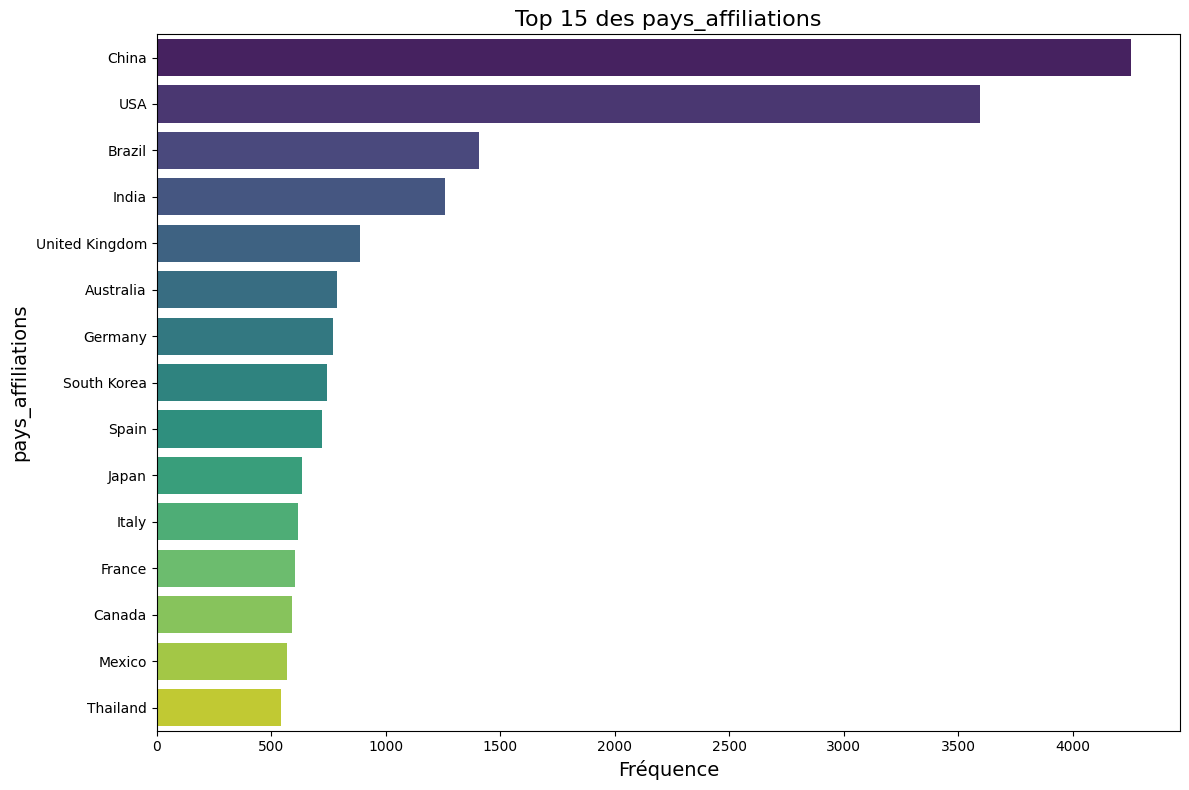

In [ ]:
plot_top_countries(analyse_totale, 'pays_affiliations')

/tmp/ipython-input-3370352473.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fréquence', y='Pays', data=top_countries, palette='viridis')


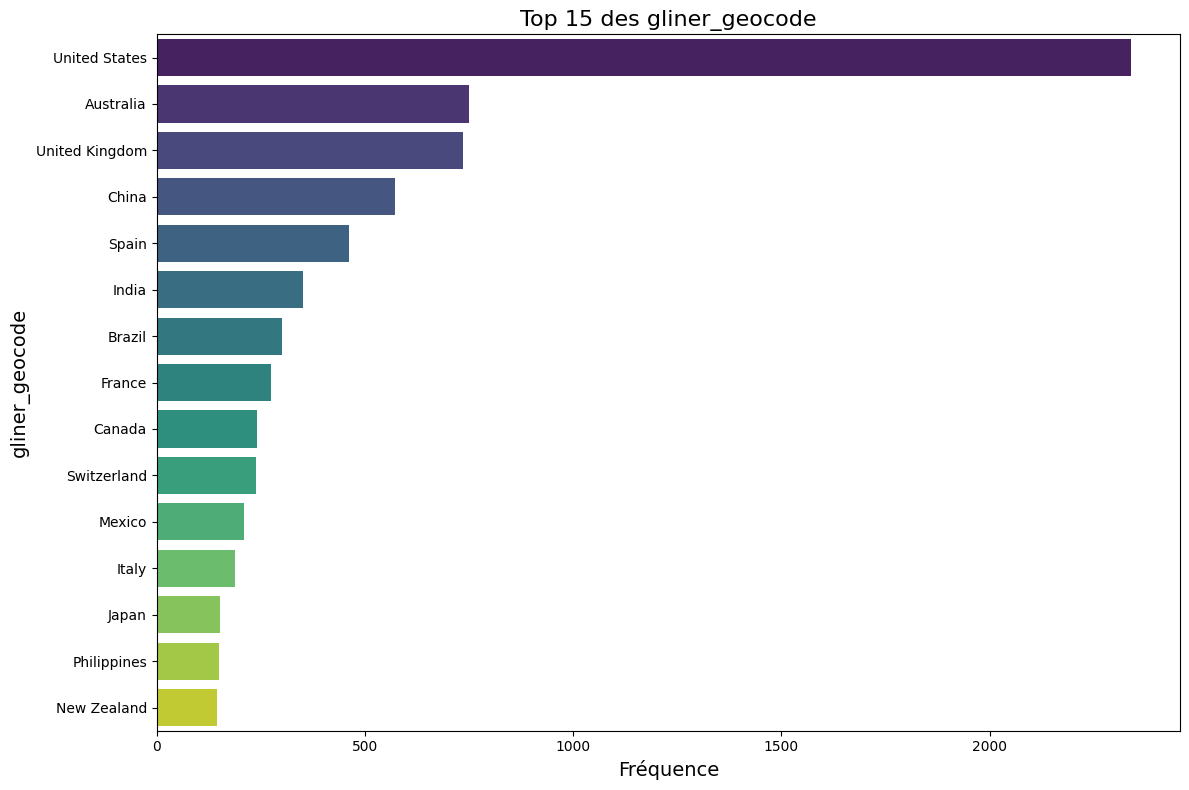

In [ ]:
plot_top_countries(analyse_totale, 'gliner_geocode')

/tmp/ipython-input-3370352473.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fréquence', y='Pays', data=top_countries, palette='viridis')


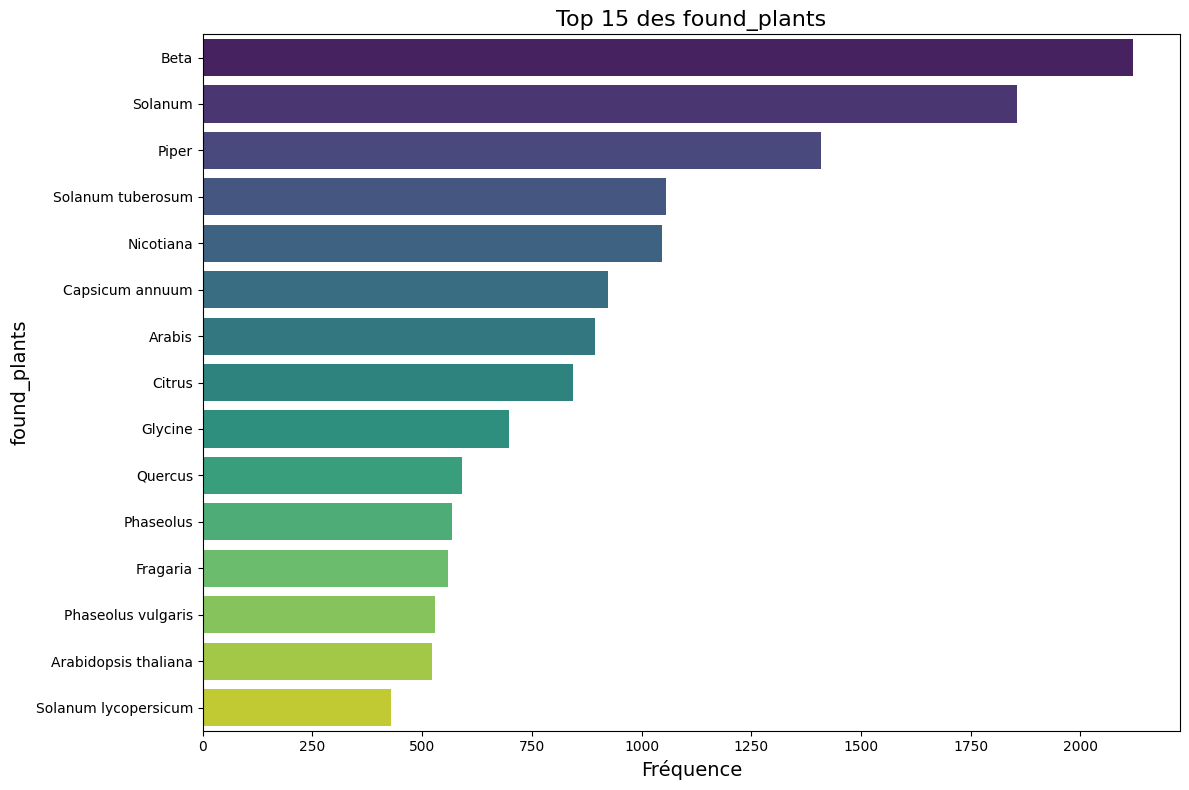

In [ ]:
plot_top_countries(analyse_totale, 'found_plants')

### **Bivarié**

In [ ]:
def plot_location_plant_heatmap(df, column, top_n=15):
    # Créer la matrice de co-occurrence
    cooccurrence = create_cooccurrence_matrix(df, column, 'found_plants', top_n)

    heatmap = go.Heatmap(
        z=cooccurrence.values,
        x=cooccurrence.columns,
        y=cooccurrence.index,
        colorscale='YlGnBu',
        colorbar=dict(title='Fréquence'),
        hovertemplate=(
            column + ": %{y}<br>" +
            "Plante: %{x}<br>" +
            "Cooccurrence: %{z}<extra></extra>"
        ),
        xgap=1,  # Espacement horizontal entre les cellules
        ygap=1   # Espacement vertical entre les cellules
    )

    fig = go.Figure(data=[heatmap])

    fig.update_layout(
        title=f'Heatmap de cooccurrence entre {column} et les plantes',
        xaxis_title='Plantes',
        yaxis_title=column,
        width=1500,
        height=900
    )

    fig.show()

In [ ]:
plot_location_plant_heatmap(phytophthora, 'gliner_geocode')

In [ ]:
plot_location_plant_heatmap(phytophthora, 'pays_affiliations')

##### **Graphes**

###### **Combinaison PMI et Cooccurrence**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx
from collections import Counter

def create_pmi_matrix(df, col1, col2, top_n=20):
    """
    Calcule la matrice de PMI (Pointwise Mutual Information).
    """
    flat_col1 = [item for sublist in df[col1].dropna() for item in (sublist if isinstance(sublist, list) else [sublist])]
    flat_col2 = [item for sublist in df[col2].dropna() for item in (sublist if isinstance(sublist, list) else [sublist])]

    if not flat_col1 or not flat_col2: return pd.DataFrame()

    all_pairs = []
    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []
        all_pairs.extend([(v1, v2) for v1 in col1_values for v2 in col2_values])

    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    cooccurrence_counts = Counter(all_pairs)
    freq_col1 = Counter(flat_col1)
    freq_col2 = Counter(flat_col2)

    total_pairs = len(all_pairs)
    if total_pairs == 0: return pd.DataFrame(index=top_values_col1, columns=top_values_col2)

    pmi_matrix = pd.DataFrame(0.0, index=top_values_col1, columns=top_values_col2)
    for val1 in top_values_col1:
        for val2 in top_values_col2:
            joint_count = cooccurrence_counts.get((val1, val2), 0)
            if joint_count == 0: continue

            p_joint = joint_count / total_pairs
            p_val1 = freq_col1.get(val1, 0) / len(flat_col1)
            p_val2 = freq_col2.get(val2, 0) / len(flat_col2)

            if p_val1 * p_val2 == 0: continue

            pmi = np.log2(p_joint / (p_val1 * p_val2))
            pmi_matrix.at[val1, val2] = pmi

    return pmi_matrix

def create_cooccurrence_matrix_fixed(df, col1, col2, top_n=20):
    """
    Calcule la matrice de co-occurrence.
    """
    flat_col1 = [item for sublist in df[col1].dropna() for item in (sublist if isinstance(sublist, list) else [sublist])]
    flat_col2 = [item for sublist in df[col2].dropna() for item in (sublist if isinstance(sublist, list) else [sublist])]

    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    cooccurrence = pd.DataFrame(0, index=top_values_col1, columns=top_values_col2)

    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []
        for val1 in col1_values:
            for val2 in col2_values:
                if val1 in top_values_col1 and val2 in top_values_col2:
                    cooccurrence.at[val1, val2] += 1
    return cooccurrence

def create_connected_network_graph_with_pmi(df, col1, col2, top_n=15, threshold=1, min_degree=1):
    """
    Crée un graphe avec co-occurrence comme poids et PMI comme attribut.
    """
    cooccurrence_matrix = create_cooccurrence_matrix_fixed(df, col1, col2, top_n)
    pmi_matrix = create_pmi_matrix(df, col1, col2, top_n)

    G = nx.Graph()

    all_nodes = set(cooccurrence_matrix.index) | set(cooccurrence_matrix.columns)
    for node in all_nodes:
        node_type = col1 if node in cooccurrence_matrix.index else col2
        G.add_node(node, type=node_type)

    for i in cooccurrence_matrix.index:
        for j in cooccurrence_matrix.columns:
            co_occurrence_weight = cooccurrence_matrix.at[i, j]
            if co_occurrence_weight >= threshold:
                pmi_value = pmi_matrix.at[i, j] if (i in pmi_matrix.index and j in pmi_matrix.columns) else 0
                G.add_edge(i, j, weight=co_occurrence_weight, pmi=pmi_value)

    nodes_to_remove = [node for node, degree in G.degree() if degree < min_degree]
    G.remove_nodes_from(nodes_to_remove)

    if G.number_of_nodes() > 0 and nx.number_connected_components(G) > 1:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    return G

# ============================================================================
# NOUVELLE FONCTION DE VISUALISATION
# ============================================================================
def plot_network_final(df, col1, col2, top_n=15, threshold=1, min_degree=1, figsize=(18, 12)):
    """
    Visualise le réseau où :
    - l'ÉPAISSEUR de l'arête dépend de la CO-OCCURRENCE (fréquence).
    - la COULEUR de l'arête dépend de la PMI (pertinence statistique).
    """
    G = create_connected_network_graph_with_pmi(df, col1, col2, top_n, threshold, min_degree)

    if G.number_of_nodes() == 0:
        print("⚠️ Aucun nœud connecté trouvé avec ces paramètres!")
        return None

    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, k=1.8, iterations=70, seed=42)

    # Dessin des nœuds (inchangé)
    nodes_col1 = [n for n, d in G.nodes(data=True) if d['type'] == col1]
    nodes_col2 = [n for n, d in G.nodes(data=True) if d['type'] == col2]
    node_sizes_map = {n: G.degree(n) * 80 + 200 for n in G.nodes()}
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_col1, node_color='skyblue', node_size=[node_sizes_map[n] for n in nodes_col1], alpha=0.9, label=col1)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_col2, node_color='lightgreen', node_size=[node_sizes_map[n] for n in nodes_col2], alpha=0.9, label=col2)

    edges = G.edges(data=True)

    if edges:
        # --- INVERSION DES ATTRIBUTS ---
        # Épaisseur basée sur la co-occurrence ('weight')
        edge_widths_data = [d['weight'] for _, _, d in edges]
        # Couleur basée sur la PMI ('pmi')
        edge_colors_data = [d['pmi'] for _, _, d in edges]

        # Normalisation de l'épaisseur
        min_width, max_width = 0.5, 6.0
        co_occurrence_values = np.array(edge_widths_data)
        if co_occurrence_values.max() > co_occurrence_values.min():
            normalized_widths = min_width + ((co_occurrence_values - co_occurrence_values.min()) / (co_occurrence_values.max() - co_occurrence_values.min())) * (max_width - min_width)
        else:
            normalized_widths = [min_width] * len(co_occurrence_values)

        # Dessin des arêtes avec les attributs inversés
        nx.draw_networkx_edges(G, pos, width=normalized_widths, edge_color=edge_colors_data, edge_cmap=plt.cm.coolwarm, alpha=0.8)

        # Mise à jour de la barre de couleur pour la PMI
        if edge_colors_data:
            norm = mcolors.Normalize(vmin=min(edge_colors_data), vmax=max(edge_colors_data))
            sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
            sm.set_array([])
            cbar = plt.colorbar(sm, shrink=0.8, ax=plt.gca())
            cbar.set_label('Valeur PMI (Pertinence Statistique)', weight='bold')

    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Mise à jour du titre
    plt.title(f"Réseau {col1} ↔ {col2}\n(Épaisseur = Co-occurrence, Couleur = PMI)", fontsize=18, fontweight='bold')

    plt.legend(loc='upper right')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return G

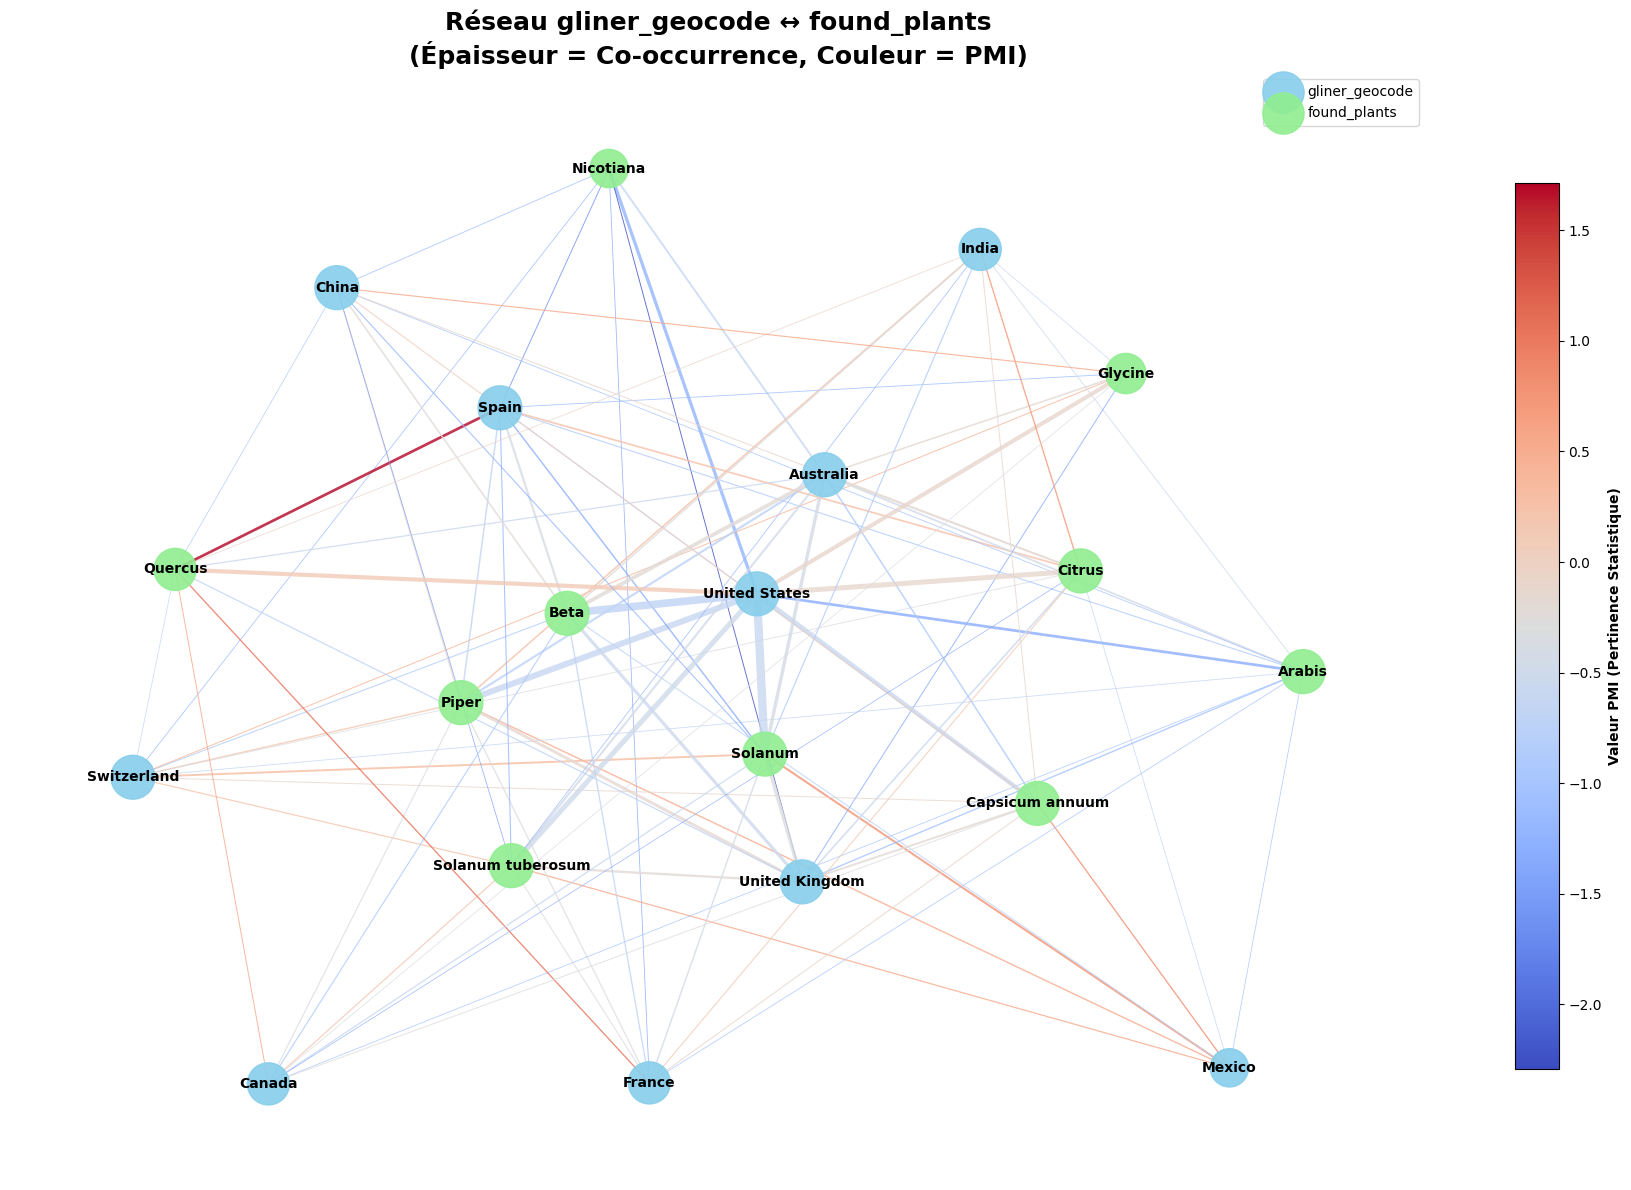

In [ ]:
plot_network_final(
    phytophthora,
    'gliner_geocode',
    'found_plants',
    top_n=10,
    threshold=5,
    min_degree=1
)

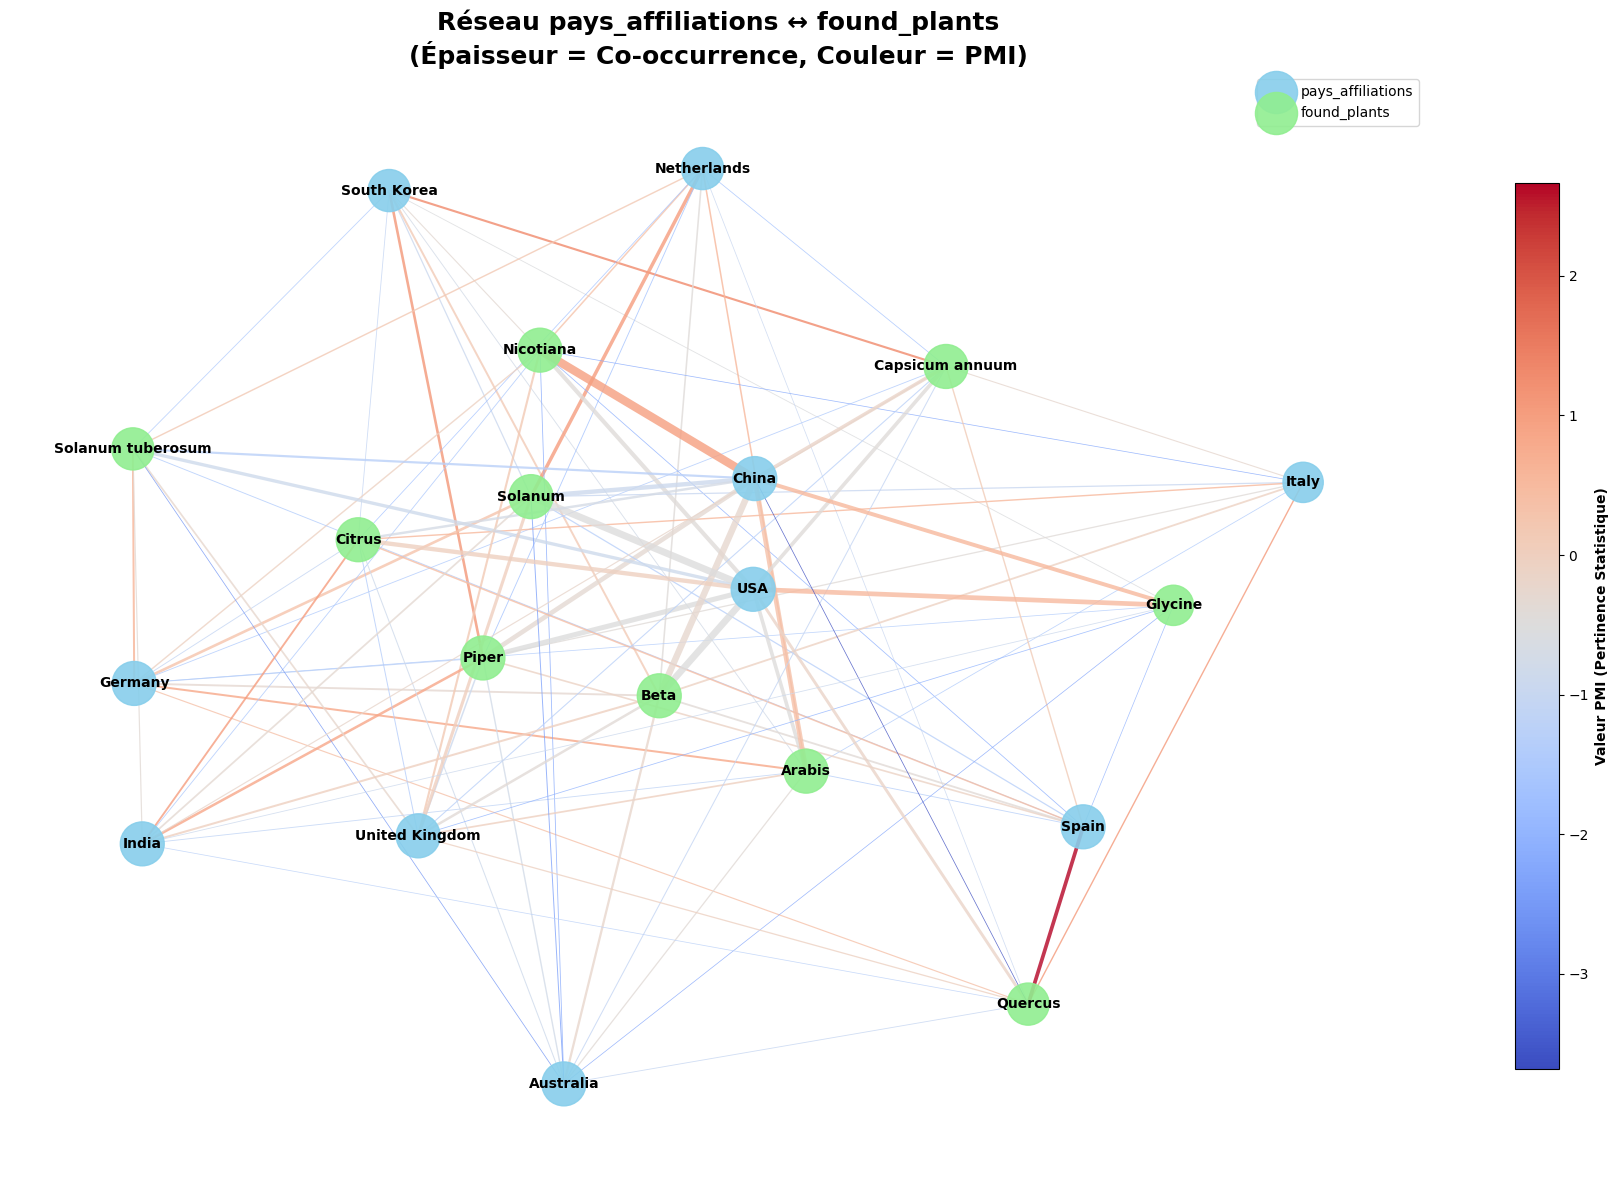

In [ ]:
plot_network_final(
    phytophthora,
    'pays_affiliations',
    'found_plants',
    top_n=10,
    threshold=5,
    min_degree=1
)

###### **PMI**

In [ ]:
# SOLUTION POUR ÉLIMINER LES NŒUDS ISOLÉS ET CRÉER UN RÉSEAU DENSE
# Code optimisé pour ne garder que les nœuds connectés

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

def create_connected_network_graph(df, col1, col2, top_n=15, threshold=1, min_degree=1):
    """
    Crée un graphe de réseau en ne gardant que les nœuds connectés.

    Parameters:
    -----------
    df : DataFrame
        Le dataframe contenant les données
    col1, col2 : str
        Les noms des colonnes à analyser
    top_n : int
        Nombre de valeurs les plus fréquentes à considérer
    threshold : int
        Seuil minimum pour créer une arête
    min_degree : int
        Degré minimum requis pour qu'un nœud soit gardé
    """

    # 1. Créer la matrice de co-occurrence
    cooccurrence = create_pmi_matrix(df, col1, col2, top_n)

    # 2. Créer le graphe initial
    G = nx.Graph()

    # Ajouter tous les nœuds avec leurs types
    for val in cooccurrence.index:
        G.add_node(val, type=col1)
    for val in cooccurrence.columns:
        G.add_node(val, type=col2)

    # 3. Ajouter les arêtes avec poids supérieur au seuil
    edges_added = 0
    for i in cooccurrence.index:
        for j in cooccurrence.columns:
            weight = cooccurrence.at[i, j]
            if weight > threshold:
                G.add_edge(i, j, weight=weight)
                edges_added += 1

    print(f"Graphe initial: {G.number_of_nodes()} nœuds, {edges_added} arêtes")

    # 4. FILTRER: Ne garder que les nœuds avec au moins min_degree connexions
    nodes_to_remove = [node for node in G.nodes() if G.degree(node) < min_degree]
    G.remove_nodes_from(nodes_to_remove)

    #print(f"Nœuds supprimés (degré < {min_degree}): {len(nodes_to_remove)}")
    #print(f"Graphe filtré: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")

    # 5. Optionnel: Ne garder que la plus grande composante connexe
    if G.number_of_nodes() > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
        print(f"Plus grande composante connexe: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")

    return G


def create_pmi_matrix(df, col1, col2, top_n=20):
    """
    Calcule la matrice de PMI (Pointwise Mutual Information) entre les valeurs les plus fréquentes
    de deux colonnes contenant des listes.
    """
    # Aplatir les valeurs pour déterminer les plus fréquentes
    flat_col1 = []
    flat_col2 = []
    all_pairs = []

    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []

        flat_col1.extend(col1_values)
        flat_col2.extend(col2_values)

        all_pairs.extend([(v1, v2) for v1 in col1_values for v2 in col2_values])

    # Top N valeurs
    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    # Cooccurrence brute (fréquence des paires)
    cooccurrence = Counter([(v1, v2) for (v1, v2) in all_pairs if v1 in top_values_col1 and v2 in top_values_col2])

    # Fréquences marginales
    freq_col1 = Counter([v1 for (v1, _) in cooccurrence])
    freq_col2 = Counter([v2 for (_, v2) in cooccurrence])

    total_count = sum(cooccurrence.values())

    # Initialiser la matrice PMI
    pmi_matrix = pd.DataFrame(0.0, index=top_values_col1, columns=top_values_col2)

    for val1 in top_values_col1:
        for val2 in top_values_col2:
            joint = cooccurrence.get((val1, val2), 0)
            if joint == 0:
                continue  # Évite log(0)

            p_joint = joint / total_count
            p_val1 = freq_col1[val1] / total_count
            p_val2 = freq_col2[val2] / total_count

            pmi = np.log2(p_joint / (p_val1 * p_val2))
            pmi_matrix.at[val1, val2] = pmi

    return pmi_matrix

def create_cooccurrence_matrix_fixed(df, col1, col2, top_n=20):
    """
    Version corrigée de la matrice de co-occurrence sans transformation logarithmique.
    """
    # Aplatir les listes pour obtenir les valeurs les plus fréquentes
    flat_col1 = []
    flat_col2 = []

    for _, row in df.iterrows():
        if isinstance(row[col1], list):
            flat_col1.extend(row[col1])
        elif pd.notna(row[col1]):
            flat_col1.append(row[col1])

        if isinstance(row[col2], list):
            flat_col2.extend(row[col2])
        elif pd.notna(row[col2]):
            flat_col2.append(row[col2])

    # Obtenir les top N valeurs
    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    # Initialiser la matrice
    cooccurrence = pd.DataFrame(0, index=top_values_col1, columns=top_values_col2)

    # Remplir la matrice
    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []

        for val1 in col1_values:
            for val2 in col2_values:
                if val1 in top_values_col1 and val2 in top_values_col2:
                    cooccurrence.at[val1, val2] += 1

    return cooccurrence

def plot_connected_network(df, col1, col2, top_n=15, threshold=2, min_degree=1, figsize=(16, 9)):
    """
    Visualise un réseau ne contenant que des nœuds connectés.
    """

    # Créer le graphe filtré
    G = create_connected_network_graph(df, col1, col2, top_n, threshold, min_degree)

    if G.number_of_nodes() == 0:
        print("⚠️ Aucun nœud connecté trouvé avec ces paramètres!")
        print("💡 Suggestions:")
        print(f"   - Réduire le threshold (actuellement: {threshold})")
        print(f"   - Augmenter top_n (actuellement: {top_n})")
        print(f"   - Réduire min_degree (actuellement: {min_degree})")
        return None

    # Créer la visualisation
    plt.figure(figsize=figsize)

    # Calculer les positions avec un layout optimisé
    if G.number_of_nodes() < 50:
        pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42)
    else:
        pos = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=42)

    # Séparer les nœuds par type
    nodes_col1 = [n for n, d in G.nodes(data=True) if d['type'] == col1]
    nodes_col2 = [n for n, d in G.nodes(data=True) if d['type'] == col2]

    # Calculer les tailles des nœuds basées sur le degré
    node_sizes_col1 = [G.degree(n) * 50 + 100 for n in nodes_col1]
    node_sizes_col2 = [G.degree(n) * 50 + 100 for n in nodes_col2]

    # Dessiner les nœuds avec des tailles proportionnelles au degré
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_col1,
        node_color='skyblue',
        node_size=node_sizes_col1,
        alpha=0.8,
        label=f'{col1} ({len(nodes_col1)} nœuds)',
        edgecolors='navy',
        linewidths=1
    )
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_col2,
        node_color='lightgreen',
        node_size=node_sizes_col2,
        alpha=0.8,
        label=f'{col2} ({len(nodes_col2)} nœuds)',
        edgecolors='darkgreen',
        linewidths=1
    )

    # Dessiner les arêtes avec épaisseur proportionnelle au poids
    edges = list(G.edges(data=True))
    if edges:
        weights = [d['weight'] for u, v, d in edges]
        max_weight = max(weights)
        edge_widths = [w/max_weight * 4 + 0.5 for w in weights]
        # Normalisation des poids pour la palette de couleurs
        norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
        cmap = cm.get_cmap('binary')
        edge_colors = [cmap(norm(w)) for w in weights]

        nx.draw_networkx_edges(
            G, pos,
            width=edge_widths,
            alpha=0.8,
            edge_color=edge_colors
        )

    # Ajouter les étiquettes avec une taille adaptée
    font_size = max(6, min(12, 200 // G.number_of_nodes()))
    nx.draw_networkx_labels(G, pos, font_size=font_size, font_weight='bold')

    # Titre et légende
    plt.title(f"Réseau connecté: {col1} ↔ {col2}\n"
              f"{G.number_of_nodes()} nœuds connectés, {G.number_of_edges()} arêtes",
              fontsize=16, fontweight='bold')
    plt.legend(loc='upper right')
    plt.axis('off')
    plt.tight_layout()

    # Statistiques du réseau
    print(f"\n📊 STATISTIQUES DU RÉSEAU CONNECTÉ:")
    print(f"   • Nœuds: {G.number_of_nodes()}")
    print(f"   • Arêtes: {G.number_of_edges()}")
    print(f"   • Densité: {nx.density(G):.3f}")
    print(f"   • Degré moyen: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

    # Top nœuds par degré
    degrees = dict(G.degree())
    top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\n🌟 TOP 5 NŒUDS LES PLUS CONNECTÉS:")
    for node, degree in top_nodes:
        node_type = G.nodes[node]['type']
        print(f"   • {node} ({node_type}): {degree} connexions")

    plt.savefig(f"connected_network_{col1}_{col2}.png", dpi=300, bbox_inches='tight')
    plt.show()

    return G

def analyze_network_density(df, col1, col2, top_n_range=[10, 15, 20, 25], threshold_range=[1, 2, 3, 4]):
    """
    Analyse la densité du réseau avec différents paramètres pour trouver les meilleurs.
    """

    print("🔍 ANALYSE DE LA DENSITÉ DU RÉSEAU")
    print("=" * 50)

    results = []

    for top_n in top_n_range:
        for threshold in threshold_range:
            G = create_connected_network_graph(df, col1, col2, top_n, threshold, min_degree=1)

            if G.number_of_nodes() > 0:
                density = nx.density(G)
                avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

                results.append({
                    'top_n': top_n,
                    'threshold': threshold,
                    'nodes': G.number_of_nodes(),
                    'edges': G.number_of_edges(),
                    'density': density,
                    'avg_degree': avg_degree
                })

    # Convertir en DataFrame et afficher
    results_df = pd.DataFrame(results)

    if not results_df.empty:
        print("\n📊 RÉSULTATS DE L'ANALYSE:")
        print(results_df.to_string(index=False))

        # Recommandations
        print("\n💡 RECOMMANDATIONS:")

        # Meilleur équilibre densité/taille
        best_balance = results_df.loc[results_df['density'].idxmax()]
        print(f"   • Meilleure densité: top_n={best_balance['top_n']}, threshold={best_balance['threshold']}")
        print(f"     → {best_balance['nodes']} nœuds, densité={best_balance['density']:.3f}")

        # Plus grand réseau connecté
        largest_network = results_df.loc[results_df['nodes'].idxmax()]
        print(f"   • Plus grand réseau: top_n={largest_network['top_n']}, threshold={largest_network['threshold']}")
        print(f"     → {largest_network['nodes']} nœuds, {largest_network['edges']} arêtes")

    return results_df

def plot_optimized_network(df, col1, col2):
    """
    Crée automatiquement le réseau le plus optimal (sans nœuds isolés).
    """

    print("🎯 CRÉATION DU RÉSEAU OPTIMAL")
    print("=" * 40)

    # 1. Analyser pour trouver les meilleurs paramètres
    results_df = analyze_network_density(df, col1, col2)

    if results_df.empty:
        print("❌ Impossible de créer un réseau connecté avec ces données.")
        return None

    # 2. Choisir les paramètres optimaux
    # Privilégier un bon équilibre entre taille et densité
    results_df['score'] = results_df['nodes'] * results_df['density']
    best_params = results_df.loc[results_df['score'].idxmax()]

    print(f"\n✅ Paramètres optimaux sélectionnés:")
    print(f"   • top_n: {best_params['top_n']}")
    print(f"   • threshold: {best_params['threshold']}")

    # 3. Créer et visualiser le réseau optimal
    G = plot_connected_network(
        df, col1, col2,
        top_n=int(best_params['top_n']),
        threshold=int(best_params['threshold']),
        min_degree=1
    )

    return G

# ============================================================================
# FONCTION PRINCIPALE AMÉLIORÉE
# ============================================================================

def plot_country_location_network_improved(df, col1, col2, auto_optimize=True, **kwargs):
    """
    Version améliorée qui élimine automatiquement les nœuds isolés.

    Parameters:
    -----------
    df : DataFrame
        Vos données
    col1, col2 : str
        Colonnes à analyser (ex: 'pays_affiliations', 'locations_gliner')
    auto_optimize : bool
        Si True, trouve automatiquement les meilleurs paramètres
    **kwargs : dict
        Paramètres manuels (top_n, threshold, min_degree)
    """

    if auto_optimize:
        print("🚀 MODE AUTOMATIQUE: Recherche des paramètres optimaux...")
        return plot_optimized_network(df, col1, col2)
    else:
        print("⚙️ MODE MANUEL: Utilisation des paramètres fournis...")
        top_n = kwargs.get('top_n', 15)
        threshold = kwargs.get('threshold', 2)
        min_degree = kwargs.get('min_degree', 1)

        return plot_connected_network(df, col1, col2, top_n, threshold, min_degree)


"""
# ============================================================================
# EXEMPLES D'UTILISATION
# ============================================================================


# 1. Mode automatique (recommandé)
G = plot_country_location_network_improved(
    df,
    'pays_affiliations',
    'gliner_geocode',
    auto_optimize=True
)

# 2. Mode manuel avec paramètres spécifiques
G = plot_country_location_network_improved(
    df,
    'pays_affiliations',
    'gliner_geocode',
    auto_optimize=False,
    top_n=20,
    threshold=3,
    min_degree=2
)

# 3. Analyse de densité pour explorer les options
results = analyze_network_density(
    df,
    'pays_affiliations',
    'gliner_geocode'
)
"""

"\n# ============================================================================\n# EXEMPLES D'UTILISATION\n# ============================================================================\n\n\n# 1. Mode automatique (recommandé)\nG = plot_country_location_network_improved(\n    df,\n    'pays_affiliations',\n    'gliner_geocode',\n    auto_optimize=True\n)\n\n# 2. Mode manuel avec paramètres spécifiques\nG = plot_country_location_network_improved(\n    df,\n    'pays_affiliations',\n    'gliner_geocode',\n    auto_optimize=False,\n    top_n=20,\n    threshold=3,\n    min_degree=2\n)\n\n# 3. Analyse de densité pour explorer les options\nresults = analyze_network_density(\n    df,\n    'pays_affiliations',\n    'gliner_geocode'\n)\n"

🚀 MODE AUTOMATIQUE: Recherche des paramètres optimaux...
🎯 CRÉATION DU RÉSEAU OPTIMAL
🔍 ANALYSE DE LA DENSITÉ DU RÉSEAU
Graphe initial: 20 nœuds, 76 arêtes
Plus grande composante connexe: 20 nœuds, 76 arêtes
Graphe initial: 20 nœuds, 73 arêtes
Plus grande composante connexe: 20 nœuds, 73 arêtes
Graphe initial: 20 nœuds, 52 arêtes
Plus grande composante connexe: 20 nœuds, 52 arêtes
Graphe initial: 20 nœuds, 25 arêtes
Plus grande composante connexe: 18 nœuds, 25 arêtes
Graphe initial: 30 nœuds, 149 arêtes
Plus grande composante connexe: 30 nœuds, 149 arêtes
Graphe initial: 30 nœuds, 134 arêtes
Plus grande composante connexe: 30 nœuds, 134 arêtes
Graphe initial: 30 nœuds, 85 arêtes
Plus grande composante connexe: 29 nœuds, 85 arêtes
Graphe initial: 30 nœuds, 27 arêtes
Plus grande composante connexe: 20 nœuds, 27 arêtes
Graphe initial: 40 nœuds, 217 arêtes
Plus grande composante connexe: 40 nœuds, 217 arêtes
Graphe initial: 40 nœuds, 180 arêtes
Plus grande composante connexe: 40 nœuds, 180

/tmp/ipython-input-268-3342783590.py:218: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.




📊 STATISTIQUES DU RÉSEAU CONNECTÉ:
   • Nœuds: 49
   • Arêtes: 289
   • Densité: 0.246
   • Degré moyen: 11.80

🌟 TOP 5 NŒUDS LES PLUS CONNECTÉS:
   • United States (gliner_geocode): 25 connexions
   • Brazil (gliner_geocode): 25 connexions
   • China (gliner_geocode): 24 connexions
   • Canada (gliner_geocode): 22 connexions
   • Japan (gliner_geocode): 22 connexions


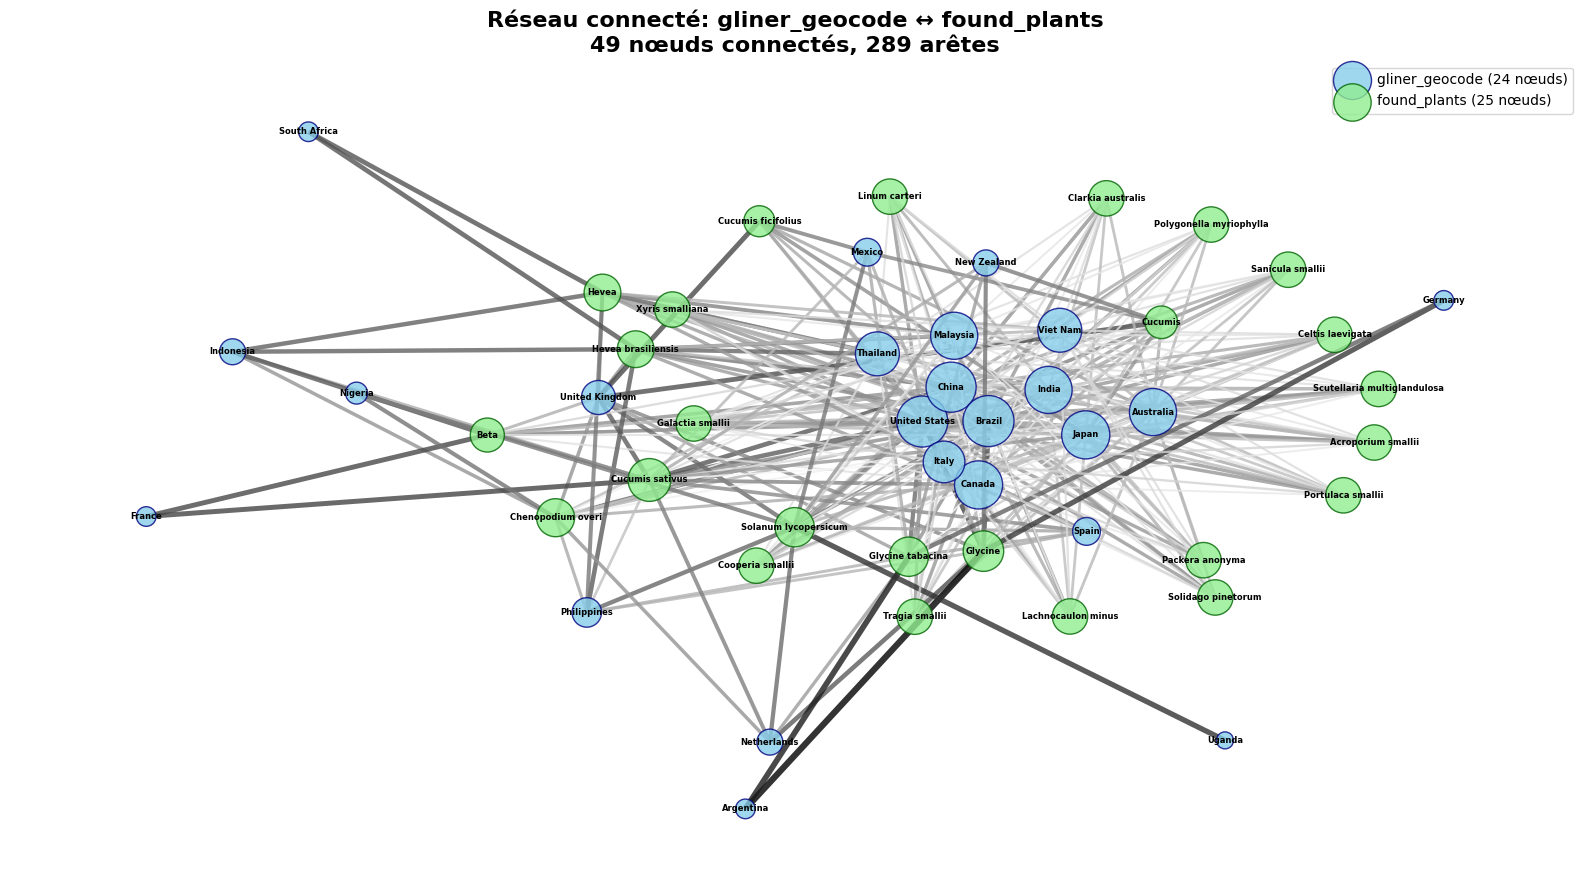

In [ ]:
plot_country_location_network_improved(df, 'gliner_geocode', 'found_plants', auto_optimize=True)

###### **Cooccurrence**

In [ ]:
# SOLUTION POUR ÉLIMINER LES NŒUDS ISOLÉS ET CRÉER UN RÉSEAU DENSE
# Code optimisé pour ne garder que les nœuds connectés

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

def create_connected_network_graph(df, col1, col2, top_n=15, threshold=1, min_degree=1):
    """
    Crée un graphe de réseau en ne gardant que les nœuds connectés.

    Parameters:
    -----------
    df : DataFrame
        Le dataframe contenant les données
    col1, col2 : str
        Les noms des colonnes à analyser
    top_n : int
        Nombre de valeurs les plus fréquentes à considérer
    threshold : int
        Seuil minimum pour créer une arête
    min_degree : int
        Degré minimum requis pour qu'un nœud soit gardé
    """

    # 1. Créer la matrice de co-occurrence
    pmi_matrix = create_pmi_matrix(df, col1, col2, top_n)
    cooccurrence = create_cooccurrence_matrix_fixed(df, col1, col2, top_n)

    # 2. Créer le graphe initial
    G = nx.Graph()

    # Ajouter tous les nœuds avec leurs types
    for val in cooccurrence.index:
        G.add_node(val, type=col1)
    for val in cooccurrence.columns:
        G.add_node(val, type=col2)

    # 3. Ajouter les arêtes avec poids supérieur au seuil
    edges_added = 0
    for i in cooccurrence.index:
        for j in cooccurrence.columns:
            weight = cooccurrence.at[i, j]
            if weight > threshold:
                G.add_edge(i, j, weight=weight)
                edges_added += 1

    print(f"Graphe initial: {G.number_of_nodes()} nœuds, {edges_added} arêtes")

    # 4. FILTRER: Ne garder que les nœuds avec au moins min_degree connexions
    nodes_to_remove = [node for node in G.nodes() if G.degree(node) < min_degree]
    G.remove_nodes_from(nodes_to_remove)

    #print(f"Nœuds supprimés (degré < {min_degree}): {len(nodes_to_remove)}")
    #print(f"Graphe filtré: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")

    # 5. Optionnel: Ne garder que la plus grande composante connexe
    if G.number_of_nodes() > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
        print(f"Plus grande composante connexe: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")

    return G


def create_pmi_matrix(df, col1, col2, top_n=20):
    """
    Calcule la matrice de PMI (Pointwise Mutual Information) entre les valeurs les plus fréquentes
    de deux colonnes contenant des listes.
    """
    # Aplatir les valeurs pour déterminer les plus fréquentes
    flat_col1 = []
    flat_col2 = []
    all_pairs = []

    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []

        flat_col1.extend(col1_values)
        flat_col2.extend(col2_values)

        all_pairs.extend([(v1, v2) for v1 in col1_values for v2 in col2_values])

    # Top N valeurs
    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    # Cooccurrence brute (fréquence des paires)
    cooccurrence = Counter([(v1, v2) for (v1, v2) in all_pairs if v1 in top_values_col1 and v2 in top_values_col2])

    # Fréquences marginales
    freq_col1 = Counter([v1 for (v1, _) in cooccurrence])
    freq_col2 = Counter([v2 for (_, v2) in cooccurrence])

    total_count = sum(cooccurrence.values())

    # Initialiser la matrice PMI
    pmi_matrix = pd.DataFrame(0.0, index=top_values_col1, columns=top_values_col2)

    for val1 in top_values_col1:
        for val2 in top_values_col2:
            joint = cooccurrence.get((val1, val2), 0)
            if joint == 0:
                continue  # Évite log(0)

            p_joint = joint / total_count
            p_val1 = freq_col1[val1] / total_count
            p_val2 = freq_col2[val2] / total_count

            pmi = np.log2(p_joint / (p_val1 * p_val2))
            pmi_matrix.at[val1, val2] = pmi

    return pmi_matrix

def create_cooccurrence_matrix_fixed(df, col1, col2, top_n=20):
    """
    Version corrigée de la matrice de co-occurrence sans transformation logarithmique.
    """
    # Aplatir les listes pour obtenir les valeurs les plus fréquentes
    flat_col1 = []
    flat_col2 = []

    for _, row in df.iterrows():
        if isinstance(row[col1], list):
            flat_col1.extend(row[col1])
        elif pd.notna(row[col1]):
            flat_col1.append(row[col1])

        if isinstance(row[col2], list):
            flat_col2.extend(row[col2])
        elif pd.notna(row[col2]):
            flat_col2.append(row[col2])

    # Obtenir les top N valeurs
    top_values_col1 = [item[0] for item in Counter(flat_col1).most_common(top_n)]
    top_values_col2 = [item[0] for item in Counter(flat_col2).most_common(top_n)]

    # Initialiser la matrice
    cooccurrence = pd.DataFrame(0, index=top_values_col1, columns=top_values_col2)

    # Remplir la matrice
    for _, row in df.iterrows():
        col1_values = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        col2_values = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []

        for val1 in col1_values:
            for val2 in col2_values:
                if val1 in top_values_col1 and val2 in top_values_col2:
                    cooccurrence.at[val1, val2] += 1

    return cooccurrence

def plot_connected_network(df, col1, col2, top_n=15, threshold=2, min_degree=1, figsize=(16, 9)):
    """
    Visualise un réseau ne contenant que des nœuds connectés.
    """

    # Créer le graphe filtré
    G = create_connected_network_graph(df, col1, col2, top_n, threshold, min_degree)

    if G.number_of_nodes() == 0:
        print("⚠️ Aucun nœud connecté trouvé avec ces paramètres!")
        print("💡 Suggestions:")
        print(f"   - Réduire le threshold (actuellement: {threshold})")
        print(f"   - Augmenter top_n (actuellement: {top_n})")
        print(f"   - Réduire min_degree (actuellement: {min_degree})")
        return None

    # Créer la visualisation
    plt.figure(figsize=figsize)

    # Calculer les positions avec un layout optimisé
    if G.number_of_nodes() < 50:
        pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42)
    else:
        pos = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=42)

    # Séparer les nœuds par type
    nodes_col1 = [n for n, d in G.nodes(data=True) if d['type'] == col1]
    nodes_col2 = [n for n, d in G.nodes(data=True) if d['type'] == col2]

    # Calculer les tailles des nœuds basées sur le degré
    node_sizes_col1 = [G.degree(n) * 50 + 100 for n in nodes_col1]
    node_sizes_col2 = [G.degree(n) * 50 + 100 for n in nodes_col2]

    # Dessiner les nœuds avec des tailles proportionnelles au degré
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_col1,
        node_color='skyblue',
        node_size=node_sizes_col1,
        alpha=0.8,
        label=f'{col1} ({len(nodes_col1)} nœuds)',
        edgecolors='navy',
        linewidths=1
    )
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_col2,
        node_color='lightgreen',
        node_size=node_sizes_col2,
        alpha=0.8,
        label=f'{col2} ({len(nodes_col2)} nœuds)',
        edgecolors='darkgreen',
        linewidths=1
    )

    # Dessiner les arêtes avec épaisseur proportionnelle au poids
    edges = list(G.edges(data=True))
    if edges:
        weights = [d['weight'] for u, v, d in edges]
        max_weight = max(weights)
        edge_widths = [w/max_weight * 4 + 0.5 for w in weights]
        # Normalisation des poids pour la palette de couleurs
        norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
        cmap = cm.get_cmap('binary')
        edge_colors = [cmap(norm(w)) for w in weights]

        nx.draw_networkx_edges(
            G, pos,
            width=edge_widths,
            alpha=0.8,
            edge_color=edge_colors
        )

    # Ajouter les étiquettes avec une taille adaptée
    font_size = max(6, min(12, 200 // G.number_of_nodes()))
    nx.draw_networkx_labels(G, pos, font_size=font_size, font_weight='bold')

    # Titre et légende
    plt.title(f"Réseau connecté: {col1} ↔ {col2}\n"
              f"{G.number_of_nodes()} nœuds connectés, {G.number_of_edges()} arêtes",
              fontsize=16, fontweight='bold')
    plt.legend(loc='upper right')
    plt.axis('off')
    plt.tight_layout()

    # Statistiques du réseau
    print(f"\n📊 STATISTIQUES DU RÉSEAU CONNECTÉ:")
    print(f"   • Nœuds: {G.number_of_nodes()}")
    print(f"   • Arêtes: {G.number_of_edges()}")
    print(f"   • Densité: {nx.density(G):.3f}")
    print(f"   • Degré moyen: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

    # Top nœuds par degré
    degrees = dict(G.degree())
    top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\n🌟 TOP 5 NŒUDS LES PLUS CONNECTÉS:")
    for node, degree in top_nodes:
        node_type = G.nodes[node]['type']
        print(f"   • {node} ({node_type}): {degree} connexions")

    plt.savefig(f"connected_network_{col1}_{col2}.png", dpi=300, bbox_inches='tight')
    plt.show()

    return G

def analyze_network_density(df, col1, col2, top_n_range=[10, 15, 20, 25], threshold_range=[1, 2, 3, 4]):
    """
    Analyse la densité du réseau avec différents paramètres pour trouver les meilleurs.
    """

    print("🔍 ANALYSE DE LA DENSITÉ DU RÉSEAU")
    print("=" * 50)

    results = []

    for top_n in top_n_range:
        for threshold in threshold_range:
            G = create_connected_network_graph(df, col1, col2, top_n, threshold, min_degree=1)

            if G.number_of_nodes() > 0:
                density = nx.density(G)
                avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

                results.append({
                    'top_n': top_n,
                    'threshold': threshold,
                    'nodes': G.number_of_nodes(),
                    'edges': G.number_of_edges(),
                    'density': density,
                    'avg_degree': avg_degree
                })

    # Convertir en DataFrame et afficher
    results_df = pd.DataFrame(results)

    if not results_df.empty:
        print("\n📊 RÉSULTATS DE L'ANALYSE:")
        print(results_df.to_string(index=False))

        # Recommandations
        print("\n💡 RECOMMANDATIONS:")

        # Meilleur équilibre densité/taille
        best_balance = results_df.loc[results_df['density'].idxmax()]
        print(f"   • Meilleure densité: top_n={best_balance['top_n']}, threshold={best_balance['threshold']}")
        print(f"     → {best_balance['nodes']} nœuds, densité={best_balance['density']:.3f}")

        # Plus grand réseau connecté
        largest_network = results_df.loc[results_df['nodes'].idxmax()]
        print(f"   • Plus grand réseau: top_n={largest_network['top_n']}, threshold={largest_network['threshold']}")
        print(f"     → {largest_network['nodes']} nœuds, {largest_network['edges']} arêtes")

    return results_df

def plot_optimized_network(df, col1, col2):
    """
    Crée automatiquement le réseau le plus optimal (sans nœuds isolés).
    """

    print("🎯 CRÉATION DU RÉSEAU OPTIMAL")
    print("=" * 40)

    # 1. Analyser pour trouver les meilleurs paramètres
    results_df = analyze_network_density(df, col1, col2)

    if results_df.empty:
        print("❌ Impossible de créer un réseau connecté avec ces données.")
        return None

    # 2. Choisir les paramètres optimaux
    # Privilégier un bon équilibre entre taille et densité
    results_df['score'] = results_df['nodes'] * results_df['density']
    best_params = results_df.loc[results_df['score'].idxmax()]

    print(f"\n✅ Paramètres optimaux sélectionnés:")
    print(f"   • top_n: {best_params['top_n']}")
    print(f"   • threshold: {best_params['threshold']}")

    # 3. Créer et visualiser le réseau optimal
    G = plot_connected_network(
        df, col1, col2,
        top_n=int(best_params['top_n']),
        threshold=int(best_params['threshold']),
        min_degree=1
    )

    return G

# ============================================================================
# FONCTION PRINCIPALE AMÉLIORÉE
# ============================================================================

def plot_country_location_network_improved(df, col1, col2, auto_optimize=True, **kwargs):
    """
    Version améliorée qui élimine automatiquement les nœuds isolés.

    Parameters:
    -----------
    df : DataFrame
        Vos données
    col1, col2 : str
        Colonnes à analyser (ex: 'pays_affiliations', 'locations_gliner')
    auto_optimize : bool
        Si True, trouve automatiquement les meilleurs paramètres
    **kwargs : dict
        Paramètres manuels (top_n, threshold, min_degree)
    """

    if auto_optimize:
        print("🚀 MODE AUTOMATIQUE: Recherche des paramètres optimaux...")
        return plot_optimized_network(df, col1, col2)
    else:
        print("⚙️ MODE MANUEL: Utilisation des paramètres fournis...")
        top_n = kwargs.get('top_n', 15)
        threshold = kwargs.get('threshold', 2)
        min_degree = kwargs.get('min_degree', 1)

        return plot_connected_network(df, col1, col2, top_n, threshold, min_degree)


"""
# ============================================================================
# EXEMPLES D'UTILISATION
# ============================================================================


# 1. Mode automatique (recommandé)
G = plot_country_location_network_improved(
    df,
    'pays_affiliations',
    'gliner_geocode',
    auto_optimize=True
)

# 2. Mode manuel avec paramètres spécifiques
G = plot_country_location_network_improved(
    df,
    'pays_affiliations',
    'gliner_geocode',
    auto_optimize=False,
    top_n=20,
    threshold=3,
    min_degree=2
)

# 3. Analyse de densité pour explorer les options
results = analyze_network_density(
    df,
    'pays_affiliations',
    'gliner_geocode'
)
"""

"\n# ============================================================================\n# EXEMPLES D'UTILISATION\n# ============================================================================\n\n\n# 1. Mode automatique (recommandé)\nG = plot_country_location_network_improved(\n    df,\n    'pays_affiliations',\n    'gliner_geocode',\n    auto_optimize=True\n)\n\n# 2. Mode manuel avec paramètres spécifiques\nG = plot_country_location_network_improved(\n    df,\n    'pays_affiliations',\n    'gliner_geocode',\n    auto_optimize=False,\n    top_n=20,\n    threshold=3,\n    min_degree=2\n)\n\n# 3. Analyse de densité pour explorer les options\nresults = analyze_network_density(\n    df,\n    'pays_affiliations',\n    'gliner_geocode'\n)\n"

🚀 MODE AUTOMATIQUE: Recherche des paramètres optimaux...
🎯 CRÉATION DU RÉSEAU OPTIMAL
🔍 ANALYSE DE LA DENSITÉ DU RÉSEAU
Graphe initial: 20 nœuds, 55 arêtes
Plus grande composante connexe: 20 nœuds, 55 arêtes
Graphe initial: 20 nœuds, 31 arêtes
Plus grande composante connexe: 16 nœuds, 31 arêtes
Graphe initial: 20 nœuds, 24 arêtes
Plus grande composante connexe: 16 nœuds, 24 arêtes
Graphe initial: 20 nœuds, 16 arêtes
Plus grande composante connexe: 13 nœuds, 16 arêtes
Graphe initial: 30 nœuds, 99 arêtes
Plus grande composante connexe: 30 nœuds, 99 arêtes
Graphe initial: 30 nœuds, 55 arêtes
Plus grande composante connexe: 24 nœuds, 55 arêtes
Graphe initial: 30 nœuds, 37 arêtes
Plus grande composante connexe: 23 nœuds, 37 arêtes
Graphe initial: 30 nœuds, 19 arêtes
Plus grande composante connexe: 15 nœuds, 19 arêtes
Graphe initial: 40 nœuds, 137 arêtes
Plus grande composante connexe: 39 nœuds, 137 arêtes
Graphe initial: 40 nœuds, 73 arêtes
Plus grande composante connexe: 31 nœuds, 73 arête

/tmp/ipython-input-256-1080794023.py:219: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



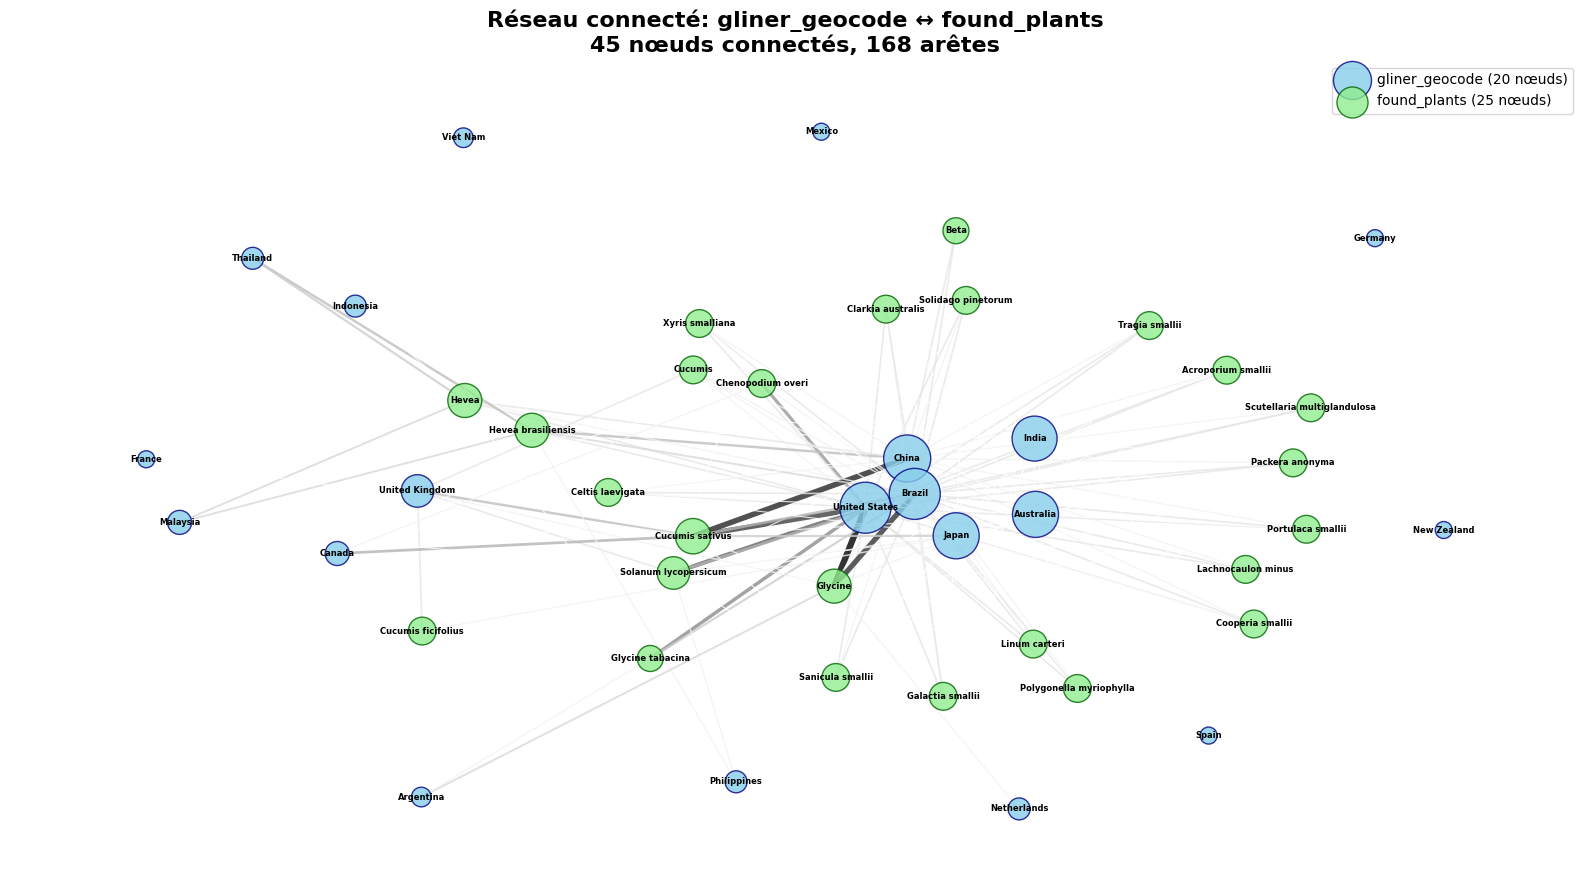

In [ ]:
plot_country_location_network_improved(df, 'gliner_geocode', 'found_plants', auto_optimize=True)

### **Trivarié**

In [ ]:
def plot_clustering(df, n_clusters=5):
    # Effectuer le clustering
    df_with_clusters, kmeans, features_2d = perform_clustering(
        df, 'pays_affiliations', 'gliner_geocode', 'found_plants', n_clusters
    )

    # Visualiser les clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        features_2d[:, 0],
        features_2d[:, 1],
        c=df_with_clusters['cluster'],
        cmap='Greens',
        alpha=0.7
    )
    plt.colorbar(scatter, label='Cluster')
    plt.title("Clustering des combinaisons de pays, localisations et plantes", fontsize=16)
    plt.xlabel("Composante principale 1", fontsize=14)
    plt.ylabel("Composante principale 2", fontsize=14)
    plt.tight_layout()

In [ ]:
def plot_sankey_diagram(df, top_n=8):
    # Créer le diagramme de Sankey
    fig = create_sankey_diagram(df, 'pays_affiliations', 'gliner_geocode', 'found_plants', top_n)

    fig.update_layout(
        title_text="Flux entre pays d'affiliation, localisations et plantes",
        font_size=10,
        width=1200,
        height=800
    )

    return fig

In [ ]:
plot_sankey_diagram(phytophthora)

##### **Heatmap 3D**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ============================================================================
# CRÉATION D'UNE HEATMAP 3D POUR LES TROIS COLONNES
# ============================================================================

def create_3d_combination_data(df, col1='pays_affiliations', col2='gliner_geocode', col3='found_plants', top_n=15):
    """
    Crée les données pour une visualisation 3D des combinaisons entre trois colonnes.
    """

    # 1. Obtenir les valeurs les plus fréquentes pour chaque colonne
    def get_top_values(df, column, n):
        all_values = []
        for value_list in df[column]:
            if isinstance(value_list, list):
                all_values.extend(value_list)
            elif pd.notna(value_list):
                all_values.append(value_list)

        counter = Counter(all_values)
        return [item[0] for item in counter.most_common(n)]

    top_col1 = get_top_values(df, col1, top_n)
    top_col2 = get_top_values(df, col2, top_n)
    top_col3 = get_top_values(df, col3, top_n)

    print(f"Top {top_n} valeurs pour {col1}:", top_col1[:5], "...")
    print(f"Top {top_n} valeurs pour {col2}:", top_col2[:5], "...")
    print(f"Top {top_n} valeurs pour {col3}:", top_col3[:5], "...")

    # 2. Créer un dictionnaire de mapping pour les indices
    col1_to_idx = {val: i for i, val in enumerate(top_col1)}
    col2_to_idx = {val: i for i, val in enumerate(top_col2)}
    col3_to_idx = {val: i for i, val in enumerate(top_col3)}

    # 3. Créer un cube 3D pour stocker les fréquences
    cube_3d = np.zeros((top_n, top_n, top_n))

    # 4. Remplir le cube avec les combinaisons
    total_combinations = 0

    for _, row in df.iterrows():
        val1_list = row[col1] if isinstance(row[col1], list) else [row[col1]] if pd.notna(row[col1]) else []
        val2_list = row[col2] if isinstance(row[col2], list) else [row[col2]] if pd.notna(row[col2]) else []
        val3_list = row[col3] if isinstance(row[col3], list) else [row[col3]] if pd.notna(row[col3]) else []

        for val1 in val1_list:
            for val2 in val2_list:
                for val3 in val3_list:
                    if val1 in col1_to_idx and val2 in col2_to_idx and val3 in col3_to_idx:
                        i, j, k = col1_to_idx[val1], col2_to_idx[val2], col3_to_idx[val3]
                        cube_3d[i, j, k] += 1
                        total_combinations += 1

    print(f"Total des combinaisons trouvées: {total_combinations}")
    print(f"Combinaison maximale: {cube_3d.max()}")
    print(f"Nombre de combinaisons non-nulles: {np.count_nonzero(cube_3d)}")

    return cube_3d, top_col1, top_col2, top_col3, col1_to_idx, col2_to_idx, col3_to_idx

def create_3d_volume_plot(cube_3d, labels_x, labels_y, labels_z,
                         title="Heatmap 3D des combinaisons",
                         col1_name="Pays", col2_name="Localisations", col3_name="Plantes"):
    """
    Crée un volume plot 3D interactif avec Plotly.
    """

    # Créer les coordonnées pour chaque point
    x_coords, y_coords, z_coords, values, hover_texts = [], [], [], [], []

    for i in range(cube_3d.shape[0]):
        for j in range(cube_3d.shape[1]):
            for k in range(cube_3d.shape[2]):
                if cube_3d[i, j, k] > 0:  # Ne montrer que les combinaisons existantes
                    x_coords.append(i)
                    y_coords.append(j)
                    z_coords.append(k)
                    values.append(cube_3d[i, j, k])

                    hover_text = (f"{col1_name}: {labels_x[i]}<br>"
                                f"{col2_name}: {labels_y[j]}<br>"
                                f"{col3_name}: {labels_z[k]}<br>"
                                f"Fréquence: {cube_3d[i, j, k]}")
                    hover_texts.append(hover_text)

    # Créer le scatter plot 3D
    fig = go.Figure(data=go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        mode='markers',
        marker=dict(
            size=np.array(values) * 2,  # Taille proportionnelle à la fréquence
            color=values,
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title="Fréquence"),
            sizemode='diameter',
            sizeref=max(values) / 50  # Ajuster la taille des points
        ),
        text=hover_texts,
        hovertemplate='%{text}<extra></extra>'
    ))

    # Mise en forme
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(
                title=col1_name,
                tickmode='array',
                tickvals=list(range(len(labels_x))),
                ticktext=labels_x,
                tickangle=45
            ),
            yaxis=dict(
                title=col2_name,
                tickmode='array',
                tickvals=list(range(len(labels_y))),
                ticktext=labels_y,
                tickangle=45
            ),
            zaxis=dict(
                title=col3_name,
                tickmode='array',
                tickvals=list(range(len(labels_z))),
                ticktext=labels_z,
                tickangle=45
            ),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=1000,
        height=800
    )

    return fig

def create_3d_surface_slices(cube_3d, labels_x, labels_y, labels_z,
                           col1_name="Pays", col2_name="Localisations", col3_name="Plantes"):
    """
    Crée des tranches 2D du cube 3D pour une meilleure visualisation.
    """

    # Calculer les sommes pour chaque paire de dimensions
    xy_slice = np.sum(cube_3d, axis=2)  # Somme sur l'axe Z
    xz_slice = np.sum(cube_3d, axis=1)  # Somme sur l'axe Y
    yz_slice = np.sum(cube_3d, axis=0)  # Somme sur l'axe X

    # Créer les subplots
    fig = go.Figure()

    # Ajouter les trois heatmaps comme traces séparées
    fig.add_trace(go.Heatmap(
        z=xy_slice,
        x=labels_y,
        y=labels_x,
        colorscale='Viridis',
        name=f'{col1_name} vs {col2_name}',
        visible=True
    ))

    # Créer des boutons pour basculer entre les vues
    buttons = [
        dict(
            label=f'{col1_name} vs {col2_name}',
            method='update',
            args=[{'z': [xy_slice], 'x': [labels_y], 'y': [labels_x]}]
        ),
        dict(
            label=f'{col1_name} vs {col3_name}',
            method='update',
            args=[{'z': [xz_slice], 'x': [labels_z], 'y': [labels_x]}]
        ),
        dict(
            label=f'{col2_name} vs {col3_name}',
            method='update',
            args=[{'z': [yz_slice], 'x': [labels_z], 'y': [labels_y]}]
        )
    ]

    fig.update_layout(
        title="Projections 2D du cube 3D",
        updatemenus=[dict(
            type="buttons",
            direction="left",
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.02,
            yanchor="top"
        )],
        width=1000,
        height=600
    )

    return fig

def create_3d_isosurface(cube_3d, labels_x, labels_y, labels_z,
                        threshold_percentile=75,
                        col1_name="Pays", col2_name="Localisations", col3_name="Plantes"):
    """
    Crée une isosurface 3D pour visualiser les zones de haute densité.
    """

    # Calculer le seuil basé sur le percentile
    threshold = np.percentile(cube_3d[cube_3d > 0], threshold_percentile)

    # Créer les coordonnées
    x, y, z = np.meshgrid(
        np.arange(cube_3d.shape[0]),
        np.arange(cube_3d.shape[1]),
        np.arange(cube_3d.shape[2]),
        indexing='ij'
    )

    fig = go.Figure(data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=cube_3d.flatten(),
        isomin=threshold,
        isomax=cube_3d.max(),
        surface_count=3,
        colorscale='Viridis',
        caps=dict(x_show=False, y_show=False, z_show=False)
    ))

    fig.update_layout(
        title=f"Isosurface 3D (seuil: {threshold:.1f})",
        scene=dict(
            xaxis_title=col1_name,
            yaxis_title=col2_name,
            zaxis_title=col3_name
        ),
        width=1000,
        height=800
    )

    return fig

# ============================================================================
# FONCTION PRINCIPALE D'ANALYSE 3D
# ============================================================================

def analyze_3d_combinations(df, col1='pays_affiliations', col2='locations_gliner', col3='found_plants', top_n=15):
    """
    Analyse complète en 3D des combinaisons entre trois colonnes.
    """

    print("=" * 80)
    print("ANALYSE 3D DES COMBINAISONS ENTRE TROIS VARIABLES")
    print("=" * 80)

    # 1. Créer les données 3D
    cube_3d, labels_x, labels_y, labels_z, idx_x, idx_y, idx_z = create_3d_combination_data(
        df, col1, col2, col3, top_n
    )

    # 2. Volume plot 3D principal
    print("\nCréation du volume plot 3D...")
    fig_volume = create_3d_volume_plot(
        cube_3d, labels_x, labels_y, labels_z,
        title="Heatmap 3D des combinaisons",
        col1_name=col1, col2_name=col2, col3_name=col3
    )

    # 3. Projections 2D
    print("Création des projections 2D...")
    fig_slices = create_3d_surface_slices(
        cube_3d, labels_x, labels_y, labels_z,
        col1_name=col1, col2_name=col2, col3_name=col3
    )

    # 4. Isosurface (optionnel)
    print("Création de l'isosurface...")
    fig_iso = create_3d_isosurface(
        cube_3d, labels_x, labels_y, labels_z,
        col1_name=col1, col2_name=col2, col3_name=col3
    )

    # 5. Statistiques
    print("\n" + "="*50)
    print("STATISTIQUES DU CUBE 3D")
    print("="*50)

    total_combinations = np.sum(cube_3d)
    non_zero_combinations = np.count_nonzero(cube_3d)
    max_combination = np.max(cube_3d)

    print(f"Dimensions du cube: {cube_3d.shape}")
    print(f"Total des combinaisons: {total_combinations}")
    print(f"Combinaisons non-nulles: {non_zero_combinations}")
    print(f"Pourcentage de remplissage: {(non_zero_combinations / cube_3d.size * 100):.2f}%")
    print(f"Combinaison maximale: {max_combination}")

    # Top 10 des combinaisons
    print(f"\nTop 10 des combinaisons les plus fréquentes:")
    print("-" * 60)

    # Trouver les indices des valeurs maximales
    flat_indices = np.argsort(cube_3d.ravel())[::-1]

    for rank, flat_idx in enumerate(flat_indices[:10], 1):
        if cube_3d.flat[flat_idx] > 0:
            i, j, k = np.unravel_index(flat_idx, cube_3d.shape)
            freq = cube_3d[i, j, k]
            print(f"{rank:2d}. {labels_x[i]} → {labels_y[j]} → {labels_z[k]}: {freq}")

    # Afficher les graphiques
    print("\nAffichage des visualisations...")
    fig_volume.show()
    #fig_slices.show()
    #fig_iso.show()

    return {
        'cube_3d': cube_3d,
        'labels': (labels_x, labels_y, labels_z),
        'figures': {
            'volume': fig_volume,
            'slices': fig_slices,
            'isosurface': fig_iso
        }
    }

# ============================================================================
# EXEMPLE D'UTILISATION
# ============================================================================

# Pour utiliser avec votre dataframe:

results = analyze_3d_combinations(
    phytophthora,
    col1='pays_affiliations',
    col2='gliner_geocode',
    col3='found_plants',
    top_n=15
)
"""

# Ou pour créer juste le volume plot:

cube_3d, labels_x, labels_y, labels_z, _, _, _ = create_3d_combination_data(df, top_n=15)
fig = create_3d_volume_plot(cube_3d, labels_x, labels_y, labels_z)
fig.show()
"""


ANALYSE 3D DES COMBINAISONS ENTRE TROIS VARIABLES
Top 15 valeurs pour pays_affiliations: ['USA', 'China', 'United Kingdom', 'Australia', 'Germany'] ...
Top 15 valeurs pour gliner_geocode: ['United States', 'Australia', 'United Kingdom', 'Spain', 'China'] ...
Top 15 valeurs pour found_plants: ['Solanum', 'Beta', 'Piper', 'Solanum tuberosum', 'Nicotiana'] ...
Total des combinaisons trouvées: 5063
Combinaison maximale: 94.0
Nombre de combinaisons non-nulles: 1537

Création du volume plot 3D...
Création des projections 2D...
Création de l'isosurface...

STATISTIQUES DU CUBE 3D
Dimensions du cube: (15, 15, 15)
Total des combinaisons: 5063.0
Combinaisons non-nulles: 1537
Pourcentage de remplissage: 45.54%
Combinaison maximale: 94.0

Top 10 des combinaisons les plus fréquentes:
------------------------------------------------------------
 1. USA → United States → Beta: 94.0
 2. USA → United States → Solanum: 86.0
 3. USA → United States → Glycine: 73.0
 4. USA → United States → Piper: 72.0
 5

'\n\n# Ou pour créer juste le volume plot:\n\ncube_3d, labels_x, labels_y, labels_z, _, _, _ = create_3d_combination_data(df, top_n=15)\nfig = create_3d_volume_plot(cube_3d, labels_x, labels_y, labels_z)\nfig.show()\n'

In [ ]:
results['figures']['volume'].write_html("graphe_3d_interactif.html")
from google.colab import files
files.download("graphe_3d_interactif.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### **Sunburst**

In [ ]:
!pip install -U kaleido

In [ ]:
# SUNBURST CORRIGÉ BASÉ SUR VOTRE CODE QUI FONCTIONNE
# Utilise l'approche explode() + px.sunburst() qui est plus simple et efficace

import pandas as pd
import plotly.express as px
from collections import Counter
import plotly.graph_objects as go

def create_working_sunburst(df, col1='pays_affiliations', col2='gliner_geocode', col3='found_plants',
                           top_n1=8, top_n2=8, top_n3=10, title=None):
    """
    Crée un sunburst qui fonctionne, basé sur votre code.

    Parameters:
    -----------
    df : DataFrame
        Votre dataframe
    col1, col2, col3 : str
        Les trois colonnes (ordre hiérarchique)
    top_n1, top_n2, top_n3 : int
        Nombre de valeurs top à garder pour chaque colonne
    title : str
        Titre du graphique
    """

    print(f"🌅 CRÉATION DU SUNBURST FONCTIONNEL")
    print("=" * 40)

    # Créer une copie pour ne pas modifier l'original
    df_work = df.copy()

    # 1. Fonction pour obtenir les top N éléments
    def top_n_elements(series_of_lists, n):
        flat_list = []
        for sublist in series_of_lists:
            if isinstance(sublist, list):
                flat_list.extend(sublist)
            elif pd.notna(sublist):
                flat_list.append(sublist)

        counter = Counter(flat_list)
        top_items = set([item for item, _ in counter.most_common(n)])
        print(f"   Top {n} éléments: {list(top_items)[:3]}...")
        return top_items

    # 2. Obtenir les top éléments pour chaque colonne
    print(f"\n📊 Extraction des top éléments:")
    print(f"Colonne {col1}:")
    top_col1 = top_n_elements(df_work[col1], top_n1)
    print(f"Colonne {col2}:")
    top_col2 = top_n_elements(df_work[col2], top_n2)
    print(f"Colonne {col3}:")
    top_col3 = top_n_elements(df_work[col3], top_n3)

    # 3. Fonction pour filtrer les listes
    def filter_top_n(col, top_set):
        def filter_list(lst):
            if isinstance(lst, list):
                return [item for item in lst if item in top_set]
            elif pd.notna(lst) and lst in top_set:
                return [lst]
            else:
                return []
        return col.apply(filter_list)

    # 4. Filtrer les colonnes pour ne garder que les top éléments
    print(f"\n🔧 Filtrage des données...")
    df_work[col1] = filter_top_n(df_work[col1], top_col1)
    df_work[col2] = filter_top_n(df_work[col2], top_col2)
    df_work[col3] = filter_top_n(df_work[col3], top_col3)

    # 5. Exploser les colonnes (une ligne par combinaison)
    print(f"📈 Explosion des colonnes...")
    df_exploded = df_work.explode(col1).explode(col2).explode(col3)

    print(f"   Lignes avant explosion: {len(df_work)}")
    print(f"   Lignes après explosion: {len(df_exploded)}")

    # 6. Supprimer les lignes avec valeurs manquantes
    df_clean = df_exploded.dropna(subset=[col1, col2, col3])
    print(f"   Lignes après nettoyage: {len(df_clean)}")

    if len(df_clean) == 0:
        print("❌ Aucune donnée après nettoyage!")
        return None

    # 7. Ajouter une colonne de comptage
    df_clean['count'] = 1

    # 8. Grouper les données pour compter les combinaisons
    print(f"📊 Groupement des données...")
    df_grouped = df_clean.groupby([col1, col2, col3])['count'].sum().reset_index()

    print(f"   Combinaisons uniques: {len(df_grouped)}")
    print(f"   Fréquence max: {df_grouped['count'].max()}")
    print(f"   Fréquence min: {df_grouped['count'].min()}")

    # 9. Créer le sunburst
    print(f"🎨 Création du sunburst...")

    if title is None:
        title = f"Sunburst: {col1} → {col2} → {col3}"

    fig = px.sunburst(
        df_grouped,
        path=[col1, col2, col3],
        values='count',
        title=title,
        color='count',
        color_continuous_scale='Viridis'
    )

    # Améliorer la mise en page
    fig.update_layout(
        font_size=12,
        width=900,
        height=900,
        margin=dict(t=80, l=20, r=20, b=20)
    )

    print("✅ Sunburst créé avec succès!")

    # 10. Afficher quelques statistiques
    print(f"\n📈 STATISTIQUES:")
    print(f"   Total combinaisons: {df_grouped['count'].sum()}")
    print(f"   Combinaisons uniques: {len(df_grouped)}")

    # Top 5 combinaisons
    top_combinations = df_grouped.nlargest(5, 'count')
    print(f"\n🏆 TOP 5 COMBINAISONS:")
    for idx, row in top_combinations.iterrows():
        print(f"   {row[col1]} → {row[col2]} → {row[col3]}: {row['count']}")

    return fig, df_grouped

def create_multiple_sunbursts(df, col1='pays_affiliations', col2='gliner_geocode', col3='found_plants'):
    """
    Crée plusieurs versions du sunburst avec différents ordres hiérarchiques.
    """

    print("🎯 CRÉATION DE MULTIPLES SUNBURSTS")
    print("=" * 45)

    # Version 1: Ordre original
    print("\n Version 1: Pays → Géocode → Plantes")
    fig1, data1 = create_working_sunburst(
        df, col1, col2, col3,
        title=f"Sunburst 1: {col1} → {col2} → {col3}"
    )
    fig1.write_image("sunburst_1.png", width=1000, height=900)

    # Version 2: Géocode au centre
    print("\n Version 2: Géocode → Pays → Plantes")
    fig2, data2 = create_working_sunburst(
        df, col2, col1, col3,
        title=f"Sunburst 2: {col2} → {col1} → {col3}"
    )
    fig2.write_image("sunburst_2.png", width=1000, height=900)

    # Version 3: Plantes au centre
    print("\n Version 3: Plantes → Pays → Géocode")
    fig3, data3 = create_working_sunburst(
        df, col3, col1, col2,
        title=f"Sunburst 3: {col3} → {col1} → {col2}"
    )
    fig3.write_image("sunburst_3.png", width=1000, height=900)

    # Version 4: Plantes au centre
    print("\n Version 4: Plantes → Géocode → Pays")
    fig4, data4 = create_working_sunburst(
        df, col3, col2, col1,
        title=f"Sunburst 4: {col3} → {col2} → {col1}"
    )
    fig4.write_image("sunburst_4.png", width=1000, height=900)

    # Afficher tous les graphiques
    if fig1:
        fig1.show()
    if fig2:
        fig2.show()
    if fig3:
        fig3.show()
    if fig4:
        fig4.show()

    return {
        'version1': (fig1, data1),
        'version2': (fig2, data2),
        'version3': (fig3, data3),
        'version1': (fig4, data4)
    }

def create_enhanced_sunburst(df, col1='pays_affiliations', col2='gliner_geocode', col3='found_plants',
                           min_frequency=2, max_levels=3):
    """
    Version améliorée avec filtrage par fréquence minimale.
    """

    print("✨ SUNBURST AMÉLIORÉ AVEC FILTRAGE")
    print("=" * 40)

    # Créer le sunburst de base
    fig, df_grouped = create_working_sunburst(df, col1, col2, col3)

    if fig is None:
        return None, None

    # Filtrer par fréquence minimale
    df_filtered = df_grouped[df_grouped['count'] >= min_frequency]

    print(f"\n🔍 FILTRAGE PAR FRÉQUENCE:")
    print(f"   Fréquence minimale: {min_frequency}")
    print(f"   Avant filtrage: {len(df_grouped)} combinaisons")
    print(f"   Après filtrage: {len(df_filtered)} combinaisons")

    if len(df_filtered) == 0:
        print("⚠️ Aucune combinaison après filtrage, utilisation des données originales")
        df_filtered = df_grouped

    # Créer le sunburst filtré
    fig_enhanced = px.sunburst(
        df_filtered,
        path=[col1, col2, col3],
        values='count',
        title=f"Sunburst filtré (fréq. ≥ {min_frequency}): {col1} → {col2} → {col3}",
        color='count',
        color_continuous_scale='Viridis',
        hover_data=['count']
    )

    # Améliorer la mise en page
    fig_enhanced.update_layout(
        font_size=12,
        width=1000,
        height=900,
        margin=dict(t=100, l=20, r=20, b=20)
    )

    # Ajouter des annotations
    fig_enhanced.add_annotation(
        text=f"Combinaisons affichées: {len(df_filtered)}<br>Fréquence min: {min_frequency}",
        xref="paper", yref="paper",
        x=0.02, y=0.98,
        xanchor="left", yanchor="top",
        showarrow=False,
        font=dict(size=10),
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="gray",
        borderwidth=1
    )

    fig_enhanced.show()

    return fig_enhanced, df_filtered

# ============================================================================
# FONCTIONS D'UTILISATION SIMPLE
# ============================================================================

def quick_sunburst(df, col1='pays_affiliations', col2='gliner_geocode', col3='found_plants'):
    """
    Version rapide basée sur votre code qui fonctionne.
    """

    print("⚡ SUNBURST RAPIDE (basé sur votre code)")
    print("=" * 45)

    try:
        fig, data = create_working_sunburst(df, col1, col2, col3, top_n1=6, top_n2=6, top_n3=8)

        if fig:
            fig.show()
            return fig, data
        else:
            print("❌ Problème avec les données")
            return None, None

    except Exception as e:
        print(f"❌ Erreur: {e}")
        return None, None

def sunburst_like_yours(df):
    """
    Reproduit exactement votre approche qui fonctionne.
    """

    print("🎯 REPRODUCTION DE VOTRE CODE")
    print("=" * 35)

    # Votre code adapté
    df_work = df.copy()

    # 1. Top 5 éléments (comme dans votre code)
    def top_5_elements(series_of_lists):
        flat_list = [item for sublist in series_of_lists for item in sublist if isinstance(sublist, list)]
        return set([item for item, _ in Counter(flat_list).most_common(5)])

    top_plants = top_5_elements(df_work['found_plants'])
    top_affils = top_5_elements(df_work['pays_affiliations'])
    top_geocodes = top_5_elements(df_work['gliner_geocode'])

    # 2. Filtrer (comme dans votre code)
    def filter_top_5(col, top_set):
        return col.apply(lambda lst: [item for item in lst if item in top_set] if isinstance(lst, list) else [])

    df_work['found_plants'] = filter_top_5(df_work['found_plants'], top_plants)
    df_work['pays_affiliations'] = filter_top_5(df_work['pays_affiliations'], top_affils)
    df_work['gliner_geocode'] = filter_top_5(df_work['gliner_geocode'], top_geocodes)

    # 3. Exploser (comme dans votre code)
    df_exploded = df_work.explode('found_plants').explode('pays_affiliations').explode('gliner_geocode')

    # 4. Nettoyer (comme dans votre code)
    df_clean = df_exploded.dropna(subset=['found_plants', 'pays_affiliations', 'gliner_geocode'])

    # 5. Compter (comme dans votre code)
    df_clean['count'] = 1

    # 6. Grouper (comme dans votre code)
    df_grouped = df_clean.groupby(['found_plants', 'pays_affiliations', 'gliner_geocode'])['count'].sum().reset_index()

    # 7. Sunburst (comme dans votre code)
    fig = px.sunburst(
        df_grouped,
        path=['found_plants', 'pays_affiliations', 'gliner_geocode'],
        values='count',
        title="Sunburst des espèces - pays d'affiliation - pays géocodés"
    )

    fig.show()

    print("✅ Sunburst créé avec votre méthode!")

    return fig, df_grouped

# ============================================================================
# UTILISATION
# ============================================================================


# UTILISATION SIMPLE (basée sur votre code qui fonctionne):

# 1. Version rapide
#fig, data = quick_sunburst(df)

# 2. Reproduction exacte de votre code
#fig, data = sunburst_like_yours(df)

# 3. Version avec options
fig, data = create_working_sunburst(
    df,
    'pays_affiliations',
    'gliner_geocode',
    'found_plants',
    top_n1=8, top_n2=8, top_n3=10
)

# 4. Versions multiples
results = create_multiple_sunbursts(df)

# 5. Version améliorée avec filtrage
#fig_enhanced, data_filtered = create_enhanced_sunburst(df, min_frequency=2)

NameError: name 'df' is not defined

# **Evaluation des méthodes d'extraction des entités**

## **Structurer les données annotées**

In [ ]:
folder_path = ruta_excel+'Data/données annotées/Corpus_EOP/EPOP_documents'
dev = folder_path+'/dev'
train = folder_path+'/train'

dev_files = [f for f in os.listdir(dev) if f.endswith('.txt')]
train_files = [f for f in os.listdir(train) if f.endswith('.txt')]

data = []
for filename in dev_files:
    file_id = os.path.splitext(filename)[0]
    file_path = os.path.join(dev, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read().strip()
        data.append({'id': file_id, 'content': content})

for filename in train_files:
    file_id = os.path.splitext(filename)[0]
    file_path = os.path.join(train, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read().strip()
        data.append({'id': file_id, 'content': content})

df_txt = pd.DataFrame(data)

In [ ]:
base_path = ruta_excel + 'Data/données annotées/EPOP_annotations 2/'
subfolders = ['dev', 'train']

all_rows = []

for subfolder in subfolders:
    folder_path = os.path.join(base_path, subfolder)

    for filename in os.listdir(folder_path):
        if filename.endswith('.a2'):
            doc_id = os.path.splitext(filename)[0]
            file_path = os.path.join(folder_path, filename)

            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    if line.startswith('T'):
                        parts = line.strip().split('\t')
                        if len(parts) == 3:
                            id_, type_pos, mention = parts
                            type_info = type_pos.split()
                            if len(type_info) >= 3:
                                entity_type = type_info[0]
                                start = type_info[1]
                                end = type_info[2]
                                all_rows.append({
                                    'doc_id': doc_id,
                                    'split': subfolder,
                                    'id': id_,
                                    'type': entity_type,
                                    'start': start,
                                    'end': end,
                                    'mention': mention
                                })

df_annot = pd.DataFrame(all_rows)

In [ ]:
df_txt

id                                            content
0    104329  New quarantine pest found in... - Jordbruksbyr...
1    117892  Fast Self-Attention Deep Detection Network Bas...
2    104656  An Asian beetle causes a riot in Lucerne - aut...
3    114259  First report of Diaporthe eres causing stem bl...
4     99613  Feeding behaviour and mortality of Philaenus s...
..      ...                                                ...
160  115127  Cumanayaguan phytosanitaries urge to track pla...
161  115195  An electronic platform to prevent Xylella Rese...
162  116719  Spain - Seville’s marmalade oranges threatened...
163  115899  Studies on weed hosts of tomato brown rugose f...
164  103798  First report of Colletotrichum truncatum causi...

[165 rows x 2 columns]

In [ ]:
df_annot

doc_id  split   id                   type start  end  \
0     106336    dev  T17                   Pest    59   83   
1     106336    dev  T18                   Pest   278  302   
2     106336    dev  T19                   Pest   304  311   
3     106336    dev  T20                  Plant   343  349   
4     106336    dev  T21                  Plant   354  362   
...      ...    ...  ...                    ...   ...  ...   
5092  103949  train  T14                 Vector   494  502   
5093  103949  train  T15                   Pest   610  617   
5094  103949  train  T16               Location   628  649   
5095  103949  train  T17  Dissemination_pathway   694  714   
5096  103949  train  T18               Location   851  858   

                       mention  
0     tropical Fusarium Race 4  
1     Fusarium Race 4 Tropical  
2                      Foc R4T  
3                       banana  
4                     plantain  
...                        ...  
5092                  spittoon  
5093                   xylella  
5094     Lecce-Bari state road  
5095      grooves of the tires  
5096                   Pescara  

[5097 rows x 7 columns]

In [ ]:
print(df_annot['doc_id'].nunique())

164


In [ ]:
print(df_annot['type'].unique())

['Pest' 'Plant' 'Location' 'Dissemination_pathway' 'Date' 'Disease'
 'Vector']


In [ ]:
df_annot = df_annot[df_annot['type'].isin(['Plant', 'Location'])]

In [ ]:
df_annot = df_annot.drop(columns = ["split", "id", "start", "end"])

In [ ]:
df_annot

doc_id      type                mention
3     106336     Plant                 banana
4     106336     Plant               plantain
5     106336  Location          Tumbes region
8     106336     Plant                 banana
9     106336     Plant               plantain
...      ...       ...                    ...
5089  103949  Location                   Bari
5090  103949  Location                  Lecce
5091  103949  Location           Salento city
5094  103949  Location  Lecce-Bari state road
5096  103949  Location                Pescara

[2537 rows x 3 columns]

In [ ]:
len(df_annot[df_annot['type'] == "Plant"])

1010

In [ ]:
len(df_annot[df_annot['type'] == "Location"])

1527

In [ ]:
df_annot = df_annot.rename(columns={'doc_id': 'id'})
locations_df = df_annot[df_annot['type'] == 'Location']

# 2. Grouper par doc_id et collecter les mentions dans une liste
locations_grouped = locations_df.groupby('id')['mention'].apply(list).reset_index()
locations_grouped.rename(columns={'mention': 'Locations'}, inplace=True)

# 3. Fusionner avec df_articles sur la colonne 'doc_id'
df_txt = df_txt.merge(locations_grouped, on='id', how='left')

In [ ]:
plants_df = df_annot[df_annot['type'] == 'Plant']

# 2. Grouper par doc_id et collecter les mentions dans une liste
plants_grouped = plants_df.groupby('id')['mention'].apply(list).reset_index()
plants_grouped.rename(columns={'mention': 'Plants'}, inplace=True)

# 3. Fusionner avec df_articles sur la colonne 'doc_id'
df_txt = df_txt.merge(plants_grouped, on='id', how='left')

In [ ]:
df_txt

id                                            content  \
0    104329  New quarantine pest found in... - Jordbruksbyr...   
1    117892  Fast Self-Attention Deep Detection Network Bas...   
2    104656  An Asian beetle causes a riot in Lucerne - aut...   
3    114259  First report of Diaporthe eres causing stem bl...   
4     99613  Feeding behaviour and mortality of Philaenus s...   
..      ...                                                ...   
160  115127  Cumanayaguan phytosanitaries urge to track pla...   
161  115195  An electronic platform to prevent Xylella Rese...   
162  116719  Spain - Seville’s marmalade oranges threatened...   
163  115899  Studies on weed hosts of tomato brown rugose f...   
164  103798  First report of Colletotrichum truncatum causi...   

                                             Locations  \
0                 [Finland, Finnish, Finland, Finnish]   
1                                                  NaN   
2    [Lucerne, Switzerland, Canton Lucerne, Zell, Z...   
3    [Italy, Northern Italy, Europe, Peveragno, Pie...   
4                                                  NaN   
..                                                 ...   
160                               [Cumanayaguan, Cuba]   
161                                     [Bari, Puglia]   
162  [Spain, Seville, Asia, Latin America, US, Spai...   
163  [Jordan Valley, Jordan Valley, Jordan, Jordan ...   
164          [India, Baramati, China, Malaysia, India]   

                                                Plants  
0                                  [Tomatoes, peppers]  
1                                          [Equisetum]  
2                                [maple, birch, beech]  
3    [highbush blueberry, Vaccinium corymbosum, Vac...  
4                                                  NaN  
..                                                 ...  
160  [banana plantations, plantain plantations, ban...  
161                                                NaN  
162  [oranges, orange trees, citrus, citrus tree, o...  
163  [tomatoes, tomatoes, tomato, tomato, tomato, t...  
164  [dragon fruit, Hylocereus spp, Dragon fruit, H...  

[165 rows x 4 columns]

## **Les localisations**

In [ ]:
df_txt ['locations_bert'] = (df_txt['content'].fillna("")).apply(get_locations_from_abstract)
df_txt ['locations_spacy'] = (df_txt['content'].fillna("")).apply(get_locations_from_abstract_spacy)
df_txt ['locations_gliner'] = (df_txt['content'].fillna("")).apply(get_locations_from_abstract_gliner)

NameError: name 'get_locations_from_abstract' is not defined

In [ ]:
df_txt

In [ ]:
def normalize(text):
    # Mise en minuscule et suppression de la ponctuation
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

def remove_substrings(strings):
    # Supprimer les doublons
    unique_strings = list(set(strings))
    # Normaliser
    normalized_map = {s: normalize(s) for s in unique_strings}
    to_remove = set()

    for s1 in unique_strings:
        for s2 in unique_strings:
            if s1 == s2:
                continue
            norm1 = normalized_map[s1]
            norm2 = normalized_map[s2]
            # si norm1 est contenu dans norm2 et norm1 est plus court → on supprime s1
            if norm1 in norm2 and len(norm1) < len(norm2):
                to_remove.add(s1)

    # Retourne la liste sans les sous-éléments
    return [s for s in unique_strings if s not in to_remove]

In [ ]:
df_txt["Locations"] = df_txt["Locations"].apply(lambda x: x if isinstance(x, list) else [])

In [ ]:
df_txt["Locations"] = df_txt["Locations"].apply(remove_substrings)

In [ ]:
df_txt

In [ ]:
df_txt.to_excel(f"{ruta_excel}corpus_Mathieu_evaluate_NERs.xlsx", index=False)

In [ ]:
df_txt['locations_bert_geocoded'] = df_txt['locations_bert'].apply(clean_and_geocode_locations)

In [ ]:
df_txt['locations_spacy_geocoded'] = df_txt['locations_spacy'].apply(clean_and_geocode_locations)

In [ ]:
df_txt['locations_gliner_geocoded'] = df_txt['locations_gliner'].apply(clean_and_geocode_locations)

In [ ]:
df_txt.to_excel(f"{ruta_excel}corpus_Mathieu_evaluate_NERs.xlsx", index=False)

In [ ]:
df_txt = pd.read_excel(f"{ruta_excel}corpus_Mathieu_evaluate_NERs.xlsx")

In [ ]:
print(df_txt["Locations"].iloc[0], type(df_txt["Locations"].iloc[0]))

In [ ]:
df_txt["locations_spacy"] = df_txt["locations_spacy"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
df_txt['Locations_geocoded'] = df_txt['Locations'].apply(clean_and_geocode_locations)

In [ ]:
df_txt

In [ ]:
def unir_sin_duplicados(*listas):
    # Concatenar todas las listas y eliminar duplicados manteniendo el orden
    return list(OrderedDict.fromkeys(sum(listas, [])))

In [ ]:
df_txt['spacy_bert'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy'], row['locations_bert']), axis=1)
df_txt['spacy_gliner'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy'], row['locations_gliner']), axis=1)
df_txt['gliner_bert'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_bert'], row['locations_gliner']), axis=1)
df_txt['NERs'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy'], row['locations_bert'], row['locations_gliner']), axis=1)

In [ ]:
df_txt['spacy_bert_geocoded'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy_geocoded'], row['locations_bert_geocoded']), axis=1)
df_txt['spacy_gliner_geocoded'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy_geocoded'], row['locations_gliner_geocoded']), axis=1)
df_txt['gliner_bert_geocoded'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_bert_geocoded'], row['locations_gliner_geocoded']), axis=1)
df_txt['NERs_geocoded'] = df_txt.apply(lambda row: unir_sin_duplicados(row['locations_spacy_geocoded'], row['locations_bert_geocoded'], row['locations_gliner_geocoded']), axis=1)

In [ ]:
evaluar_columnas(df_txt, ["locations_bert", "locations_spacy", "locations_gliner"], "Locations")

In [ ]:
evaluar_columnas(df_txt, ["spacy_bert", "spacy_gliner", "gliner_bert", "NERs"], "Locations")

In [ ]:
evaluar_columnas(df_txt, ["locations_bert_geocoded", "locations_spacy_geocoded", "locations_gliner_geocoded"], "Locations_geocoded")

In [ ]:
evaluar_columnas(df_txt, ["spacy_bert_geocoded", "spacy_gliner_geocoded", "gliner_bert_geocoded", "NERs_geocoded"], "Locations_geocoded")

In [ ]:
todas_las_listas = df_txt[['locations_bert_geocoded', 'locations_spacy_geocoded', 'locations_gliner_geocoded', 'Locations_geocoded']].values.flatten()

# Aplanar y concatenar todas las listas
elementos_combinados = list(itertools.chain.from_iterable(todas_las_listas))

# Obtener los elementos únicos
elementos_unicos = list(set(elementos_combinados))

In [ ]:
print(elementos_unicos)

In [ ]:
evaluar_columnas(df_txt, ["locations_gliner", "spacy_gliner", "gliner_bert"], "Locations")

## **Les plantes**

In [ ]:
df_txt['scientific_names'] = df_txt['content'].apply(lambda x: find_scientific_names_in_text(x, scientific_names))

In [ ]:
df_txt['common_names'] = df_txt['content'].apply(lambda x: find_common_names_in_text(x, common_names))

In [ ]:
df_txt['found_plants'] = df_txt.apply(lambda row: list(set(row['scientific_names']) | set(row['common_names'])), axis=1)

In [ ]:
df_txt.head()

id                                            content  \
0  104329  New quarantine pest found in... - Jordbruksbyr...   
1  117892  Fast Self-Attention Deep Detection Network Bas...   
2  104656  An Asian beetle causes a riot in Lucerne - aut...   
3  114259  First report of Diaporthe eres causing stem bl...   
4   99613  Feeding behaviour and mortality of Philaenus s...   

                                           Locations  \
0               [Finland, Finnish, Finland, Finnish]   
1                                                NaN   
2  [Lucerne, Switzerland, Canton Lucerne, Zell, Z...   
3  [Italy, Northern Italy, Europe, Peveragno, Pie...   
4                                                NaN   

                                              Plants  \
0                                [Tomatoes, peppers]   
1                                        [Equisetum]   
2                              [maple, birch, beech]   
3  [highbush blueberry, Vaccinium corymbosum, Vac...   
4                                                NaN   

                                    scientific_names  \
0                                                 []   
1                                        [Equisetum]   
2                                                 []   
3  [Beta, Vaccinium corymbosum, Populus, Vacciniu...   
4                                                 []   

                                        common_names  \
0                                         [tomatoes]   
1                                                 []   
2                              [maple, beech, birch]   
3  [blueberry, kiwifruits, highbush blueberries, ...   
4                                                 []   

                                        found_plants  
0                                         [tomatoes]  
1                                        [Equisetum]  
2                              [maple, beech, birch]  
3  [blueberry, kiwifruits, highbush blueberries, ...  
4                                                 []

In [ ]:
df_txt["Plants"] = df_txt["Plants"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
df_txt['Plants'] = df_txt['Plants'].apply(lambda x: x if isinstance(x, list) else [])

In [ ]:
evaluar_columnas(df_txt, ["Plants"], "found_plants")

precision    recall        f1
Plants   0.728758  0.888446  0.800718

In [ ]:
df_txt = df_txt.drop(columns = ['content', 'Locations', 'scientific_names', 'common_names'])

In [ ]:
df_txt.head()

id                                             Plants  \
0  104329                                [Tomatoes, peppers]   
1  117892                                        [Equisetum]   
2  104656                              [maple, birch, beech]   
3  114259  [highbush blueberry, Vaccinium corymbosum, Vac...   
4   99613                                                 []   

                                        found_plants  \
0                                         [tomatoes]   
1                                        [Equisetum]   
2                              [maple, beech, birch]   
3  [blueberry, kiwifruits, highbush blueberries, ...   
4                                                 []   

                                         Plants_only  \
0                                          [peppers]   
1                                                 []   
2                                                 []   
3  [hardy kiwifruit, machilus thunbergii, plants ...   
4                                                 []   

                                   found_plants_only  
0                                                 []  
1                                                 []  
2                                                 []  
3  [highbush blueberry, passion fruits, Beta, pot...  
4                                                 []

In [ ]:
def listas_similares_sans_dedup(pred, gold):
    pred_norm = list({singularize(p).lower().strip() for p in pred})
    gold_norm = list({singularize(g).lower().strip() for g in gold})

    # Faux positifs = prédits sans aucun match
    fp = 0
    for p in pred_norm:
        if not any((len(p) >= 3 and (p in g or g in p)) for g in gold_norm):
            fp += 1

    # Faux négatifs = attendus sans aucun match
    fn = 0
    for g in gold_norm:
        if not any((len(g) >= 3 and (g in p or p in g)) for p in pred_norm):
            fn += 1

    tp = len(pred_norm) - fp
    # tn = len(gold_norm) - fn   # optionnel si tu veux

    return tp, fp, fn


def evaluar_columnas_sans_dedup(df, col_pred_names, col_gold):
    resultados = {}

    for col_pred in col_pred_names:
        tp_total = fp_total = fn_total = 0

        for _, row in df.iterrows():
            pred = row[col_pred] if isinstance(row[col_pred], list) else []
            gold = row[col_gold] if isinstance(row[col_gold], list) else []

            tp, fp, fn = listas_similares_sans_dedup(pred, gold)
            tp_total += tp
            fp_total += fp
            fn_total += fn

        precision = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0.0
        recall = tp_total / (tp_total + fn_total) if (tp_total + fn_total) > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

        resultados[col_pred] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    return pd.DataFrame(resultados)

evaluar_columnas_sans_dedup(df_txt, ["Plants"], "found_plants")

Plants
precision  0.777972
recall     0.824074
f1         0.800360

In [ ]:
def get_diff_lists(row, col_pred="Plants", col_gold="found_plants"):
    pred = row[col_pred] if isinstance(row[col_pred], list) else []
    gold = row[col_gold] if isinstance(row[col_gold], list) else []

    pred_norm = [(p, singularize(p).lower().strip()) for p in pred]
    gold_norm = [(g, singularize(g).lower().strip()) for g in gold]

    # FP (plants_only) = prédits sans match dans gold
    plants_only = []
    for raw_p, norm_p in pred_norm:
        if not any(len(norm_p) >= 3 and (norm_p in g or g in norm_p) for _, g in gold_norm):
            plants_only.append(raw_p)

    # FN (found_plants_only) = gold sans match dans pred
    found_plants_only = []
    for raw_g, norm_g in gold_norm:
        if not any(len(norm_g) >= 3 and (norm_g in p or p in norm_g) for _, p in pred_norm):
            found_plants_only.append(raw_g)

    return pd.Series([plants_only, found_plants_only], index=["plants_only", "found_plants_only"])

df_txt[["plants_only", "found_plants_only"]] = df_txt.apply(get_diff_lists, axis=1)

In [ ]:
df_txt

id                                             Plants  \
0    104329                                [Tomatoes, peppers]   
1    117892                                        [Equisetum]   
2    104656                              [maple, birch, beech]   
3    114259  [highbush blueberry, Vaccinium corymbosum, Vac...   
4     99613                                                 []   
..      ...                                                ...   
160  115127  [banana plantations, plantain plantations, ban...   
161  115195                                                 []   
162  116719  [oranges, orange trees, citrus, citrus tree, o...   
163  115899  [tomatoes, tomatoes, tomato, tomato, tomato, t...   
164  103798  [dragon fruit, Hylocereus spp, Dragon fruit, H...   

                                          found_plants  \
0                                           [tomatoes]   
1                                          [Equisetum]   
2                                [maple, beech, birch]   
3    [blueberry, kiwifruits, highbush blueberries, ...   
4                                                   []   
..                                                 ...   
160  [plantain, ensete, plantains, bananas, banana,...   
161                                   [boscia, Boscia]   
162                          [Citrus, citrus, oranges]   
163  [Solanum, Oxalis, tomatoes, Beta vulgaris, Por...   
164     [Hylocereus, potatoes, dragon fruits, oranges]   

                                           Plants_only  \
0                                            [peppers]   
1                                                   []   
2                                                   []   
3    [hardy kiwifruit, machilus thunbergii, plants ...   
4                                                   []   
..                                                 ...   
160      [toad milk, milky milk, zacate borrego, vain]   
161                                                 []   
162                      [orange groves, orange trees]   
163  [d. stramonium, d. metel, s. nigrum, a. retrof...   
164                        [h. polyrhizus, h. undatus]   

                    found_plants_only  \
0                                  []   
1                                  []   
2                                  []   
3    [passion fruits, potatoes, Beta]   
4                                  []   
..                                ...   
160                                []   
161                  [Boscia, boscia]   
162                                []   
163                                []   
164                         [oranges]   

                                           plants_only  
0                                            [peppers]  
1                                                   []  
2                                                   []  
3    [Machilus thunbergii, plants of the cultivar (...  
4                                                   []  
..                                                 ...  
160      [toad milk, Zacate borrego, milky milk, vain]  
161                                                 []  
162                                                 []  
163  [D. metel, M. parviflora, V. syriaca, S. nigru...  
164                        [H. undatus, H. polyrhizus]  

[165 rows x 6 columns]

In [ ]:
# On concatène toutes les listes found_plants_only en une seule grande liste
all_found_plants_only = sum(df_txt['found_plants_only'].tolist(), [])

# On compte la fréquence de chaque élément
counter = Counter(all_found_plants_only)

# On crée un DataFrame trié par fréquence décroissante
df_freq_found_plants_only = (
    pd.DataFrame(counter.items(), columns=['found_plant', 'count'])
      .sort_values(by='count', ascending=False)
      .reset_index(drop=True)
)

print(df_freq_found_plants_only)

       found_plant  count
0            dates     11
1          oranges     10
2        Argentina      7
3             rose      6
4           Boscia      5
5           boscia      5
6              fig      4
7             figs      4
8         tomatoes      4
9     caterpillars      3
10            dots      3
11        potatoes      2
12           Vitis      2
13          citrus      2
14        Castanea      2
15            rice      2
16       sugarcane      2
17          Citrus      2
18           gourd      2
19          bellis      1
20         mangoes      1
21           mango      1
22             elm      1
23           alder      1
24             oak      1
25             rue      1
26    Viscum album      1
27            pine      1
28        Columbia      1
29           apple      1
30          apples      1
31          Viscum      1
32  passion fruits      1
33         sprouts      1
34       cucumbers      1
35         tobacco      1
36            mate      1
37          

# **Annotation**

In [ ]:
annotation = pd.read_excel(ruta_excel+'Annotations_AGAP/sous-corpus_pré-annoté.xlsx')

In [ ]:
annotation2 = pd.read_excel(ruta_excel+'Annotations_AGAP/sous_corpus_pré_annoté_v2.xlsx')

In [ ]:
annotation2 = annotation2.drop(columns = ['Discipline '])

In [ ]:
annotation = annotation.drop(columns = ['discipline', 'Notes', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 11', 'Host plant', 'Geographical occurrence', 'Unnamed: 14', 'Unnamed: 15', 'Discipline 1', 'Discipline 2', 'Score'])

In [ ]:
annotation = pd.concat([annotation, annotation2], ignore_index=True)

In [ ]:
annotation

Article Title  \
0   Green Yield as a Potential Predictor of Cured ...   
1   Two <i>Phytophthora</i> species causing declin...   
2   Transcriptome analysis, using RNA-Seq of <i>Lo...   
3   EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4   Evaluation of resistance of ten citrus rootsto...   
..                                                ...   
75  <i>Colletotrichum</i><i> Jasminigenum-</i>indu...   
76  Cranberry Dieback Disorder: a New and Emerging...   
77  Susceptibility of common herbaceous crops to <...   
78  Genetic recombination in <i>Colletotrichum sub...   
79  Comparison of selection for root rot tolerance...   

                                             Abstract  \
0   Phytophthora-induced plant diseases are most e...   
1   Since 2009, a severe decline leading to mortal...   
2   The plant pathogen Phytophthora cinnamon the c...   
3   The preservation methods for fungi have great ...   
4   Introduction. In Morocco, citriculture faces u...   
..                                                ...   
75  Purpose: We present a case of Colletotrichum j...   
76  In recent years, cranberry fields in the lower...   
77  The susceptibility to Phytophthora cinnamomi o...   
78  Genetic recombination without typical parasexu...   
79  The focus of the Washington State University r...   

                                             keywords  \
0   host resistance; integrated disease management...   
1   natural reserve; phytophthora cryptogea; phyto...   
2   gene induction; host resistance; rna-seq; root...   
3   colonization; pathogenicity; preservation ex s...   
4   morocco; citrus; rootstocks; drought stress; d...   
..                                                ...   
75  colletotrichum jasminigenum; infectious sclero...   
76  disease complex; coniothyrium sporulosum; cyli...   
77  dehesa; holm oak; oat; vetch; wheat; yellow lupin   
78  heterokaryosis; vegetative compatibility; para...   
79  rubus; phytophthora; machine harvest; firmness...   

                      Domain 1                         Domain 2  
0              plant pathology                  crop protection  
1              plant pathology                     causal agent  
2              plant pathology  the plant pathogen interactions  
3              plant pathology                     causal agent  
4              plant pathology                  crop protection  
..                         ...                              ...  
75  Human and animal pathology         Causal agent / Diagnosis  
76             Plant pathology                  Crop protection  
77             Plant pathology                  Crop protection  
78             Plant pathology                         Pathogen  
79             Plant pathology                  Crop protection  

[80 rows x 5 columns]

In [ ]:
annotation['Domain 2'].value_counts()

Domain 2
Crop protection                    17
crop protection                    16
Pathogen                           12
The plant-pathogen interactions    11
causal agent                        8
the plant pathogen interactions     4
Other documentary ressources        4
causal agent / diagnosis            2
The ecosystem                       2
The plant pathogen interactions     2
crop portection                     1
Causal agent / Diagnosis            1
Name: count, dtype: int64

In [ ]:
annotation.to_excel(ruta_excel+'Annotations_AGAP/sous_corpus_pré_annoté.xlsx', index=False)

In [ ]:
annotation = pd.read_excel(ruta_excel+'Annotations_AGAP/sous_corpus_pré_annoté.xlsx')

## **Equilibre entre classes**

In [ ]:
dict_mots_cles = { "crop protection": ["Detection", "diagnosis tools", "disease incidence", "quarantine", "geographical imaging systems", "GIS", "management", "recommandations", "Phenotyping", "genetics", "QTL", "genomic selection", "Gene editing", "GMO", "genetic engineering", "Pesticides", "Fungicides", "fungicide resistance", "toxycology", "regulation", "policy", "decision-support", "Biocontrol organisms", "biocontrol bacteria", "endophytes", "antagonists", "induced resitance", "systemic acquired resistance", "priming", "natural defenses stimulation", "VOCs", "phytochemistry", "Biopesticides", "biofungicides", "bioherbicides", "Cultural practices", "grafting", "Landscaping"],
                   "causal agent": ["Causal agent", "Diagnosis",  "identification",  "Koch's postulates", "mycology", "life cycle", "necrotrophic", "biotrophic", "saprotrophic", "hemibiotrophic", "parasite", "endophyte", "mycelium", "spores", "conidies", "sporulation", "germination", "reproduction", "classification",  "genus", "species", "species complex", "evolution", "Symptoms", "patho-tests", "pathogenicity", "virulence", "aggressivness", "pathotypes", "host-specificity", "pathovar"],
                   "the plant pathogen interactions": ["Symptoms", "patho-tests", "susceptibility", "tolerance", "resistance", "immunity", "signaling pathways", "effector", "toxin", "mycotoxin", "virulence factor", "receptor", "marker", "susceptibility factor", "defense", "resistance gene", "Plant molecular biology", "bioinformatics", "omics", "molecular interactions", "genetics", "regulatory networks", "Next generation sequencing", "functional genomics"],
                   "the ecosystem": ["Epidemiology", "Life cycle", "Climate", "environment", "population genetics", "microbiome", "microbiote"],
                   "other documentary ressources": ["Atlas of the diseases", "history of the diseases", "databases", "Atlas and history of the diseases"]
                   }

In [ ]:
valores_deseados = ["crop", "causal agent", "pathogen", "the ecosystem", "other documentary ressources"]

filtred_annotation = annotation[annotation["Domain 2"].astype(str).str.lower().apply(
    lambda x: any(val in x for val in valores_deseados)
)]

def match_value(x, valores):
    x_lower = x.lower()
    for val in valores:
        if val.lower() in x_lower:
            return val
    return x  # si aucun mot trouvé, garder la valeur initiale

filtred_annotation["Domain 2"] = filtred_annotation["Domain 2"].astype(str).apply(lambda x: match_value(x, valores_deseados))


In [ ]:
filtred_annotation

Article Title  \
0   Green Yield as a Potential Predictor of Cured ...   
1   Two <i>Phytophthora</i> species causing declin...   
2   Transcriptome analysis, using RNA-Seq of <i>Lo...   
3   EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4   Evaluation of resistance of ten citrus rootsto...   
..                                                ...   
75  <i>Colletotrichum</i><i> Jasminigenum-</i>indu...   
76  Cranberry Dieback Disorder: a New and Emerging...   
77  Susceptibility of common herbaceous crops to <...   
78  Genetic recombination in <i>Colletotrichum sub...   
79  Comparison of selection for root rot tolerance...   

                                             Abstract  \
0   Phytophthora-induced plant diseases are most e...   
1   Since 2009, a severe decline leading to mortal...   
2   The plant pathogen Phytophthora cinnamon the c...   
3   The preservation methods for fungi have great ...   
4   Introduction. In Morocco, citriculture faces u...   
..                                                ...   
75  Purpose: We present a case of Colletotrichum j...   
76  In recent years, cranberry fields in the lower...   
77  The susceptibility to Phytophthora cinnamomi o...   
78  Genetic recombination without typical parasexu...   
79  The focus of the Washington State University r...   

                                             keywords  \
0   host resistance; integrated disease management...   
1   natural reserve; phytophthora cryptogea; phyto...   
2   gene induction; host resistance; rna-seq; root...   
3   colonization; pathogenicity; preservation ex s...   
4   morocco; citrus; rootstocks; drought stress; d...   
..                                                ...   
75  colletotrichum jasminigenum; infectious sclero...   
76  disease complex; coniothyrium sporulosum; cyli...   
77  dehesa; holm oak; oat; vetch; wheat; yellow lupin   
78  heterokaryosis; vegetative compatibility; para...   
79  rubus; phytophthora; machine harvest; firmness...   

                      Domain 1      Domain 2  
0              plant pathology          crop  
1              plant pathology  causal agent  
2              plant pathology      pathogen  
3              plant pathology  causal agent  
4              plant pathology          crop  
..                         ...           ...  
75  Human and animal pathology  causal agent  
76             Plant pathology          crop  
77             Plant pathology          crop  
78             Plant pathology      pathogen  
79             Plant pathology          crop  

[80 rows x 5 columns]

In [ ]:
filtred_annotation['Domain 2'].value_counts()

Domain 2
crop                            34
pathogen                        29
causal agent                    11
other documentary ressources     4
the ecosystem                    2
Name: count, dtype: int64

## **Vérification mots clés**

In [ ]:
def compter_mot_selon_domaine(row):
    valores_deseados = ["crop protection", "causal agent", "the plant pathogen interactions", "the ecosystem", "other documentary ressources"]
    domaine = None
    for dom in valores_deseados:
      if dom in str(row["Domain 2"]).strip().lower():
        domaine = dom
    if domaine:
        mots_cles = dict_mots_cles[domaine]
        #texte = str(row["Abstract"])
        texte = " ".join([str(row["Article Title"]), str(row["Abstract"]), str(row["keywords"])]).lower()
        return {mot: texte.count(mot) for mot in mots_cles if texte.count(mot) > 0}

def compter_mots_selon_domaine(row):
    domaine = str(row["Domain 2"]).strip().lower()
    if domaine not in dict_mots_cles:
        return 0  # Si el dominio no está en el diccionario, retorno 0

    mots_cles = dict_mots_cles[domaine]
    texte = " ".join([
        str(row["Article Title"]),
        str(row["Abstract"]),
        str(row["keywords"])
    ]).lower()

    return sum(texte.count(mot) for mot in mots_cles)

In [ ]:
def identifier_domaine(row):
    valores_deseados = ["crop protection", "causal agent", "the plant pathogen interactions", "the ecosystem", "other documentary ressources"]
    for dom in valores_deseados:
      if dom in str(row["Domain 2"]).strip().lower():
        return dom

In [ ]:
filtred_annotation["Domain 2"] = filtred_annotation.apply(identifier_domaine, axis=1)

/tmp/ipython-input-153-2308454684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_annotation["Domain 2"] = filtred_annotation.apply(identifier_domaine, axis=1)


In [ ]:
filtred_annotation["mots_clés"] = filtred_annotation.apply(compter_mot_selon_domaine, axis=1)

/tmp/ipython-input-154-2761396514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_annotation["mots_clés"] = filtred_annotation.apply(compter_mot_selon_domaine, axis=1)


In [ ]:
filtred_annotation["mot_clé_count"] = filtred_annotation.apply(compter_mots_selon_domaine, axis=1)

/tmp/ipython-input-161-1826562219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_annotation["mot_clé_count"] = filtred_annotation.apply(compter_mots_selon_domaine, axis=1)


In [ ]:
filtred_annotation

Article Title  \
0   Green Yield as a Potential Predictor of Cured ...   
1   Two <i>Phytophthora</i> species causing declin...   
2   Transcriptome analysis, using RNA-Seq of <i>Lo...   
3   EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4   Evaluation of resistance of ten citrus rootsto...   
5   <i>Colletotrichum fructicola</i>, a Member of ...   
6   Differential Organ Distribution, Pathogenicity...   
7   PHYTOCHEMICAL ANALYSIS, ANTIFUNGAL, ANTIMICROB...   
8   Comparative phytochemical evaluation and biolo...   
9   Specific Phylotypes of <i>Saprolegnia parasiti...   
10  Adaptability of <i>Phytophthora capsici</i> Re...   
11  Systematic grid-based detection and quantifica...   
12  Three interesting fungal species associated wi...   
13  A Diagnostic TaqMan Real-Time PCR Assay for In...   
14  Multiple new phenotypic taxa from trees and ri...   
15  GPR11, a Putative Seven-Transmembrane G Protei...   
16  <i>CglCUT1</i> gene required for cutinase acti...   
17  Evaluation of disease alert systems for postbl...   
18  Identification and characterization of <i>defe...   
19  Reactive oxygen species dosage in Arabidopsis ...   
20  Disruption of a maize 9-lipoxygenase results i...   
21     The Future of Chestnut Breeding Work in Turkey   
22  The effects of cropping history on grain sorgh...   
23  Susceptibility of eight potato cultivars to tu...   
24  'Priming' protects <i>Piper nigrum</i> L. from...   
25  Novel protein from <i>Labramia bojeri</i> A. D...   
27  Genetic analysis of plant endophytic <i>Pseudo...   
28  Effects of 1,3-dichloropropene on nematode, we...   
29  Development of a portable DNA extraction and c...   
30  A New Series of Pest- and Disease-Resistant Vi...   
31  <i>Bacillus</i> sp strain M10 as a potential b...   
32  Isolation and characterisation of <i>Bacillus ...   
33  Identification of <i>Colletotrichum</i> Specie...   
34  Persimmon anthracnose: a comparative study of ...   

                                             Abstract  \
0   Phytophthora-induced plant diseases are most e...   
1   Since 2009, a severe decline leading to mortal...   
2   The plant pathogen Phytophthora cinnamon the c...   
3   The preservation methods for fungi have great ...   
4   Introduction. In Morocco, citriculture faces u...   
5   The filamentous Ascomycota Colletotrichum gloe...   
6   Blackberry anthracnose, caused by Colletotrich...   
7   Water hyacinth (Eichhornia crassipes) is an oc...   
8   Lasianthus verticillatus which is widely distr...   
9   Saprolegniosis is a major destructive disease ...   
10  Phytophthora capsici (PCap), which causes Phyt...   
11  The global strawberry industry is very competi...   
12  A dead Asian House Gecko, infected with multip...   
13  Boxwood dieback, caused by Colletotrichum theo...   
14  Phytophthora isolates associated with Phytopht...   
15  G protein-coupled receptors (GPCRs) represent ...   
16  Colletotrichum gloeosporioides is the causal a...   
17  Gama, A. B., Peres, N. A., Singerman, A., and ...   
18  Defensins are widely distributed in all plants...   
19  Arabidopsis plants overexpressing glycolate ox...   
20  Plant oxylipins, produced via the lipoxygenase...   
21  Anatolia contains large chestnut populations (...   
22  Sorghum anthracnose, caused by Colletotrichum ...   
23  In addition to cultural practices, the applica...   
24  Piper nigrum L. (black pepper), a woody perenn...   
25  This study starts by isolating and characteriz...   
27  Black pepper associated bacterium BP25 was iso...   
28  1,3-dichloropropene (1,3-D, C3H4Cl2) is one of...   
29  Plant pathogens cause severe losses to crop yi...   
30  Contemporary dwarfing and semi-dwarfing rootst...   
31  Bacillus sp. strain M10 was observed to produc...   
32  Bacillus amyloliquefaciens S13-3 was isolated ...   
33  Anthracnose caused by Colletotrichum spp. is a...   
34  The persimmon tree is known for its rusticity ...   

                                             key

In [ ]:
# 1. Fonction pour fusionner une série de dictionnaires avec somme des valeurs
def fusionner_dictionnaires(dicts):
    total = Counter()
    for d in dicts:
        total.update(d)
    return dict(total)

# 2. Groupby avec agrégation personnalisée
grouped_annotation = filtred_annotation.groupby("Domain 2").agg({
    "mot_clé_count": "sum",
    "mots_clés": fusionner_dictionnaires
}).reset_index()


In [ ]:
grouped_annotation

Domain 2  mot_clé_count  \
0                     causal agent             67   
1                  crop protection             28   
2  the plant pathogen interactions             46   

                                           mots_clés  
0  {'identification': 7, 'species': 39, 'pathogen...  
1  {'management': 16, 'biofungicides': 1, 'phytoc...  
2  {'resistance': 19, 'immunity': 3, 'effector': ...

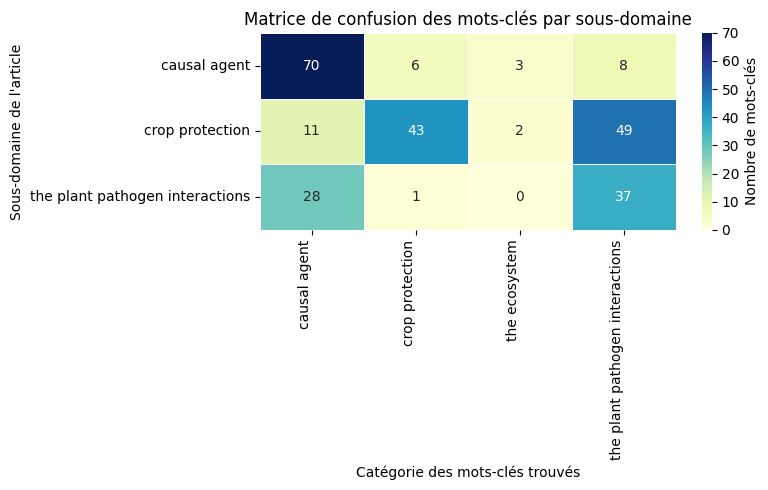

In [ ]:
# 1. Inverser le dictionnaire : mot → catégorie
mot_to_cat = {}
for cat, mots in dict_mots_cles.items():
    for m in mots:
        mot_to_cat[m.lower()] = cat

# 2. Créer la matrice de confusion
matrice = defaultdict(lambda: defaultdict(int))

# 3. Parcourir les lignes du DataFrame
for _, row in filtred_annotation.iterrows():
    domain = str(row["Domain 2"]).strip().lower()

    # Concaténer les textes (lowercase pour comparer plus facilement)
    texte = " ".join([
        str(row["Article Title"]),
        str(row["Abstract"]),
        str(row["keywords"])
    ]).lower()

    # Pour éviter les faux positifs, on peut tokeniser ou matcher avec regex à mots entiers
    for mot, cat in mot_to_cat.items():
        # Créer une regex pour trouver le mot exact (même s'il contient des espaces)
        pattern = r'\b' + re.escape(mot) + r'\b'
        occurences = len(re.findall(pattern, texte))
        if occurences > 0:
            matrice[domain][cat] += occurences

# 4. Transformer en DataFrame
matrice_df = pd.DataFrame(matrice).T.fillna(0).astype(int)
matrice_df = matrice_df.sort_index(axis=0).sort_index(axis=1)

# Taille de la figure
plt.figure(figsize=(8, 5))

# Heatmap avec annotations
sns.heatmap(
    matrice_df,
    annot=True,        # Affiche les valeurs dans les cases
    fmt="d",           # Format des nombres (entiers)
    cmap="YlGnBu",     # Palette de couleurs
    linewidths=0.5,    # Séparation entre les cases
    cbar_kws={"label": "Nombre de mots-clés"}
)

plt.title("Matrice de confusion des mots-clés par sous-domaine")
plt.xlabel("Catégorie des mots-clés trouvés")
plt.ylabel("Sous-domaine de l'article")
plt.xticks(rotation=90, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Augmentation**

## **Retro Traduction**

In [ ]:
corpus = pd.read_excel(ruta_excel + "sous-corpus_annoté.xlsx", sheet_name=0)

In [ ]:
traduction = corpus.copy()

In [ ]:
traduction['full_text'] = (traduction['Article Title'].fillna('') + '. @@ ' + traduction['Abstract'].fillna(''))

In [ ]:
traduction = traduction.drop(columns = ["keywords", "Article Title", "Abstract"])

In [ ]:
def translate(text, pause=1.0):
    try:
        fr = GoogleTranslator(source='en', target='fr').translate(text)
        time.sleep(pause)
        return fr
    except Exception as e:
        print(f"Erreur avec le texte : {text[:60]}... → {e}")
        return None


def back_translate(text, source_lang='FR', target_lang='EN', auth_key='d25bd061-4483-4c7d-aba2-7eb567688074:fx'):
    url = "https://api-free.deepl.com/v2/translate"
    params = {
        "auth_key": auth_key,
        "text": text,
        "source_lang": source_lang,
        "target_lang": target_lang
    }

    try:
        response = requests.post(url, data=params)
        response.raise_for_status()
        return response.json()["translations"][0]["text"]
    except Exception as e:
        print(f"Erreur avec le texte : {text[:60]}... → {e}")
        return None



def retrotraduction_mixte(text, pause=1.0, deepL_key='d25bd061-4483-4c7d-aba2-7eb567688074:fx'):
    # Étape 1 : traduction avec Google (en → fr)
    fr = translate(text, pause=pause)
    if fr is None:
        print("Texte non traduit")
        return None

    # Étape 2 : rétrotraduction avec DeepL (fr → en)
    en_back = back_translate(fr, source_lang='FR', target_lang='EN', auth_key=deepL_key)
    return en_back


In [ ]:
traduction["new_text"] = traduction["full_text"].apply(retrotraduction_mixte)

In [ ]:
traduction["Titre"] = traduction["new_text"].apply(lambda x : x.split("@@")[0])
traduction["Résumé"] = traduction["new_text"].apply(lambda x : x.split("@@")[1])

In [ ]:
traduction = traduction.drop(columns = ["full_text", "new_text"])

In [ ]:
corpus = corpus.drop(columns = ["keywords"])

In [ ]:
concat_vert = pd.concat([corpus, traduction], axis=0, ignore_index=True)

In [ ]:
concat_horiz = pd.concat([corpus, traduction], axis=1)

In [ ]:
concat_horiz.head()

In [ ]:
concat_vert.head()

In [ ]:
!pip install python-Levenshtein

In [ ]:
import Levenshtein

# Étape 1 : concaténer les colonnes
concat_horiz["texte_original"] = concat_horiz["Article Title"].astype(str) + " " + concat_horiz["Abstract"].astype(str)
concat_horiz["texte_traduit"] = concat_horiz["Titre"].astype(str) + " " + concat_horiz["Résumé"].astype(str)

# Étape 2 : calculer la distance de Levenshtein
concat_horiz["levenshtein_dist"] = concat_horiz.apply(lambda row: Levenshtein.distance(row["texte_original"], row["texte_traduit"]), axis=1)

# (Optionnel) Similarité normalisée (0 = identique, 1 = totalement différent)
concat_horiz["levenshtein_ratio"] = concat_horiz.apply(lambda row: Levenshtein.ratio(row["texte_original"], row["texte_traduit"]), axis=1)

In [ ]:
concat_horiz = concat_horiz.drop(columns = ["texte_original", "texte_traduit", "levenshtein_dist"])

In [ ]:
concat_horiz

## **GeoNLPlify**

### **Définitions**

In [ ]:
cities = pd.read_excel(ruta_excel+"Data/worldcities.xlsx", sheet_name=0)

In [ ]:
cities = cities.drop(columns = ["iso2", "iso3", "lat", "lng", "capital", "population", "id", "city_ascii", "admin_name"])
cities = cities[["city", "country"]]

In [ ]:
test_gliner.head()

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   

                                      gliner_geocode  
0                                                 []  
1                                            [Spain]  
2                                            [China]  
3  [Brazil, Malaysia, Micronesia, Federated State...  
4                                            [Spain]

In [ ]:
test_gliner["locations_gliner"] = test_gliner["locations_gliner"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
toutes_les_locations = list(chain.from_iterable(test_gliner['locations_gliner']))
locations_uniques = sorted(set(toutes_les_locations))
locations_nettoyés = limpiar_y_filtrar_locaciones(locations_uniques)

In [ ]:
print(len(locations_nettoyés))

417


In [ ]:
print(locations_nettoyés)

['Africa', 'African', 'Alabama', 'Amazon soil', 'Amazonas', 'Amazonia', 'Amboyna', 'American Samoa', 'Americas', 'Angola', 'Anqing city', 'Antarctica', 'Antipas', 'Araguaia Valley  MT', 'Arctic', 'Arctic tundra', 'Argentina', 'Arkansas', 'Asia', 'Asia Minor', 'Asian', 'Assam', 'Australia', 'Austria', 'BANGLADESH', 'Bahia', 'Balkan Peninsula', 'Bangalore', 'Bangladesh', 'Barbados cherry', 'Batu Arang', 'Beijing', 'Belarus', 'Berk  Court', 'Boaco', 'Bom Futuro', 'Bom Jesus  MT', 'Brazil', 'Brazilian Amazon', 'Brazilian Cerrado', 'Brazilian Neotropical Savannah', 'Brazilian jurisdiction', 'Brazilian midwestern region', 'Brazilian states', 'Bulgaria', 'Cameroon', 'Canada', 'Canarana  MT', 'Canary Islands', 'Cape Verde Islands', 'Capital', 'Carazo', 'Carrots', 'Central India', 'Cerrado', 'Chapaciao do Sul  MS', 'Chengdu', 'Chiang Mai', 'Chile', 'China', 'Chinese', 'Chinese Mollisols', 'Coast', 'Colombia', 'Corpus Christi', 'Costa Rica', 'Cotabato', 'Croatia', 'Delta', 'Denmark', 'Didymellac

In [ ]:
mon_dict = {mot: clean_and_geocode_location(mot) for mot in locations_nettoyés}

In [ ]:
with open(ruta_excel + "dictionnaire_geocodage.json", 'w', encoding='utf-8') as f:
    json.dump(mon_dict, f, ensure_ascii=False, indent=2)

In [ ]:
with open(ruta_excel + "dictionnaire_geocodage.json", 'r', encoding='utf-8') as f:
    mon_dict = json.load(f)

In [ ]:
geolocator = Nominatim(user_agent="geo_random")

def localisation_aleatoire():
    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)

    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, language='fr')
        if location:
            return location.raw
    except Exception as e:
        print("Erreur :", e)

### **Généralisation**

In [ ]:
def reemplazar_palabras(texto, diccionario):
    # Compilar un patrón que coincida con todas las claves como palabras enteras
    pattern = r'(?<!\w)(' + '|'.join(map(re.escape, diccionario.keys())) + r')(?!\w)'

    # Función de reemplazo que usa el diccionario
    def sustituir(match):
        palabra = match.group(0)
        if diccionario.get(palabra, palabra):
          nombre = diccionario.get(palabra, palabra)["display_name"].split(",")[-1].strip()
          if nombre in normalization_dict:
            return normalization_dict[nombre]
          else:
            return nombre
        else:
          return palabra
    return re.sub(pattern, sustituir, texto)

In [ ]:
df = test_gliner.head(10)

In [ ]:
df["Abstract_modificado"] = df["Abstract"].apply(lambda x: reemplazar_palabras(x, mon_dict))

/tmp/ipython-input-149-1745973152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract_modificado"] = df["Abstract"].apply(lambda x: reemplazar_palabras(x, mon_dict))


In [ ]:
df

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                    locations_gliner  \
0                            ['geographical origin']   
1                                           ['soil']   
2                       ['Hainan province', 'China']   
3  ['tropics', 'United States', 'subtropics', 'Br...   
4                  ['veins', 'intercellular spaces']   
5               ['Dothideomycetes', 'Didymellaceae']   
6  ['Okinawa Prefecture', 'Japan', 'Higashi villa...   
7                                                 []   
8                                     ['BANGLADESH']   
9                              ['Kanagawa', 'Tokyo']   

                               locations_ner_cleaned  \
0                                                 []   
1                                           [España]   
2                                               [中国]   
3  [Malaysia مليسيا, Micronesia, Nederland, Brasi...   
4                                           [España]   
5                                                 []   
6                                               [日本]   
7                                                 []   
8                                         [বাংলাদেশ]   
9                                               [日本]   

                                 Abstract_modificado  
0  Twenty-two isolates of Corynespora cassiicola ...  
1  We describe a 76-year-old male farmer with no ...  
2  Leaf and fruit spots and stem lesions were obs...  
3  The fungus Corynespora cassiicola is primarily...  
4  Corynespora leaf fall (CLF) disease, caused by...  
5  Corynespora cassiicola is a well-known plant p...  
6  Leaf spot caused by Corynespora cassiicola was...  
7  Cucumber Corynespora leaf spot caused by Coryn...  
8  Eight commercial okra cultivars were evaluated...  
9  A leaf spot disease of scarlet sage (Salvia sp...

### **Equivalence**

In [ ]:
adresstypes = {
  'state',
  'region',
  'province',
  'county',
  'district',
  'department',
  'municipality',
  'city',
  'town',
  'village'
}

In [ ]:
def remplacer_niveau_par_localisation_aleatoire(texto, diccionario):
    # Pattern : toutes les clés du dictionnaire comme mots entiers
    pattern = r'(?<!\w)(' + '|'.join(map(re.escape, diccionario.keys())) + r')(?!\w)'

    def remplacer(match):
        palabra = match.group(0)
        loc = diccionario.get(palabra, palabra)

        if not loc:
            return palabra  # pas dans le dictionnaire, on garde le mot original

        # Récupérer le type (addresstype ou type OSM)
        addr_type = loc["addresstype"] or loc["type"]

        if not addr_type:
            return palabra  # si pas de type, on ne change rien

        if not addr_type in adresstypes:
          return palabra

        # Générer une nouvelle localisation aléatoire du même type
        ville_aleatoire = random.choice(villes)
        return ville_aleatoire

    return re.sub(pattern, remplacer, texto)

In [ ]:
df = test_gliner.head(10)

In [ ]:
df["Abstract_modificado"] = df["Abstract"].apply(lambda x: remplacer_niveau_par_localisation_aleatoire(x, mon_dict))

/tmp/ipython-input-168-1842150294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract_modificado"] = df["Abstract"].apply(lambda x: remplacer_niveau_par_localisation_aleatoire(x, mon_dict))


In [ ]:
df

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                    locations_gliner  \
0                              [geographical origin]   
1                                             [soil]   
2                           [Hainan province, China]   
3  [tropics, United States, subtropics, Brazil, M...   
4                      [veins, intercellular spaces]   
5                   [Dothideomycetes, Didymellaceae]   
6       [Okinawa Prefecture, Japan, Higashi village]   
7                                                 []   
8                                       [BANGLADESH]   
9                                  [Kanagawa, Tokyo]   

                                 Abstract_modificado  
0  Twenty-two isolates of Corynespora cassiicola ...  
1  We describe a 76-year-old male farmer with no ...  
2  Leaf and fruit spots and stem lesions were obs...  
3  The fungus Corynespora cassiicola is primarily...  
4  Corynespora leaf fall (CLF) disease, caused by...  
5  Corynespora cassiicola is a well-known plant p...  
6  Leaf spot caused by Corynespora cassiicola was...  
7  Cucumber Corynespora leaf spot caused by Coryn...  
8  Eight commercial okra cultivars were evaluated...  
9  A leaf spot disease of scarlet sage (Salvia sp...

### **Spécialisation**

In [ ]:
villes = cities["city"].dropna().unique().tolist()

In [ ]:
def remplacer_pays_par_localisation_aleatoire(texto, diccionario):
    # Pattern : toutes les clés du dictionnaire comme mots entiers
    pattern = r'(?<!\w)(' + '|'.join(map(re.escape, diccionario.keys())) + r')(?!\w)'

    def remplacer(match):
        palabra = match.group(0)
        loc = diccionario.get(palabra, palabra)

        if not loc:
            return palabra  # pas dans le dictionnaire, on garde le mot original

        if not (loc["addresstype"] == "country" or loc["type"] == "country"):
            return palabra  # si pas un pays, on ne change rien

        # Générer une nouvelle localisation aléatoire du type city
        ville_aleatoire = random.choice(villes)

        # On récupère son nom
        return ville_aleatoire

    return re.sub(pattern, remplacer, texto)

In [ ]:
df = test_gliner.head(10)

In [ ]:
df["Abstract_modificado"] = df["Abstract"].apply(lambda x: remplacer_pays_par_localisation_aleatoire(x, mon_dict))

/tmp/ipython-input-159-2046390549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract_modificado"] = df["Abstract"].apply(lambda x: remplacer_pays_par_localisation_aleatoire(x, mon_dict))


In [ ]:
df

Article Title  \
0  Morphological and molecular analysis of geneti...   
1  Rare case of fungal keratitis caused by Coryne...   
2  Corynespora spot of hot pepper caused by Coryn...   
3  Host Specialization and Phylogenetic Diversity...   
4  Infection process of Corynespora cassiicola ta...   
5  Characterization of the complete mitochondrial...   
6  First report of leaf spot (Corynespora cassiic...   
7  Overexpression of the CcCYP51A and CcCYP51B ge...   
8  INCIDENCE AND BIOLOGY OF CORYNESPORA CASSIICOL...   
9  Corynespora leaf spot of scarlet sage caused b...   

                                            Abstract  \
0  Twenty-two isolates of Corynespora cassiicola ...   
1  We describe a 76-year-old male farmer with no ...   
2  Leaf and fruit spots and stem lesions were obs...   
3  The fungus Corynespora cassiicola is primarily...   
4  Corynespora leaf fall (CLF) disease, caused by...   
5  Corynespora cassiicola is a well-known plant p...   
6  Leaf spot caused by Corynespora cassiicola was...   
7  Cucumber Corynespora leaf spot caused by Coryn...   
8  Eight commercial okra cultivars were evaluated...   
9  A leaf spot disease of scarlet sage (Salvia sp...   

                                    locations_gliner  \
0                              [geographical origin]   
1                                             [soil]   
2                           [Hainan province, China]   
3  [tropics, United States, subtropics, Brazil, M...   
4                      [veins, intercellular spaces]   
5                   [Dothideomycetes, Didymellaceae]   
6       [Okinawa Prefecture, Japan, Higashi village]   
7                                                 []   
8                                       [BANGLADESH]   
9                                  [Kanagawa, Tokyo]   

                                 Abstract_modificado  
0  Twenty-two isolates of Corynespora cassiicola ...  
1  We describe a 76-year-old male farmer with no ...  
2  Leaf and fruit spots and stem lesions were obs...  
3  The fungus Corynespora cassiicola is primarily...  
4  Corynespora leaf fall (CLF) disease, caused by...  
5  Corynespora cassiicola is a well-known plant p...  
6  Leaf spot caused by Corynespora cassiicola was...  
7  Cucumber Corynespora leaf spot caused by Coryn...  
8  Eight commercial okra cultivars were evaluated...  
9  A leaf spot disease of scarlet sage (Salvia sp...

## **NLPAUG**

In [ ]:
!pip install nltk
import nltk

In [ ]:
!pip install nlpaug transformers torch nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 843.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [ ]:
import nlpaug.augmenter.word as naw
from transformers import T5ForConditionalGeneration, T5Tokenizer

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # pour le cas spécifique de NLPaug
nltk.download('punkt')  # aussi utile pour tokenizer les phrases
nltk.download('wordnet')  # nécessaire pour les synonymes
nltk.download('omw-1.4')  # pour les synonymes multilingues

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Étape 1 : synonymes via WordNet
syn_aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.2)

# Étape 2 : substitution contextuelle avec BERT
context_aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased',
    action='substitute',
    aug_p=0.2
)

# Étape 3 : remplacement via embeddings (GloVe)
word_embs_aug = naw.WordEmbsAug(
    model_type='glove',
    model_path=ruta_excel+"Data/glove.6B.300d.txt",
    action='substitute',
    aug_p=0.2,
    top_k=10
)

# Étape 4 : paraphrase avec T5 (une seule version)
t5_tokenizer = T5Tokenizer.from_pretrained("Vamsi/T5_Paraphrase_Paws")
t5_model = T5ForConditionalGeneration.from_pretrained("Vamsi/T5_Paraphrase_Paws")

def t5_paraphrase_one(text):
    input_text = f"paraphrase: {text} </s>"
    encoding = t5_tokenizer.encode_plus(input_text, padding='longest', return_tensors="pt")

    outputs = t5_model.generate(
        input_ids=encoding['input_ids'],
        attention_mask=encoding['attention_mask'],
        max_length=256,
        num_beams=5,
        num_return_sequences=1,
        temperature=1.5
    )

    return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

# ✅ Pipeline complet
def apply_pipeline_single(text):
    text1 = syn_aug.augment(text)
    text2 = context_aug.augment(text1)
    text3 = word_embs_aug.augment(text2)
    text4 = t5_paraphrase_one(text3)
    return text4

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
# ✅ Exemple
text = "The research presents a new method for predicting protein structures."
augmented = apply_pipeline_single(text)
print(augmented)

/usr/local/lib/python3.11/dist-packages/transformers/models/t5/tokenization_t5.py:289: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


['The proof presents only the next method name for predicting protein mechanisms.']


## **Pipeline Augmentation**

### **Définitions**

In [ ]:
cities = pd.read_excel(ruta_excel+"Data/worldcities.xlsx", sheet_name=0)

In [ ]:
cities = cities.drop(columns = ["iso2", "iso3", "lat", "lng", "capital", "population", "id", "city_ascii", "admin_name"])
cities = cities[["city", "country"]]

In [ ]:
annotation.head()

Article Title  \
0  Green Yield as a Potential Predictor of Cured ...   
1  Two <i>Phytophthora</i> species causing declin...   
2  Transcriptome analysis, using RNA-Seq of <i>Lo...   
3  EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4  Evaluation of resistance of ten citrus rootsto...   

                                            Abstract  \
0  Phytophthora-induced plant diseases are most e...   
1  Since 2009, a severe decline leading to mortal...   
2  The plant pathogen Phytophthora cinnamon the c...   
3  The preservation methods for fungi have great ...   
4  Introduction. In Morocco, citriculture faces u...   

                                            keywords         Domain 1  \
0  host resistance; integrated disease management...  plant pathology   
1  natural reserve; phytophthora cryptogea; phyto...  plant pathology   
2  gene induction; host resistance; rna-seq; root...  plant pathology   
3  colonization; pathogenicity; preservation ex s...  plant pathology   
4  morocco; citrus; rootstocks; drought stress; d...  plant pathology   

                          Domain 2  
0                  crop protection  
1                     causal agent  
2  the plant pathogen interactions  
3                     causal agent  
4                  crop protection

In [ ]:
annotation ['locations_gliner'] = (annotation['Abstract'].fillna("")+" "+annotation['Article Title'].fillna("")).apply(get_locations_from_abstract_gliner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 412 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 443 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 419 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 405 has been truncated to 384
  warnings.warn(f"Sentence of le

In [ ]:
annotation['locations_ner_cleaned'] = annotation['locations_gliner'].apply(clean_and_geocode_locations)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [ ]:
annotation['gliner_geocode'] = annotation['locations_ner_cleaned'].apply(normalizar_lista)

In [ ]:
annotation.head()

Article Title  \
0  Green Yield as a Potential Predictor of Cured ...   
1  Two <i>Phytophthora</i> species causing declin...   
2  Transcriptome analysis, using RNA-Seq of <i>Lo...   
3  EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4  Evaluation of resistance of ten citrus rootsto...   

                                            Abstract  \
0  Phytophthora-induced plant diseases are most e...   
1  Since 2009, a severe decline leading to mortal...   
2  The plant pathogen Phytophthora cinnamon the c...   
3  The preservation methods for fungi have great ...   
4  Introduction. In Morocco, citriculture faces u...   

                                            keywords         Domain 1  \
0  host resistance; integrated disease management...  plant pathology   
1  natural reserve; phytophthora cryptogea; phyto...  plant pathology   
2  gene induction; host resistance; rna-seq; root...  plant pathology   
3  colonization; pathogenicity; preservation ex s...  plant pathology   
4  morocco; citrus; rootstocks; drought stress; d...  plant pathology   

                          Domain 2  \
0                  crop protection   
1                     causal agent   
2  the plant pathogen interactions   
3                     causal agent   
4                  crop protection   

                                    locations_gliner  \
0                                                 []   
1              [Spain, Seville, Mediterranean Basin]   
2                                       [Australian]   
3                               [Brazil, Uberlandia]   
4  [Mediterranean Basin, France, Morocco, El Menz...   

                    locations_ner_cleaned              gliner_geocode  
0                                      []                          []  
1                       [España, Türkiye]            [Spain, Türkiye]  
2                             [Australia]                 [Australia]  
3                                [Brasil]                    [Brazil]  
4  [Maroc ⵍⵎⵖⵔⵉⴱ المغرب, Türkiye, France]  [France, Morocco, Türkiye]

In [ ]:
toutes_les_locations = list(chain.from_iterable(annotation['locations_gliner']))
locations_uniques = sorted(set(toutes_les_locations))
locations_nettoyés = limpiar_y_filtrar_locaciones(locations_uniques)

In [ ]:
print(len(locations_nettoyés))

115


In [ ]:
print(locations_nettoyés)

['Aegean Regions', 'Anatolia', 'Arkansas', 'Atlantic salmon fish farms', 'Australia', 'Australian', 'Black Sea', 'Brazil', 'British Columbia', 'California', 'Cambridgeshire', 'China', 'Colombia', 'Colquitt', 'Curitiba', 'Echols', 'Egypt', 'Ekiti', 'El Menzeh', 'Ethiopia', 'Europe', 'European', 'Florida', 'France', 'French', 'Georgia', 'INRA', 'India', 'Israel', 'Japan', 'Kufri Jyoti', 'Kunming', 'Lowndes', 'Marmara Region', 'Mediterranean Basin', 'Mediterranean regions', 'Metropolitan Region', 'Mexico', 'Michigan State University', 'Morocco', 'Mount Vernon', 'NahGbackground', 'New Zealand', 'Norfolk', 'North America', 'North American', 'North Carolina', 'Northeastern Thailand', 'Northern', 'Ogun', 'Okinawa', 'Ondo', 'Osun', 'Oyo', 'Pacific Northwest', 'Paranci State', 'Penz', 'Poland', 'Puyallup', 'Radzikow', 'Russia', 'SW Nigeria', 'Saint Petersburg', 'Scotland', 'Senegalese', 'Seville', 'Shizuoka', 'Sichuan', 'South Africa', 'Spain', 'TIS region', 'Taiwan', 'Texas', 'Tsu Chi', 'Turke

In [ ]:
mon_dict = {mot: clean_and_geocode_location(mot) for mot in locations_nettoyés}

In [ ]:
with open(ruta_excel + "dictionnaire_geocodage_aug.json", 'w', encoding='utf-8') as f:
    json.dump(mon_dict, f, ensure_ascii=False, indent=2)

In [ ]:
with open(ruta_excel + "dictionnaire_geocodage_aug.json", 'r', encoding='utf-8') as f:
    mon_dict = json.load(f)

In [ ]:
geolocator = Nominatim(user_agent="geo_random")

def localisation_aleatoire():
    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)

    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, language='fr')
        if location:
            return location.raw
    except Exception as e:
        print("Erreur :", e)

### **Exemple**

In [ ]:
annotation = annotation.drop(columns = ["Domain 1", "locations_gliner", "locations_ner_cleaned", "gliner_geocode", "keywords"])

In [ ]:
annotation

Article Title  \
0   Green Yield as a Potential Predictor of Cured ...   
1   Two <i>Phytophthora</i> species causing declin...   
2   Transcriptome analysis, using RNA-Seq of <i>Lo...   
3   EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4   Evaluation of resistance of ten citrus rootsto...   
..                                                ...   
75  <i>Colletotrichum</i><i> Jasminigenum-</i>indu...   
76  Cranberry Dieback Disorder: a New and Emerging...   
77  Susceptibility of common herbaceous crops to <...   
78  Genetic recombination in <i>Colletotrichum sub...   
79  Comparison of selection for root rot tolerance...   

                                             Abstract  \
0   Phytophthora-induced plant diseases are most e...   
1   Since 2009, a severe decline leading to mortal...   
2   The plant pathogen Phytophthora cinnamon the c...   
3   The preservation methods for fungi have great ...   
4   Introduction. In Morocco, citriculture faces u...   
..                                                ...   
75  Purpose: We present a case of Colletotrichum j...   
76  In recent years, cranberry fields in the lower...   
77  The susceptibility to Phytophthora cinnamomi o...   
78  Genetic recombination without typical parasexu...   
79  The focus of the Washington State University r...   

                           Domain 2  
0                   crop protection  
1                      causal agent  
2   the plant pathogen interactions  
3                      causal agent  
4                   crop protection  
..                              ...  
75         Causal agent / Diagnosis  
76                  Crop protection  
77                  Crop protection  
78                         Pathogen  
79                  Crop protection  

[80 rows x 3 columns]

In [ ]:
df = annotation.head(5)

In [ ]:
df["Abstract_modificado1"] = df["Abstract"].apply(lambda x: reemplazar_palabras(str(x), mon_dict) if pd.notna(x) else x)
df["Abstract_modificado1"] = df["Abstract_modificado1"].apply(lambda x: retrotraduction_mixte(str(x)) if pd.notna(x) else x)
df["Abstract_modificado1"] = df["Abstract_modificado1"].apply(lambda x: apply_pipeline_single(str(x)) if pd.notna(x) else x)
df

/tmp/ipython-input-1064891226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract_modificado1"] = df["Abstract"].apply(lambda x: reemplazar_palabras(str(x), mon_dict) if pd.notna(x) else x)
/tmp/ipython-input-1064891226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract_modificado1"] = df["Abstract_modificado1"].apply(lambda x: retrotraduction_mixte(str(x)) if pd.notna(x) else x)
/usr/local/lib/python3.11/dist-packages/transformers/models/t5/tokenization_t5.py:289: UserWarning: Th

Article Title  \
0  Green Yield as a Potential Predictor of Cured ...   
1  Two <i>Phytophthora</i> species causing declin...   
2  Transcriptome analysis, using RNA-Seq of <i>Lo...   
3  EVALUATION OF THE GELATIN TECHNIQUE FOR THE PR...   
4  Evaluation of resistance of ten citrus rootsto...   

                                            Abstract  \
0  Phytophthora-induced plant diseases are most e...   
1  Since 2009, a severe decline leading to mortal...   
2  The plant pathogen Phytophthora cinnamon the c...   
3  The preservation methods for fungi have great ...   
4  Introduction. In Morocco, citriculture faces u...   

                          Domain 2  \
0                  crop protection   
1                     causal agent   
2  the plant pathogen interactions   
3                     causal agent   
4                  crop protection   

                                Abstract_modificado1  
0  ['Phytophthora-induced plant diseases are most...  
1  ["since 2009 , a severe decline leading to its...  
2  The plant pathogen with cinnamon , the causal ...  
3  In ex situ collections , mushroom preservation...  
4  [introduction. citrus fruit growing in morocco...

In [ ]:
test = "Fusarium oxysporum is a soil-borne fungal pathogen that causes vascular wilt in tomato plants, leading to severe yield losses and posing a major challenge for sustainable crop production."

In [ ]:
aug1 = apply_pipeline_single(retrotraduction_mixte(reemplazar_palabras(test, mon_dict)))
aug2 = retrotraduction_mixte(apply_pipeline_single(reemplazar_palabras(test, mon_dict)))
aug3 = apply_pipeline_single(retrotraduction_mixte(reemplazar_palabras(test, mon_dict)))
print(test)
print(aug1)
print(aug2)
print(aug3)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Fusarium oxysporum is a soil-borne fungal pathogen that causes vascular wilt in tomato plants, leading to severe yield losses and posing a major challenge for sustainable crop production.
['Vectors oxysporum be invasive territory-wide fungous pathogen investigators induce cardiovascular wilt of same tomato plants, result in stark color deprivation and poses that major tough to maize harvest production .''
['Aspergillus oxysporum represents an early soil-based aerial overhang that the resulting vascular wilt in tomato plants, leading to significant yield fragmentation, poses another major face for a sustainable cultivation project' '.
['fusarium fusarium does which seed-borne fungal pathogen that causes crop wilt year tomato scale plants resulting in serious yield losses of posing a huge problem to the environment vegetable production ''


# **Topic Modelling**

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 738.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:
new_df7 = new_df7.drop(columns = ['AF', 'ID', 'C1', 'WC', 'WE', 'SC', 'hevea', 'CT macro', 'CT meso', 'pays_affiliations', 'pays_affiliations_pondéré'])

In [ ]:
# Supprimer toutes les balises <...> et leur contenu dans la colonne 'TI'
new_df7['TI'] = new_df7['TI'].astype(str).str.replace(r'<.*?>', '', regex=True)

In [ ]:
new_df7['Abstract'] = new_df7['TI'].fillna("")+" "+new_df7['AB'].fillna("")

In [ ]:
new_df7

TI  \
0                              Pestalotiopsis revisited   
1     Cryptic Diversity, Molecular Systematics, and ...   
2     Pestalotiopsis and allied genera from Camellia...   
3     Diversity of Pestalotiopsis-Like Species Causi...   
4     Genetic variation and demographic history anal...   
...                                                 ...   
1245  Synthesis of a natural core substrate with lig...   
1246  Effects of Bacillus velezensis GUAL210 control...   
1247        Fungal Planet description sheets: 1383-1435   
1248  Fungal species assemblages associated with Phy...   
1249          Fungal Planet description sheets: 625-715   

                                                     DE  \
0     Amphisphaeriaceae; New species; Pestalosphaeri...   
1     Neopestalotiopsis; novel species; Pestalotiops...   
2                                                   NaN   
3                                                   NaN   
4     genetic diversity; nrDNA ITS; Pestalotiopsis&#...   
...                                                 ...   
1245  Lignin-carbohydrate complex; Glucuronoxylan; H...   
1246  soil fungal structure; biological control; Bac...   
1247     ITS nrDNA barcodes; LSU; new taxa; systematics   
1248  Sudden oak death; Botryosphaeria corticola; Bo...   
1249  ITS nrDNA barcodes; LSU; novel fungal species;...   

                                                     AB                   UT  \
0     Species of Pestalotiopsis occur commonly as pl...  WOS:000345924800005   
1     Camellia sinensis (L.) O. Kuntze, commonly kno...  WOS:000663970900023   
2     A total of 124 Pestalotiopsis-like isolates as...  WOS:000399036900007   
3     Several Pestalotiopsis-like species cause gray...  WOS:000487177300009   
4     To elucidate the demographic history within an...  WOS:000595100000001   
...                                                 ...                  ...   
1245  Lignin-carbohydrate complexes (LCCs) present a...  WOS:001321787100001   
1246  IntroductionRose black spot is an economically...  WOS:001044717700001   
1247  Novel species of fungi described in this study...  WOS:000862858000001   
1248  Phytophthora ramorum, the causal agent of sudd...  WOS:000316827500004   
1249  Novel species of fungi described in this study...  WOS:000419997300011   

                                               Abstract  
0     Pestalotiopsis revisited Species of Pestalotio...  
1     Cryptic Diversity, Molecular Systematics, and ...  
2     Pestalotiopsis and allied genera from Camellia...  
3     Diversity of Pestalotiopsis-Like Species Causi...  
4     Genetic variation and demographic history anal...  
...                                                 ...  
1245  Synthesis of a natural core substrate with lig...  
1246  Effects of Bacillus velezensis GUAL210 control...  
1247  Fungal Planet description sheets: 1383-1435 No...  
1248  Fungal species assemblages associated with Phy...  
1249  Fungal Planet description sheets: 625-715 Nove...  

[1061 rows x 5 columns]

In [ ]:
# Vos abstracts d'articles
abstracts = new_df7['Abstract'].tolist()

# Modèle d'embedding adapté au domaine scientifique
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Configuration BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="multilingual",  # Si textes multilingues
    verbose=True
)

# Entraînement
topics, probabilities = topic_model.fit_transform(abstracts)

# Visualisation des résultats
topic_model.get_topic_info()


2025-06-18 13:31:39,136 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2025-06-18 13:34:56,992 - BERTopic - Embedding - Completed ✓
2025-06-18 13:34:56,995 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-18 13:34:59,817 - BERTopic - Dimensionality - Completed ✓
2025-06-18 13:34:59,818 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-18 13:34:59,870 - BERTopic - Cluster - Completed ✓
2025-06-18 13:34:59,875 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-18 13:35:00,178 - BERTopic - Representation - Completed ✓


Topic  Count                                    Name  \
0      -1    159                        -1_the_of_and_in   
1       0    241                  0_the_of_and_compounds   
2       1    132                 1_and_endophytic_the_of   
3       2     74                      2_tea_blight_of_in   
4       3     69         3_species_pestalotiopsis_and_of   
5       4     48                         4_the_of_and_to   
6       5     44                      5_fruit_and_the_of   
7       6     39                   6_new_and_are_species   
8       7     37                         7_and_the_of_in   
9       8     36                         8_the_of_in_and   
10      9     36                 9_of_and_the_antifungal   
11     10     34           10_blueberry_bayberry_and_the   
12     11     33                        11_the_in_and_of   
13     12     23  12_strawberry_neopestalotiopsis_in_the   
14     13     18               13_eucalyptus_on_from_nov   
15     14     17                 14_grapevine_the_in_and   
16     15     11             15_rubber_leaf_disease_fall   
17     16     10                    16_fungi_of_the_soil   

                                       Representation  \
0   [the, of, and, in, to, were, for, from, was, f...   
1   [the, of, and, compounds, fungus, pestalotiops...   
2   [and, endophytic, the, of, fungi, from, were, ...   
3   [tea, blight, of, in, and, the, disease, to, g...   
4   [species, pestalotiopsis, and, of, from, the, ...   
5   [the, of, and, to, laccase, for, biodegradatio...   
6   [fruit, and, the, of, postharvest, fruits, in,...   
7   [new, and, are, species, the, clematidis, of, ...   
8   [and, the, of, in, fungal, fungi, to, litter, ...   
9   [the, of, in, and, macadamia, palm, to, was, w...   
10  [of, and, the, antifungal, in, essential, agai...   
11  [blueberry, bayberry, and, the, of, in, twig, ...   
12  [the, in, and, of, pine, on, were, trees, was,...   
13  [strawberry, neopestalotiopsis, in, the, rot, ...   
14  [eucalyptus, on, from, nov, incl, gen, soil, o...   
15  [grapevine, the, in, and, of, trunk, grape, gr...   
16  [rubber, leaf, disease, fall, the, in, of, hev...   
17  [fungi, of, the, soil, growth, biocontrol, and...   

                                  Representative_Docs  
0   [Taxol promising fungal endophyte, Pestalotiop...  
1   [Pestaloficiols Q-S from the plant endophytic ...  
2   [Diversity and Characterization of Endophytic ...  
3   [Pestalotiopsis-Like Species Causing Gray Blig...  
4   [Pestalotiopsis revisited Species of Pestaloti...  
5   [Production of laccase by a newly isolated deu...  
6   [Development and control of postharvest diseas...  
7   [Fungal diversity notes 111-252-taxonomic and ...  
8   [Tropical stream microcosms of isolated fungal...  
9   [First report of leaf spot disease on oil palm...  
10  [Antifungal Activity of Sesamol on Pestalotiop...  
11  [Pestalotiopsis Species Associated with Bluebe...  
12  [Three novel species of fungi associated with ...  
13  [Role of Neopestalotiopsis rosae in causing ro...  
14  [Fungal Planet description sheets: 1383-1435 N...  
15  [Characterization of fungal pathogens associat...  
16  [Identification and characterisation of causal...  
17  [The antifungal compound totarol of Thujopsis ...

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Définir les stopwords en anglais
stop_words = set(stopwords.words('english'))

# Exemple : supprimer les stopwords d'un texte
def remove_stopwords(text):
    # Tokenisation
    words = word_tokenize(text)
    # Enlever ponctuation et stopwords
    filtered = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
    return ' '.join(filtered)

# Application sur une colonne d’un DataFrame, par exemple 'TI'
new_df7['NewAbstract'] = new_df7['Abstract'].astype(str).apply(remove_stopwords)


In [ ]:
# Vos abstracts d'articles
abstracts = new_df7['NewAbstract'].tolist()

# Entraînement
topics, probabilities = topic_model.fit_transform(abstracts)

# Visualisation des résultats
topic_model.get_topic_info()


2025-06-18 10:52:48,620 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2025-06-18 10:55:36,348 - BERTopic - Embedding - Completed ✓
2025-06-18 10:55:36,351 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-18 10:55:41,188 - BERTopic - Dimensionality - Completed ✓
2025-06-18 10:55:41,189 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-18 10:55:41,235 - BERTopic - Cluster - Completed ✓
2025-06-18 10:55:41,242 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-18 10:55:41,474 - BERTopic - Representation - Completed ✓


Topic  Count                                               Name  \
0      -1    259                  -1_fungal_fungi_sp_pestalotiopsis   
1       0    199                 0_compounds_fungus_new_derivatives   
2       1    119               1_endophytic_fungi_activity_extracts   
3       2     78                 2_species_pestalotiopsis_china_new   
4       3     64                          3_tea_blight_gray_disease   
5       4     52                         4_fruit_rot_fruits_disease   
6       5     37                    5_new_species_clematidis_fungal   
7       6     34              6_gene_secondary_deletion_development   
8       7     32                         7_disease_leaf_rubber_palm   
9       8     30             8_endophytes_endophytic_leaves_species   
10      9     21                  9_blueberry_bayberry_twig_dieback   
11     10     20        10_strawberry_neopestalotiopsis_florida_rot   
12     11     20                     11_fungi_fungal_species_marine   
13     12     18                   12_laccase_ph_tannase_production   
14     13     17                    13_grapevine_trunk_grape_grapes   
15     14     16  14_biodegradation_degradation_immobilization_ldpe   
16     15     14                         15_pine_pwn_trees_diplodia   
17     16     11                16_eucalyptus_leaf_lesions_isolates   
18     17     10                   17_agnps_nanoparticles_silver_nm   
19     18     10                      18_seeds_seed_seedlings_fungi   

                                       Representation  \
0   [fungal, fungi, sp, pestalotiopsis, leaf, dise...   
1   [compounds, fungus, new, derivatives, pestalot...   
2   [endophytic, fungi, activity, extracts, antifu...   
3   [species, pestalotiopsis, china, new, phylogen...   
4   [tea, blight, gray, disease, sinensis, camelli...   
5   [fruit, rot, fruits, disease, postharvest, man...   
6   [new, species, clematidis, fungal, taxa, gener...   
7   [gene, secondary, deletion, development, micro...   
8   [disease, leaf, rubber, palm, oil, spot, leave...   
9   [endophytes, endophytic, leaves, species, fung...   
10  [blueberry, bayberry, twig, dieback, versicolo...   
11  [strawberry, neopestalotiopsis, florida, rot, ...   
12  [fungi, fungal, species, marine, microorganism...   
13  [laccase, ph, tannase, production, enzymes, en...   
14  [grapevine, trunk, grape, grapes, vitis, disea...   
15  [biodegradation, degradation, immobilization, ...   
16  [pine, pwn, trees, diplodia, species, pinus, f...   
17  [eucalyptus, leaf, lesions, isolates, neopesta...   
18  [agnps, nanoparticles, silver, nm, nps, mgo, a...   
19  [seeds, seed, seedlings, fungi, seedling, caca...   

                                  Representative_Docs  
0   [Endophytic fungal diversity Theobroma cacao c...  
1   [Benzophenone derivatives plant endophytic fun...  
2   [diversity antimicrobial activity endophytic f...  
3   [Morphological Phylogenetic Analyses Reveal Th...  
4   [Pestalotiopsis-Like Species Causing Gray Blig...  
5   [Development control postharvest diseases Loqu...  
6   [Fungal diversity notes 367-490 taxonomic phyl...  
7   [Transcription Factors Pmr1 Pmr2 Cooperatively...  
8   [First report leaf spot disease oil palm cause...  
9   [Diversity fungal endophytes medicinal plants ...  
10  [Neofusicoccum spp Associated Stem Canker Dieb...  
11  [Emerging Strawberry Fungal Disease Associated...  
12  [Interactions abundant fungal species influenc...  
13  [Pestalotiopsis mangiferae isolated cocoa leav...  
14  [Uncovering hidden diversity fungi associated ...  
15  [Optimization Two-species Whole-cell Immobiliz...  
16  [Three novel species fungi associated pine spe...  
17  [Infection Neopestalotiopsis spp occurs unwoun...  
18  [Phytofabrication Silver Nanoparticles Potent ...  
19  [METHODS DETECTION FUNGI ASEPSIS Schizolobium ...

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
# 1. Génération de la hiérarchie
hierarchical_topics = topic_model.hierarchical_topics(abstracts)

# 2. Visualisation hiérarchique
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

# 3. Arbre textuel des topics
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)


100%|██████████| 18/18 [00:00<00:00, 142.24it/s]


.
├─compounds_endophytic_activity_pestalotiopsis_fungus
│    ├─laccase_biodegradation_degradation_enzymes_ph
│    │    ├─■──biodegradation_degradation_immobilization_ldpe_petroleum ── Topic: 14
│    │    └─■──laccase_ph_tannase_production_enzymes ── Topic: 12
│    └─compounds_endophytic_activity_fungus_pestalotiopsis
│         ├─compounds_endophytic_activity_fungus_pestalotiopsis
│         │    ├─■──gene_secondary_deletion_development_microspora ── Topic: 6
│         │    └─compounds_endophytic_activity_isolated_pestalotiopsis
│         │         ├─■──compounds_fungus_new_derivatives_pestalotiopsis ── Topic: 0
│         │         └─■──endophytic_fungi_activity_extracts_antifungal ── Topic: 1
│         └─■──agnps_nanoparticles_silver_nm_nps ── Topic: 17
└─species_pestalotiopsis_disease_isolates_fungal
     ├─disease_tea_fruit_blight_isolates
     │    ├─grapevine_eucalyptus_trunk_species_isolates
     │    │    ├─■──eucalyptus_leaf_lesions_isolates_neopestalotiopsis ── Topic: 16
     │ 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("all-MiniLM-L6-v2")
abstract_embeddings = model.encode(abstracts)

# Encoder les mots-clés par thème
seed_topic_list = [
    ["Symptomatology", "Microbiology", "Systematics", "Genetics", "Pathotyping"],
    ["Phenotyping", "Fungal pathogenesis", "Plant immune responses", "Molecular interactions", "Genetics"],
    ["Epidemiology", "Population dynamics", "Ecology"],
    ["Disease survey", "Breeding", "Selection", "Biotechnology", "Agricultural chemistry", "Biocontrol", "Stimulation of plant defenses", "Biopesticides", "Biofungicides", "Bioherbicides", "Agronomy", "Agroecology", "Integrated disease management", "Policies"],
    ["Social impact", "Economic impact"],
    ["Documentary ressources", "Atlas of the diseases", "History of the diseases", "Databases"]
]

# Créer un embedding moyen pour chaque groupe de mots-clés
topic_embeddings = [model.encode(" ".join(topic)) for topic in seed_topic_list]

# Comparer chaque résumé aux topics
assignments = []
for abstract_vec in abstract_embeddings:
    sims = cosine_similarity([abstract_vec], topic_embeddings)[0]
    topic_index = np.argmax(sims)
    assignments.append(topic_index)


In [ ]:
import pandas as pd

# Liste des noms des thèmes
theme_names = [
    "Pathology / Microbiology / Systematics",
    "Plant-Fungus Interaction / Phenotyping",
    "Epidemiology / Ecology",
    "Control Strategies / Agronomy / Policy",
    "Socioeconomic Impact",
    "Documentary / Historical Resources"
]

# Créer le DataFrame
df = pd.DataFrame({
    "Abstract": abstracts,
    "Assigned Theme Index": assignments,
    "Assigned Theme Label": [theme_names[i] for i in assignments]
})

# Afficher les 5 premières lignes
df


Abstract  Assigned Theme Index  \
0     Pestalotiopsis revisited Species of Pestalotio...                     1   
1     Cryptic Diversity, Molecular Systematics, and ...                     1   
2     Pestalotiopsis and allied genera from Camellia...                     0   
3     Diversity of Pestalotiopsis-Like Species Causi...                     1   
4     Genetic variation and demographic history anal...                     1   
...                                                 ...                   ...   
1056  Synthesis of a natural core substrate with lig...                     1   
1057  Effects of Bacillus velezensis GUAL210 control...                     3   
1058  Fungal Planet description sheets: 1383-1435 No...                     1   
1059  Fungal species assemblages associated with Phy...                     1   
1060  Fungal Planet description sheets: 625-715 Nove...                     1   

                        Assigned Theme Label  
0     Plant-Fungus Interaction / Phenotyping  
1     Plant-Fungus Interaction / Phenotyping  
2     Pathology / Microbiology / Systematics  
3     Plant-Fungus Interaction / Phenotyping  
4     Plant-Fungus Interaction / Phenotyping  
...                                      ...  
1056  Plant-Fungus Interaction / Phenotyping  
1057  Control Strategies / Agronomy / Policy  
1058  Plant-Fungus Interaction / Phenotyping  
1059  Plant-Fungus Interaction / Phenotyping  
1060  Plant-Fungus Interaction / Phenotyping  

[1061 rows x 3 columns]